In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/EUR_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74270, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  1.12120  1.12127  1.12106  1.12139
2020-01-01 17:15:00  1.12127  1.12146  1.12127  1.12154
2020-01-01 17:30:00  1.12147  1.12154  1.12138  1.12156
2020-01-01 17:45:00  1.12155  1.12143  1.12143  1.12166
2020-01-01 18:00:00  1.12143  1.12202  1.12142  1.12218

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74269, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.12120  1.12127  1.12106  1.12139         1.12146    17   
2020-01-01 17:15:00  1.12127  1.12146  1.12127  1.12154         1.12154    17   
2020-01-01 17:30:00  1.12147  1.12154  1.12138  1.12156         1.12143    17   
2020-01-01 17:45:00  1.12155  1.12143  1.12143  1.12166         1.12202    17   
2020-01-01 18:00:00  1.12143  1.12202  1.12142  1.12218         1.12210    18   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1  -0.00007   1.121225  0.00033    1.121230  
2020-01-01 17:15:00    2     1  -0.00019   1.121405  0.00027    1.121385  
2020-01-01 17:30:00    2     1  -0.00007   1.121470  0.00018    1.121487  
2020-01-01 17:45:00    2     1   0.00012   1.121545  0.00023    1.121517  
2020-01-01 18:00:00    2     1  -0.00059   1.121800  0.00076    1.121762

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.12120  1.12127  1.12106  1.12139         1.12146    17   
2020-01-01 17:15:00  1.12127  1.12146  1.12127  1.12154         1.12154    17   
2020-01-01 17:30:00  1.12147  1.12154  1.12138  1.12156         1.12143    17   
2020-01-01 17:45:00  1.12155  1.12143  1.12143  1.12166         1.12202    17   
2020-01-01 18:00:00  1.12143  1.12202  1.12142  1.12218         1.12210    18   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1  -0.00007   1.121225  0.00033    1.121230   
2020-01-01 17:15:00    2     1  -0.00019   1.121405  0.00027    1.121385   
2020-01-01 17:30:00    2     1  -0.00007   1.121470  0.00018    1.121487   
2020-01-01 17:45:00    2     1   0.00012   1.121545  0.00023    1.121517   
2020-01-01 18:00:00    2     1  -0.00059   1.121800  0.00076    1.121762   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.517864  
2020-01-01 17:15:00 -25.517866  
2020-01-01 17:30:00 -25.517866  
2020-01-01 17:45:00 -25.517845  
2020-01-01 18:00:00 -25.518223

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.12120  1.12106  1.12139         1.12146    17    2   
2020-01-01 17:15:00  1.12127  1.12127  1.12154         1.12154    17    2   
2020-01-01 17:30:00  1.12147  1.12138  1.12156         1.12143    17    2   
2020-01-01 17:45:00  1.12155  1.12143  1.12166         1.12202    17    2   
2020-01-01 18:00:00  1.12143  1.12142  1.12218         1.12210    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00007   1.121225  0.00033    1.121230 -25.517864  
2020-01-01 17:15:00     1  -0.00019   1.121405  0.00027    1.121385 -25.517866  
2020-01-01 17:30:00     1  -0.00007   1.121470  0.00018    1.121487 -25.517866  
2020-01-01 17:45:00     1   0.00012   1.121545  0.00023

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_70_30(X,y)

51988
51988
11140
11140
11141
11141


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(51988, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(51963, 24, 12)
(11115, 24, 12)
(11116, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(51963, 1)
(11115, 1)
(11116, 1)


array([[0.3363409 ],
       [0.3351102 ],
       [0.33364534],
       ...,
       [0.39153814],
       [0.39317894],
       [0.39464378]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.3363409 , 0.3351102 , 0.33364534, ..., 0.39153814, 0.39317894,
       0.39464378], dtype=float32)

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

**GRU_BiLSTM_MODEL**

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
404/406 [============================>.] - ETA: 0s - loss: 342.6887 - mae: 2.5882 - mse: 342.6887 - root_mean_squared_error: 18.5119 - mape: 12026.2139
Epoch 1: val_mse improved from inf to 0.05112, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 50s 94ms/step - loss: 341.0337 - mae: 2.5768 - mse: 341.0337 - root_mean_squared_error: 18.4671 - mape: 11968.5312 - val_loss: 0.0511 - val_mae: 0.1879 - val_mse: 0.0511 - val_root_mean_squared_error: 0.2261 - val_mape: 51882.5469
Epoch 2/75
406/406 [==============================] - ETA: 0s - loss: 0.0620 - mae: 0.2133 - mse: 0.0620 - root_mean_squared_error: 0.2491 - mape: 11532.1543
Epoch 2: val_mse improved from 0.05112 to 0.05047, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 36s 88ms/step - loss: 0.0620 - mae: 0.2133 - mse: 0.0620 - root_mean_squared_error: 0.2491 - mape: 11532.1543 - val_loss: 0.0505 - val_mae: 0.1864 - val_mse: 0.0505 - val_root_mean_squared_error: 0.2247 - val_mape: 50492.5039
Epoch 3/75
406/406 [==============================] - ETA: 0s - loss: 0.0615 - mae: 0.2139 - mse: 0.0615 - root_mean_squared_error: 0.2480 - mape: 11326.1084
Epoch 3: val_mse improved from 0.05047 to 0.05019, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 36s 89ms/step - loss: 0.0615 - mae: 0.2139 - mse: 0.0615 - root_mean_squared_error: 0.2480 - mape: 11326.1084 - val_loss: 0.0502 - val_mae: 0.1858 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2240 - val_mape: 50025.2461
Epoch 4/75
406/406 [==============================] - ETA: 0s - loss: 0.0608 - mae: 0.2126 - mse: 0.0608 - root_mean_squared_error: 0.2466 - mape: 10833.7168
Epoch 4: val_mse improved from 0.05019 to 0.05000, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 87ms/step - loss: 0.0608 - mae: 0.2126 - mse: 0.0608 - root_mean_squared_error: 0.2466 - mape: 10833.7168 - val_loss: 0.0500 - val_mae: 0.1856 - val_mse: 0.0500 - val_root_mean_squared_error: 0.2236 - val_mape: 50005.1875
Epoch 5/75
405/406 [============================>.] - ETA: 0s - loss: 0.0599 - mae: 0.2110 - mse: 0.0599 - root_mean_squared_error: 0.2447 - mape: 10412.1162
Epoch 5: val_mse improved from 0.05000 to 0.04955, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 36s 88ms/step - loss: 0.0599 - mae: 0.2110 - mse: 0.0599 - root_mean_squared_error: 0.2447 - mape: 10387.6211 - val_loss: 0.0496 - val_mae: 0.1849 - val_mse: 0.0496 - val_root_mean_squared_error: 0.2226 - val_mape: 49823.9102
Epoch 6/75
405/406 [============================>.] - ETA: 0s - loss: 0.0577 - mae: 0.2068 - mse: 0.0577 - root_mean_squared_error: 0.2402 - mape: 10839.2490
Epoch 6: val_mse improved from 0.04955 to 0.04824, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 37s 91ms/step - loss: 0.0577 - mae: 0.2067 - mse: 0.0577 - root_mean_squared_error: 0.2402 - mape: 10813.7510 - val_loss: 0.0482 - val_mae: 0.1829 - val_mse: 0.0482 - val_root_mean_squared_error: 0.2196 - val_mape: 49067.7734
Epoch 7/75
404/406 [============================>.] - ETA: 0s - loss: 0.0508 - mae: 0.1927 - mse: 0.0508 - root_mean_squared_error: 0.2254 - mape: 10575.5449
Epoch 7: val_mse improved from 0.04824 to 0.04049, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 85ms/step - loss: 0.0508 - mae: 0.1927 - mse: 0.0508 - root_mean_squared_error: 0.2254 - mape: 10524.9199 - val_loss: 0.0405 - val_mae: 0.1686 - val_mse: 0.0405 - val_root_mean_squared_error: 0.2012 - val_mape: 45113.8516
Epoch 8/75
404/406 [============================>.] - ETA: 0s - loss: 0.0319 - mae: 0.1448 - mse: 0.0319 - root_mean_squared_error: 0.1787 - mape: 9205.6689
Epoch 8: val_mse improved from 0.04049 to 0.01771, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 87ms/step - loss: 0.0319 - mae: 0.1446 - mse: 0.0319 - root_mean_squared_error: 0.1786 - mape: 9161.4629 - val_loss: 0.0177 - val_mae: 0.0999 - val_mse: 0.0177 - val_root_mean_squared_error: 0.1331 - val_mape: 38073.7109
Epoch 9/75
406/406 [==============================] - ETA: 0s - loss: 0.0135 - mae: 0.0855 - mse: 0.0135 - root_mean_squared_error: 0.1162 - mape: 7576.6680
Epoch 9: val_mse improved from 0.01771 to 0.00704, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 85ms/step - loss: 0.0135 - mae: 0.0855 - mse: 0.0135 - root_mean_squared_error: 0.1162 - mape: 7576.6680 - val_loss: 0.0070 - val_mae: 0.0543 - val_mse: 0.0070 - val_root_mean_squared_error: 0.0839 - val_mape: 30847.2637
Epoch 10/75
404/406 [============================>.] - ETA: 0s - loss: 0.0068 - mae: 0.0596 - mse: 0.0068 - root_mean_squared_error: 0.0827 - mape: 5492.0488
Epoch 10: val_mse improved from 0.00704 to 0.00436, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 36s 88ms/step - loss: 0.0068 - mae: 0.0596 - mse: 0.0068 - root_mean_squared_error: 0.0827 - mape: 5465.6577 - val_loss: 0.0044 - val_mae: 0.0431 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0661 - val_mape: 26160.9766
Epoch 11/75
405/406 [============================>.] - ETA: 0s - loss: 0.0047 - mae: 0.0510 - mse: 0.0047 - root_mean_squared_error: 0.0685 - mape: 5294.9351
Epoch 11: val_mse improved from 0.00436 to 0.00299, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 86ms/step - loss: 0.0047 - mae: 0.0510 - mse: 0.0047 - root_mean_squared_error: 0.0685 - mape: 5282.4409 - val_loss: 0.0030 - val_mae: 0.0362 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0547 - val_mape: 22529.7305
Epoch 12/75
404/406 [============================>.] - ETA: 0s - loss: 0.0035 - mae: 0.0457 - mse: 0.0035 - root_mean_squared_error: 0.0595 - mape: 4634.9956
Epoch 12: val_mse improved from 0.00299 to 0.00217, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 85ms/step - loss: 0.0035 - mae: 0.0457 - mse: 0.0035 - root_mean_squared_error: 0.0595 - mape: 4612.7012 - val_loss: 0.0022 - val_mae: 0.0303 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0466 - val_mape: 19861.2695
Epoch 13/75
404/406 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0411 - mse: 0.0028 - root_mean_squared_error: 0.0528 - mape: 3678.8325
Epoch 13: val_mse improved from 0.00217 to 0.00182, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 85ms/step - loss: 0.0028 - mae: 0.0411 - mse: 0.0028 - root_mean_squared_error: 0.0528 - mape: 3661.1465 - val_loss: 0.0018 - val_mae: 0.0289 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0426 - val_mape: 17889.0625
Epoch 14/75
405/406 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0374 - mse: 0.0023 - root_mean_squared_error: 0.0477 - mape: 3798.5996
Epoch 14: val_mse did not improve from 0.00182
406/406 [==============================] - 9s 23ms/step - loss: 0.0023 - mae: 0.0374 - mse: 0.0023 - root_mean_squared_error: 0.0477 - mape: 3789.6421 - val_loss: 0.0022 - val_mae: 0.0371 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0473 - val_mape: 16570.9668
Epoch 15/75
406/406 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0361 - mse: 0.0021 - root_mean_squared_error: 0.0457 - mape: 3634.0371
Epoch 15: val_mse improved from 0.00182 to 0.00173, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 34s 85ms/step - loss: 0.0021 - mae: 0.0361 - mse: 0.0021 - root_mean_squared_error: 0.0457 - mape: 3634.0371 - val_loss: 0.0017 - val_mae: 0.0308 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0416 - val_mape: 15410.0293
Epoch 16/75
405/406 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0338 - mse: 0.0018 - root_mean_squared_error: 0.0427 - mape: 3197.7859
Epoch 16: val_mse did not improve from 0.00173
406/406 [==============================] - 8s 19ms/step - loss: 0.0018 - mae: 0.0338 - mse: 0.0018 - root_mean_squared_error: 0.0427 - mape: 3190.2417 - val_loss: 0.0027 - val_mae: 0.0451 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0517 - val_mape: 14931.7402
Epoch 17/75
405/406 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0333 - mse: 0.0018 - root_mean_squared_error: 0.0419 - mape: 3108.4429
Epoch 17: val_mse improved from 0.00173 to 0.00137, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 34s 85ms/step - loss: 0.0018 - mae: 0.0332 - mse: 0.0018 - root_mean_squared_error: 0.0419 - mape: 3101.1040 - val_loss: 0.0014 - val_mae: 0.0280 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0370 - val_mape: 14035.4707
Epoch 18/75
405/406 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0316 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 2987.5225
Epoch 18: val_mse improved from 0.00137 to 0.00099, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 85ms/step - loss: 0.0016 - mae: 0.0316 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 2980.4688 - val_loss: 9.9399e-04 - val_mae: 0.0228 - val_mse: 9.9399e-04 - val_root_mean_squared_error: 0.0315 - val_mape: 13188.9834
Epoch 19/75
406/406 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0307 - mse: 0.0015 - root_mean_squared_error: 0.0388 - mape: 2740.0000
Epoch 19: val_mse improved from 0.00099 to 0.00092, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 87ms/step - loss: 0.0015 - mae: 0.0307 - mse: 0.0015 - root_mean_squared_error: 0.0388 - mape: 2740.0000 - val_loss: 9.1575e-04 - val_mae: 0.0226 - val_mse: 9.1575e-04 - val_root_mean_squared_error: 0.0303 - val_mape: 12660.6465
Epoch 20/75
406/406 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0281 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 2729.4885
Epoch 20: val_mse did not improve from 0.00092
406/406 [==============================] - 8s 20ms/step - loss: 0.0013 - mae: 0.0281 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 2729.4885 - val_loss: 0.0011 - val_mae: 0.0256 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0334 - val_mape: 12175.0928
Epoch 21/75
405/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0272 - mse: 0.0012 - root_mean_squared_error: 0.0344 - mape: 2428.3635
Epoch 21: val_mse did not improve from 0.00092
406/406 [==============================] - 8s 2

406/406 [==============================] - 35s 85ms/step - loss: 9.0028e-04 - mae: 0.0236 - mse: 9.0028e-04 - root_mean_squared_error: 0.0300 - mape: 2294.2522 - val_loss: 5.8704e-04 - val_mae: 0.0183 - val_mse: 5.8704e-04 - val_root_mean_squared_error: 0.0242 - val_mape: 11109.0947
Epoch 24/75
406/406 [==============================] - ETA: 0s - loss: 9.2106e-04 - mae: 0.0239 - mse: 9.2106e-04 - root_mean_squared_error: 0.0303 - mape: 2190.7485
Epoch 24: val_mse did not improve from 0.00059
406/406 [==============================] - 8s 20ms/step - loss: 9.2106e-04 - mae: 0.0239 - mse: 9.2106e-04 - root_mean_squared_error: 0.0303 - mape: 2190.7485 - val_loss: 6.5715e-04 - val_mae: 0.0191 - val_mse: 6.5715e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 10737.2217
Epoch 25/75
405/406 [============================>.] - ETA: 0s - loss: 7.5970e-04 - mae: 0.0217 - mse: 7.5970e-04 - root_mean_squared_error: 0.0276 - mape: 2347.6370
Epoch 25: val_mse did not improve from 0.00059
406/406

406/406 [==============================] - 35s 87ms/step - loss: 7.0440e-04 - mae: 0.0208 - mse: 7.0440e-04 - root_mean_squared_error: 0.0265 - mape: 2199.1946 - val_loss: 5.1027e-04 - val_mae: 0.0168 - val_mse: 5.1027e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 10323.1289
Epoch 27/75
404/406 [============================>.] - ETA: 0s - loss: 6.4654e-04 - mae: 0.0200 - mse: 6.4654e-04 - root_mean_squared_error: 0.0254 - mape: 2177.2893
Epoch 27: val_mse improved from 0.00051 to 0.00043, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 86ms/step - loss: 6.4781e-04 - mae: 0.0200 - mse: 6.4781e-04 - root_mean_squared_error: 0.0255 - mape: 2166.7998 - val_loss: 4.3402e-04 - val_mae: 0.0153 - val_mse: 4.3402e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 9939.7666
Epoch 28/75
406/406 [==============================] - ETA: 0s - loss: 6.0572e-04 - mae: 0.0193 - mse: 6.0572e-04 - root_mean_squared_error: 0.0246 - mape: 1958.2061
Epoch 28: val_mse improved from 0.00043 to 0.00043, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 85ms/step - loss: 6.0572e-04 - mae: 0.0193 - mse: 6.0572e-04 - root_mean_squared_error: 0.0246 - mape: 1958.2061 - val_loss: 4.2767e-04 - val_mae: 0.0156 - val_mse: 4.2767e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 9761.0059
Epoch 29/75
404/406 [============================>.] - ETA: 0s - loss: 4.7642e-04 - mae: 0.0172 - mse: 4.7642e-04 - root_mean_squared_error: 0.0218 - mape: 1993.0172
Epoch 29: val_mse did not improve from 0.00043
406/406 [==============================] - 8s 20ms/step - loss: 4.7602e-04 - mae: 0.0172 - mse: 4.7602e-04 - root_mean_squared_error: 0.0218 - mape: 1983.4211 - val_loss: 5.1877e-04 - val_mae: 0.0185 - val_mse: 5.1877e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 9788.3701
Epoch 30/75
406/406 [==============================] - ETA: 0s - loss: 4.3976e-04 - mae: 0.0164 - mse: 4.3976e-04 - root_mean_squared_error: 0.0210 - mape: 1910.5416
Epoch 30: val_mse did not improve from 0.00043
406/406 [

406/406 [==============================] - 36s 88ms/step - loss: 4.0581e-04 - mae: 0.0158 - mse: 4.0581e-04 - root_mean_squared_error: 0.0201 - mape: 1858.3680 - val_loss: 3.8480e-04 - val_mae: 0.0139 - val_mse: 3.8480e-04 - val_root_mean_squared_error: 0.0196 - val_mape: 9661.8105
Epoch 33/75
404/406 [============================>.] - ETA: 0s - loss: 3.5327e-04 - mae: 0.0147 - mse: 3.5327e-04 - root_mean_squared_error: 0.0188 - mape: 1927.2551
Epoch 33: val_mse improved from 0.00038 to 0.00030, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 85ms/step - loss: 3.5295e-04 - mae: 0.0147 - mse: 3.5295e-04 - root_mean_squared_error: 0.0188 - mape: 1917.9607 - val_loss: 3.0101e-04 - val_mae: 0.0125 - val_mse: 3.0101e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 8869.2168
Epoch 34/75
406/406 [==============================] - ETA: 0s - loss: 3.0662e-04 - mae: 0.0137 - mse: 3.0662e-04 - root_mean_squared_error: 0.0175 - mape: 1692.0863
Epoch 34: val_mse improved from 0.00030 to 0.00025, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 85ms/step - loss: 3.0662e-04 - mae: 0.0137 - mse: 3.0662e-04 - root_mean_squared_error: 0.0175 - mape: 1692.0863 - val_loss: 2.5220e-04 - val_mae: 0.0114 - val_mse: 2.5220e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 8448.7656
Epoch 35/75
405/406 [============================>.] - ETA: 0s - loss: 3.4380e-04 - mae: 0.0145 - mse: 3.4380e-04 - root_mean_squared_error: 0.0185 - mape: 1799.1128
Epoch 35: val_mse did not improve from 0.00025
406/406 [==============================] - 8s 20ms/step - loss: 3.4394e-04 - mae: 0.0146 - mse: 3.4394e-04 - root_mean_squared_error: 0.0185 - mape: 1794.8638 - val_loss: 6.6185e-04 - val_mae: 0.0224 - val_mse: 6.6185e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 8132.0142
Epoch 36/75
405/406 [============================>.] - ETA: 0s - loss: 3.1508e-04 - mae: 0.0138 - mse: 3.1508e-04 - root_mean_squared_error: 0.0178 - mape: 1638.9000
Epoch 36: val_mse did not improve from 0.00025
406/406 [

406/406 [==============================] - 36s 88ms/step - loss: 2.4012e-04 - mae: 0.0121 - mse: 2.4012e-04 - root_mean_squared_error: 0.0155 - mape: 1628.8716 - val_loss: 1.9793e-04 - val_mae: 0.0100 - val_mse: 1.9793e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 7935.6558
Epoch 39/75
406/406 [==============================] - ETA: 0s - loss: 2.4912e-04 - mae: 0.0122 - mse: 2.4912e-04 - root_mean_squared_error: 0.0158 - mape: 1605.5450
Epoch 39: val_mse improved from 0.00020 to 0.00020, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 86ms/step - loss: 2.4912e-04 - mae: 0.0122 - mse: 2.4912e-04 - root_mean_squared_error: 0.0158 - mape: 1605.5450 - val_loss: 1.9518e-04 - val_mae: 0.0098 - val_mse: 1.9518e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 7724.2417
Epoch 40/75
406/406 [==============================] - ETA: 0s - loss: 1.8923e-04 - mae: 0.0107 - mse: 1.8923e-04 - root_mean_squared_error: 0.0138 - mape: 1527.6801
Epoch 40: val_mse improved from 0.00020 to 0.00017, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 85ms/step - loss: 1.8923e-04 - mae: 0.0107 - mse: 1.8923e-04 - root_mean_squared_error: 0.0138 - mape: 1527.6801 - val_loss: 1.6615e-04 - val_mae: 0.0097 - val_mse: 1.6615e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 7156.4619
Epoch 41/75
406/406 [==============================] - ETA: 0s - loss: 2.1011e-04 - mae: 0.0112 - mse: 2.1011e-04 - root_mean_squared_error: 0.0145 - mape: 1556.1340
Epoch 41: val_mse improved from 0.00017 to 0.00014, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 85ms/step - loss: 2.1011e-04 - mae: 0.0112 - mse: 2.1011e-04 - root_mean_squared_error: 0.0145 - mape: 1556.1340 - val_loss: 1.3664e-04 - val_mae: 0.0082 - val_mse: 1.3664e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 7495.2017
Epoch 42/75
405/406 [============================>.] - ETA: 0s - loss: 1.8439e-04 - mae: 0.0106 - mse: 1.8439e-04 - root_mean_squared_error: 0.0136 - mape: 3.2239
Epoch 42: val_mse did not improve from 0.00014
406/406 [==============================] - 9s 23ms/step - loss: 1.8441e-04 - mae: 0.0106 - mse: 1.8441e-04 - root_mean_squared_error: 0.0136 - mape: 1482.9111 - val_loss: 1.6701e-04 - val_mae: 0.0098 - val_mse: 1.6701e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 7067.2920
Epoch 43/75
406/406 [==============================] - ETA: 0s - loss: 2.1433e-04 - mae: 0.0113 - mse: 2.1433e-04 - root_mean_squared_error: 0.0146 - mape: 1503.5674
Epoch 43: val_mse improved from 0.00014 to 0.00013, saving 

406/406 [==============================] - 34s 85ms/step - loss: 2.1433e-04 - mae: 0.0113 - mse: 2.1433e-04 - root_mean_squared_error: 0.0146 - mape: 1503.5674 - val_loss: 1.3282e-04 - val_mae: 0.0078 - val_mse: 1.3282e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 7709.2046
Epoch 44/75
405/406 [============================>.] - ETA: 0s - loss: 1.9390e-04 - mae: 0.0106 - mse: 1.9390e-04 - root_mean_squared_error: 0.0139 - mape: 1468.5653
Epoch 44: val_mse did not improve from 0.00013
406/406 [==============================] - 8s 20ms/step - loss: 1.9371e-04 - mae: 0.0106 - mse: 1.9371e-04 - root_mean_squared_error: 0.0139 - mape: 1465.0956 - val_loss: 1.4450e-04 - val_mae: 0.0083 - val_mse: 1.4450e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 7509.2954
Epoch 45/75
406/406 [==============================] - ETA: 0s - loss: 1.7033e-04 - mae: 0.0102 - mse: 1.7033e-04 - root_mean_squared_error: 0.0131 - mape: 1461.8545
Epoch 45: val_mse improved from 0.00013 to 0.00010, savi

406/406 [==============================] - 34s 84ms/step - loss: 1.7033e-04 - mae: 0.0102 - mse: 1.7033e-04 - root_mean_squared_error: 0.0131 - mape: 1461.8545 - val_loss: 9.9192e-05 - val_mae: 0.0067 - val_mse: 9.9192e-05 - val_root_mean_squared_error: 0.0100 - val_mape: 7105.3540
Epoch 46/75
405/406 [============================>.] - ETA: 0s - loss: 1.6707e-04 - mae: 0.0099 - mse: 1.6707e-04 - root_mean_squared_error: 0.0129 - mape: 1429.0585
Epoch 46: val_mse did not improve from 0.00010
406/406 [==============================] - 8s 20ms/step - loss: 1.6680e-04 - mae: 0.0099 - mse: 1.6680e-04 - root_mean_squared_error: 0.0129 - mape: 1425.6797 - val_loss: 3.3232e-04 - val_mae: 0.0162 - val_mse: 3.3232e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 6635.6411
Epoch 47/75
405/406 [============================>.] - ETA: 0s - loss: 1.7041e-04 - mae: 0.0101 - mse: 1.7041e-04 - root_mean_squared_error: 0.0131 - mape: 1487.7640
Epoch 47: val_mse did not improve from 0.00010
406/406 [

406/406 [==============================] - 35s 88ms/step - loss: 1.2353e-04 - mae: 0.0084 - mse: 1.2353e-04 - root_mean_squared_error: 0.0111 - mape: 1265.1353 - val_loss: 9.4513e-05 - val_mae: 0.0072 - val_mse: 9.4513e-05 - val_root_mean_squared_error: 0.0097 - val_mape: 6462.1963
Epoch 51/75
404/406 [============================>.] - ETA: 0s - loss: 1.4383e-04 - mae: 0.0091 - mse: 1.4383e-04 - root_mean_squared_error: 0.0120 - mape: 1262.9437
Epoch 51: val_mse did not improve from 0.00009
406/406 [==============================] - 8s 19ms/step - loss: 1.4447e-04 - mae: 0.0091 - mse: 1.4447e-04 - root_mean_squared_error: 0.0120 - mape: 1256.8577 - val_loss: 8.2869e-04 - val_mae: 0.0276 - val_mse: 8.2869e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 6299.6411
Epoch 52/75
404/406 [============================>.] - ETA: 0s - loss: 1.3426e-04 - mae: 0.0088 - mse: 1.3426e-04 - root_mean_squared_error: 0.0116 - mape: 1262.1519
Epoch 52: val_mse improved from 0.00009 to 0.00006, savi

406/406 [==============================] - 34s 84ms/step - loss: 1.3399e-04 - mae: 0.0088 - mse: 1.3399e-04 - root_mean_squared_error: 0.0116 - mape: 1256.0648 - val_loss: 6.1572e-05 - val_mae: 0.0054 - val_mse: 6.1572e-05 - val_root_mean_squared_error: 0.0078 - val_mape: 6109.8511
Epoch 53/75
404/406 [============================>.] - ETA: 0s - loss: 1.0736e-04 - mae: 0.0080 - mse: 1.0736e-04 - root_mean_squared_error: 0.0104 - mape: 1238.2886
Epoch 53: val_mse did not improve from 0.00006
406/406 [==============================] - 8s 19ms/step - loss: 1.0703e-04 - mae: 0.0080 - mse: 1.0703e-04 - root_mean_squared_error: 0.0103 - mape: 1232.3129 - val_loss: 6.3126e-05 - val_mae: 0.0059 - val_mse: 6.3126e-05 - val_root_mean_squared_error: 0.0079 - val_mape: 5757.8330
Epoch 54/75
405/406 [============================>.] - ETA: 0s - loss: 1.1869e-04 - mae: 0.0082 - mse: 1.1869e-04 - root_mean_squared_error: 0.0109 - mape: 1192.9882
Epoch 54: val_mse did not improve from 0.00006
406/406 [

406/406 [==============================] - 34s 84ms/step - loss: 8.4275e-05 - mae: 0.0070 - mse: 8.4275e-05 - root_mean_squared_error: 0.0092 - mape: 968.8547 - val_loss: 3.3864e-05 - val_mae: 0.0041 - val_mse: 3.3864e-05 - val_root_mean_squared_error: 0.0058 - val_mape: 4503.6631
Epoch 62/75
406/406 [==============================] - ETA: 0s - loss: 6.8971e-05 - mae: 0.0065 - mse: 6.8971e-05 - root_mean_squared_error: 0.0083 - mape: 883.2488
Epoch 62: val_mse did not improve from 0.00003
406/406 [==============================] - 8s 19ms/step - loss: 6.8971e-05 - mae: 0.0065 - mse: 6.8971e-05 - root_mean_squared_error: 0.0083 - mape: 883.2488 - val_loss: 1.3831e-04 - val_mae: 0.0102 - val_mse: 1.3831e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 4688.2202
Epoch 63/75
406/406 [==============================] - ETA: 0s - loss: 1.0870e-04 - mae: 0.0071 - mse: 1.0870e-04 - root_mean_squared_error: 0.0104 - mape: 849.8615
Epoch 63: val_mse did not improve from 0.00003
406/406 [====

406/406 [==============================] - 34s 83ms/step - loss: 6.7924e-05 - mae: 0.0064 - mse: 6.7924e-05 - root_mean_squared_error: 0.0082 - mape: 556.9598 - val_loss: 2.7756e-05 - val_mae: 0.0037 - val_mse: 2.7756e-05 - val_root_mean_squared_error: 0.0053 - val_mape: 3035.5940


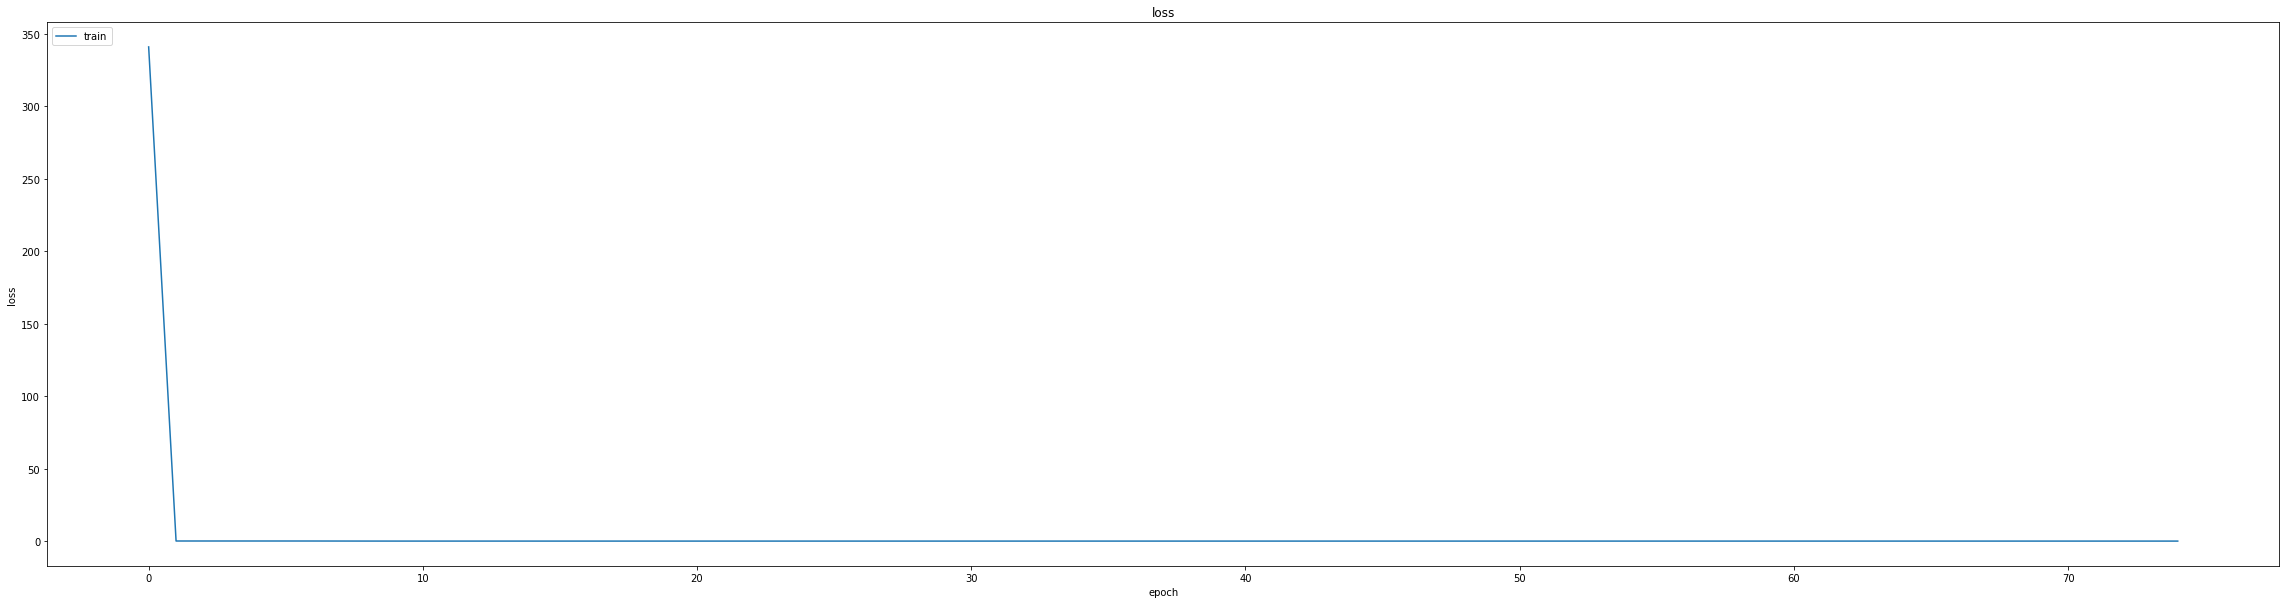

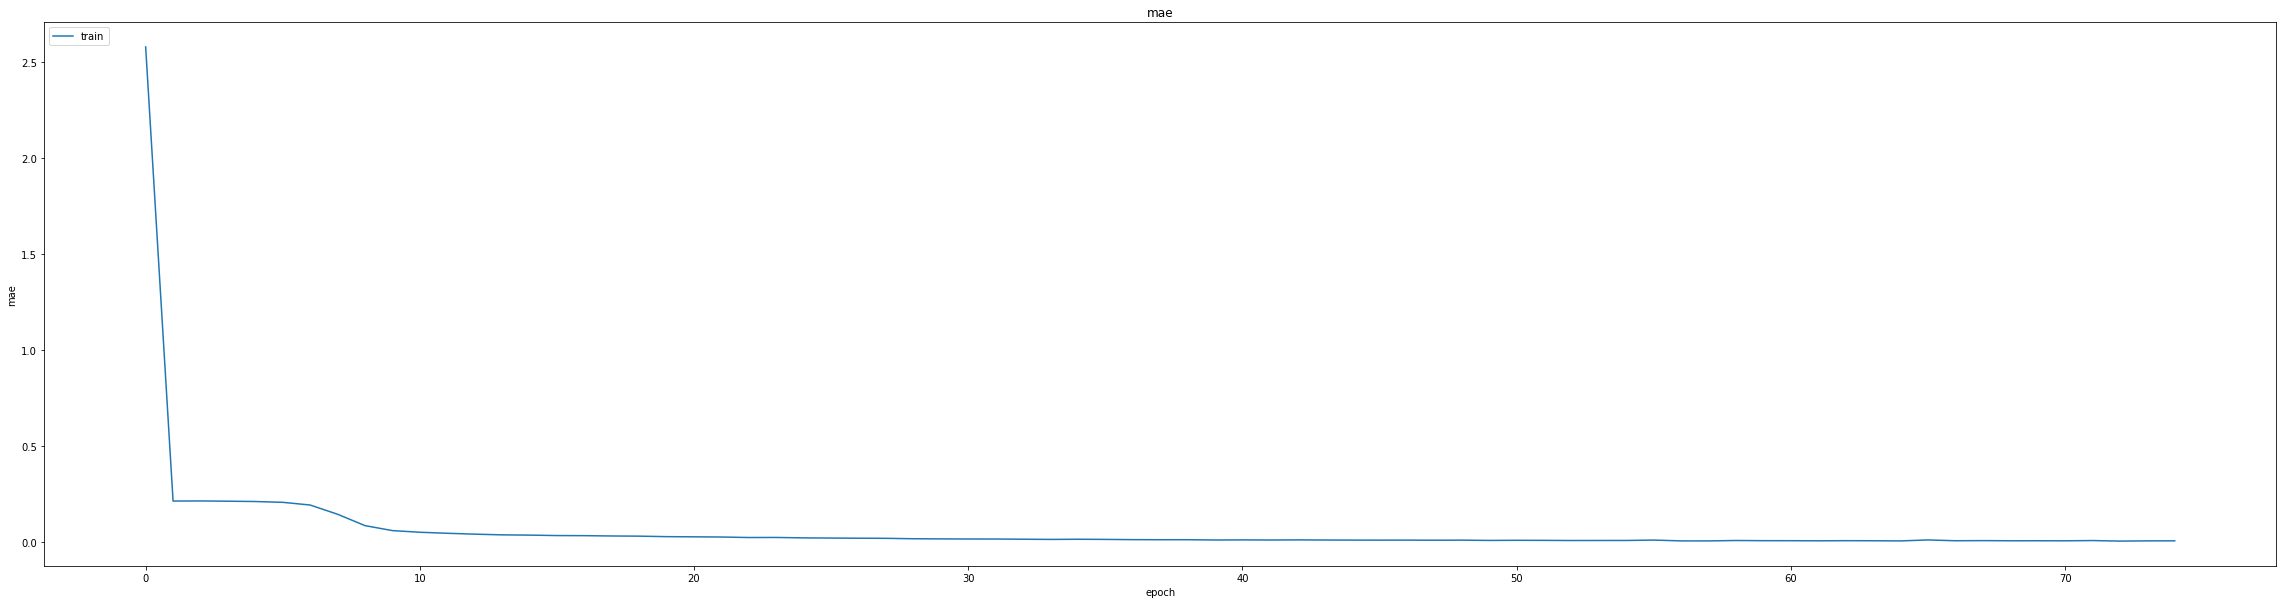

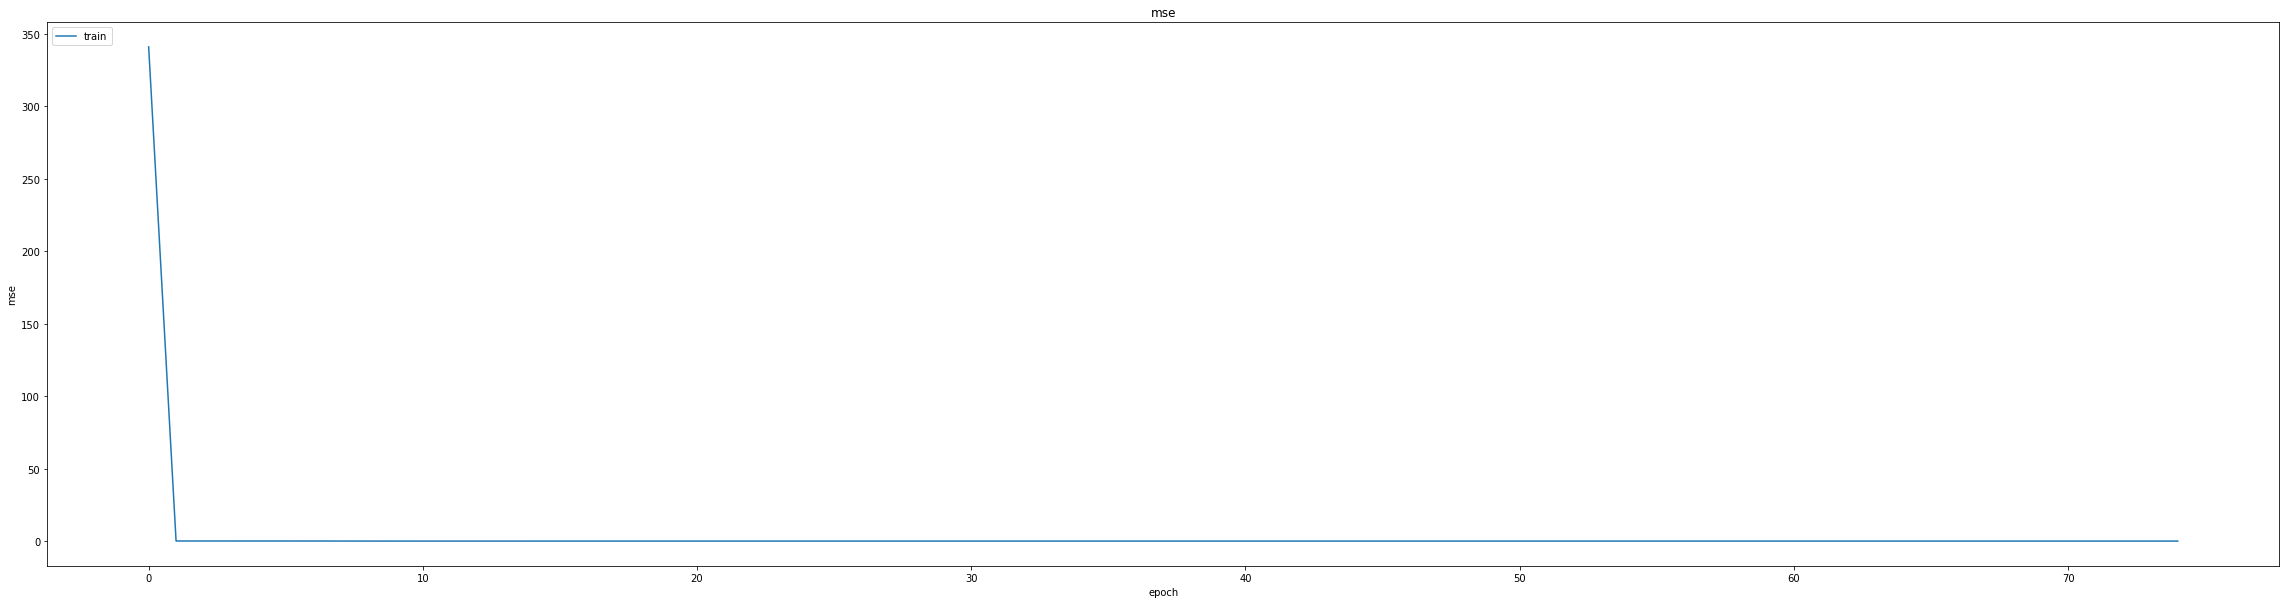

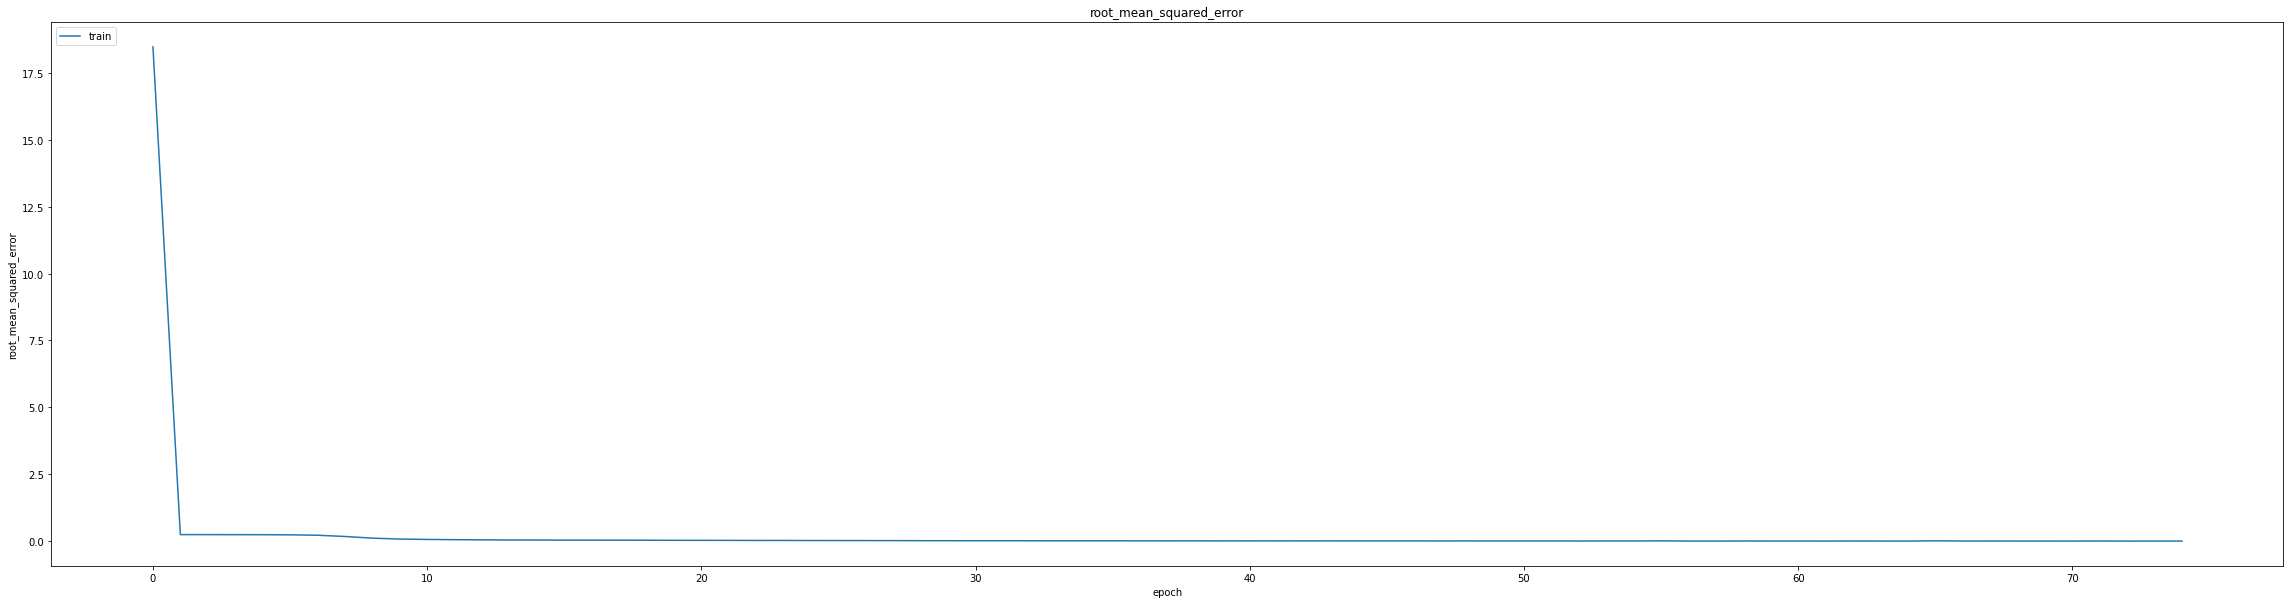

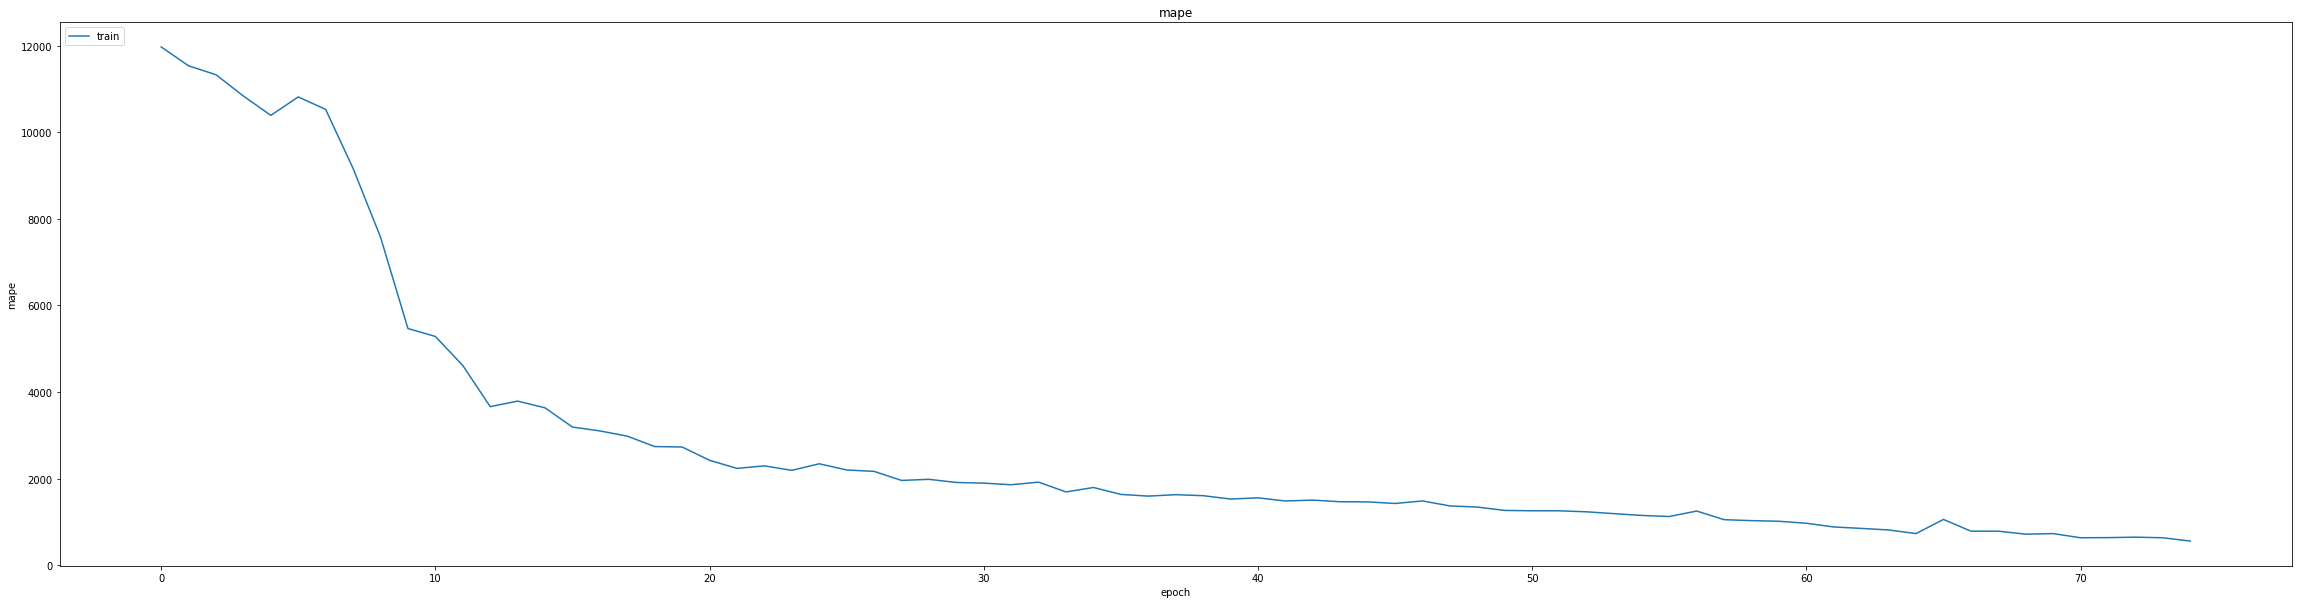

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0037097246386110783
0.005268360488116741
348/348 [==============================] - 4s 7ms/step
0.9994460718882989


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
405/406 [============================>.] - ETA: 0s - loss: 3.6832e-04 - mae: 0.0076 - mse: 3.6832e-04 - root_mean_squared_error: 0.0192 - mape: 634.5562
Epoch 1: val_mse did not improve from 0.00003
406/406 [==============================] - 17s 26ms/step - loss: 3.6749e-04 - mae: 0.0076 - mse: 3.6749e-04 - root_mean_squared_error: 0.0192 - mape: 633.0562 - val_loss: 2.2297e-04 - val_mae: 0.0140 - val_mse: 2.2297e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 2521.3914 - lr: 0.0010
Epoch 2/25
404/406 [============================>.] - ETA: 0s - loss: 2.2176e-05 - mae: 0.0036 - mse: 2.2176e-05 - root_mean_squared_error: 0.0047 - mape: 558.4685
Epoch 2: val_mse did not improve from 0.00003
406/406 [==============================] - 8s 19ms/step - loss: 2.2179e-05 - mae: 0.0036 - mse: 2.2179e-05 - root_mean_squared_error: 0.0047 - mape: 555.7767 - val_loss: 1.9952e-04 - val_mae: 0.0133 - val_mse: 1.9952e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 2477.3784 - lr

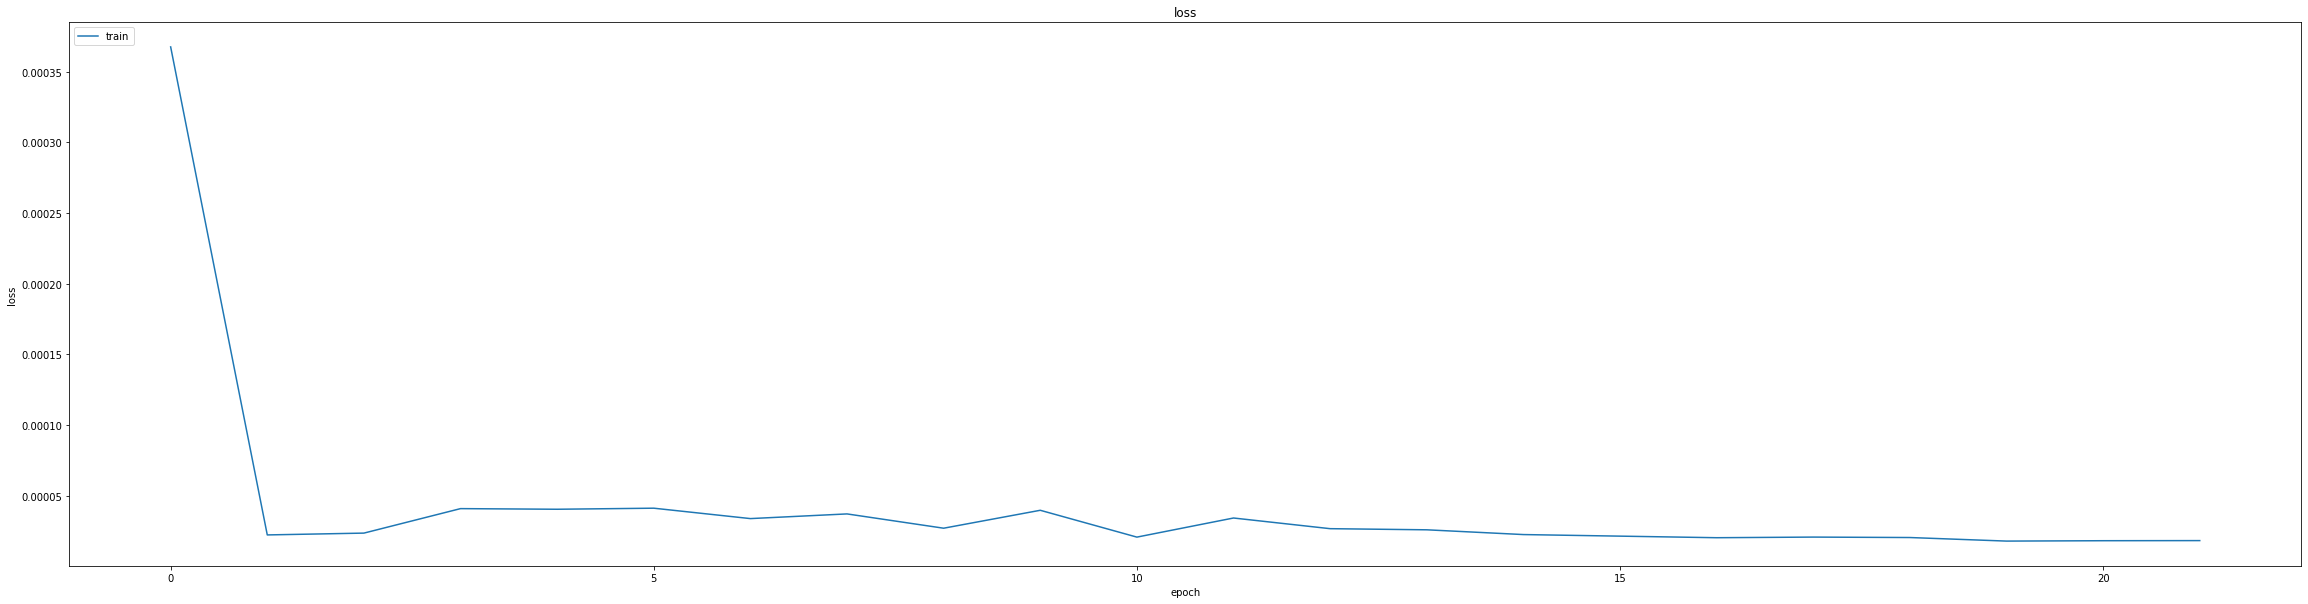

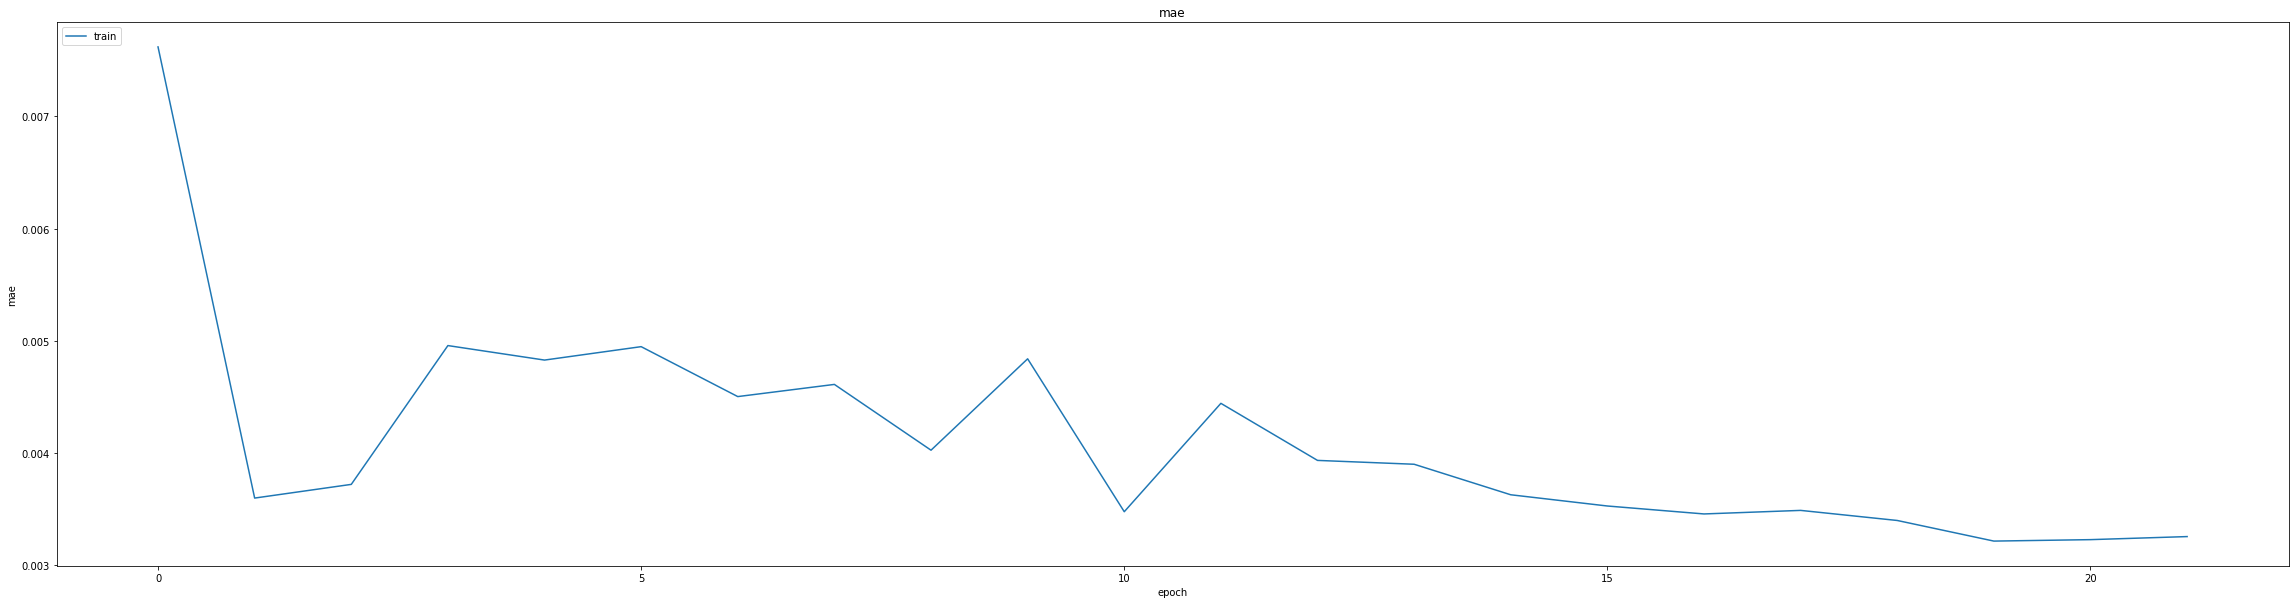

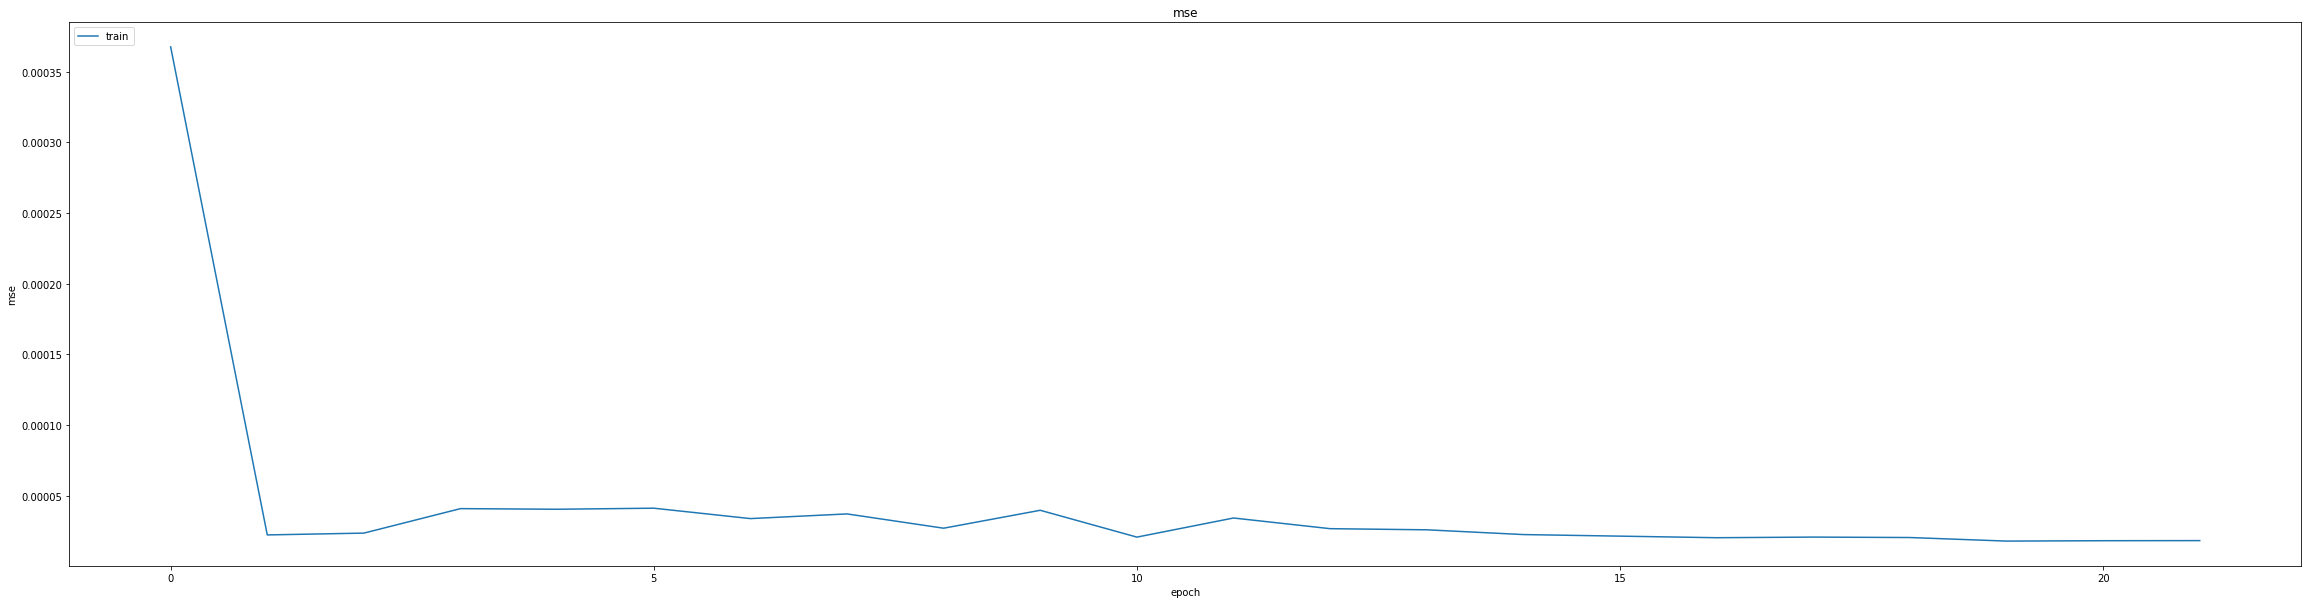

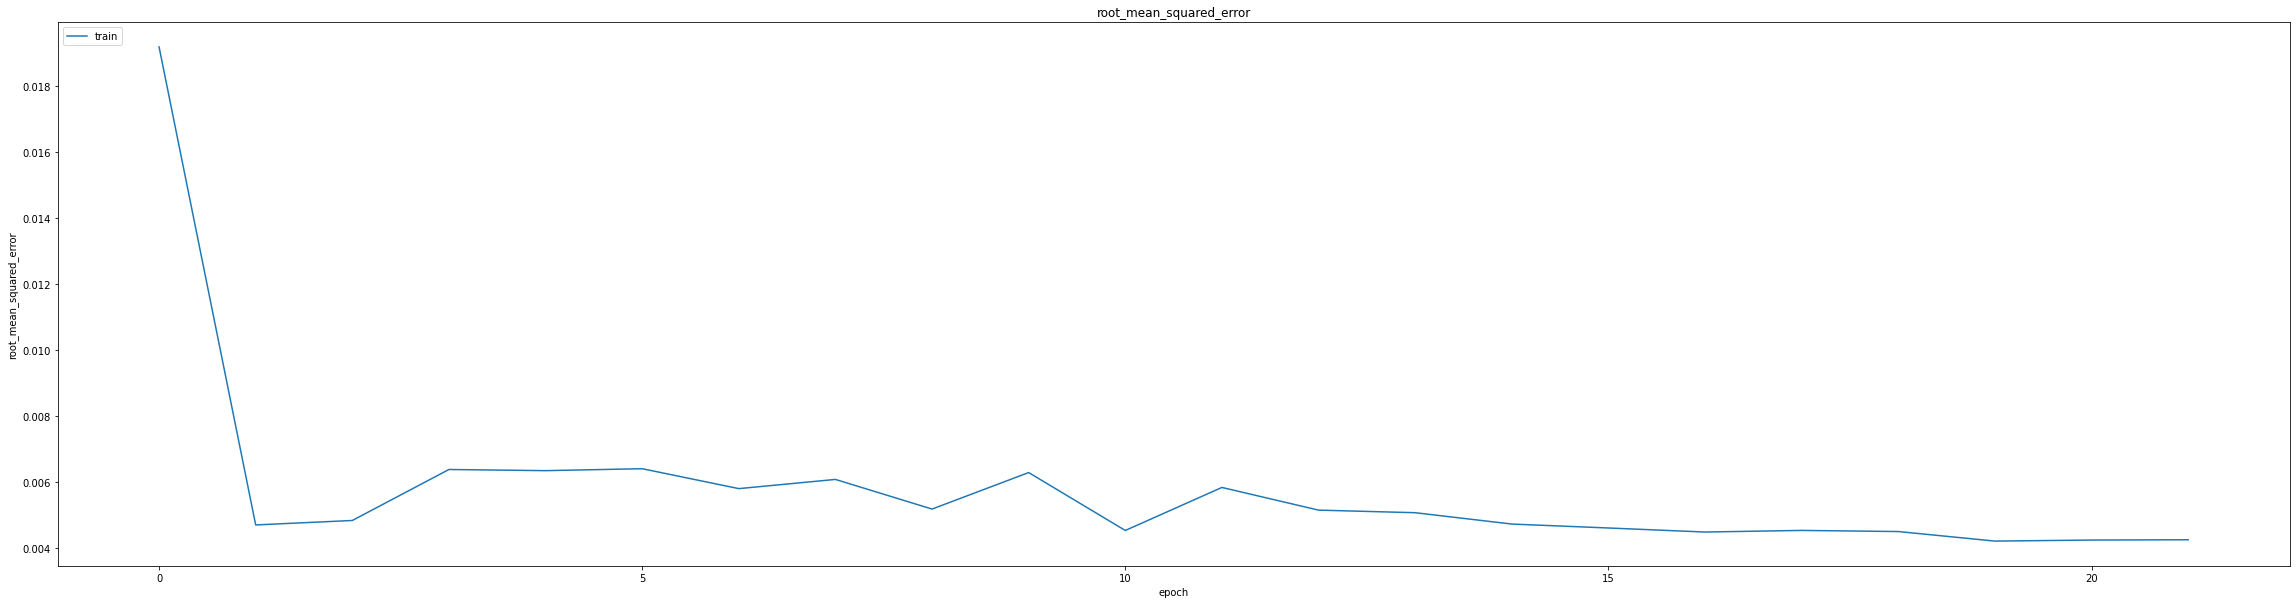

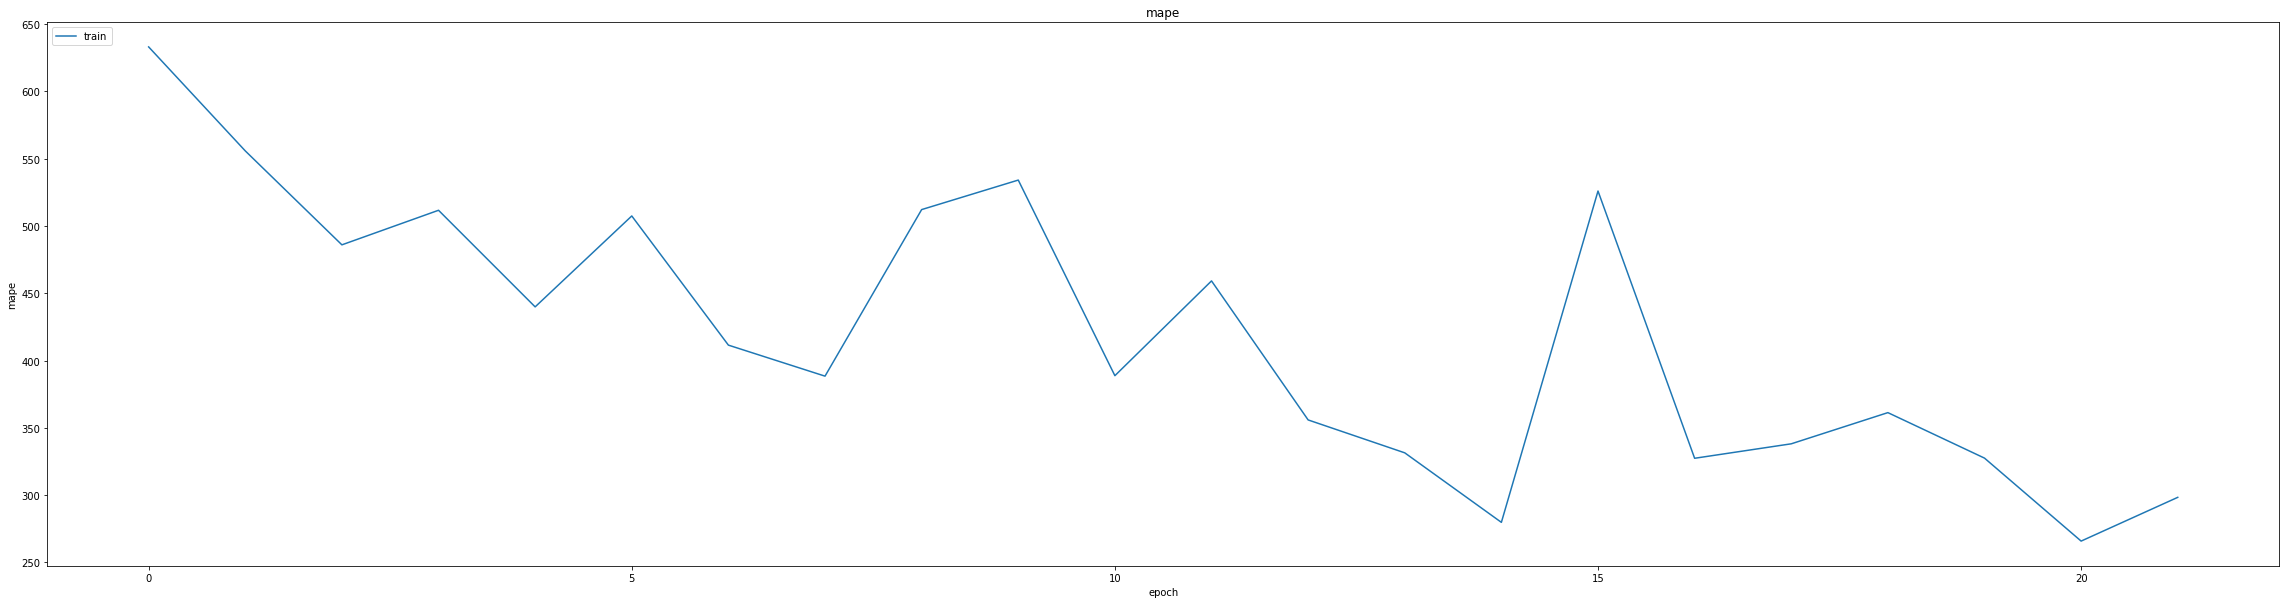

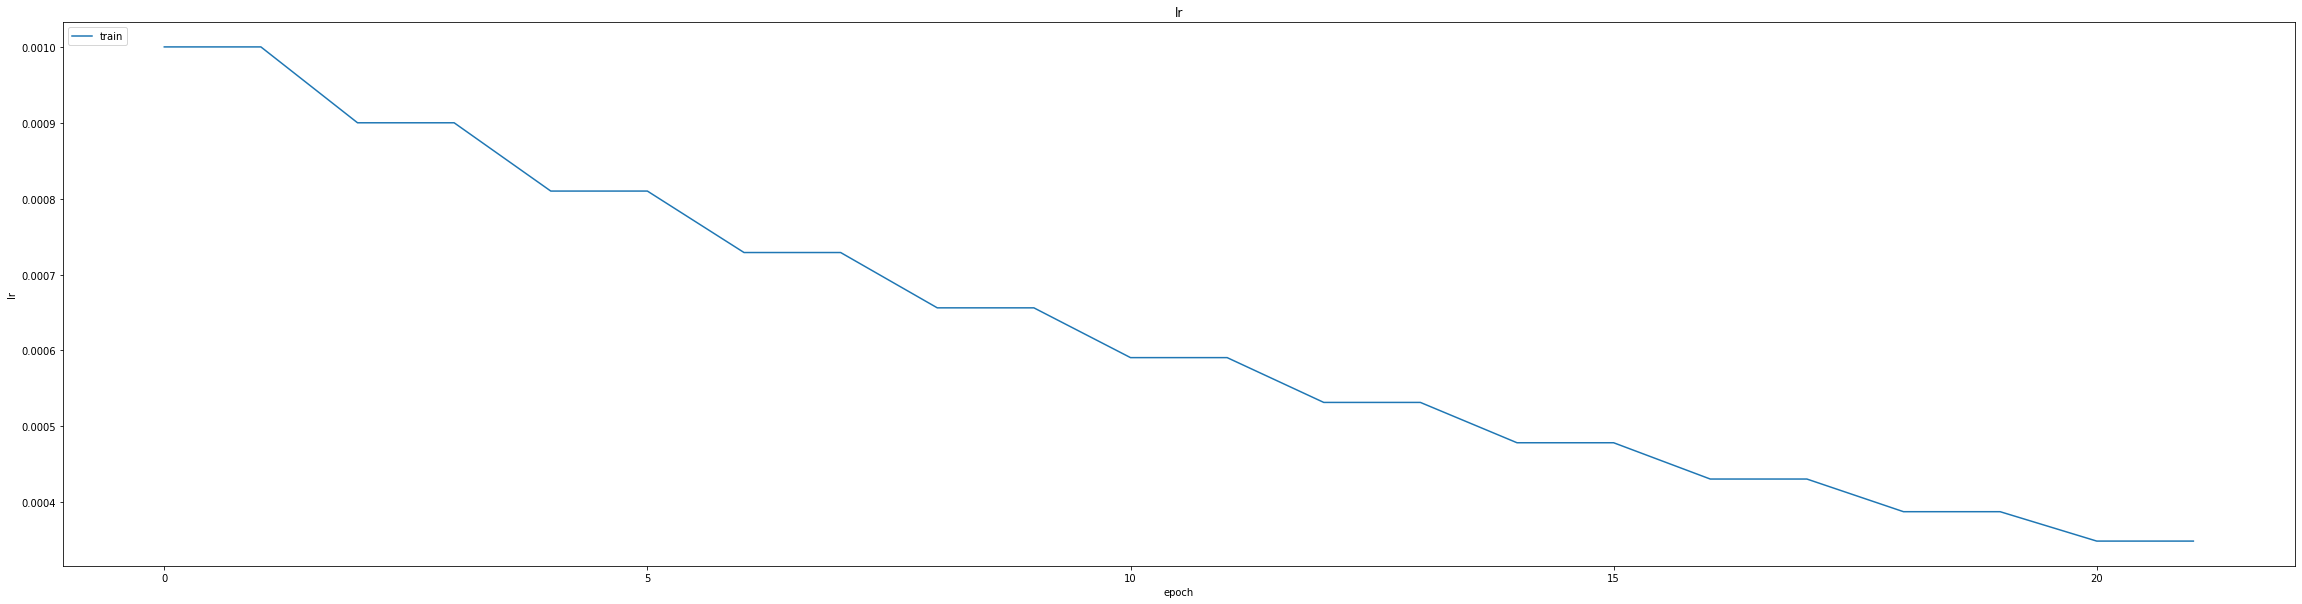

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007894185371696949
0.008932262659072876
348/348 [==============================] - 4s 7ms/step
0.9975684778012223


348/348 [==============================] - 2s 7ms/step


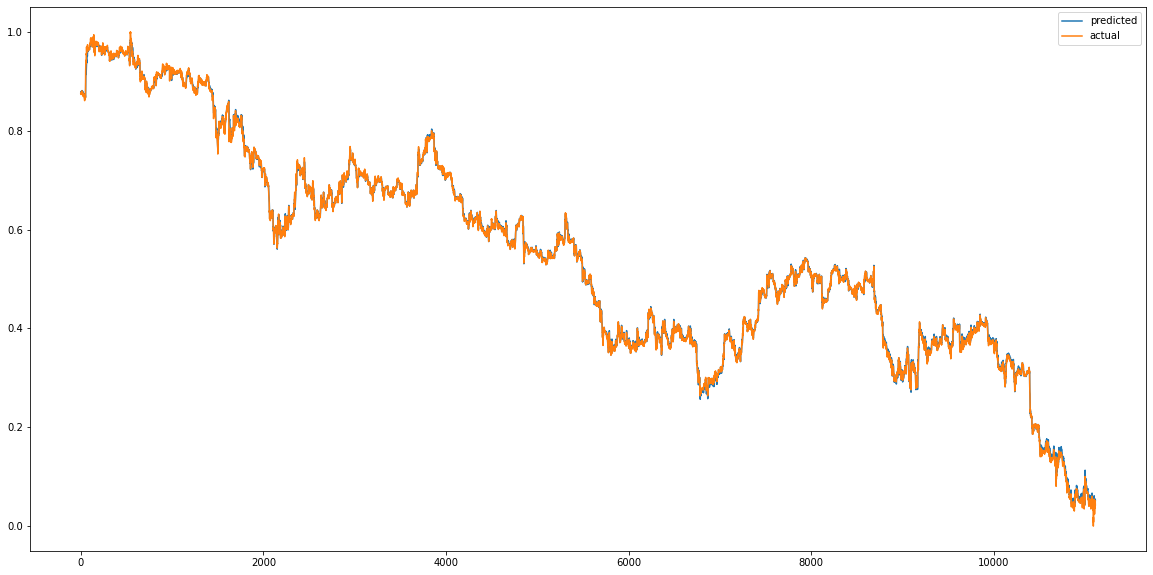

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


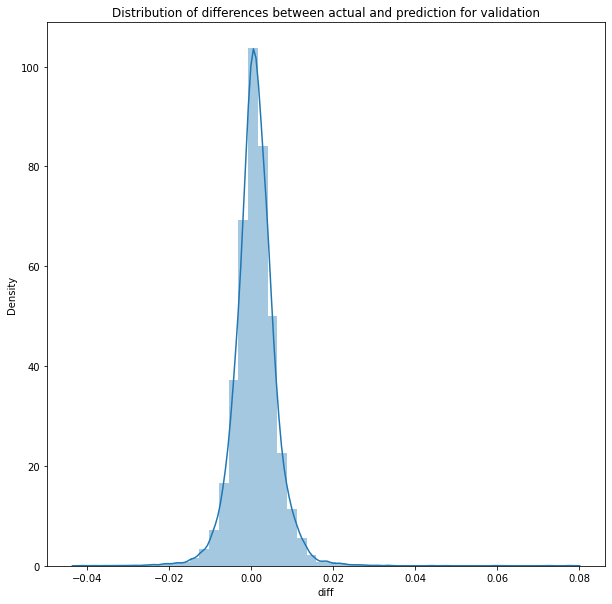

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 6ms/step


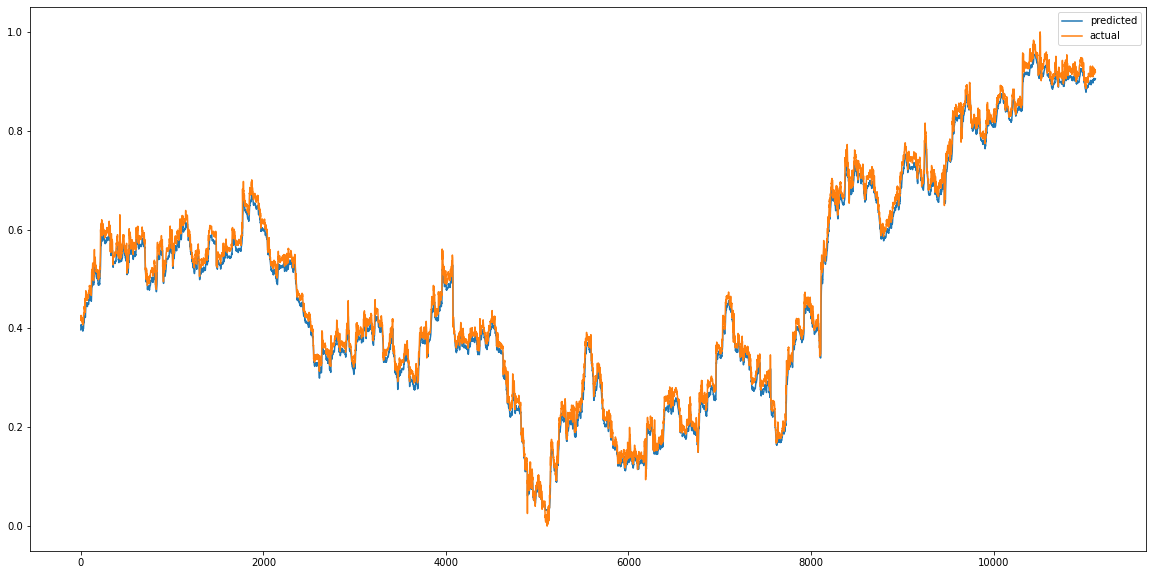

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


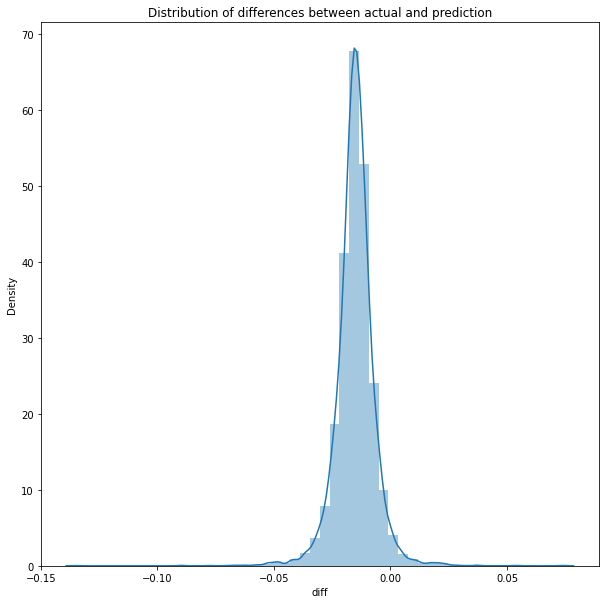

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0002989280297955365
RMSE :  0.01728953526835052
MAE :  0.015560627953002257
348/348 [==============================] - 2s 7ms/step
R2_Score  : 0.9943739598208426


count    11116.000000
mean        -0.015120
std          0.008386
min         -0.135285
25%         -0.018981
50%         -0.015045
75%         -0.011039
max          0.074638
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
403/406 [============================>.] - ETA: 0s - loss: 313.5888 - mae: 2.7919 - mse: 313.5888 - root_mean_squared_error: 17.7084 - mape: 15980.5010
Epoch 1: val_mse improved from inf to 0.05032, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 30s 64ms/step - loss: 311.3021 - mae: 2.7731 - mse: 311.3021 - root_mean_squared_error: 17.6438 - mape: 15864.4443 - val_loss: 0.0503 - val_mae: 0.1861 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2243 - val_mape: 50225.5703
Epoch 2/75
403/406 [============================>.] - ETA: 0s - loss: 0.0612 - mae: 0.2137 - mse: 0.0612 - root_mean_squared_error: 0.2474 - mape: 11211.7461
Epoch 2: val_mse did not improve from 0.05032
406/406 [==============================] - 5s 13ms/step - loss: 0.0612 - mae: 0.2137 - mse: 0.0612 - root_mean_squared_error: 0.2474 - mape: 11130.4395 - val_loss: 0.0504 - val_mae: 0.1864 - val_mse: 0.0504 - val_root_mean_squared_error: 0.2245 - val_mape: 50584.6172
Epoch 3/75
403/406 [============================>.] - ETA: 0s - loss: 0.0611 - mae: 0.2134 - mse: 0.0611 - root_mean_squared_error: 0.2472 - mape: 11227.9805
Epoch 3: val_mse improved from 0.05032 to 0.05032, saving model to /content/drive/MyDrive/modelw

406/406 [==============================] - 16s 40ms/step - loss: 0.0611 - mae: 0.2134 - mse: 0.0611 - root_mean_squared_error: 0.2472 - mape: 11146.6787 - val_loss: 0.0503 - val_mae: 0.1861 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2243 - val_mape: 50271.5703
Epoch 4/75
403/406 [============================>.] - ETA: 0s - loss: 0.0611 - mae: 0.2133 - mse: 0.0611 - root_mean_squared_error: 0.2472 - mape: 11052.9092
Epoch 4: val_mse improved from 0.05032 to 0.05023, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 41ms/step - loss: 0.0611 - mae: 0.2133 - mse: 0.0611 - root_mean_squared_error: 0.2472 - mape: 10972.8418 - val_loss: 0.0502 - val_mae: 0.1858 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2241 - val_mape: 49822.1367
Epoch 5/75
406/406 [==============================] - ETA: 0s - loss: 0.0611 - mae: 0.2134 - mse: 0.0611 - root_mean_squared_error: 0.2472 - mape: 11094.9033
Epoch 5: val_mse did not improve from 0.05023
406/406 [==============================] - 5s 13ms/step - loss: 0.0611 - mae: 0.2134 - mse: 0.0611 - root_mean_squared_error: 0.2472 - mape: 11094.9033 - val_loss: 0.0506 - val_mae: 0.1870 - val_mse: 0.0506 - val_root_mean_squared_error: 0.2250 - val_mape: 51267.9219
Epoch 6/75
404/406 [============================>.] - ETA: 0s - loss: 0.0611 - mae: 0.2133 - mse: 0.0611 - root_mean_squared_error: 0.2472 - mape: 10785.3066
Epoch 6: val_mse did not improve from 0.05023
406/406 [==============================] - 5s 13ms/step

406/406 [==============================] - 16s 40ms/step - loss: 0.0610 - mae: 0.2130 - mse: 0.0610 - root_mean_squared_error: 0.2469 - mape: 11904.3809 - val_loss: 0.0501 - val_mae: 0.1855 - val_mse: 0.0501 - val_root_mean_squared_error: 0.2239 - val_mape: 49542.5977
Epoch 9/75
403/406 [============================>.] - ETA: 0s - loss: 0.0609 - mae: 0.2130 - mse: 0.0609 - root_mean_squared_error: 0.2468 - mape: 10987.4648
Epoch 9: val_mse improved from 0.05013 to 0.05009, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0609 - mae: 0.2130 - mse: 0.0609 - root_mean_squared_error: 0.2468 - mape: 10907.9570 - val_loss: 0.0501 - val_mae: 0.1852 - val_mse: 0.0501 - val_root_mean_squared_error: 0.2238 - val_mape: 49069.6602
Epoch 10/75
404/406 [============================>.] - ETA: 0s - loss: 0.0609 - mae: 0.2131 - mse: 0.0609 - root_mean_squared_error: 0.2469 - mape: 10999.7021
Epoch 10: val_mse did not improve from 0.05009
406/406 [==============================] - 5s 13ms/step - loss: 0.0609 - mae: 0.2131 - mse: 0.0609 - root_mean_squared_error: 0.2468 - mape: 10946.9004 - val_loss: 0.0501 - val_mae: 0.1857 - val_mse: 0.0501 - val_root_mean_squared_error: 0.2239 - val_mape: 50079.1289
Epoch 11/75
404/406 [============================>.] - ETA: 0s - loss: 0.0608 - mae: 0.2128 - mse: 0.0608 - root_mean_squared_error: 0.2466 - mape: 10908.7969
Epoch 11: val_mse improved from 0.05009 to 0.04998, saving model to /content/drive/MyDrive/modelwe

406/406 [==============================] - 17s 41ms/step - loss: 0.0608 - mae: 0.2128 - mse: 0.0608 - root_mean_squared_error: 0.2466 - mape: 10856.3984 - val_loss: 0.0500 - val_mae: 0.1852 - val_mse: 0.0500 - val_root_mean_squared_error: 0.2236 - val_mape: 49410.5977
Epoch 12/75
405/406 [============================>.] - ETA: 0s - loss: 0.0604 - mae: 0.2120 - mse: 0.0604 - root_mean_squared_error: 0.2457 - mape: 11084.7744
Epoch 12: val_mse did not improve from 0.04998
406/406 [==============================] - 5s 13ms/step - loss: 0.0604 - mae: 0.2120 - mse: 0.0604 - root_mean_squared_error: 0.2457 - mape: 11058.7422 - val_loss: 0.0500 - val_mae: 0.1858 - val_mse: 0.0500 - val_root_mean_squared_error: 0.2236 - val_mape: 50263.5547
Epoch 13/75
402/406 [============================>.] - ETA: 0s - loss: 0.0579 - mae: 0.2071 - mse: 0.0579 - root_mean_squared_error: 0.2406 - mape: 10289.7939
Epoch 13: val_mse improved from 0.04998 to 0.04640, saving model to /content/drive/MyDrive/modelwe

406/406 [==============================] - 17s 42ms/step - loss: 0.0578 - mae: 0.2070 - mse: 0.0578 - root_mean_squared_error: 0.2405 - mape: 10190.0518 - val_loss: 0.0464 - val_mae: 0.1795 - val_mse: 0.0464 - val_root_mean_squared_error: 0.2154 - val_mape: 47161.9922
Epoch 14/75
406/406 [==============================] - ETA: 0s - loss: 0.0283 - mae: 0.1341 - mse: 0.0283 - root_mean_squared_error: 0.1683 - mape: 5654.5781
Epoch 14: val_mse improved from 0.04640 to 0.01294, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 0.0283 - mae: 0.1341 - mse: 0.0283 - root_mean_squared_error: 0.1683 - mape: 5654.5781 - val_loss: 0.0129 - val_mae: 0.0980 - val_mse: 0.0129 - val_root_mean_squared_error: 0.1138 - val_mape: 22388.6562
Epoch 15/75
405/406 [============================>.] - ETA: 0s - loss: 0.0079 - mae: 0.0721 - mse: 0.0079 - root_mean_squared_error: 0.0887 - mape: 5495.0366
Epoch 15: val_mse improved from 0.01294 to 0.00582, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0079 - mae: 0.0720 - mse: 0.0079 - root_mean_squared_error: 0.0887 - mape: 5482.0854 - val_loss: 0.0058 - val_mae: 0.0670 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0763 - val_mape: 18572.7871
Epoch 16/75
403/406 [============================>.] - ETA: 0s - loss: 0.0041 - mae: 0.0505 - mse: 0.0041 - root_mean_squared_error: 0.0638 - mape: 3619.9016
Epoch 16: val_mse improved from 0.00582 to 0.00175, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0041 - mae: 0.0504 - mse: 0.0041 - root_mean_squared_error: 0.0637 - mape: 3593.6111 - val_loss: 0.0018 - val_mae: 0.0296 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0419 - val_mape: 14733.9932
Epoch 17/75
404/406 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0403 - mse: 0.0026 - root_mean_squared_error: 0.0508 - mape: 3108.2844
Epoch 17: val_mse did not improve from 0.00175
406/406 [==============================] - 5s 13ms/step - loss: 0.0026 - mae: 0.0403 - mse: 0.0026 - root_mean_squared_error: 0.0508 - mape: 3093.3196 - val_loss: 0.0022 - val_mae: 0.0379 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0465 - val_mape: 13003.9014
Epoch 18/75
404/406 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0363 - mse: 0.0021 - root_mean_squared_error: 0.0457 - mape: 3521.4248
Epoch 18: val_mse improved from 0.00175 to 0.00090, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 16s 40ms/step - loss: 0.0021 - mae: 0.0362 - mse: 0.0021 - root_mean_squared_error: 0.0457 - mape: 3504.4570 - val_loss: 9.0286e-04 - val_mae: 0.0221 - val_mse: 9.0286e-04 - val_root_mean_squared_error: 0.0300 - val_mape: 12277.0039
Epoch 19/75
403/406 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0324 - mse: 0.0017 - root_mean_squared_error: 0.0409 - mape: 2844.4917
Epoch 19: val_mse improved from 0.00090 to 0.00083, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0017 - mae: 0.0324 - mse: 0.0017 - root_mean_squared_error: 0.0409 - mape: 2823.8584 - val_loss: 8.3480e-04 - val_mae: 0.0211 - val_mse: 8.3480e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 11515.5625
Epoch 20/75
403/406 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0293 - mse: 0.0014 - root_mean_squared_error: 0.0371 - mape: 2426.6047
Epoch 20: val_mse did not improve from 0.00083
406/406 [==============================] - 5s 13ms/step - loss: 0.0014 - mae: 0.0294 - mse: 0.0014 - root_mean_squared_error: 0.0371 - mape: 2408.9714 - val_loss: 0.0016 - val_mae: 0.0334 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0396 - val_mape: 11183.1465
Epoch 21/75
402/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0278 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 2687.8105
Epoch 21: val_mse improved from 0.00083 to 0.00080, saving model to /content/drive/MyDrive/mod

406/406 [==============================] - 16s 41ms/step - loss: 0.0012 - mae: 0.0278 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 2661.6548 - val_loss: 7.9935e-04 - val_mae: 0.0208 - val_mse: 7.9935e-04 - val_root_mean_squared_error: 0.0283 - val_mape: 10991.3994
Epoch 22/75
406/406 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0254 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 2309.8213
Epoch 22: val_mse improved from 0.00080 to 0.00071, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 18s 43ms/step - loss: 0.0010 - mae: 0.0254 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 2309.8213 - val_loss: 7.1118e-04 - val_mae: 0.0190 - val_mse: 7.1118e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 10620.9609
Epoch 23/75
406/406 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0251 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 2181.1794        
Epoch 23: val_mse did not improve from 0.00071
406/406 [==============================] - 5s 13ms/step - loss: 0.0010 - mae: 0.0251 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 2181.1794 - val_loss: 0.0016 - val_mae: 0.0360 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0402 - val_mape: 10799.6904
Epoch 24/75
406/406 [==============================] - ETA: 0s - loss: 8.7352e-04 - mae: 0.0233 - mse: 8.7352e-04 - root_mean_squared_error: 0.0296 - mape: 2101.4363
Epoch 24: val_mse improved from 0.00071 to 0.00053, saving model to /content/d

406/406 [==============================] - 16s 40ms/step - loss: 8.7352e-04 - mae: 0.0233 - mse: 8.7352e-04 - root_mean_squared_error: 0.0296 - mape: 2101.4363 - val_loss: 5.2700e-04 - val_mae: 0.0170 - val_mse: 5.2700e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 10224.5957
Epoch 25/75
403/406 [============================>.] - ETA: 0s - loss: 7.6504e-04 - mae: 0.0218 - mse: 7.6504e-04 - root_mean_squared_error: 0.0277 - mape: 2250.3464
Epoch 25: val_mse did not improve from 0.00053
406/406 [==============================] - 5s 13ms/step - loss: 7.6382e-04 - mae: 0.0218 - mse: 7.6382e-04 - root_mean_squared_error: 0.0276 - mape: 2233.9729 - val_loss: 9.4763e-04 - val_mae: 0.0243 - val_mse: 9.4763e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 9985.2822
Epoch 26/75
402/406 [============================>.] - ETA: 0s - loss: 7.9006e-04 - mae: 0.0222 - mse: 7.9006e-04 - root_mean_squared_error: 0.0281 - mape: 2207.0981
Epoch 26: val_mse did not improve from 0.00053
406/406 

406/406 [==============================] - 16s 39ms/step - loss: 4.3671e-04 - mae: 0.0163 - mse: 4.3671e-04 - root_mean_squared_error: 0.0209 - mape: 1854.6007 - val_loss: 4.7218e-04 - val_mae: 0.0162 - val_mse: 4.7218e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 9064.3164
Epoch 34/75
406/406 [==============================] - ETA: 0s - loss: 4.0864e-04 - mae: 0.0158 - mse: 4.0864e-04 - root_mean_squared_error: 0.0202 - mape: 2012.6858
Epoch 34: val_mse improved from 0.00047 to 0.00044, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 41ms/step - loss: 4.0864e-04 - mae: 0.0158 - mse: 4.0864e-04 - root_mean_squared_error: 0.0202 - mape: 2012.6858 - val_loss: 4.3939e-04 - val_mae: 0.0157 - val_mse: 4.3939e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 8808.4580
Epoch 35/75
404/406 [============================>.] - ETA: 0s - loss: 4.4631e-04 - mae: 0.0165 - mse: 4.4631e-04 - root_mean_squared_error: 0.0211 - mape: 1757.6198
Epoch 35: val_mse did not improve from 0.00044
406/406 [==============================] - 5s 13ms/step - loss: 4.4806e-04 - mae: 0.0165 - mse: 4.4806e-04 - root_mean_squared_error: 0.0212 - mape: 1749.1554 - val_loss: 4.5419e-04 - val_mae: 0.0160 - val_mse: 4.5419e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 8919.8105
Epoch 36/75
402/406 [============================>.] - ETA: 0s - loss: 4.0482e-04 - mae: 0.0156 - mse: 4.0482e-04 - root_mean_squared_error: 0.0201 - mape: 1729.6516
Epoch 36: val_mse did not improve from 0.00044
406/406 [

406/406 [==============================] - 16s 40ms/step - loss: 3.5066e-04 - mae: 0.0145 - mse: 3.5066e-04 - root_mean_squared_error: 0.0187 - mape: 1680.5115 - val_loss: 3.2375e-04 - val_mae: 0.0130 - val_mse: 3.2375e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 8271.4512
Epoch 39/75
404/406 [============================>.] - ETA: 0s - loss: 3.2648e-04 - mae: 0.0140 - mse: 3.2648e-04 - root_mean_squared_error: 0.0181 - mape: 1906.7727
Epoch 39: val_mse did not improve from 0.00032
406/406 [==============================] - 5s 13ms/step - loss: 3.2709e-04 - mae: 0.0141 - mse: 3.2709e-04 - root_mean_squared_error: 0.0181 - mape: 1897.5918 - val_loss: 8.9666e-04 - val_mae: 0.0250 - val_mse: 8.9666e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 7975.9829
Epoch 40/75
403/406 [============================>.] - ETA: 0s - loss: 3.1295e-04 - mae: 0.0137 - mse: 3.1295e-04 - root_mean_squared_error: 0.0177 - mape: 1672.3499
Epoch 40: val_mse improved from 0.00032 to 0.00031, savi

406/406 [==============================] - 16s 41ms/step - loss: 3.1279e-04 - mae: 0.0137 - mse: 3.1279e-04 - root_mean_squared_error: 0.0177 - mape: 1660.1960 - val_loss: 3.1432e-04 - val_mae: 0.0128 - val_mse: 3.1432e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 7822.0508
Epoch 41/75
404/406 [============================>.] - ETA: 0s - loss: 3.1343e-04 - mae: 0.0137 - mse: 3.1343e-04 - root_mean_squared_error: 0.0177 - mape: 1578.2557
Epoch 41: val_mse did not improve from 0.00031
406/406 [==============================] - 5s 13ms/step - loss: 3.1336e-04 - mae: 0.0137 - mse: 3.1336e-04 - root_mean_squared_error: 0.0177 - mape: 1570.6610 - val_loss: 6.7467e-04 - val_mae: 0.0213 - val_mse: 6.7467e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 7632.6099
Epoch 42/75
405/406 [============================>.] - ETA: 0s - loss: 2.8415e-04 - mae: 0.0131 - mse: 2.8415e-04 - root_mean_squared_error: 0.0169 - mape: 1509.5867
Epoch 42: val_mse did not improve from 0.00031
406/406 [

406/406 [==============================] - 16s 40ms/step - loss: 2.9646e-04 - mae: 0.0134 - mse: 2.9646e-04 - root_mean_squared_error: 0.0172 - mape: 1613.7992 - val_loss: 3.1077e-04 - val_mae: 0.0131 - val_mse: 3.1077e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 7307.4219
Epoch 44/75
403/406 [============================>.] - ETA: 0s - loss: 2.3510e-04 - mae: 0.0118 - mse: 2.3510e-04 - root_mean_squared_error: 0.0153 - mape: 1596.3674
Epoch 44: val_mse did not improve from 0.00031
406/406 [==============================] - 5s 13ms/step - loss: 2.3483e-04 - mae: 0.0118 - mse: 2.3483e-04 - root_mean_squared_error: 0.0153 - mape: 1584.7722 - val_loss: 4.2685e-04 - val_mae: 0.0163 - val_mse: 4.2685e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 6979.6987
Epoch 45/75
402/406 [============================>.] - ETA: 0s - loss: 2.7359e-04 - mae: 0.0128 - mse: 2.7359e-04 - root_mean_squared_error: 0.0165 - mape: 1404.9396
Epoch 45: val_mse improved from 0.00031 to 0.00031, savi

406/406 [==============================] - 16s 41ms/step - loss: 2.7278e-04 - mae: 0.0128 - mse: 2.7278e-04 - root_mean_squared_error: 0.0165 - mape: 1391.2686 - val_loss: 3.0945e-04 - val_mae: 0.0133 - val_mse: 3.0945e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 6698.8228
Epoch 46/75
405/406 [============================>.] - ETA: 0s - loss: 2.3553e-04 - mae: 0.0119 - mse: 2.3553e-04 - root_mean_squared_error: 0.0153 - mape: 1318.4287
Epoch 46: val_mse improved from 0.00031 to 0.00030, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 38ms/step - loss: 2.3538e-04 - mae: 0.0119 - mse: 2.3538e-04 - root_mean_squared_error: 0.0153 - mape: 1315.3135 - val_loss: 3.0066e-04 - val_mae: 0.0131 - val_mse: 3.0066e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 6703.2275
Epoch 47/75
404/406 [============================>.] - ETA: 0s - loss: 2.3970e-04 - mae: 0.0119 - mse: 2.3970e-04 - root_mean_squared_error: 0.0155 - mape: 1309.3671
Epoch 47: val_mse did not improve from 0.00030
406/406 [==============================] - 5s 13ms/step - loss: 2.3977e-04 - mae: 0.0119 - mse: 2.3977e-04 - root_mean_squared_error: 0.0155 - mape: 1303.0570 - val_loss: 3.4006e-04 - val_mae: 0.0146 - val_mse: 3.4006e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 6195.5215
Epoch 48/75
406/406 [==============================] - ETA: 0s - loss: 2.0936e-04 - mae: 0.0112 - mse: 2.0936e-04 - root_mean_squared_error: 0.0145 - mape: 1271.9812
Epoch 48: val_mse improved from 0.00030 to 0.00020, savi

406/406 [==============================] - 18s 44ms/step - loss: 2.0936e-04 - mae: 0.0112 - mse: 2.0936e-04 - root_mean_squared_error: 0.0145 - mape: 1271.9812 - val_loss: 2.0046e-04 - val_mae: 0.0103 - val_mse: 2.0046e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 6039.1528
Epoch 49/75
403/406 [============================>.] - ETA: 0s - loss: 1.9720e-04 - mae: 0.0109 - mse: 1.9720e-04 - root_mean_squared_error: 0.0140 - mape: 1254.9806
Epoch 49: val_mse improved from 0.00020 to 0.00018, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 1.9757e-04 - mae: 0.0109 - mse: 1.9757e-04 - root_mean_squared_error: 0.0141 - mape: 1245.8881 - val_loss: 1.8263e-04 - val_mae: 0.0099 - val_mse: 1.8263e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 6039.8955
Epoch 50/75
405/406 [============================>.] - ETA: 0s - loss: 1.9002e-04 - mae: 0.0107 - mse: 1.9002e-04 - root_mean_squared_error: 0.0138 - mape: 1364.3622
Epoch 50: val_mse did not improve from 0.00018
406/406 [==============================] - 5s 13ms/step - loss: 1.8988e-04 - mae: 0.0107 - mse: 1.8988e-04 - root_mean_squared_error: 0.0138 - mape: 1361.1399 - val_loss: 2.1088e-04 - val_mae: 0.0111 - val_mse: 2.1088e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 5718.6050
Epoch 51/75
405/406 [============================>.] - ETA: 0s - loss: 1.9684e-04 - mae: 0.0109 - mse: 1.9684e-04 - root_mean_squared_error: 0.0140 - mape: 1179.8151
Epoch 51: val_mse did not improve from 0.00018
406/406 [

406/406 [==============================] - 16s 40ms/step - loss: 1.4782e-04 - mae: 0.0094 - mse: 1.4782e-04 - root_mean_squared_error: 0.0122 - mape: 1061.9911 - val_loss: 1.5498e-04 - val_mae: 0.0096 - val_mse: 1.5498e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 5109.0952
Epoch 56/75
406/406 [==============================] - ETA: 0s - loss: 1.1820e-04 - mae: 0.0084 - mse: 1.1820e-04 - root_mean_squared_error: 0.0109 - mape: 1040.5227
Epoch 56: val_mse improved from 0.00015 to 0.00014, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 1.1820e-04 - mae: 0.0084 - mse: 1.1820e-04 - root_mean_squared_error: 0.0109 - mape: 1040.5227 - val_loss: 1.4319e-04 - val_mae: 0.0093 - val_mse: 1.4319e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 4707.5962
Epoch 57/75
403/406 [============================>.] - ETA: 0s - loss: 1.4871e-04 - mae: 0.0094 - mse: 1.4871e-04 - root_mean_squared_error: 0.0122 - mape: 972.5206
Epoch 57: val_mse did not improve from 0.00014
406/406 [==============================] - 5s 13ms/step - loss: 1.4811e-04 - mae: 0.0094 - mse: 1.4811e-04 - root_mean_squared_error: 0.0122 - mape: 965.4396 - val_loss: 2.3047e-04 - val_mae: 0.0127 - val_mse: 2.3047e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 5481.7954
Epoch 58/75
405/406 [============================>.] - ETA: 0s - loss: 1.4176e-04 - mae: 0.0092 - mse: 1.4176e-04 - root_mean_squared_error: 0.0119 - mape: 971.3061
Epoch 58: val_mse did not improve from 0.00014
406/406 [===

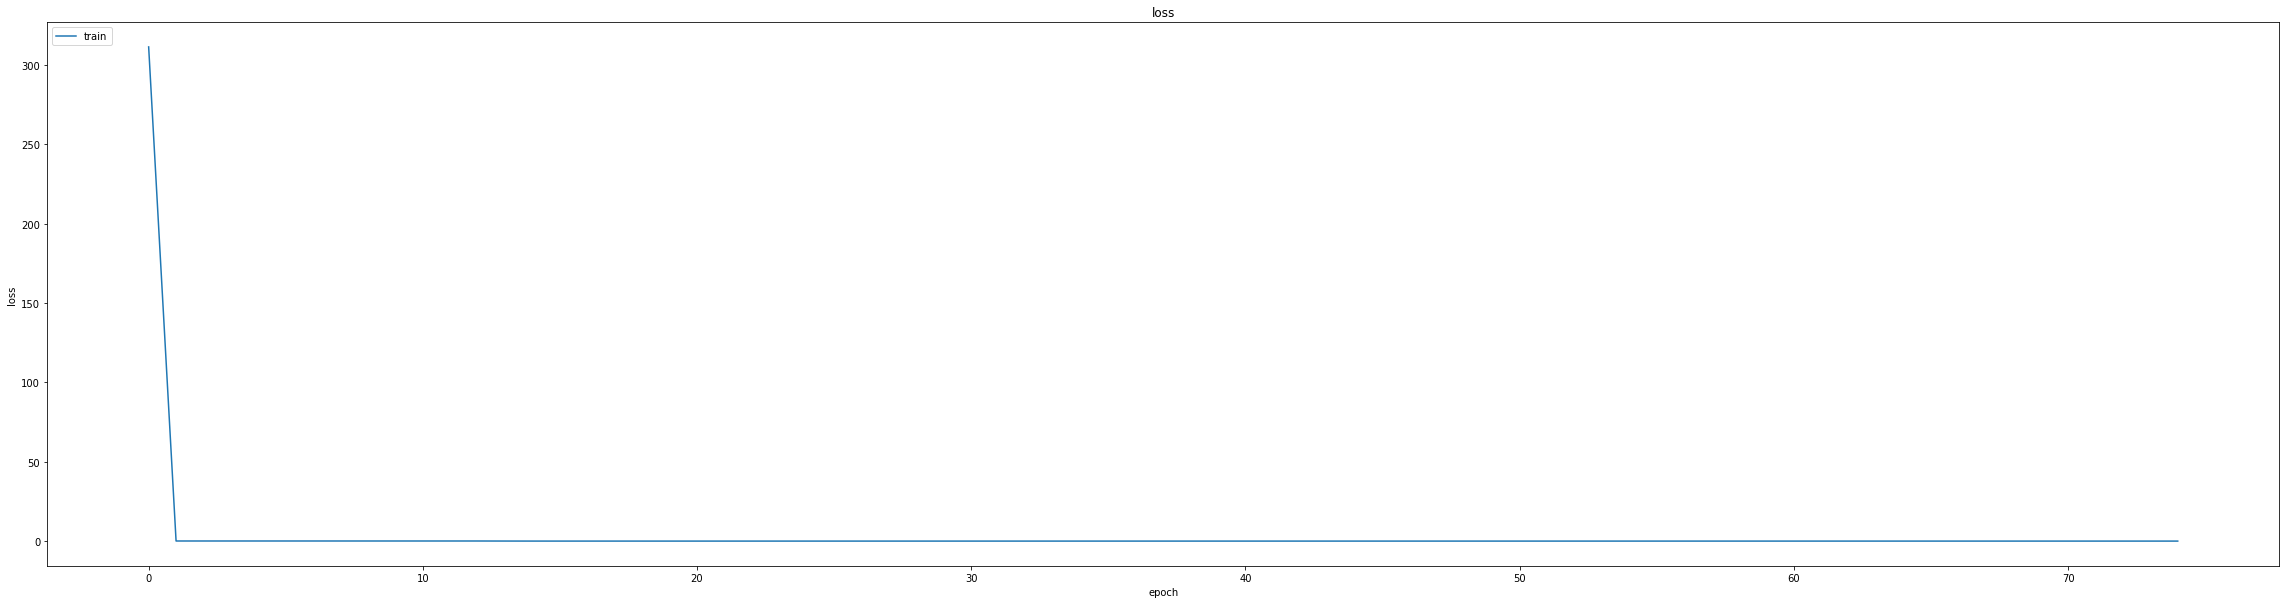

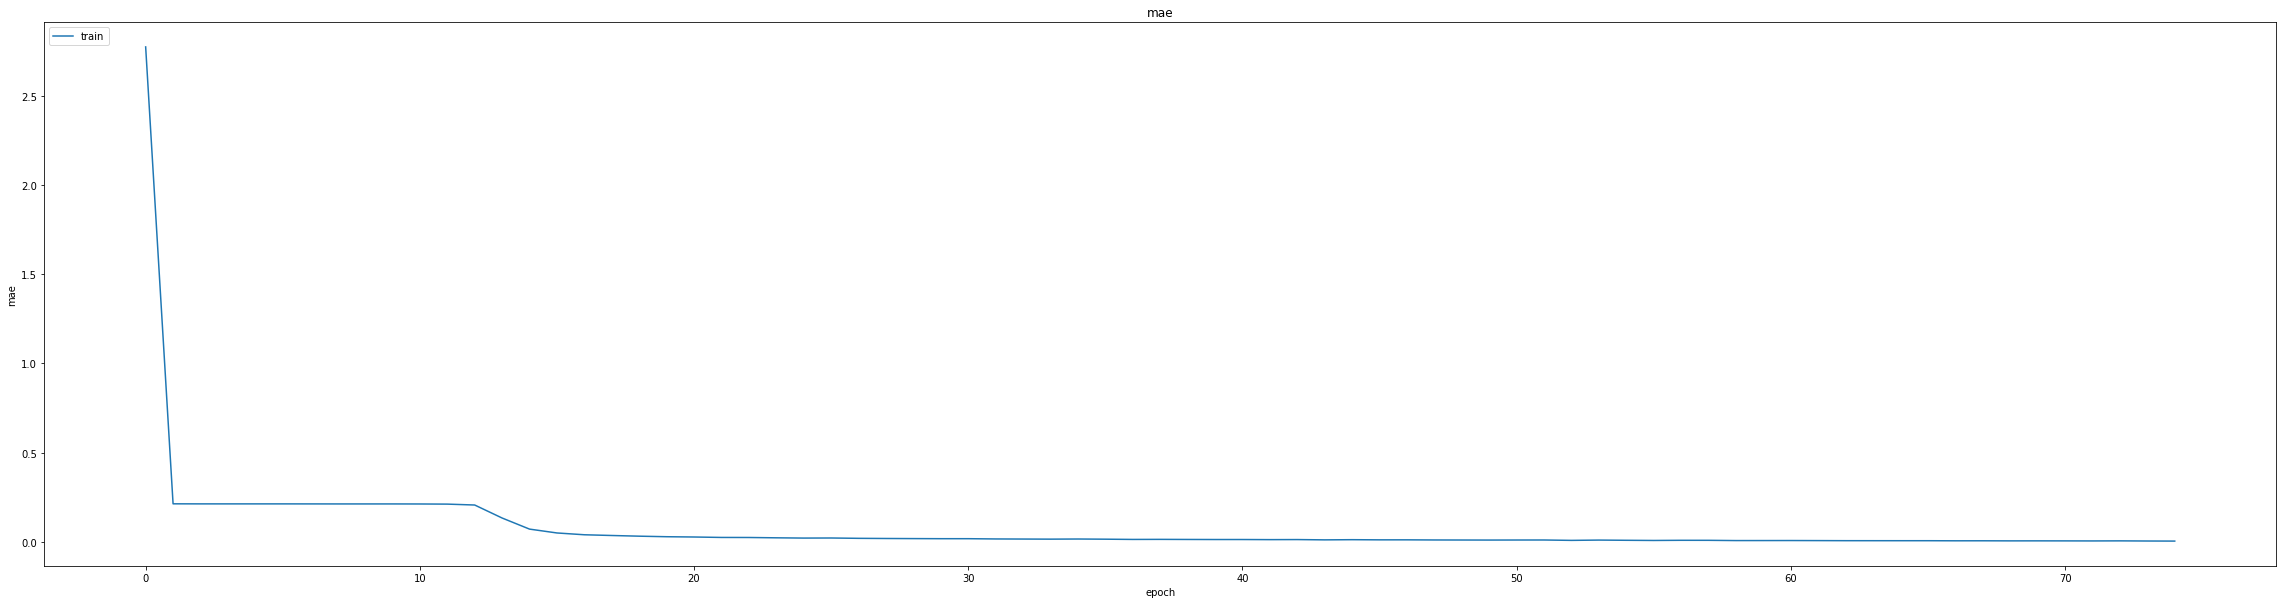

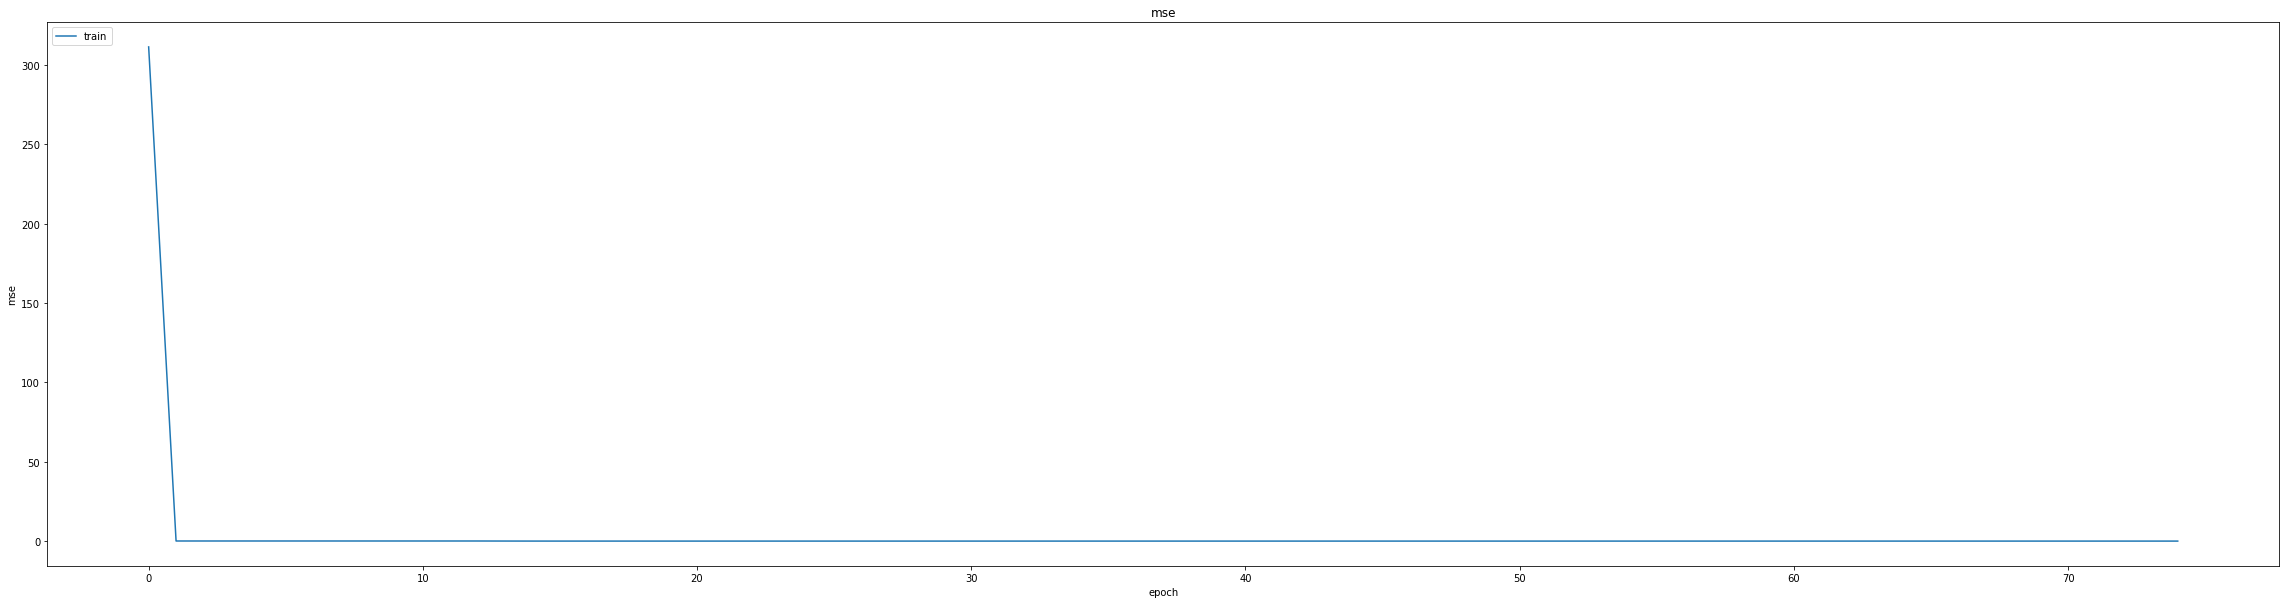

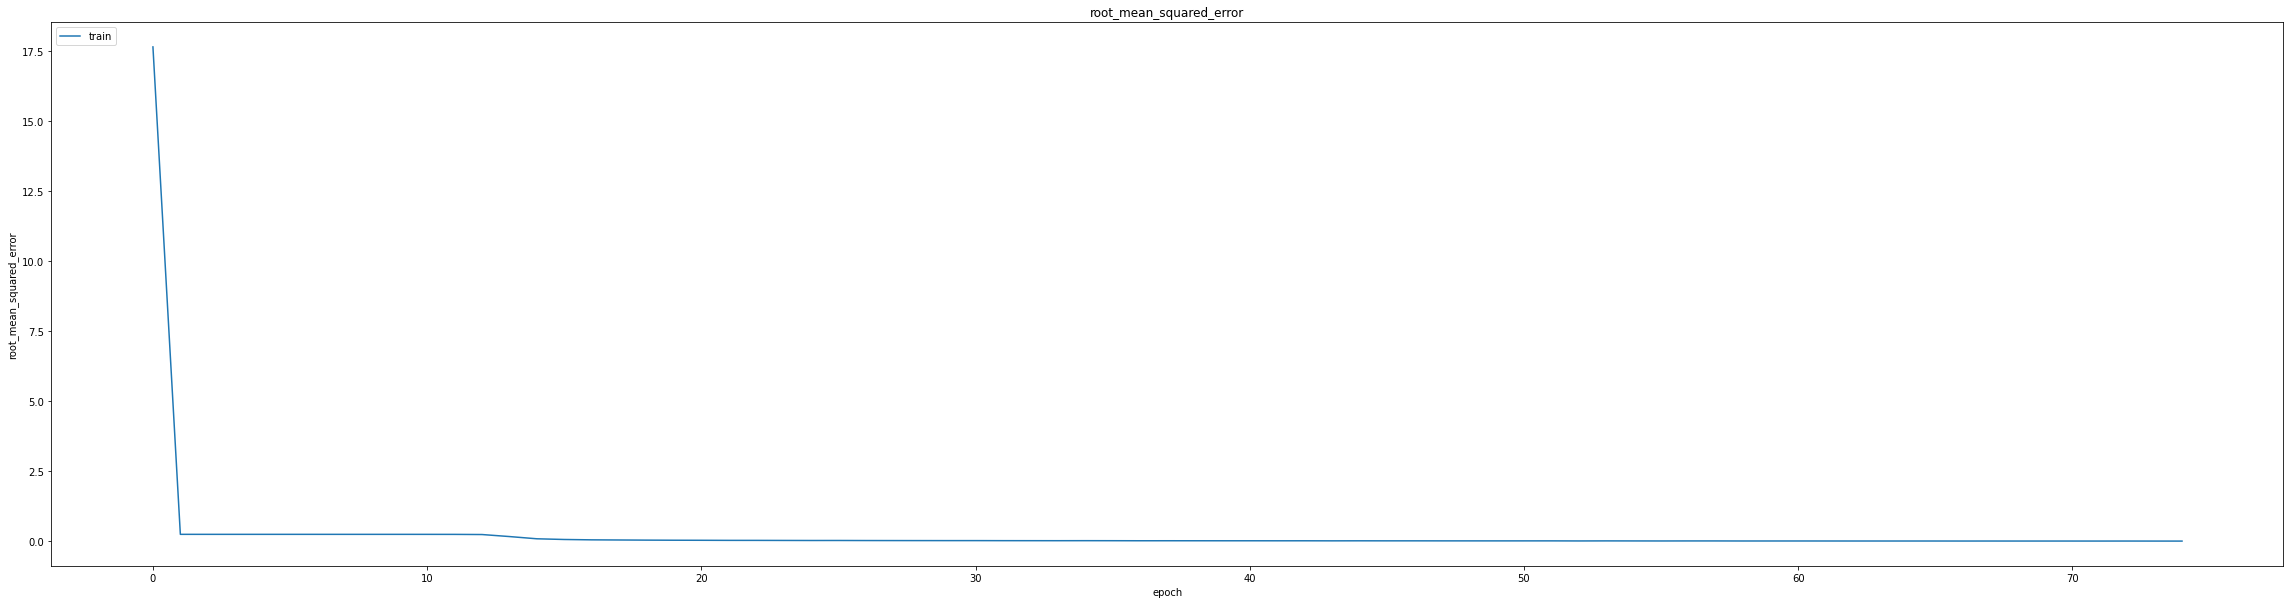

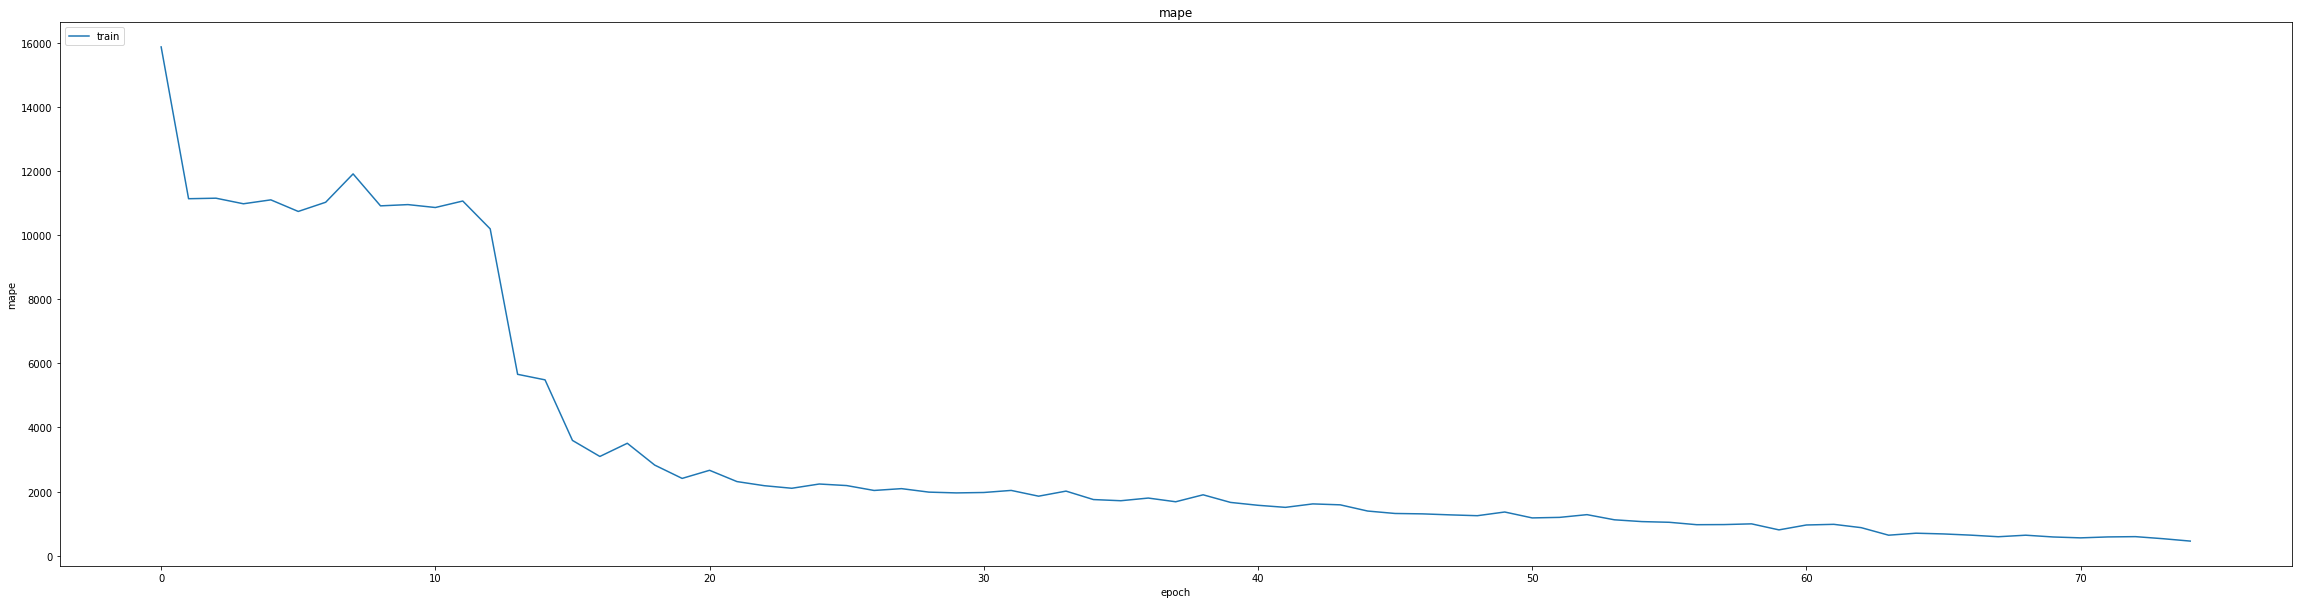

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009266844019293785
0.011966105550527573
348/348 [==============================] - 2s 4ms/step
0.9940881356657475


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
402/406 [============================>.] - ETA: 0s - loss: 5.9883e-04 - mae: 0.0124 - mse: 5.9883e-04 - root_mean_squared_error: 0.0245 - mape: 1186.0488
Epoch 1: val_mse did not improve from 0.00014
406/406 [==============================] - 11s 16ms/step - loss: 5.9385e-04 - mae: 0.0124 - mse: 5.9385e-04 - root_mean_squared_error: 0.0244 - mape: 1174.4954 - val_loss: 3.6829e-04 - val_mae: 0.0174 - val_mse: 3.6829e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 6298.6978 - lr: 0.0010
Epoch 2/25
403/406 [============================>.] - ETA: 0s - loss: 8.8209e-05 - mae: 0.0072 - mse: 8.8209e-05 - root_mean_squared_error: 0.0094 - mape: 1106.4530
Epoch 2: val_mse did not improve from 0.00014
406/406 [==============================] - 5s 13ms/step - loss: 8.8138e-05 - mae: 0.0072 - mse: 8.8138e-05 - root_mean_squared_error: 0.0094 - mape: 1098.3939 - val_loss: 3.3528e-04 - val_mae: 0.0166 - val_mse: 3.3528e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 4988.9102 

406/406 [==============================] - 19s 46ms/step - loss: 8.0880e-05 - mae: 0.0070 - mse: 8.0880e-05 - root_mean_squared_error: 0.0090 - mape: 962.7349 - val_loss: 8.2287e-05 - val_mae: 0.0068 - val_mse: 8.2287e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 4545.4131 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
403/406 [============================>.] - ETA: 0s - loss: 8.7545e-05 - mae: 0.0073 - mse: 8.7545e-05 - root_mean_squared_error: 0.0094 - mape: 757.5120
Epoch 5: val_mse did not improve from 0.00008
406/406 [==============================] - 5s 13ms/step - loss: 8.7378e-05 - mae: 0.0073 - mse: 8.7378e-05 - root_mean_squared_error: 0.0093 - mape: 751.9989 - val_loss: 3.5207e-04 - val_mae: 0.0175 - val_mse: 3.5207e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 4228.7490 - lr: 8.1000e-04
Epoch 6/25
406/406 [==============================] - ETA: 0s - loss: 8.1062e-05 - mae: 0.0069 - mse: 8.1062e-05 - root_mean_squared_error: 0.0090 - mape: 69

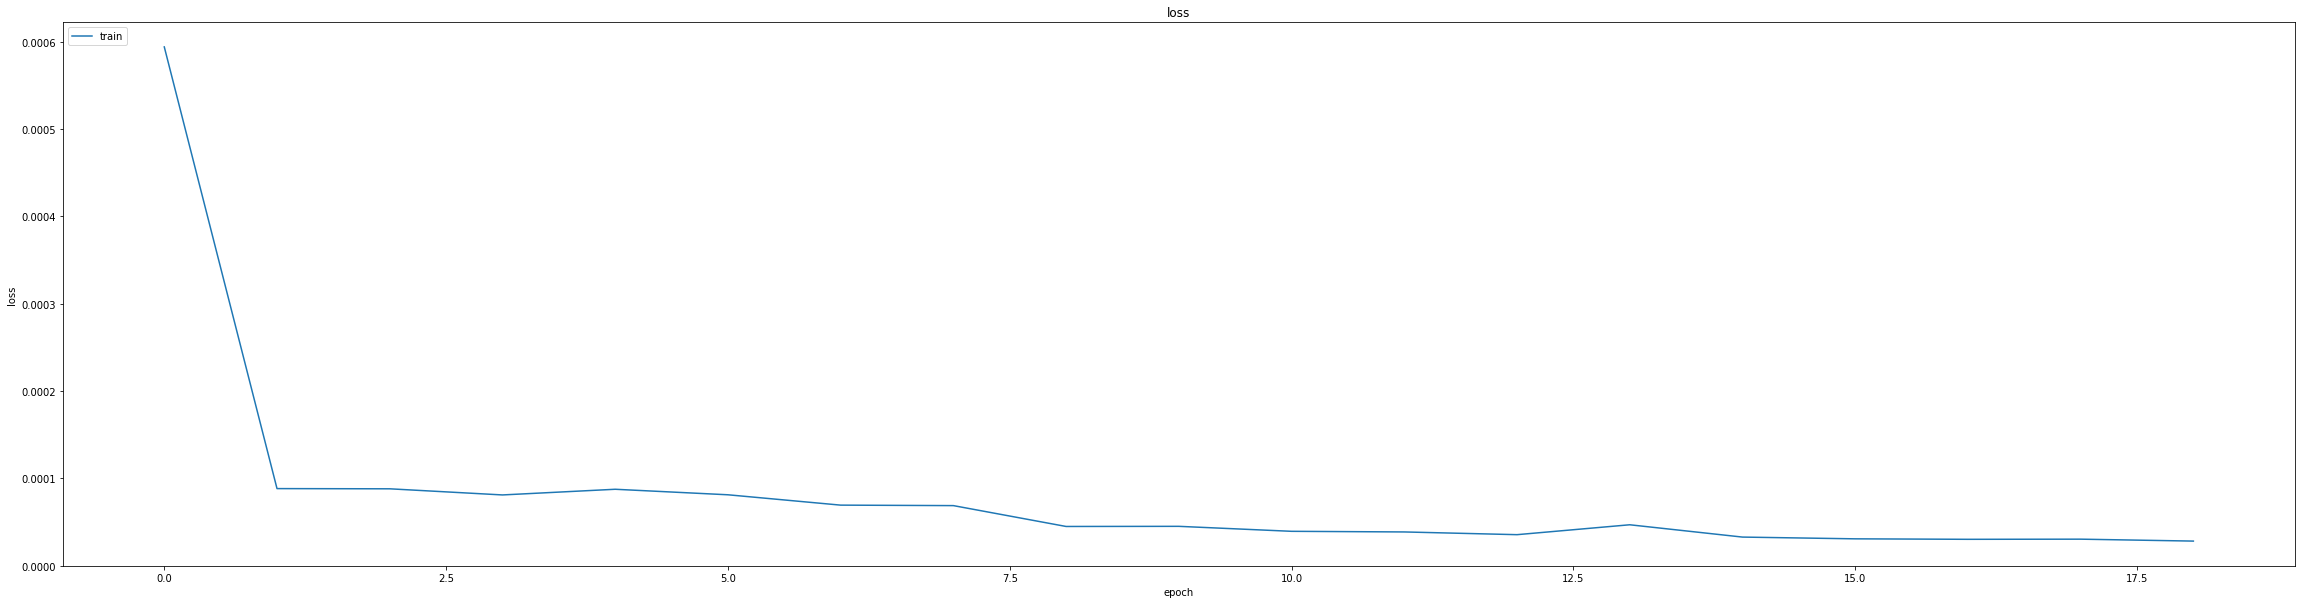

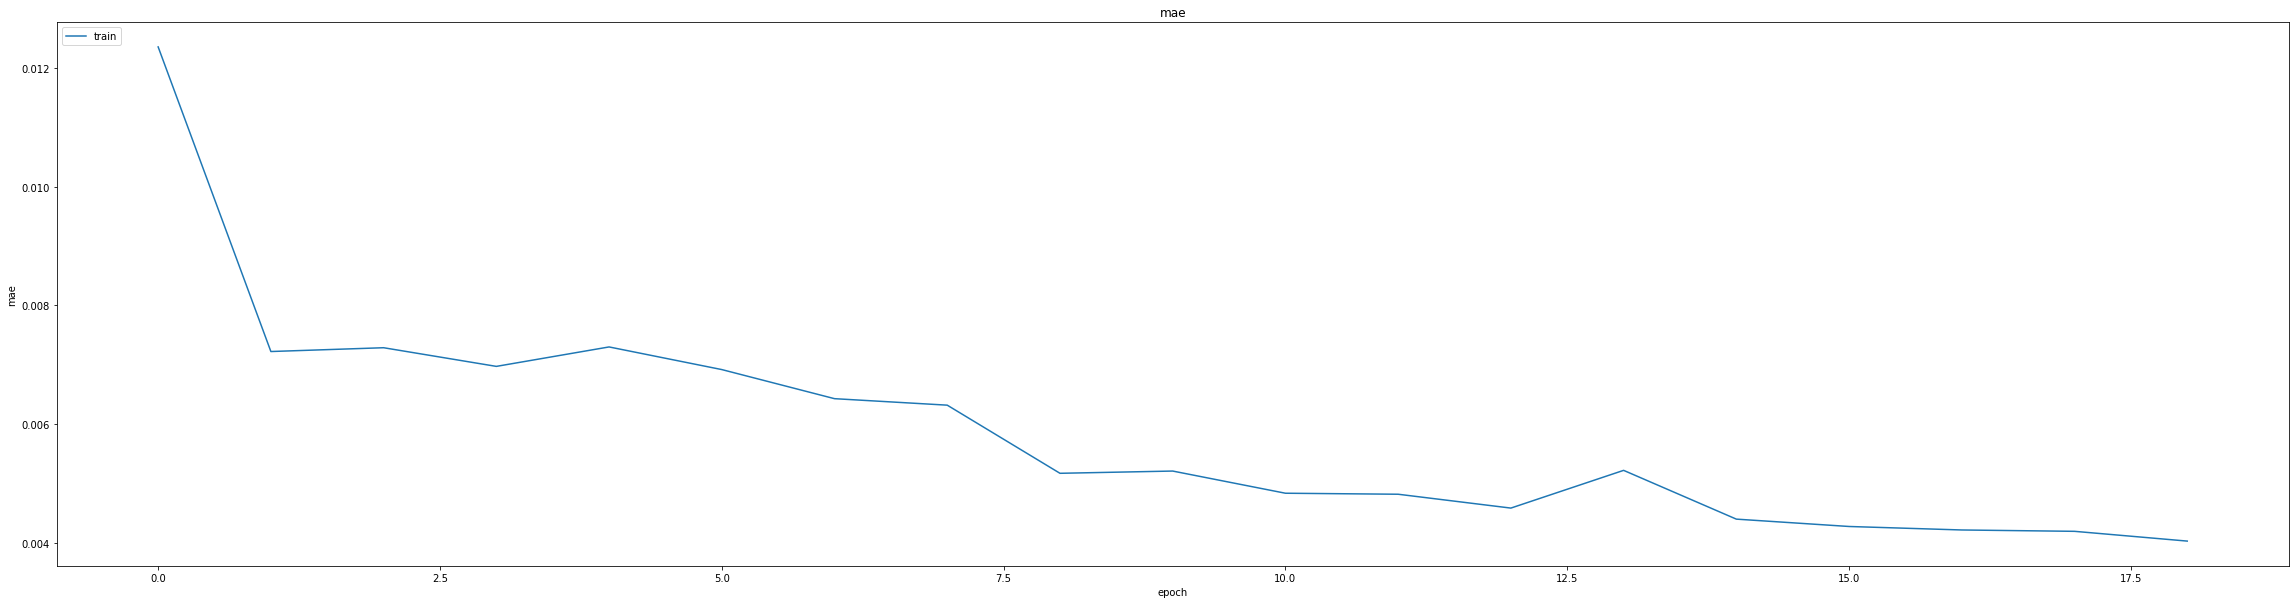

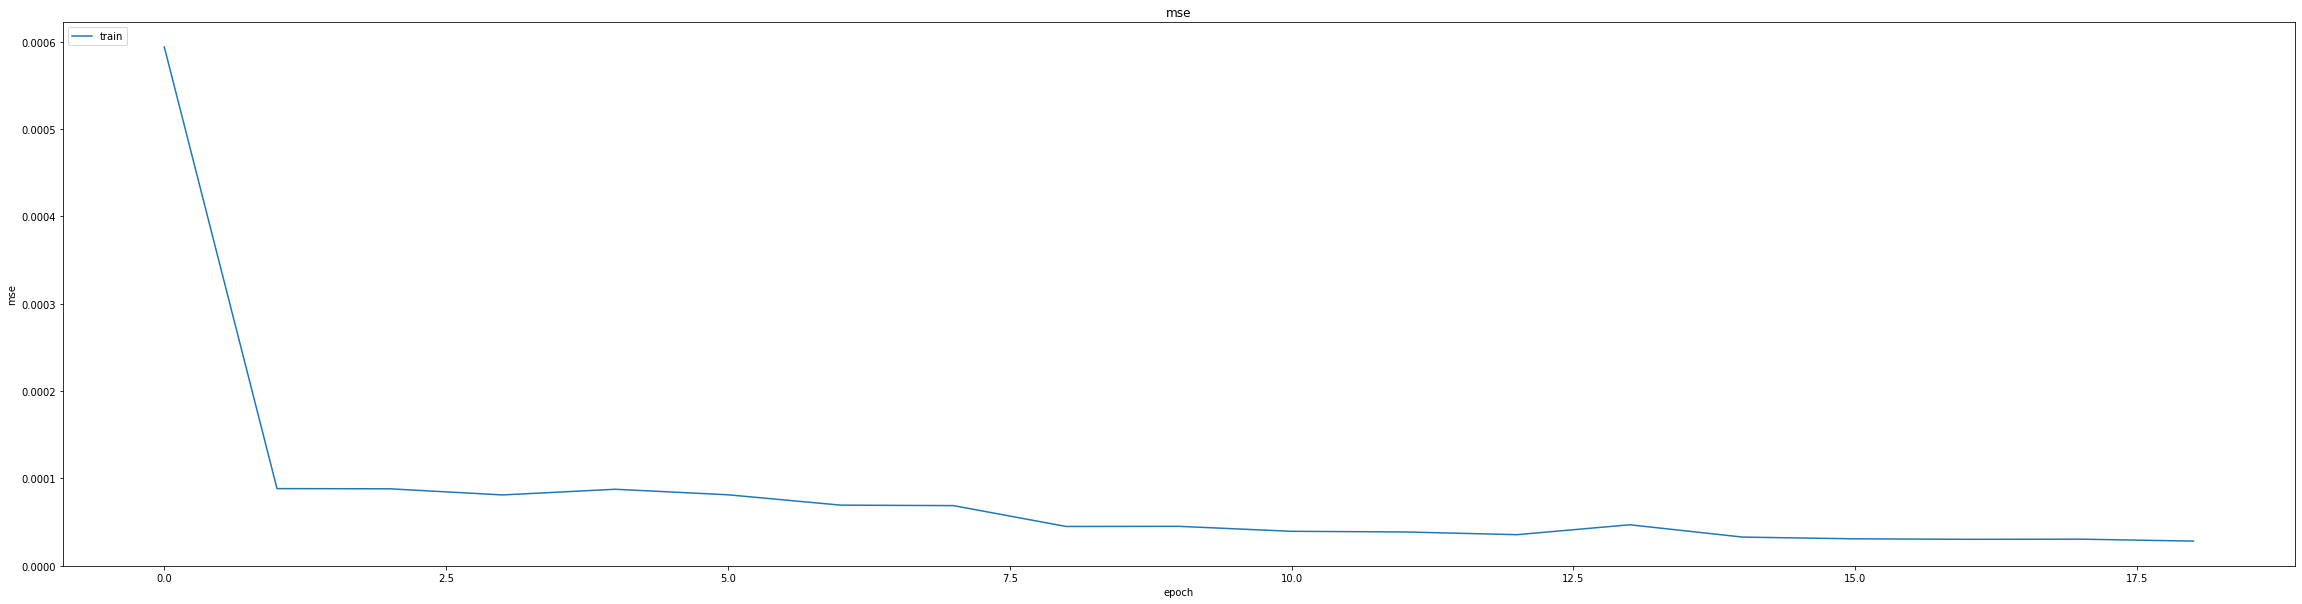

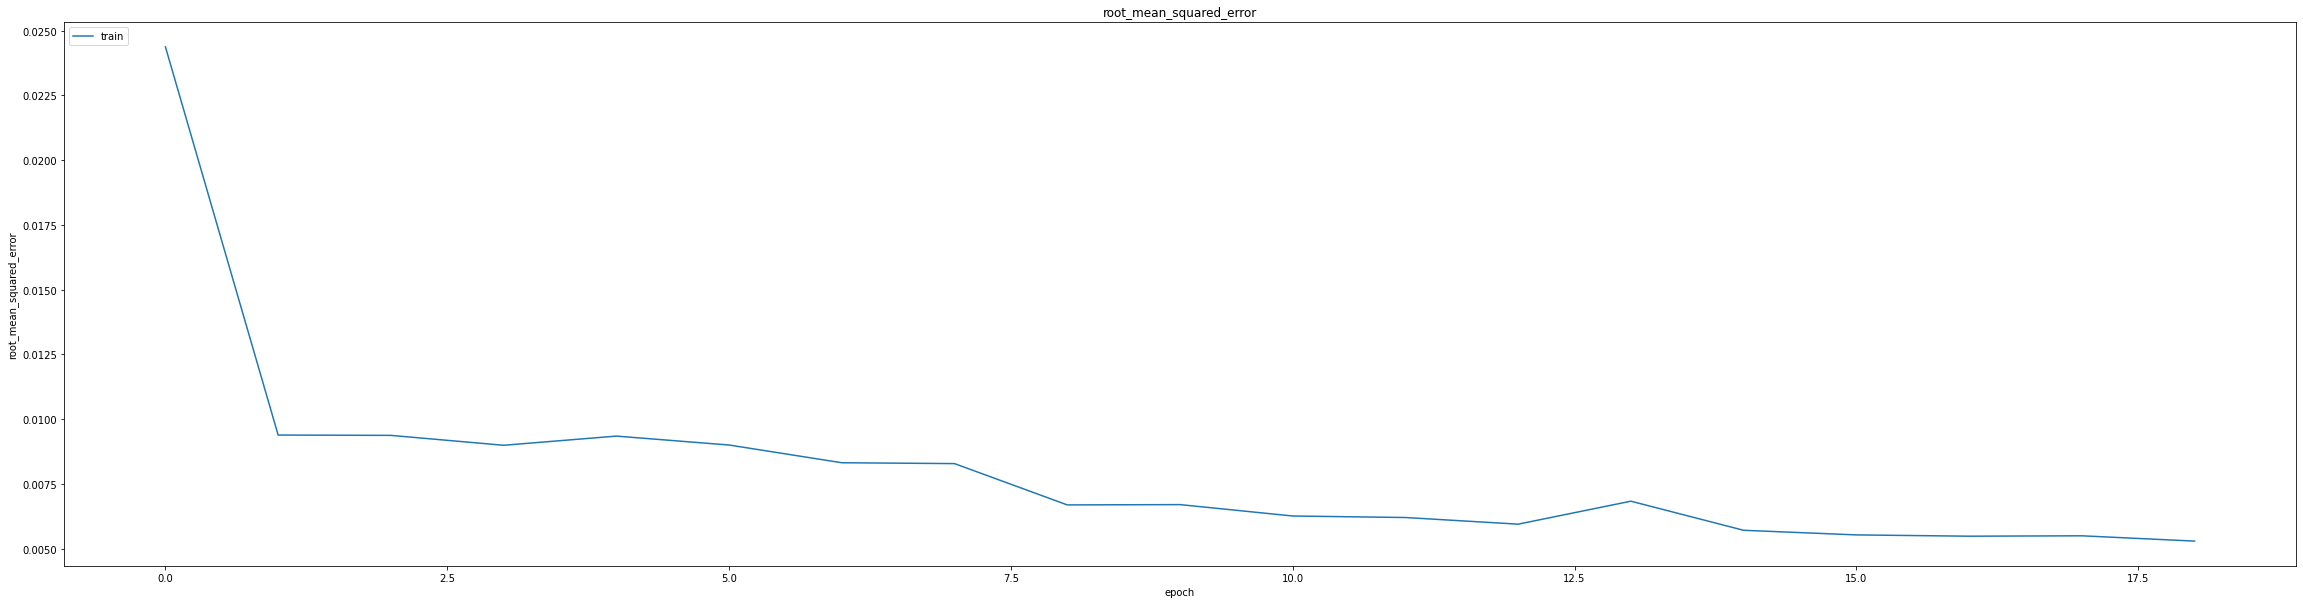

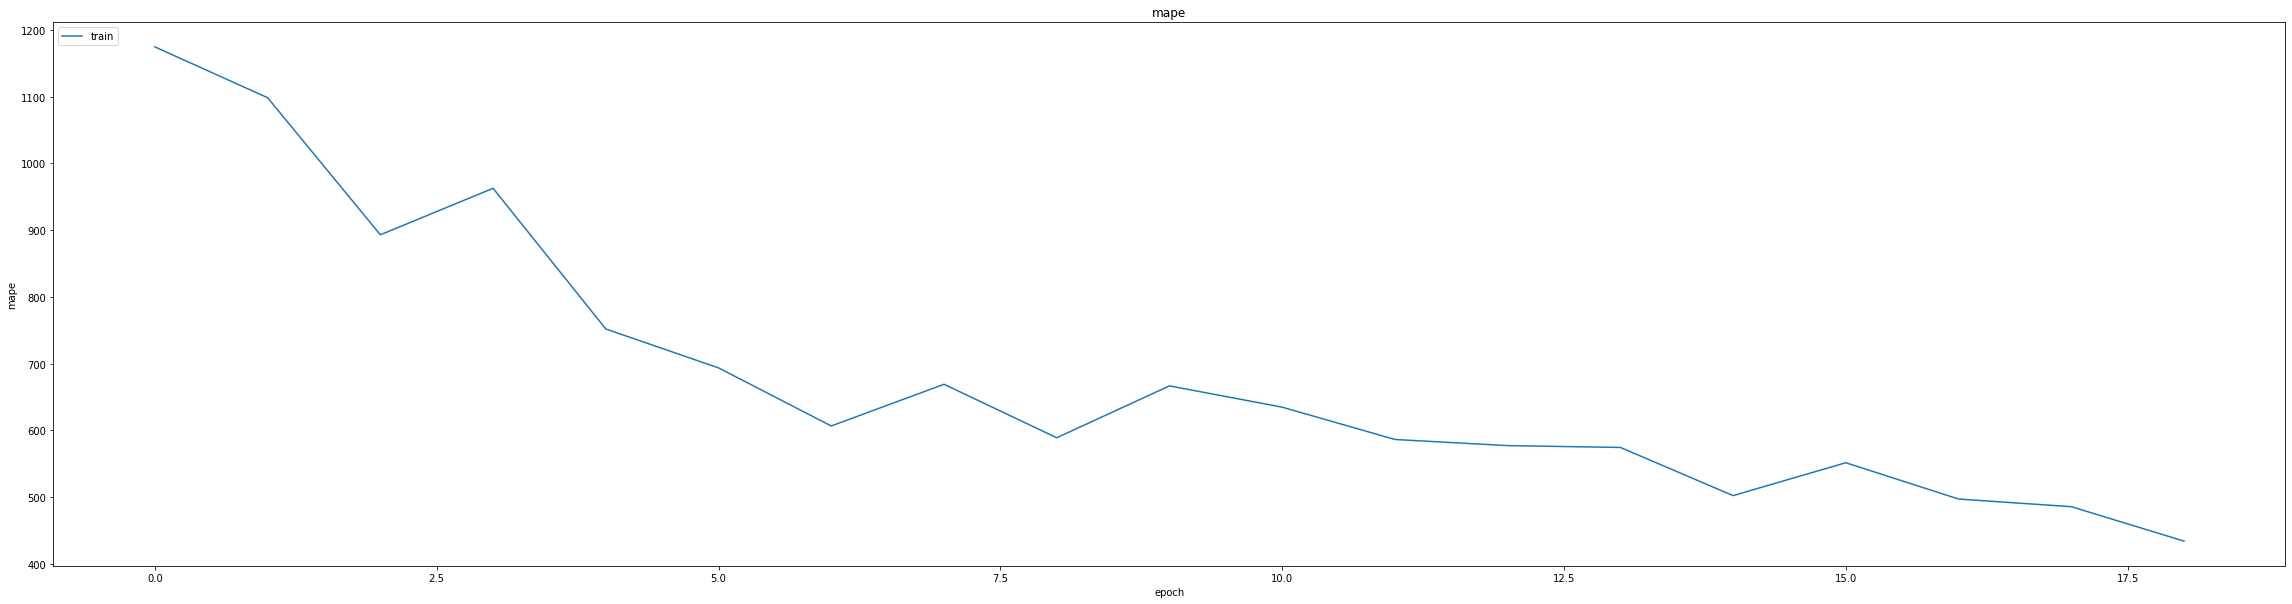

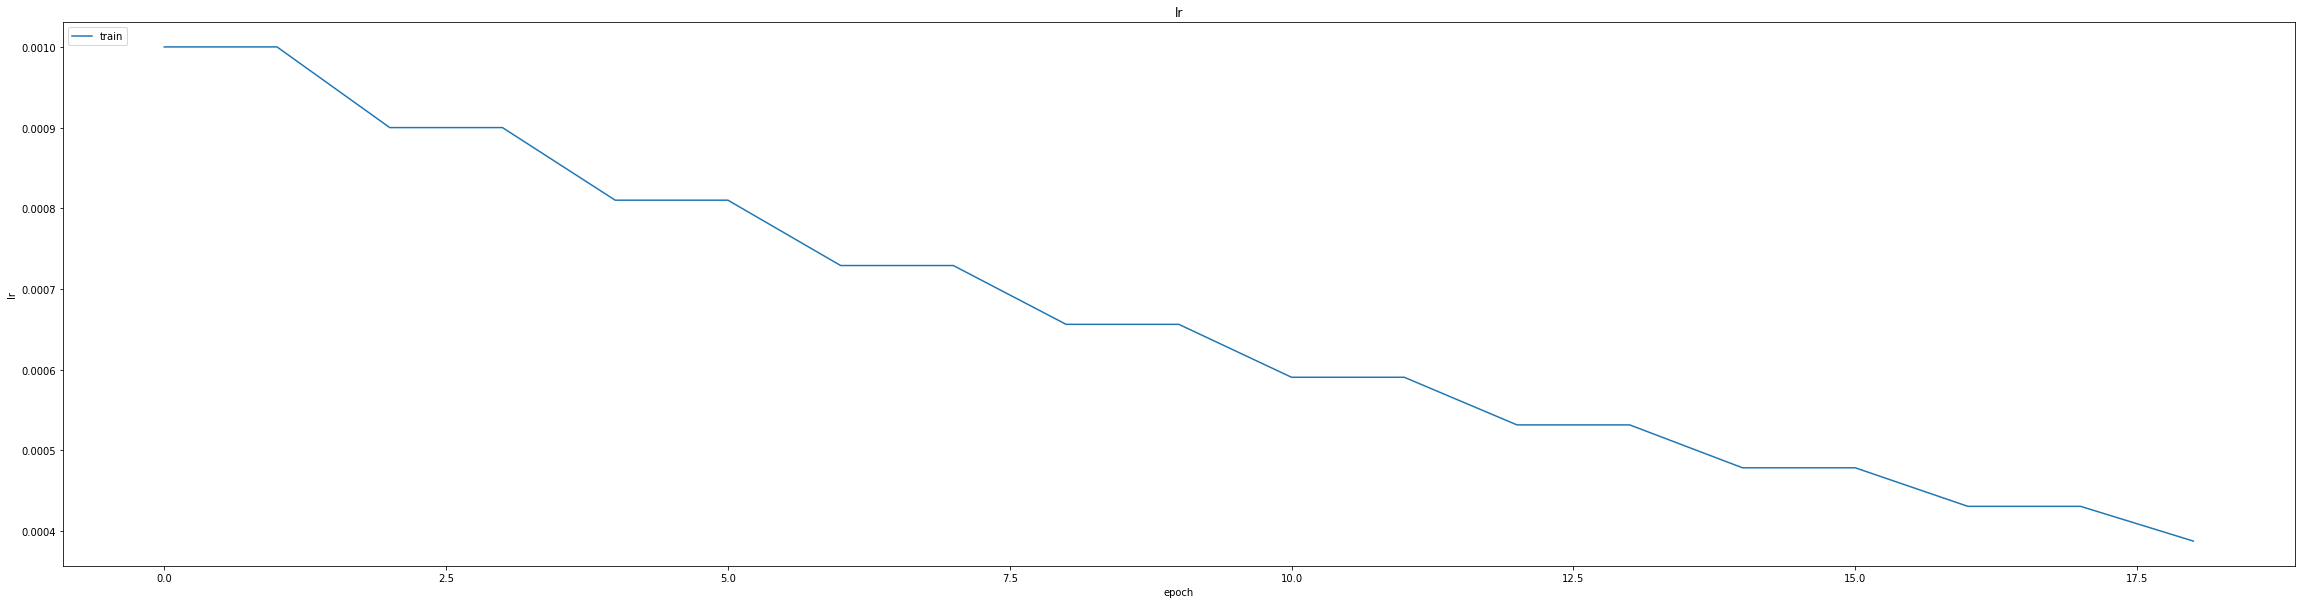

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006776783615350723
0.009071199223399162
348/348 [==============================] - 2s 4ms/step
0.9905245260243908


348/348 [==============================] - 2s 4ms/step


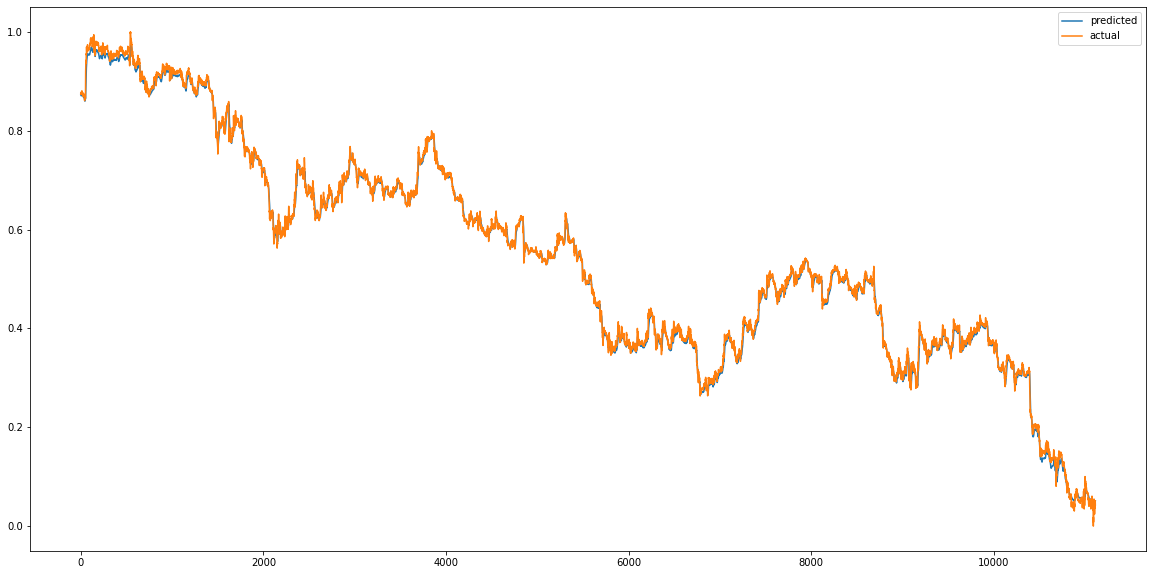

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


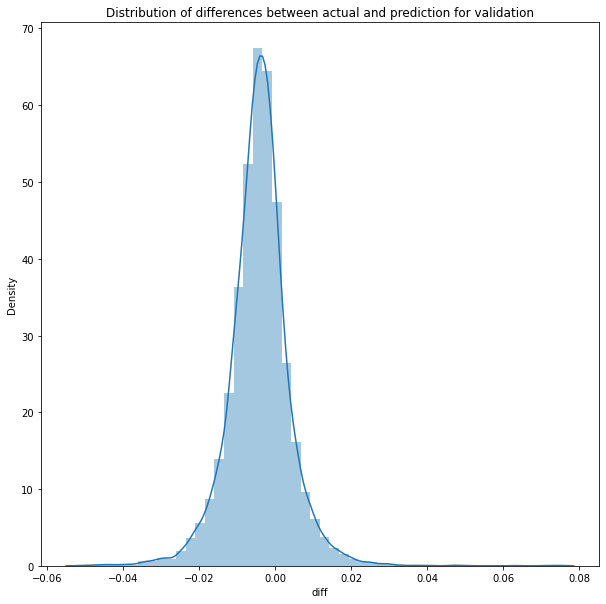

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 4ms/step


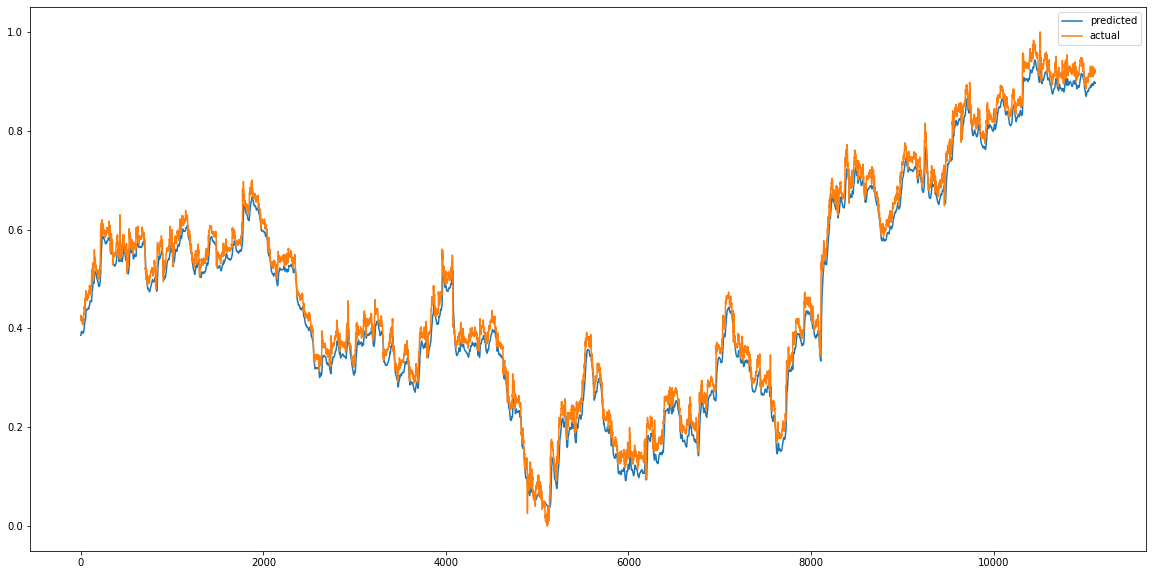

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


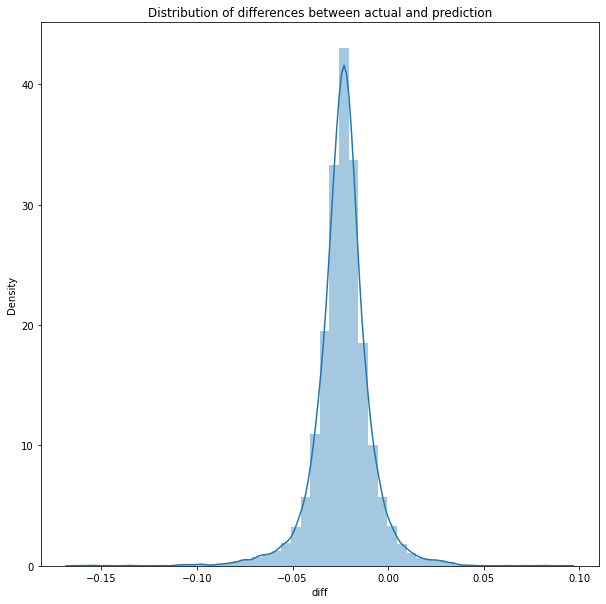

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0007680103417193316
RMSE :  0.027712999507800155
MAE :  0.024521384082235913
348/348 [==============================] - 2s 4ms/step
R2_Score  : 0.9855454938684618


count    11116.000000
mean        -0.023637
std          0.014467
min         -0.161705
25%         -0.029963
50%         -0.023291
75%         -0.016788
max          0.090303
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
406/406 [==============================] - ETA: 0s - loss: 298.4915 - mae: 2.4879 - mse: 298.4915 - root_mean_squared_error: 17.2769 - mape: 10248.3418
Epoch 1: val_mse improved from inf to 0.05032, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 42s 77ms/step - loss: 298.4915 - mae: 2.4879 - mse: 298.4915 - root_mean_squared_error: 17.2769 - mape: 10248.3418 - val_loss: 0.0503 - val_mae: 0.1852 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2243 - val_mape: 47925.2812
Epoch 2/75
403/406 [============================>.] - ETA: 0s - loss: 0.0572 - mae: 0.2063 - mse: 0.0572 - root_mean_squared_error: 0.2392 - mape: 10421.5596
Epoch 2: val_mse improved from 0.05032 to 0.04855, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 74ms/step - loss: 0.0572 - mae: 0.2063 - mse: 0.0572 - root_mean_squared_error: 0.2392 - mape: 10346.2012 - val_loss: 0.0486 - val_mae: 0.1837 - val_mse: 0.0486 - val_root_mean_squared_error: 0.2203 - val_mape: 49776.5859
Epoch 3/75
404/406 [============================>.] - ETA: 0s - loss: 0.0499 - mae: 0.1899 - mse: 0.0499 - root_mean_squared_error: 0.2233 - mape: 8886.8193
Epoch 3: val_mse improved from 0.04855 to 0.04646, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 75ms/step - loss: 0.0498 - mae: 0.1899 - mse: 0.0498 - root_mean_squared_error: 0.2232 - mape: 8844.2041 - val_loss: 0.0465 - val_mae: 0.1807 - val_mse: 0.0465 - val_root_mean_squared_error: 0.2155 - val_mape: 49398.8320
Epoch 4/75
406/406 [==============================] - ETA: 0s - loss: 0.0389 - mae: 0.1647 - mse: 0.0389 - root_mean_squared_error: 0.1971 - mape: 8639.2793
Epoch 4: val_mse improved from 0.04646 to 0.04061, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 37s 92ms/step - loss: 0.0389 - mae: 0.1647 - mse: 0.0389 - root_mean_squared_error: 0.1971 - mape: 8639.2793 - val_loss: 0.0406 - val_mae: 0.1699 - val_mse: 0.0406 - val_root_mean_squared_error: 0.2015 - val_mape: 45117.1562
Epoch 5/75
404/406 [============================>.] - ETA: 0s - loss: 0.0243 - mae: 0.1285 - mse: 0.0243 - root_mean_squared_error: 0.1560 - mape: 5653.2944
Epoch 5: val_mse improved from 0.04061 to 0.02893, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 74ms/step - loss: 0.0243 - mae: 0.1284 - mse: 0.0243 - root_mean_squared_error: 0.1559 - mape: 5626.1587 - val_loss: 0.0289 - val_mae: 0.1422 - val_mse: 0.0289 - val_root_mean_squared_error: 0.1701 - val_mape: 35830.5586
Epoch 6/75
406/406 [==============================] - ETA: 0s - loss: 0.0162 - mae: 0.1035 - mse: 0.0162 - root_mean_squared_error: 0.1272 - mape: 6247.6831
Epoch 6: val_mse improved from 0.02893 to 0.01642, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 31s 75ms/step - loss: 0.0162 - mae: 0.1035 - mse: 0.0162 - root_mean_squared_error: 0.1272 - mape: 6247.6831 - val_loss: 0.0164 - val_mae: 0.1060 - val_mse: 0.0164 - val_root_mean_squared_error: 0.1282 - val_mape: 27718.5762
Epoch 7/75
403/406 [============================>.] - ETA: 0s - loss: 0.0116 - mae: 0.0871 - mse: 0.0116 - root_mean_squared_error: 0.1075 - mape: 4566.8765
Epoch 7: val_mse improved from 0.01642 to 0.00753, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 31s 76ms/step - loss: 0.0115 - mae: 0.0871 - mse: 0.0115 - root_mean_squared_error: 0.1074 - mape: 4533.7671 - val_loss: 0.0075 - val_mae: 0.0689 - val_mse: 0.0075 - val_root_mean_squared_error: 0.0867 - val_mape: 22658.9121
Epoch 8/75
404/406 [============================>.] - ETA: 0s - loss: 0.0083 - mae: 0.0743 - mse: 0.0083 - root_mean_squared_error: 0.0913 - mape: 4149.1426
Epoch 8: val_mse improved from 0.00753 to 0.00421, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 31s 77ms/step - loss: 0.0083 - mae: 0.0743 - mse: 0.0083 - root_mean_squared_error: 0.0913 - mape: 4129.1904 - val_loss: 0.0042 - val_mae: 0.0504 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0649 - val_mape: 20907.7129
Epoch 9/75
406/406 [==============================] - ETA: 0s - loss: 0.0064 - mae: 0.0649 - mse: 0.0064 - root_mean_squared_error: 0.0799 - mape: 4271.3877
Epoch 9: val_mse improved from 0.00421 to 0.00321, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 31s 76ms/step - loss: 0.0064 - mae: 0.0649 - mse: 0.0064 - root_mean_squared_error: 0.0799 - mape: 4271.3877 - val_loss: 0.0032 - val_mae: 0.0413 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0566 - val_mape: 19901.9160
Epoch 10/75
403/406 [============================>.] - ETA: 0s - loss: 0.0052 - mae: 0.0584 - mse: 0.0052 - root_mean_squared_error: 0.0721 - mape: 3564.0759
Epoch 10: val_mse improved from 0.00321 to 0.00288, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 74ms/step - loss: 0.0052 - mae: 0.0584 - mse: 0.0052 - root_mean_squared_error: 0.0721 - mape: 3538.2117 - val_loss: 0.0029 - val_mae: 0.0387 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0537 - val_mape: 19393.1738
Epoch 11/75
403/406 [============================>.] - ETA: 0s - loss: 0.0044 - mae: 0.0533 - mse: 0.0044 - root_mean_squared_error: 0.0660 - mape: 3348.0254
Epoch 11: val_mse improved from 0.00288 to 0.00284, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 75ms/step - loss: 0.0044 - mae: 0.0533 - mse: 0.0044 - root_mean_squared_error: 0.0660 - mape: 3323.7234 - val_loss: 0.0028 - val_mae: 0.0399 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0533 - val_mape: 18550.5391
Epoch 12/75
403/406 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0488 - mse: 0.0037 - root_mean_squared_error: 0.0609 - mape: 3295.7947
Epoch 12: val_mse improved from 0.00284 to 0.00225, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 31s 76ms/step - loss: 0.0037 - mae: 0.0488 - mse: 0.0037 - root_mean_squared_error: 0.0609 - mape: 3271.8801 - val_loss: 0.0023 - val_mae: 0.0329 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0474 - val_mape: 17217.1426
Epoch 13/75
404/406 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0442 - mse: 0.0030 - root_mean_squared_error: 0.0551 - mape: 3224.7637
Epoch 13: val_mse improved from 0.00225 to 0.00163, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 74ms/step - loss: 0.0030 - mae: 0.0442 - mse: 0.0030 - root_mean_squared_error: 0.0551 - mape: 3209.2393 - val_loss: 0.0016 - val_mae: 0.0276 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0404 - val_mape: 15787.5576
Epoch 14/75
403/406 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0399 - mse: 0.0025 - root_mean_squared_error: 0.0500 - mape: 2831.2512
Epoch 14: val_mse did not improve from 0.00163
406/406 [==============================] - 7s 17ms/step - loss: 0.0025 - mae: 0.0399 - mse: 0.0025 - root_mean_squared_error: 0.0500 - mape: 2810.7043 - val_loss: 0.0017 - val_mae: 0.0286 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0411 - val_mape: 15051.7295
Epoch 15/75
403/406 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0362 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 2764.3818
Epoch 15: val_mse improved from 0.00163 to 0.00141, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 31s 76ms/step - loss: 0.0021 - mae: 0.0362 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 2744.3003 - val_loss: 0.0014 - val_mae: 0.0265 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0375 - val_mape: 13913.0830
Epoch 16/75
406/406 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0331 - mse: 0.0017 - root_mean_squared_error: 0.0417 - mape: 2249.1504
Epoch 16: val_mse improved from 0.00141 to 0.00110, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 74ms/step - loss: 0.0017 - mae: 0.0331 - mse: 0.0017 - root_mean_squared_error: 0.0417 - mape: 2249.1504 - val_loss: 0.0011 - val_mae: 0.0230 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 12943.4951
Epoch 17/75
404/406 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0303 - mse: 0.0015 - root_mean_squared_error: 0.0383 - mape: 2580.3604
Epoch 17: val_mse improved from 0.00110 to 0.00079, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 31s 77ms/step - loss: 0.0015 - mae: 0.0304 - mse: 0.0015 - root_mean_squared_error: 0.0383 - mape: 2567.9514 - val_loss: 7.8657e-04 - val_mae: 0.0193 - val_mse: 7.8657e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 12170.2549
Epoch 18/75
406/406 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0275 - mse: 0.0012 - root_mean_squared_error: 0.0348 - mape: 2233.3291
Epoch 18: val_mse did not improve from 0.00079
406/406 [==============================] - 7s 17ms/step - loss: 0.0012 - mae: 0.0275 - mse: 0.0012 - root_mean_squared_error: 0.0348 - mape: 2233.3291 - val_loss: 9.1892e-04 - val_mae: 0.0235 - val_mse: 9.1892e-04 - val_root_mean_squared_error: 0.0303 - val_mape: 11919.6006
Epoch 19/75
406/406 [==============================] - ETA: 0s - loss: 9.9587e-04 - mae: 0.0249 - mse: 9.9587e-04 - root_mean_squared_error: 0.0316 - mape: 2144.6265
Epoch 19: val_mse improved from 0.00079 to 0.00072, saving model to /content/d

406/406 [==============================] - 30s 74ms/step - loss: 9.9587e-04 - mae: 0.0249 - mse: 9.9587e-04 - root_mean_squared_error: 0.0316 - mape: 2144.6265 - val_loss: 7.2329e-04 - val_mae: 0.0198 - val_mse: 7.2329e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 11375.8379
Epoch 20/75
405/406 [============================>.] - ETA: 0s - loss: 8.2426e-04 - mae: 0.0226 - mse: 8.2426e-04 - root_mean_squared_error: 0.0287 - mape: 2202.6912
Epoch 20: val_mse improved from 0.00072 to 0.00061, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 75ms/step - loss: 8.2422e-04 - mae: 0.0226 - mse: 8.2422e-04 - root_mean_squared_error: 0.0287 - mape: 2197.4900 - val_loss: 6.0594e-04 - val_mae: 0.0176 - val_mse: 6.0594e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 11055.5742
Epoch 21/75
404/406 [============================>.] - ETA: 0s - loss: 6.7095e-04 - mae: 0.0203 - mse: 6.7095e-04 - root_mean_squared_error: 0.0259 - mape: 2088.8914
Epoch 21: val_mse improved from 0.00061 to 0.00057, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 74ms/step - loss: 6.7103e-04 - mae: 0.0203 - mse: 6.7103e-04 - root_mean_squared_error: 0.0259 - mape: 2078.8428 - val_loss: 5.6822e-04 - val_mae: 0.0170 - val_mse: 5.6822e-04 - val_root_mean_squared_error: 0.0238 - val_mape: 10844.7363
Epoch 22/75
405/406 [============================>.] - ETA: 0s - loss: 5.8412e-04 - mae: 0.0189 - mse: 5.8412e-04 - root_mean_squared_error: 0.0242 - mape: 2087.5469
Epoch 22: val_mse improved from 0.00057 to 0.00055, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 31s 77ms/step - loss: 5.8416e-04 - mae: 0.0189 - mse: 5.8416e-04 - root_mean_squared_error: 0.0242 - mape: 2082.6179 - val_loss: 5.4830e-04 - val_mae: 0.0171 - val_mse: 5.4830e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 10541.6426
Epoch 23/75
405/406 [============================>.] - ETA: 0s - loss: 5.2577e-04 - mae: 0.0180 - mse: 5.2577e-04 - root_mean_squared_error: 0.0229 - mape: 1922.5507
Epoch 23: val_mse improved from 0.00055 to 0.00045, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 74ms/step - loss: 5.2581e-04 - mae: 0.0180 - mse: 5.2581e-04 - root_mean_squared_error: 0.0229 - mape: 1918.0431 - val_loss: 4.5167e-04 - val_mae: 0.0153 - val_mse: 4.5167e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 10083.1426
Epoch 24/75
405/406 [============================>.] - ETA: 0s - loss: 4.5552e-04 - mae: 0.0167 - mse: 4.5552e-04 - root_mean_squared_error: 0.0213 - mape: 1893.4077
Epoch 24: val_mse improved from 0.00045 to 0.00037, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 75ms/step - loss: 4.5560e-04 - mae: 0.0167 - mse: 4.5560e-04 - root_mean_squared_error: 0.0213 - mape: 1888.9456 - val_loss: 3.7206e-04 - val_mae: 0.0129 - val_mse: 3.7206e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 10109.3213
Epoch 25/75
406/406 [==============================] - ETA: 0s - loss: 4.1009e-04 - mae: 0.0158 - mse: 4.1009e-04 - root_mean_squared_error: 0.0203 - mape: 1961.2087
Epoch 25: val_mse did not improve from 0.00037
406/406 [==============================] - 7s 17ms/step - loss: 4.1009e-04 - mae: 0.0158 - mse: 4.1009e-04 - root_mean_squared_error: 0.0203 - mape: 1961.2087 - val_loss: 5.9636e-04 - val_mae: 0.0191 - val_mse: 5.9636e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 10165.1963
Epoch 26/75
404/406 [============================>.] - ETA: 0s - loss: 3.6384e-04 - mae: 0.0149 - mse: 3.6384e-04 - root_mean_squared_error: 0.0191 - mape: 1773.2131
Epoch 26: val_mse improved from 0.00037 to 0.00033, sa

406/406 [==============================] - 30s 74ms/step - loss: 3.6380e-04 - mae: 0.0149 - mse: 3.6380e-04 - root_mean_squared_error: 0.0191 - mape: 1764.6694 - val_loss: 3.2655e-04 - val_mae: 0.0125 - val_mse: 3.2655e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 9607.6396
Epoch 27/75
406/406 [==============================] - ETA: 0s - loss: 3.5798e-04 - mae: 0.0148 - mse: 3.5798e-04 - root_mean_squared_error: 0.0189 - mape: 1823.6145
Epoch 27: val_mse did not improve from 0.00033
406/406 [==============================] - 7s 17ms/step - loss: 3.5798e-04 - mae: 0.0148 - mse: 3.5798e-04 - root_mean_squared_error: 0.0189 - mape: 1823.6145 - val_loss: 3.7764e-04 - val_mae: 0.0135 - val_mse: 3.7764e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 9712.6338
Epoch 28/75
406/406 [==============================] - ETA: 0s - loss: 3.1019e-04 - mae: 0.0137 - mse: 3.1019e-04 - root_mean_squared_error: 0.0176 - mape: 1688.5699
Epoch 28: val_mse did not improve from 0.00033
406/406 [

406/406 [==============================] - 30s 73ms/step - loss: 2.9141e-04 - mae: 0.0133 - mse: 2.9141e-04 - root_mean_squared_error: 0.0171 - mape: 1665.0817 - val_loss: 2.9694e-04 - val_mae: 0.0116 - val_mse: 2.9694e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 9172.5342
Epoch 32/75
406/406 [==============================] - ETA: 0s - loss: 2.4900e-04 - mae: 0.0123 - mse: 2.4900e-04 - root_mean_squared_error: 0.0158 - mape: 1571.0099
Epoch 32: val_mse improved from 0.00030 to 0.00029, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 74ms/step - loss: 2.4900e-04 - mae: 0.0123 - mse: 2.4900e-04 - root_mean_squared_error: 0.0158 - mape: 1571.0099 - val_loss: 2.9089e-04 - val_mae: 0.0125 - val_mse: 2.9089e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 8591.9854
Epoch 33/75
403/406 [============================>.] - ETA: 0s - loss: 2.6001e-04 - mae: 0.0125 - mse: 2.6001e-04 - root_mean_squared_error: 0.0161 - mape: 1480.5864
Epoch 33: val_mse improved from 0.00029 to 0.00026, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 74ms/step - loss: 2.5929e-04 - mae: 0.0125 - mse: 2.5929e-04 - root_mean_squared_error: 0.0161 - mape: 1469.8099 - val_loss: 2.6275e-04 - val_mae: 0.0122 - val_mse: 2.6275e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 8255.7168
Epoch 34/75
404/406 [============================>.] - ETA: 0s - loss: 2.2485e-04 - mae: 0.0117 - mse: 2.2485e-04 - root_mean_squared_error: 0.0150 - mape: 1619.0181
Epoch 34: val_mse did not improve from 0.00026
406/406 [==============================] - 7s 17ms/step - loss: 2.2477e-04 - mae: 0.0117 - mse: 2.2477e-04 - root_mean_squared_error: 0.0150 - mape: 1611.2117 - val_loss: 2.8410e-04 - val_mae: 0.0129 - val_mse: 2.8410e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 7907.4863
Epoch 35/75
404/406 [============================>.] - ETA: 0s - loss: 2.1583e-04 - mae: 0.0115 - mse: 2.1583e-04 - root_mean_squared_error: 0.0147 - mape: 1567.7800
Epoch 35: val_mse did not improve from 0.00026
406/406 [

406/406 [==============================] - 31s 78ms/step - loss: 2.7610e-04 - mae: 0.0124 - mse: 2.7610e-04 - root_mean_squared_error: 0.0166 - mape: 1544.5271 - val_loss: 1.5557e-04 - val_mae: 0.0089 - val_mse: 1.5557e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 7205.6084
Epoch 38/75
403/406 [============================>.] - ETA: 0s - loss: 2.1952e-04 - mae: 0.0114 - mse: 2.1952e-04 - root_mean_squared_error: 0.0148 - mape: 1526.5555
Epoch 38: val_mse did not improve from 0.00016
406/406 [==============================] - 7s 17ms/step - loss: 2.1981e-04 - mae: 0.0114 - mse: 2.1981e-04 - root_mean_squared_error: 0.0148 - mape: 1515.4402 - val_loss: 2.4629e-04 - val_mae: 0.0123 - val_mse: 2.4629e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 7064.7681
Epoch 39/75
403/406 [============================>.] - ETA: 0s - loss: 2.9170e-04 - mae: 0.0123 - mse: 2.9170e-04 - root_mean_squared_error: 0.0171 - mape: 1351.0898
Epoch 39: val_mse did not improve from 0.00016
406/406 [

406/406 [==============================] - 29s 72ms/step - loss: 1.5433e-04 - mae: 0.0097 - mse: 1.5433e-04 - root_mean_squared_error: 0.0124 - mape: 1200.2406 - val_loss: 1.0348e-04 - val_mae: 0.0076 - val_mse: 1.0348e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 6108.5322
Epoch 44/75
406/406 [==============================] - ETA: 0s - loss: 1.8374e-04 - mae: 0.0103 - mse: 1.8374e-04 - root_mean_squared_error: 0.0136 - mape: 1168.2686
Epoch 44: val_mse did not improve from 0.00010
406/406 [==============================] - 7s 17ms/step - loss: 1.8374e-04 - mae: 0.0103 - mse: 1.8374e-04 - root_mean_squared_error: 0.0136 - mape: 1168.2686 - val_loss: 1.6204e-04 - val_mae: 0.0102 - val_mse: 1.6204e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 5914.0933
Epoch 45/75
406/406 [==============================] - ETA: 0s - loss: 1.6523e-04 - mae: 0.0100 - mse: 1.6523e-04 - root_mean_squared_error: 0.0129 - mape: 1106.9033
Epoch 45: val_mse did not improve from 0.00010
406/406 [

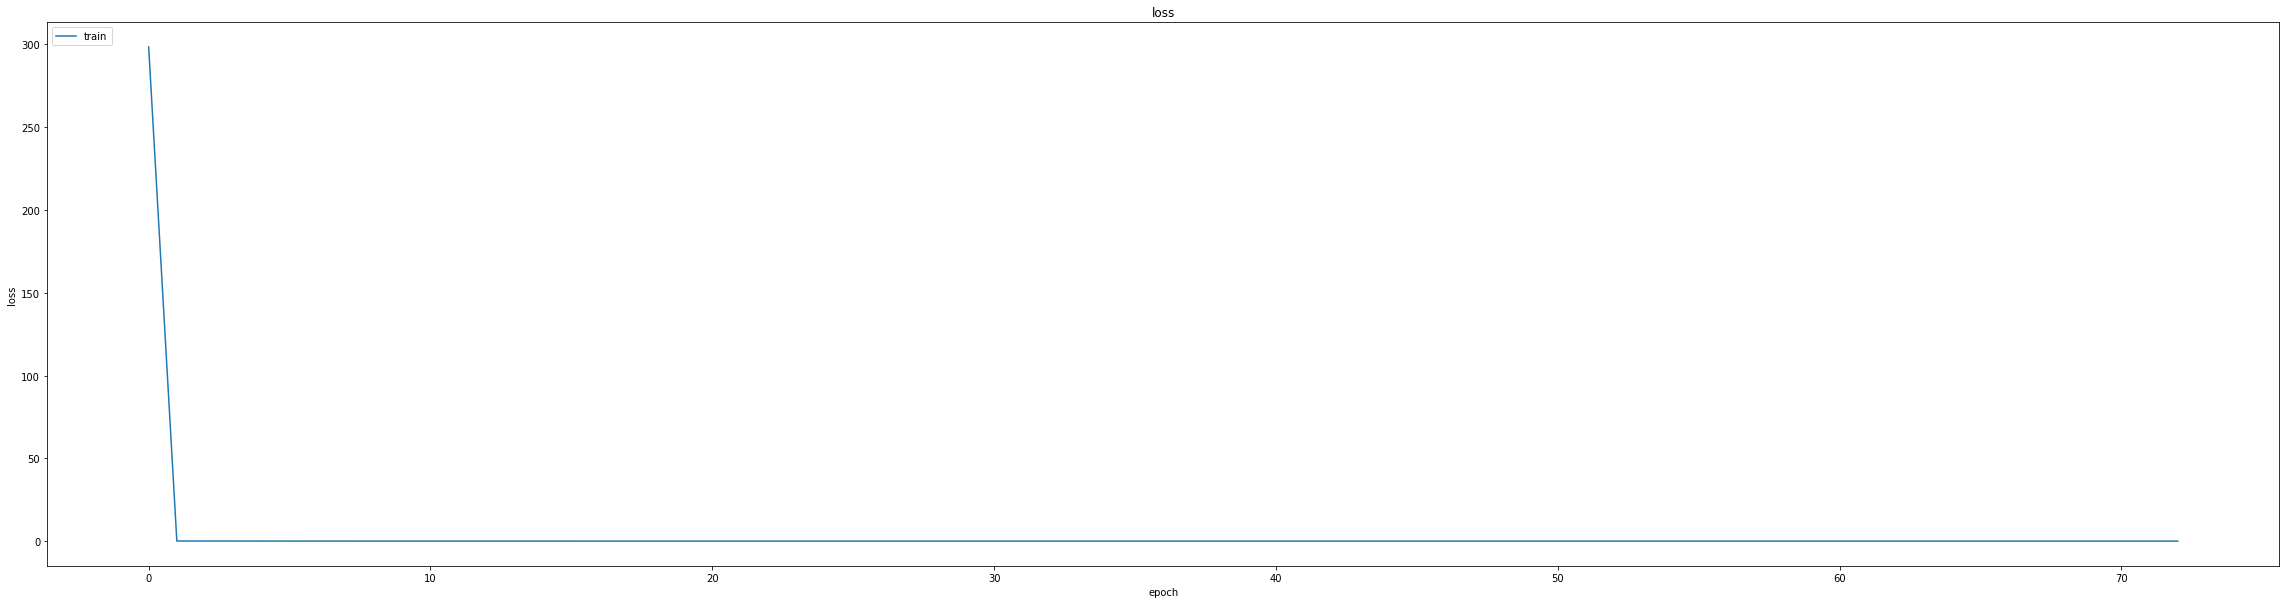

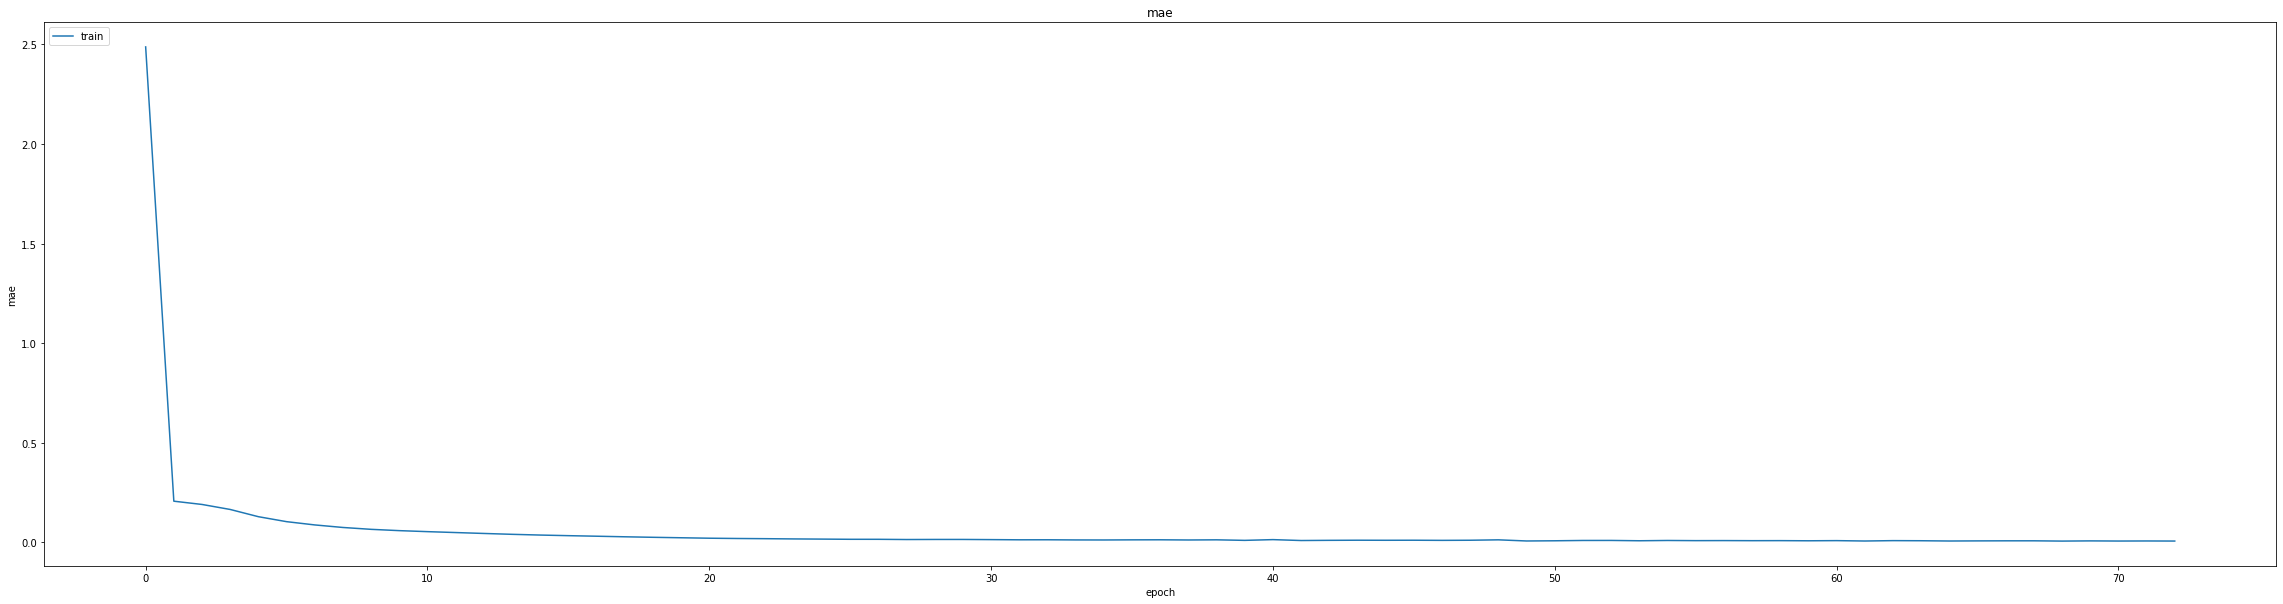

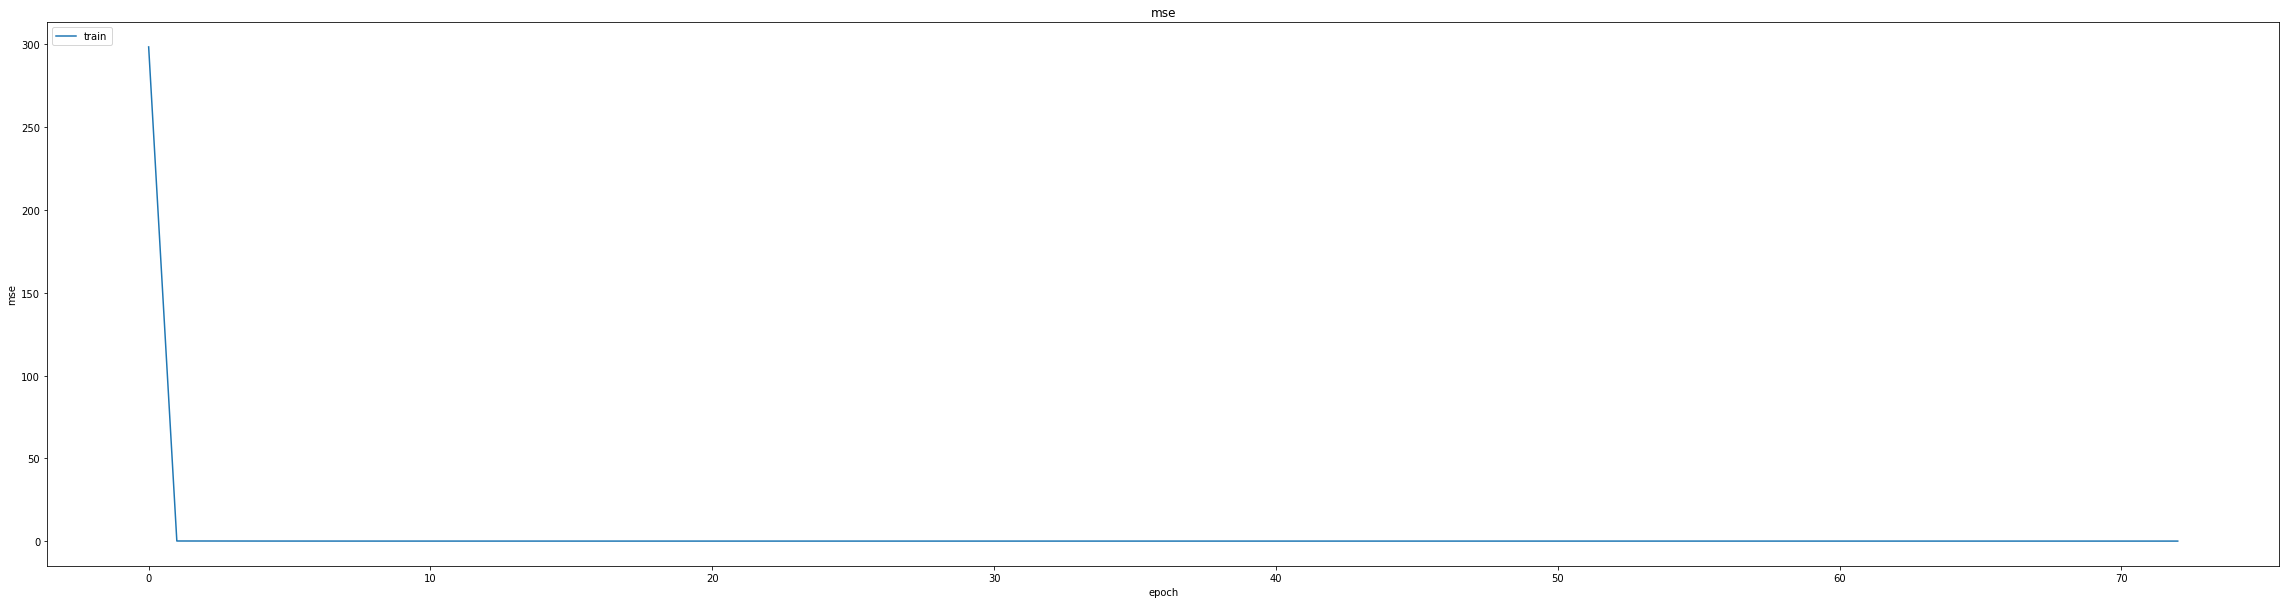

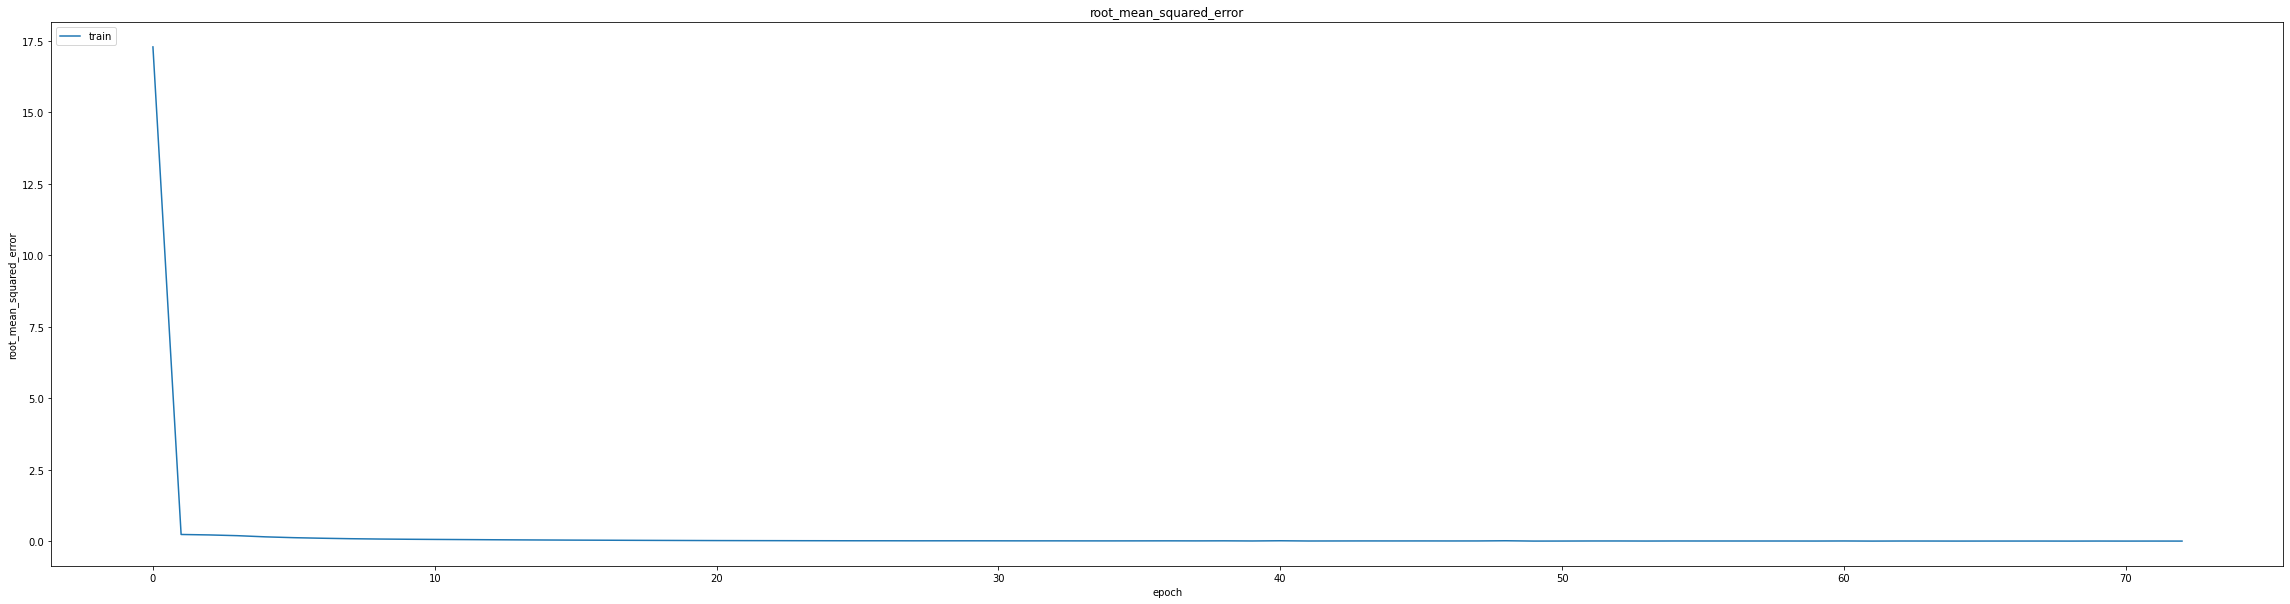

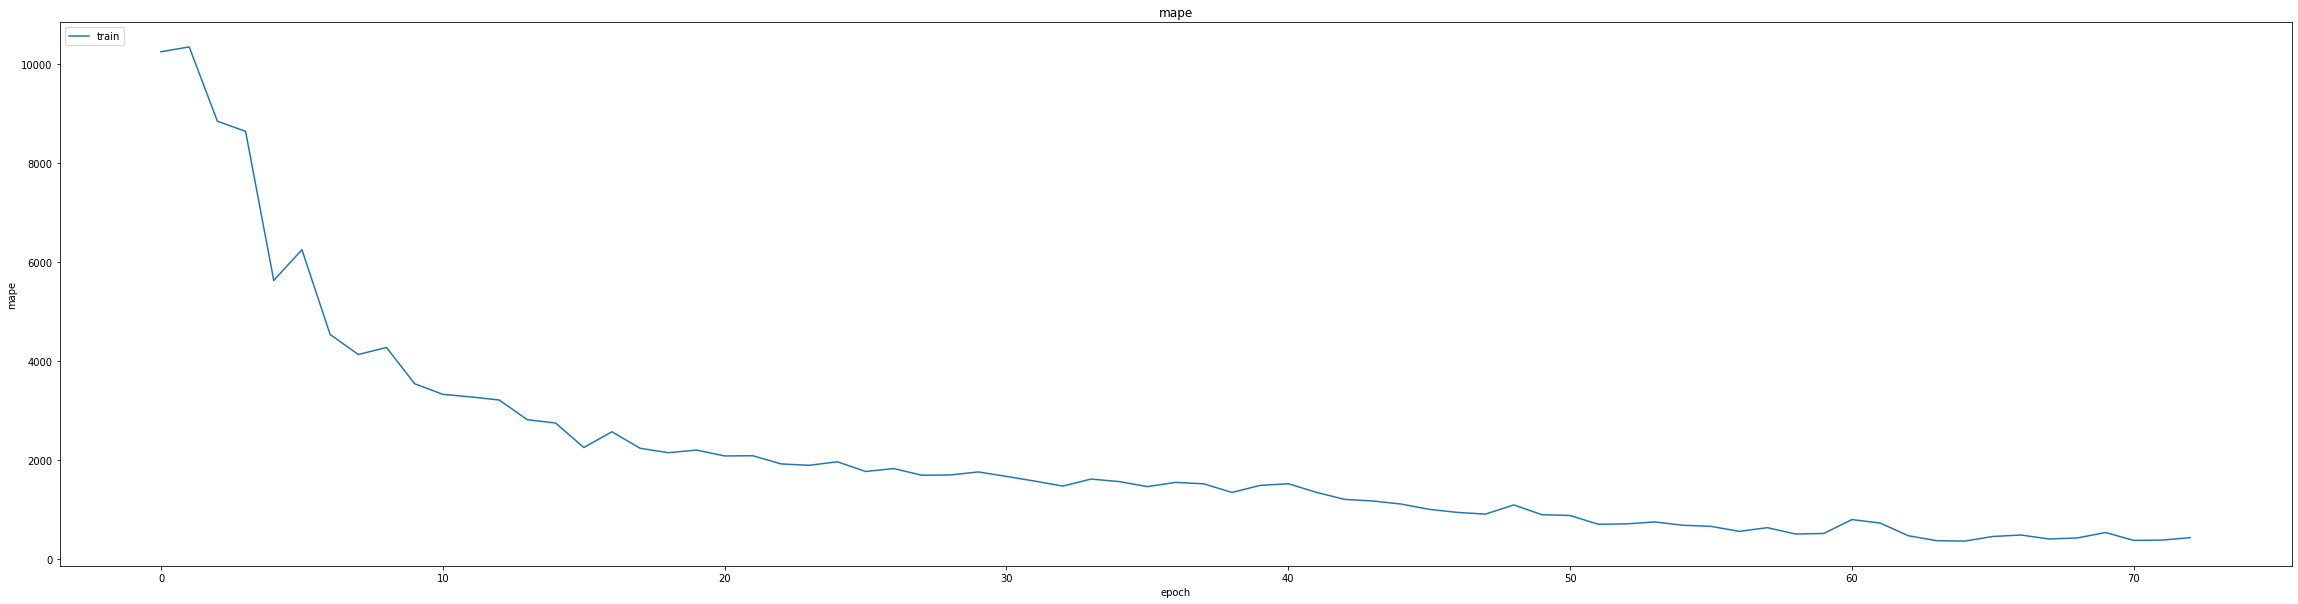

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007589821703732014
0.01017253752797842
348/348 [==============================] - 4s 6ms/step
0.9913800655596068


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
403/406 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0163 - mse: 0.0017 - root_mean_squared_error: 0.0411 - mape: 1372.0104
Epoch 1: val_mse did not improve from 0.00010
406/406 [==============================] - 14s 21ms/step - loss: 0.0017 - mae: 0.0162 - mse: 0.0017 - root_mean_squared_error: 0.0409 - mape: 1362.0142 - val_loss: 1.8738e-04 - val_mae: 0.0117 - val_mse: 1.8738e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 5417.9106 - lr: 0.0010
Epoch 2/25
405/406 [============================>.] - ETA: 0s - loss: 8.2753e-05 - mae: 0.0070 - mse: 8.2753e-05 - root_mean_squared_error: 0.0091 - mape: 933.9311
Epoch 2: val_mse did not improve from 0.00010
406/406 [==============================] - 8s 20ms/step - loss: 8.2741e-05 - mae: 0.0070 - mse: 8.2741e-05 - root_mean_squared_error: 0.0091 - mape: 931.7239 - val_loss: 1.3372e-04 - val_mae: 0.0096 - val_mse: 1.3372e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 4726.1606 - lr: 0.0010
lr ch

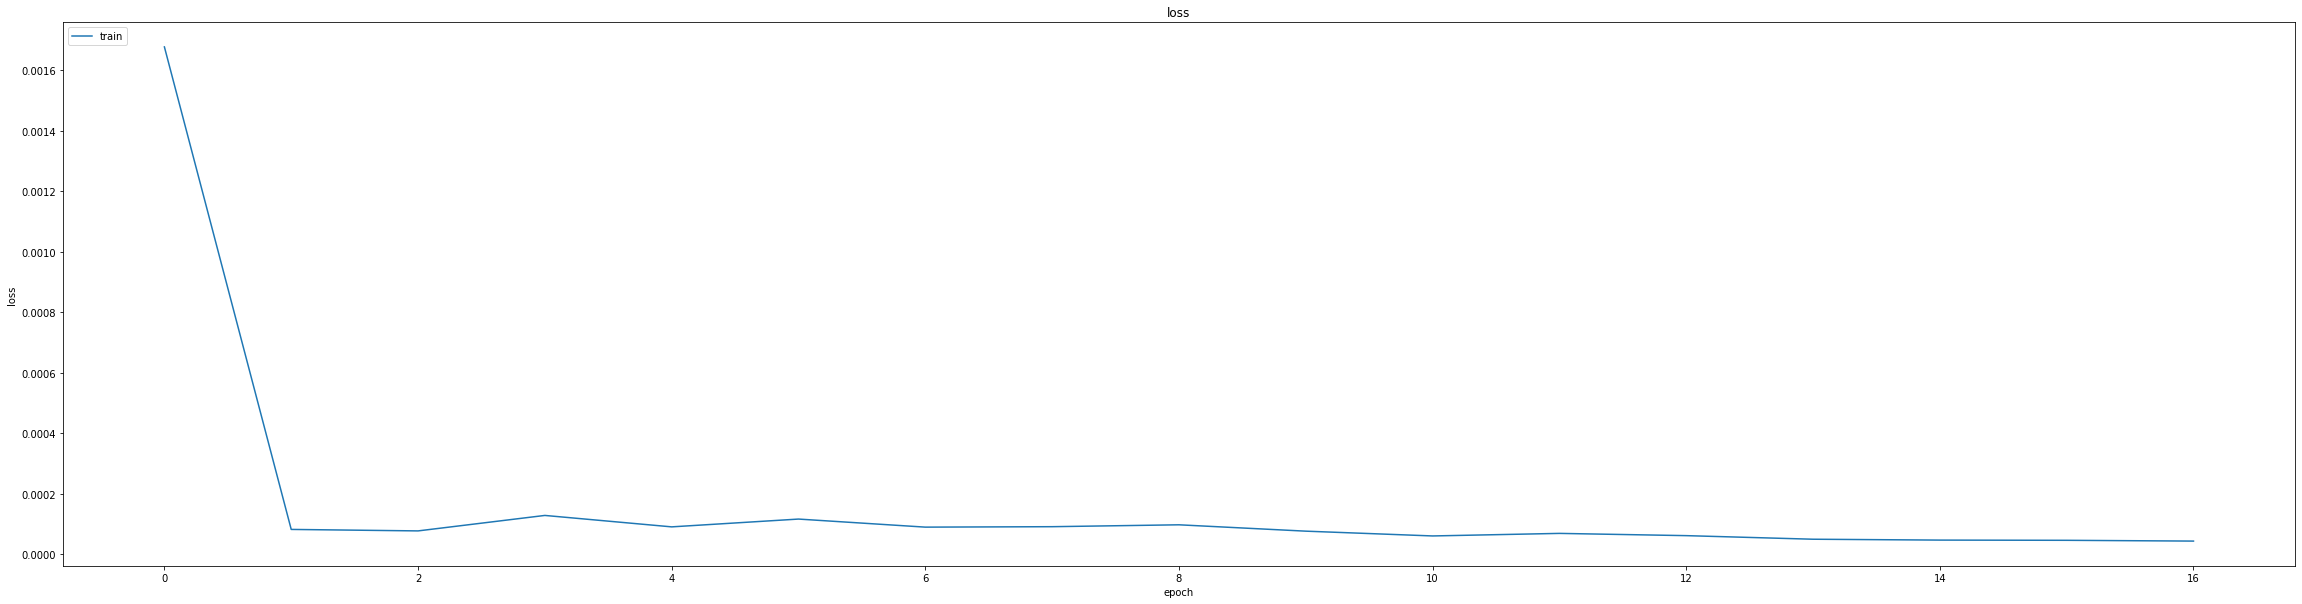

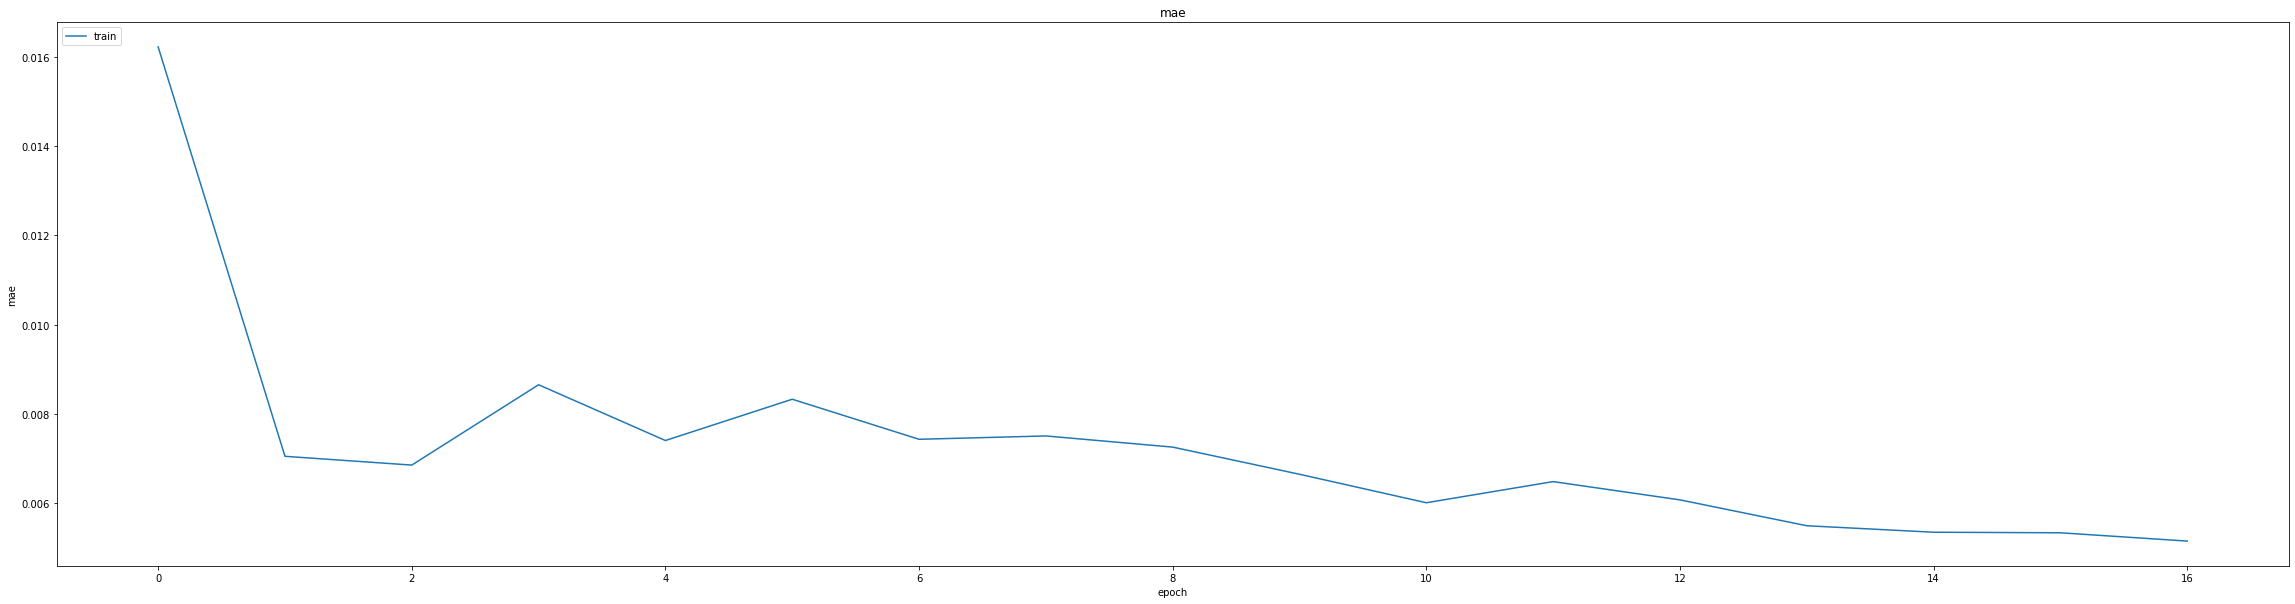

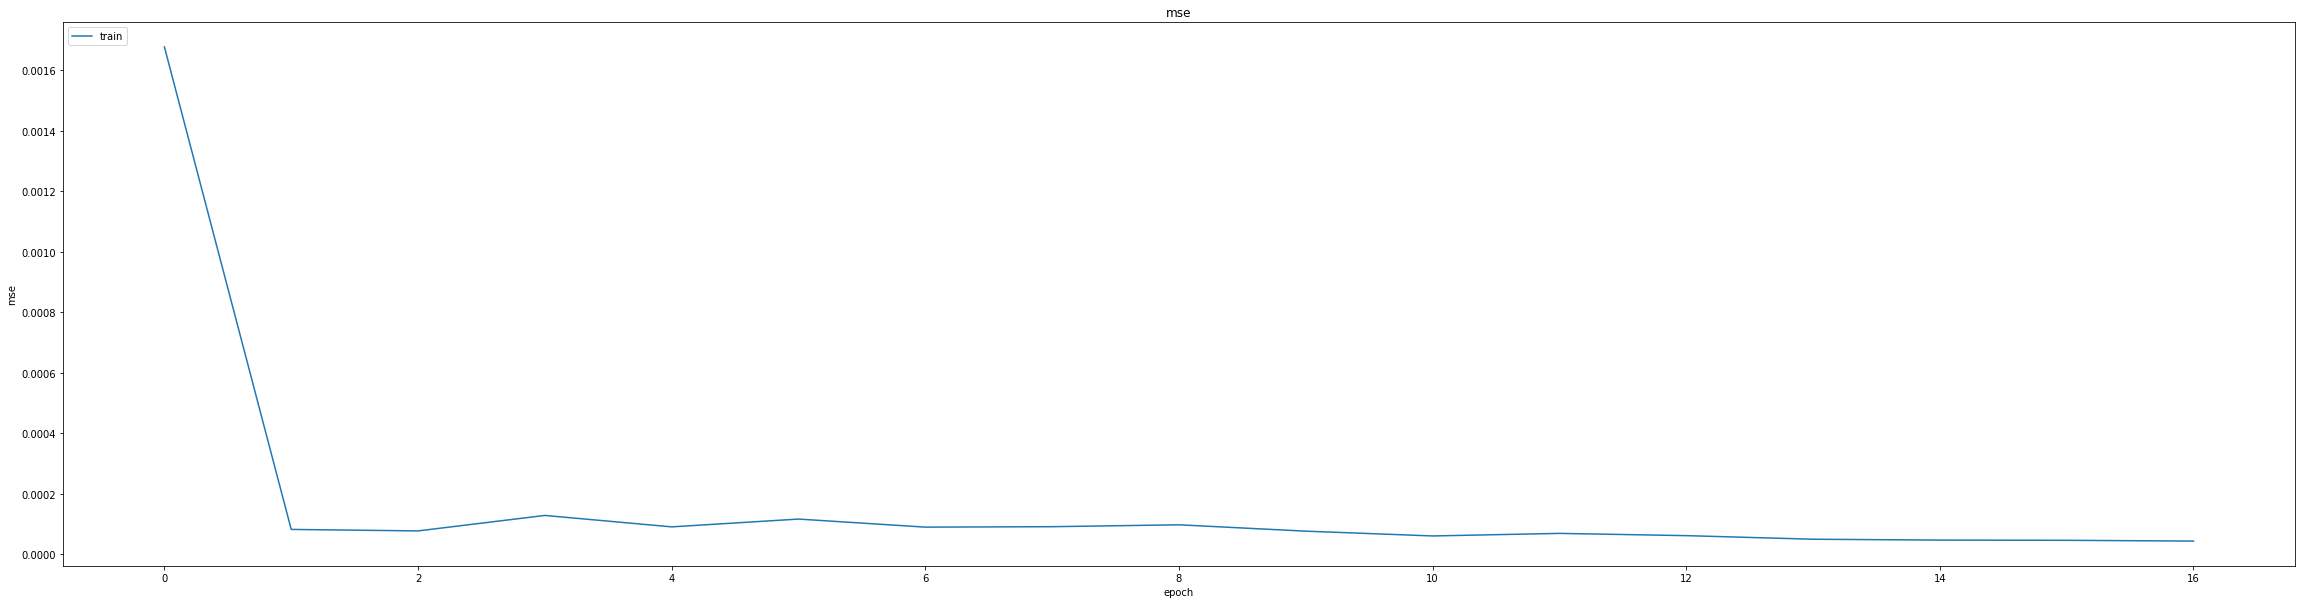

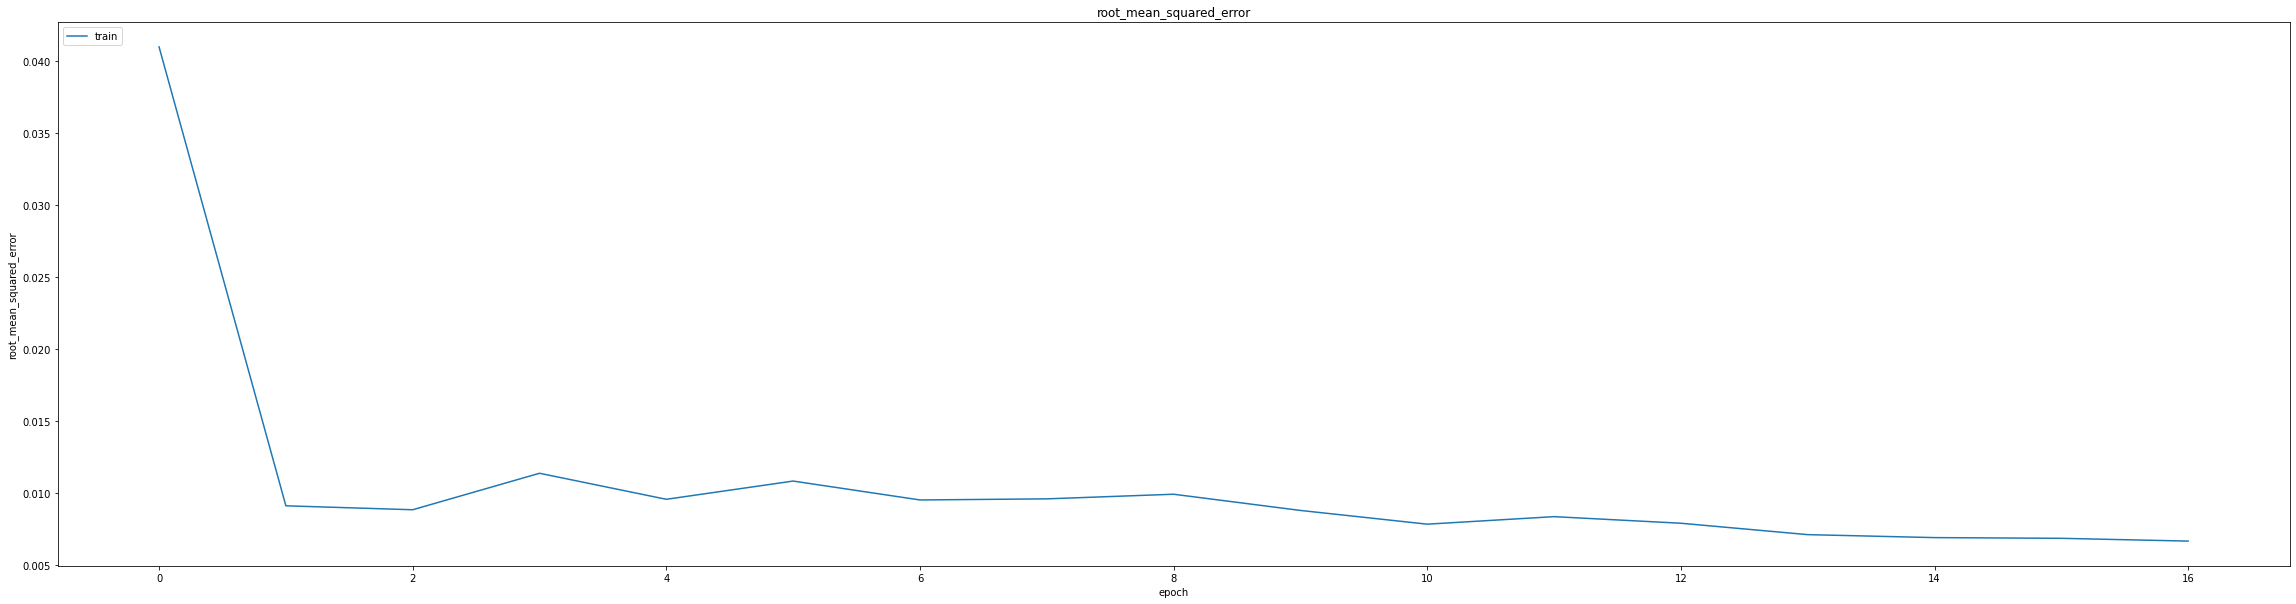

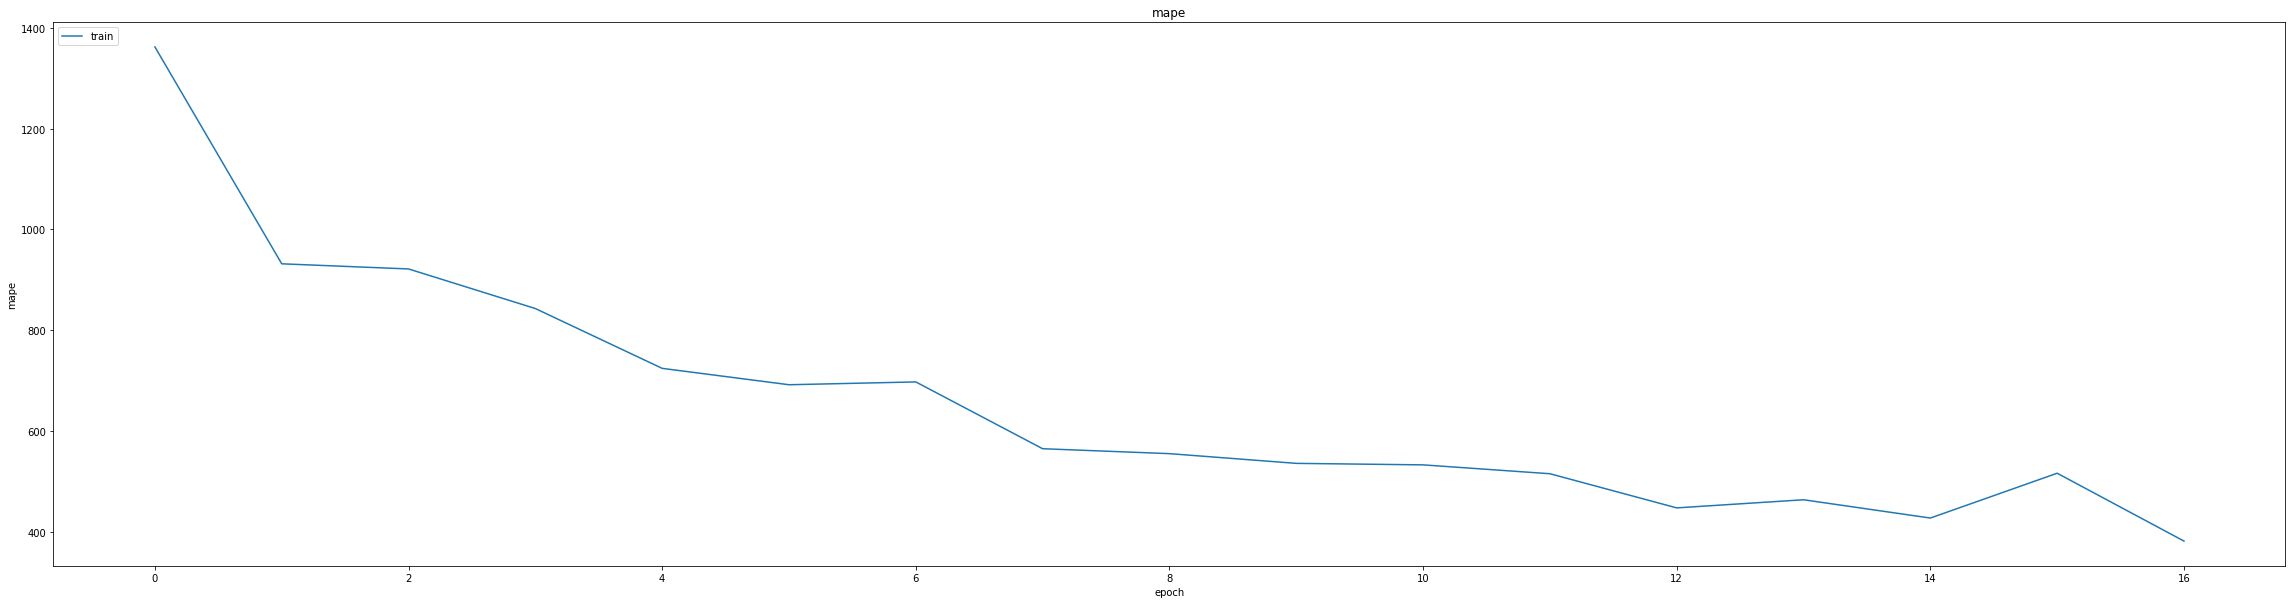

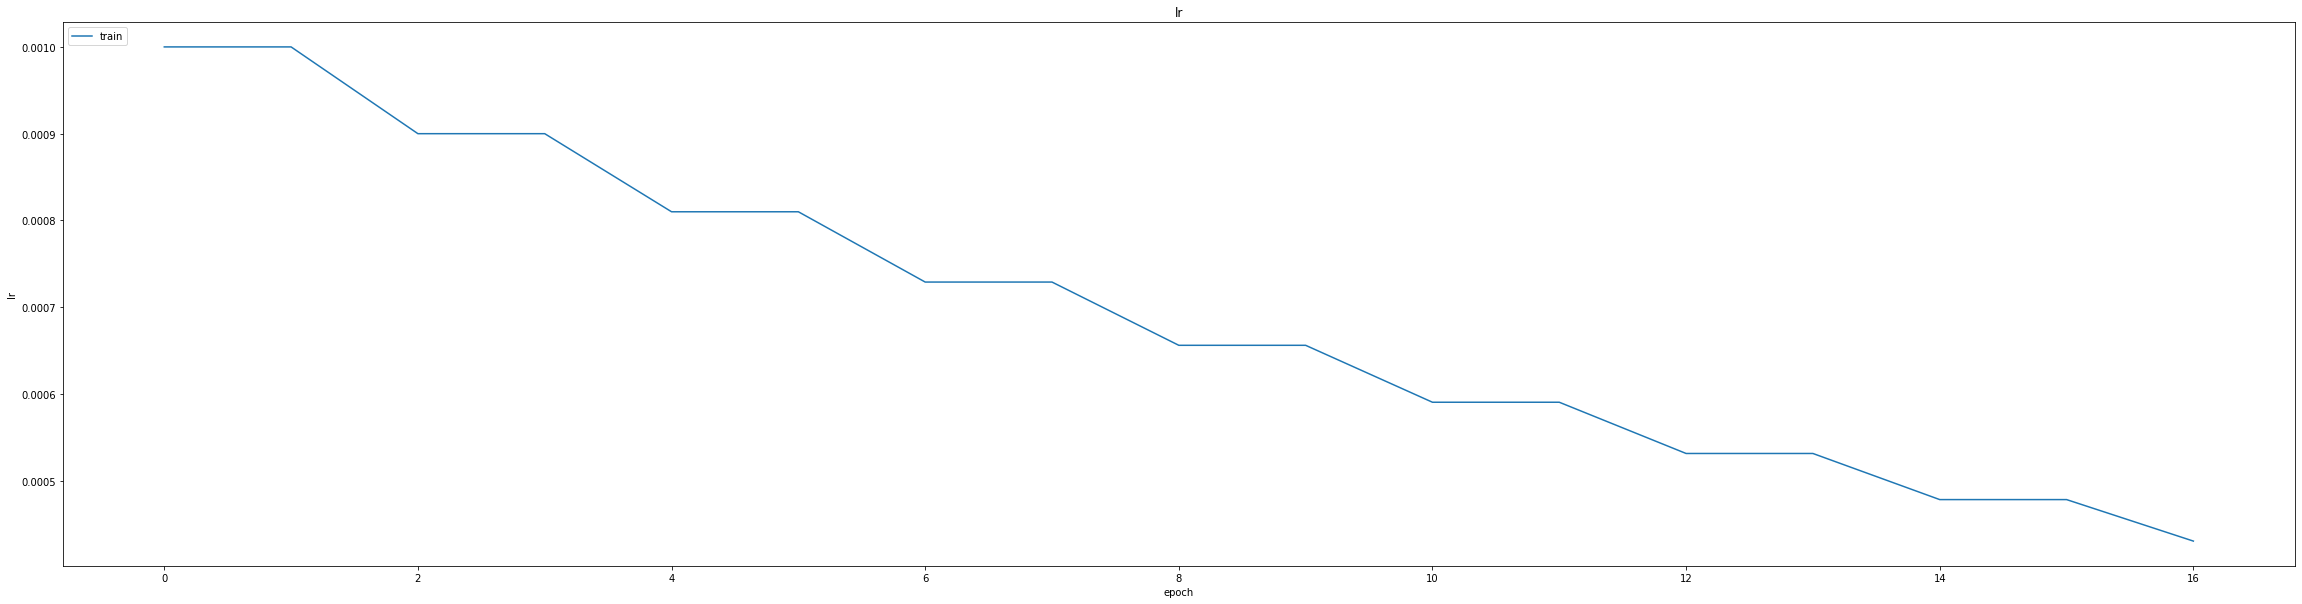

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00959942489862442
0.011563942767679691
348/348 [==============================] - 4s 6ms/step
0.9911006493739972


348/348 [==============================] - 2s 6ms/step


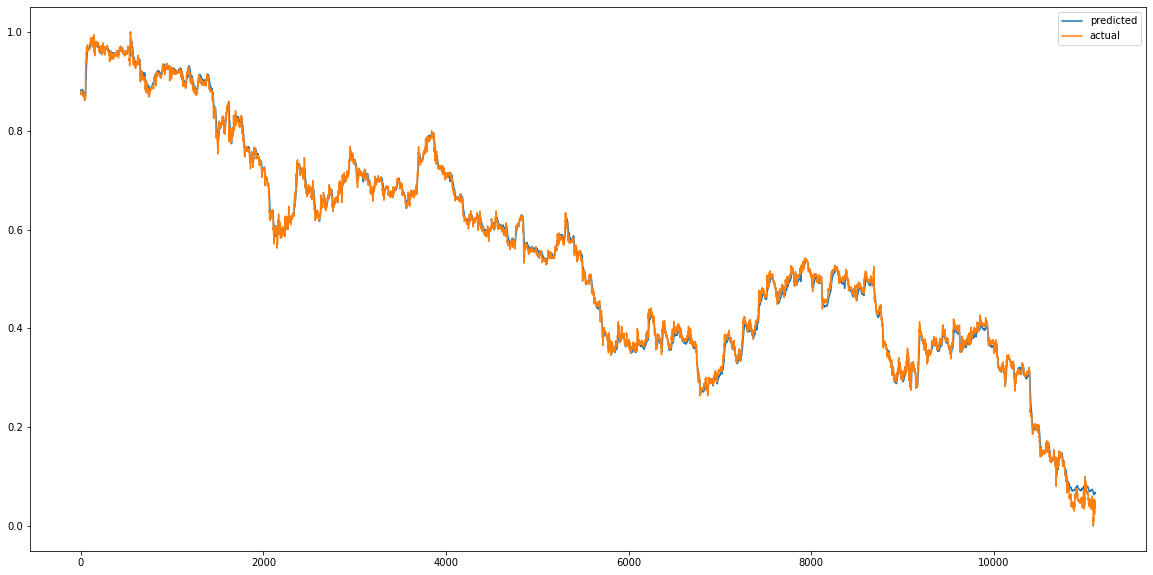

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


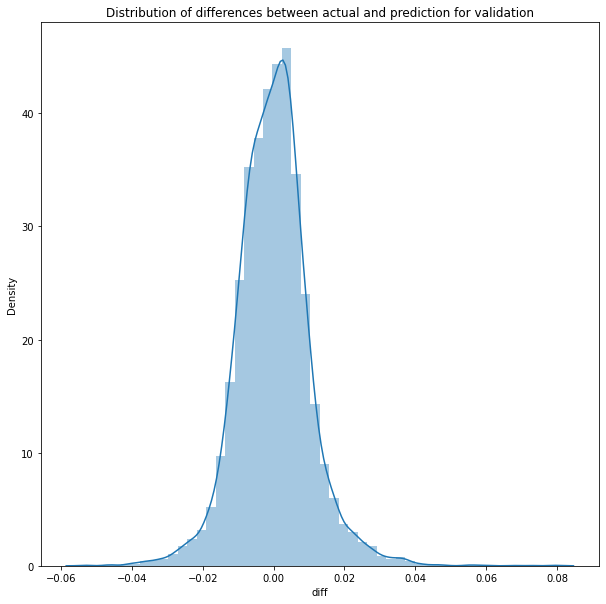

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 6ms/step


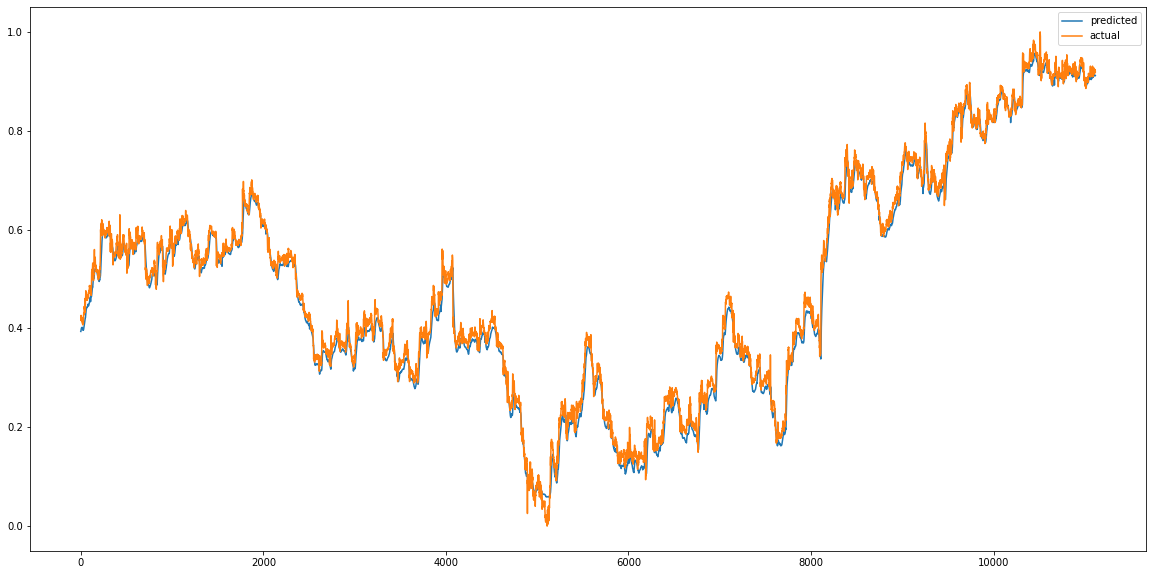

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


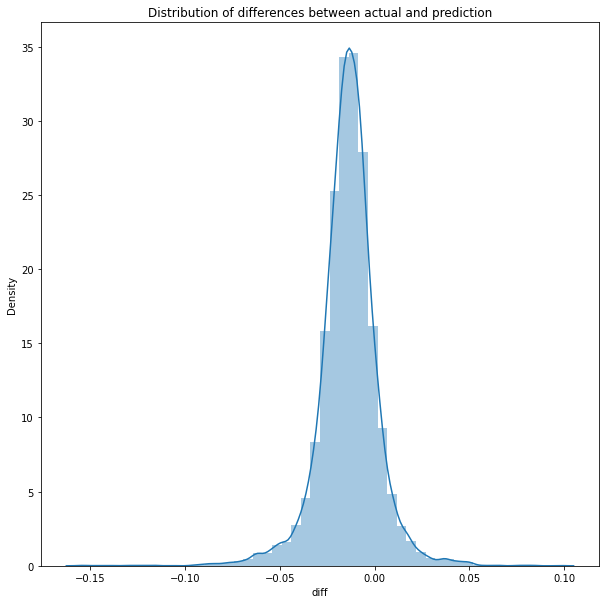

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.00043386075552626156
RMSE :  0.020829324413582442
MAE :  0.016482744293877895
348/348 [==============================] - 2s 6ms/step
R2_Score  : 0.9918344290234081


count    11116.000000
mean        -0.013861
std          0.015549
min         -0.155353
25%         -0.021250
50%         -0.013473
75%         -0.005995
max          0.097695
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75


405/406 [============================>.] - ETA: 0s - loss: 219.0882 - mae: 2.0026 - mse: 219.0882 - root_mean_squared_error: 14.8016 - mape: 10367.8564
Epoch 1: val_mse improved from inf to 0.05268, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 17s 34ms/step - loss: 218.5697 - mae: 1.9984 - mse: 218.5697 - root_mean_squared_error: 14.7841 - mape: 10343.4697 - val_loss: 0.0527 - val_mae: 0.1861 - val_mse: 0.0527 - val_root_mean_squared_error: 0.2295 - val_mape: 44416.8125
Epoch 2/75
403/406 [============================>.] - ETA: 0s - loss: 0.0628 - mae: 0.2208 - mse: 0.0628 - root_mean_squared_error: 0.2505 - mape: 9950.0137 
Epoch 2: val_mse improved from 0.05268 to 0.04994, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 31ms/step - loss: 0.0628 - mae: 0.2209 - mse: 0.0628 - root_mean_squared_error: 0.2506 - mape: 9878.0410 - val_loss: 0.0499 - val_mae: 0.1843 - val_mse: 0.0499 - val_root_mean_squared_error: 0.2235 - val_mape: 47937.7227
Epoch 3/75
404/406 [============================>.] - ETA: 0s - loss: 0.0612 - mae: 0.2147 - mse: 0.0612 - root_mean_squared_error: 0.2474 - mape: 10806.9043
Epoch 3: val_mse improved from 0.04994 to 0.04959, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 25s 62ms/step - loss: 0.0612 - mae: 0.2148 - mse: 0.0612 - root_mean_squared_error: 0.2475 - mape: 10755.1387 - val_loss: 0.0496 - val_mae: 0.1845 - val_mse: 0.0496 - val_root_mean_squared_error: 0.2227 - val_mape: 49343.1836
Epoch 4/75
403/406 [============================>.] - ETA: 0s - loss: 0.0608 - mae: 0.2128 - mse: 0.0608 - root_mean_squared_error: 0.2466 - mape: 11092.5605
Epoch 4: val_mse improved from 0.04959 to 0.04916, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0608 - mae: 0.2127 - mse: 0.0608 - root_mean_squared_error: 0.2466 - mape: 11012.1113 - val_loss: 0.0492 - val_mae: 0.1838 - val_mse: 0.0492 - val_root_mean_squared_error: 0.2217 - val_mape: 49474.0625
Epoch 5/75
405/406 [============================>.] - ETA: 0s - loss: 0.0588 - mae: 0.2084 - mse: 0.0588 - root_mean_squared_error: 0.2425 - mape: 11704.6758
Epoch 5: val_mse improved from 0.04916 to 0.04512, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 0.0588 - mae: 0.2084 - mse: 0.0588 - root_mean_squared_error: 0.2425 - mape: 11677.1250 - val_loss: 0.0451 - val_mae: 0.1763 - val_mse: 0.0451 - val_root_mean_squared_error: 0.2124 - val_mape: 47013.5781
Epoch 6/75
402/406 [============================>.] - ETA: 0s - loss: 0.0379 - mae: 0.1596 - mse: 0.0379 - root_mean_squared_error: 0.1946 - mape: 8080.1733
Epoch 6: val_mse improved from 0.04512 to 0.01432, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 0.0377 - mae: 0.1591 - mse: 0.0377 - root_mean_squared_error: 0.1942 - mape: 8001.8335 - val_loss: 0.0143 - val_mae: 0.0879 - val_mse: 0.0143 - val_root_mean_squared_error: 0.1197 - val_mape: 35288.2891
Epoch 7/75
402/406 [============================>.] - ETA: 0s - loss: 0.0124 - mae: 0.0793 - mse: 0.0124 - root_mean_squared_error: 0.1111 - mape: 7489.0728
Epoch 7: val_mse improved from 0.01432 to 0.00736, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 31ms/step - loss: 0.0123 - mae: 0.0791 - mse: 0.0123 - root_mean_squared_error: 0.1110 - mape: 7416.4282 - val_loss: 0.0074 - val_mae: 0.0673 - val_mse: 0.0074 - val_root_mean_squared_error: 0.0858 - val_mape: 29976.2207
Epoch 8/75
402/406 [============================>.] - ETA: 0s - loss: 0.0070 - mae: 0.0581 - mse: 0.0070 - root_mean_squared_error: 0.0834 - mape: 6345.2378
Epoch 8: val_mse improved from 0.00736 to 0.00516, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 0.0070 - mae: 0.0581 - mse: 0.0070 - root_mean_squared_error: 0.0834 - mape: 6283.5942 - val_loss: 0.0052 - val_mae: 0.0566 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0718 - val_mape: 26699.5684
Epoch 9/75
402/406 [============================>.] - ETA: 0s - loss: 0.0051 - mae: 0.0506 - mse: 0.0051 - root_mean_squared_error: 0.0715 - mape: 5317.4795
Epoch 9: val_mse improved from 0.00516 to 0.00361, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 0.0051 - mae: 0.0506 - mse: 0.0051 - root_mean_squared_error: 0.0715 - mape: 5265.8101 - val_loss: 0.0036 - val_mae: 0.0460 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0601 - val_mape: 24241.6133
Epoch 10/75
405/406 [============================>.] - ETA: 0s - loss: 0.0039 - mae: 0.0447 - mse: 0.0039 - root_mean_squared_error: 0.0628 - mape: 5299.2710
Epoch 10: val_mse improved from 0.00361 to 0.00324, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 0.0039 - mae: 0.0447 - mse: 0.0039 - root_mean_squared_error: 0.0628 - mape: 5286.7988 - val_loss: 0.0032 - val_mae: 0.0464 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0570 - val_mape: 22314.6484
Epoch 11/75
405/406 [============================>.] - ETA: 0s - loss: 0.0031 - mae: 0.0398 - mse: 0.0031 - root_mean_squared_error: 0.0557 - mape: 4393.2046
Epoch 11: val_mse improved from 0.00324 to 0.00249, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 31ms/step - loss: 0.0031 - mae: 0.0398 - mse: 0.0031 - root_mean_squared_error: 0.0557 - mape: 4382.8433 - val_loss: 0.0025 - val_mae: 0.0405 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0499 - val_mape: 20761.1348
Epoch 12/75
402/406 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0358 - mse: 0.0025 - root_mean_squared_error: 0.0497 - mape: 4267.9482
Epoch 12: val_mse improved from 0.00249 to 0.00221, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 0.0025 - mae: 0.0358 - mse: 0.0025 - root_mean_squared_error: 0.0497 - mape: 4226.4668 - val_loss: 0.0022 - val_mae: 0.0392 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0470 - val_mape: 19297.8203
Epoch 13/75
403/406 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0323 - mse: 0.0020 - root_mean_squared_error: 0.0446 - mape: 4159.2134
Epoch 13: val_mse improved from 0.00221 to 0.00173, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 31ms/step - loss: 0.0020 - mae: 0.0324 - mse: 0.0020 - root_mean_squared_error: 0.0446 - mape: 4128.9600 - val_loss: 0.0017 - val_mae: 0.0341 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0415 - val_mape: 18146.0859
Epoch 14/75
401/406 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0294 - mse: 0.0016 - root_mean_squared_error: 0.0402 - mape: 3807.9624
Epoch 14: val_mse improved from 0.00173 to 0.00165, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 0.0016 - mae: 0.0294 - mse: 0.0016 - root_mean_squared_error: 0.0402 - mape: 3761.6162 - val_loss: 0.0016 - val_mae: 0.0347 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0406 - val_mape: 17115.1367
Epoch 15/75
402/406 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0273 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 3669.5605
Epoch 15: val_mse improved from 0.00165 to 0.00158, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 0.0014 - mae: 0.0273 - mse: 0.0014 - root_mean_squared_error: 0.0369 - mape: 3633.8645 - val_loss: 0.0016 - val_mae: 0.0351 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0397 - val_mape: 16179.5674
Epoch 16/75
405/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0251 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 3425.0679
Epoch 16: val_mse improved from 0.00158 to 0.00144, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 0.0011 - mae: 0.0251 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 3416.9880 - val_loss: 0.0014 - val_mae: 0.0341 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0380 - val_mape: 15283.6533
Epoch 17/75
402/406 [============================>.] - ETA: 0s - loss: 9.6703e-04 - mae: 0.0232 - mse: 9.6703e-04 - root_mean_squared_error: 0.0311 - mape: 3234.9568
Epoch 17: val_mse improved from 0.00144 to 0.00102, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 31ms/step - loss: 9.6600e-04 - mae: 0.0232 - mse: 9.6600e-04 - root_mean_squared_error: 0.0311 - mape: 3203.5471 - val_loss: 0.0010 - val_mae: 0.0278 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0320 - val_mape: 14484.3262
Epoch 18/75
405/406 [============================>.] - ETA: 0s - loss: 8.2019e-04 - mae: 0.0215 - mse: 8.2019e-04 - root_mean_squared_error: 0.0286 - mape: 3052.5488
Epoch 18: val_mse improved from 0.00102 to 0.00102, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 8.2018e-04 - mae: 0.0215 - mse: 8.2018e-04 - root_mean_squared_error: 0.0286 - mape: 3045.3398 - val_loss: 0.0010 - val_mae: 0.0286 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0319 - val_mape: 13728.4893
Epoch 19/75
406/406 [==============================] - ETA: 0s - loss: 7.0856e-04 - mae: 0.0201 - mse: 7.0856e-04 - root_mean_squared_error: 0.0266 - mape: 3027.0222
Epoch 19: val_mse improved from 0.00102 to 0.00085, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 7.0856e-04 - mae: 0.0201 - mse: 7.0856e-04 - root_mean_squared_error: 0.0266 - mape: 3027.0222 - val_loss: 8.5423e-04 - val_mae: 0.0259 - val_mse: 8.5423e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 13060.7285
Epoch 20/75
405/406 [============================>.] - ETA: 0s - loss: 6.0130e-04 - mae: 0.0186 - mse: 6.0130e-04 - root_mean_squared_error: 0.0245 - mape: 2639.7886
Epoch 20: val_mse improved from 0.00085 to 0.00074, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 6.0144e-04 - mae: 0.0186 - mse: 6.0144e-04 - root_mean_squared_error: 0.0245 - mape: 2633.5569 - val_loss: 7.4035e-04 - val_mae: 0.0239 - val_mse: 7.4035e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 12456.3955
Epoch 21/75
406/406 [==============================] - ETA: 0s - loss: 5.2693e-04 - mae: 0.0174 - mse: 5.2693e-04 - root_mean_squared_error: 0.0230 - mape: 2869.7405
Epoch 21: val_mse improved from 0.00074 to 0.00067, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 5.2693e-04 - mae: 0.0174 - mse: 5.2693e-04 - root_mean_squared_error: 0.0230 - mape: 2869.7405 - val_loss: 6.6752e-04 - val_mae: 0.0230 - val_mse: 6.6752e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 11877.1670
Epoch 22/75
406/406 [==============================] - ETA: 0s - loss: 4.5961e-04 - mae: 0.0164 - mse: 4.5961e-04 - root_mean_squared_error: 0.0214 - mape: 2562.3708
Epoch 22: val_mse improved from 0.00067 to 0.00066, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 4.5961e-04 - mae: 0.0164 - mse: 4.5961e-04 - root_mean_squared_error: 0.0214 - mape: 2562.3708 - val_loss: 6.5935e-04 - val_mae: 0.0229 - val_mse: 6.5935e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 11380.5000
Epoch 23/75
405/406 [============================>.] - ETA: 0s - loss: 4.0269e-04 - mae: 0.0153 - mse: 4.0269e-04 - root_mean_squared_error: 0.0201 - mape: 2400.4983
Epoch 23: val_mse improved from 0.00066 to 0.00066, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 4.0261e-04 - mae: 0.0153 - mse: 4.0261e-04 - root_mean_squared_error: 0.0201 - mape: 2394.8269 - val_loss: 6.5920e-04 - val_mae: 0.0236 - val_mse: 6.5920e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 10911.6611
Epoch 24/75
405/406 [============================>.] - ETA: 0s - loss: 3.5015e-04 - mae: 0.0143 - mse: 3.5015e-04 - root_mean_squared_error: 0.0187 - mape: 2261.5447
Epoch 24: val_mse improved from 0.00066 to 0.00053, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 3.5029e-04 - mae: 0.0143 - mse: 3.5029e-04 - root_mean_squared_error: 0.0187 - mape: 2256.2065 - val_loss: 5.2918e-04 - val_mae: 0.0208 - val_mse: 5.2918e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 10478.5332
Epoch 25/75
405/406 [============================>.] - ETA: 0s - loss: 3.0688e-04 - mae: 0.0134 - mse: 3.0688e-04 - root_mean_squared_error: 0.0175 - mape: 2148.8730
Epoch 25: val_mse improved from 0.00053 to 0.00048, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 3.0698e-04 - mae: 0.0134 - mse: 3.0698e-04 - root_mean_squared_error: 0.0175 - mape: 2143.8044 - val_loss: 4.7655e-04 - val_mae: 0.0196 - val_mse: 4.7655e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 10083.6680
Epoch 26/75
406/406 [==============================] - ETA: 0s - loss: 2.7153e-04 - mae: 0.0126 - mse: 2.7153e-04 - root_mean_squared_error: 0.0165 - mape: 2029.0858
Epoch 26: val_mse did not improve from 0.00048
406/406 [==============================] - 5s 12ms/step - loss: 2.7153e-04 - mae: 0.0126 - mse: 2.7153e-04 - root_mean_squared_error: 0.0165 - mape: 2029.0858 - val_loss: 6.5817e-04 - val_mae: 0.0238 - val_mse: 6.5817e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 9712.4639
Epoch 27/75
402/406 [============================>.] - ETA: 0s - loss: 2.4197e-04 - mae: 0.0119 - mse: 2.4197e-04 - root_mean_squared_error: 0.0156 - mape: 2044.4374
Epoch 27: val_mse improved from 0.00048 to 0.00043, sav

406/406 [==============================] - 13s 32ms/step - loss: 2.4171e-04 - mae: 0.0119 - mse: 2.4171e-04 - root_mean_squared_error: 0.0155 - mape: 2024.5187 - val_loss: 4.2847e-04 - val_mae: 0.0187 - val_mse: 4.2847e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 9378.4561
Epoch 28/75
405/406 [============================>.] - ETA: 0s - loss: 2.1378e-04 - mae: 0.0112 - mse: 2.1378e-04 - root_mean_squared_error: 0.0146 - mape: 2002.7015
Epoch 28: val_mse did not improve from 0.00043
406/406 [==============================] - 5s 11ms/step - loss: 2.1364e-04 - mae: 0.0112 - mse: 2.1364e-04 - root_mean_squared_error: 0.0146 - mape: 1997.9672 - val_loss: 5.9858e-04 - val_mae: 0.0228 - val_mse: 5.9858e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 9028.2412
Epoch 29/75
406/406 [==============================] - ETA: 0s - loss: 1.8866e-04 - mae: 0.0105 - mse: 1.8866e-04 - root_mean_squared_error: 0.0137 - mape: 1976.8046
Epoch 29: val_mse did not improve from 0.00043
406/406 [

406/406 [==============================] - 13s 32ms/step - loss: 1.5213e-04 - mae: 0.0094 - mse: 1.5213e-04 - root_mean_squared_error: 0.0123 - mape: 1758.2784 - val_loss: 4.1353e-04 - val_mae: 0.0183 - val_mse: 4.1353e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 8182.7002
Epoch 32/75
406/406 [==============================] - ETA: 0s - loss: 1.3522e-04 - mae: 0.0089 - mse: 1.3522e-04 - root_mean_squared_error: 0.0116 - mape: 1692.2703
Epoch 32: val_mse did not improve from 0.00041
406/406 [==============================] - 5s 11ms/step - loss: 1.3522e-04 - mae: 0.0089 - mse: 1.3522e-04 - root_mean_squared_error: 0.0116 - mape: 1692.2703 - val_loss: 4.3537e-04 - val_mae: 0.0189 - val_mse: 4.3537e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 7956.3057
Epoch 33/75
403/406 [============================>.] - ETA: 0s - loss: 1.2569e-04 - mae: 0.0086 - mse: 1.2569e-04 - root_mean_squared_error: 0.0112 - mape: 1759.5441
Epoch 33: val_mse did not improve from 0.00041
406/406 [

406/406 [==============================] - 12s 30ms/step - loss: 9.5910e-05 - mae: 0.0075 - mse: 9.5910e-05 - root_mean_squared_error: 0.0098 - mape: 1596.5984 - val_loss: 3.2099e-04 - val_mae: 0.0163 - val_mse: 3.2099e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 6938.4673
Epoch 38/75
403/406 [============================>.] - ETA: 0s - loss: 8.9015e-05 - mae: 0.0072 - mse: 8.9015e-05 - root_mean_squared_error: 0.0094 - mape: 1479.7352
Epoch 38: val_mse did not improve from 0.00032
406/406 [==============================] - 5s 11ms/step - loss: 8.9038e-05 - mae: 0.0072 - mse: 8.9038e-05 - root_mean_squared_error: 0.0094 - mape: 1468.9635 - val_loss: 6.7264e-04 - val_mae: 0.0240 - val_mse: 6.7264e-04 - val_root_mean_squared_error: 0.0259 - val_mape: 6708.0825
Epoch 39/75
402/406 [============================>.] - ETA: 0s - loss: 8.9669e-05 - mae: 0.0073 - mse: 8.9669e-05 - root_mean_squared_error: 0.0095 - mape: 1390.4630
Epoch 39: val_mse did not improve from 0.00032
406/406 [

406/406 [==============================] - 13s 32ms/step - loss: 1.8050e-04 - mae: 0.0098 - mse: 1.8050e-04 - root_mean_squared_error: 0.0134 - mape: 1093.9719 - val_loss: 1.5708e-04 - val_mae: 0.0114 - val_mse: 1.5708e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 5664.3252
Epoch 51/75
404/406 [============================>.] - ETA: 0s - loss: 6.8768e-05 - mae: 0.0064 - mse: 6.8768e-05 - root_mean_squared_error: 0.0083 - mape: 1245.1359
Epoch 51: val_mse did not improve from 0.00016
406/406 [==============================] - 5s 11ms/step - loss: 6.8821e-05 - mae: 0.0064 - mse: 6.8821e-05 - root_mean_squared_error: 0.0083 - mape: 1239.1337 - val_loss: 6.0962e-04 - val_mae: 0.0231 - val_mse: 6.0962e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 5222.9751
Epoch 52/75
403/406 [============================>.] - ETA: 0s - loss: 8.5954e-05 - mae: 0.0072 - mse: 8.5954e-05 - root_mean_squared_error: 0.0093 - mape: 1082.2969
Epoch 52: val_mse did not improve from 0.00016
406/406 [

406/406 [==============================] - 13s 31ms/step - loss: 9.5674e-05 - mae: 0.0073 - mse: 9.5674e-05 - root_mean_squared_error: 0.0098 - mape: 1001.4319 - val_loss: 9.7284e-05 - val_mae: 0.0085 - val_mse: 9.7284e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 4822.1255
Epoch 60/75
405/406 [============================>.] - ETA: 0s - loss: 9.1877e-05 - mae: 0.0074 - mse: 9.1877e-05 - root_mean_squared_error: 0.0096 - mape: 1002.8013
Epoch 60: val_mse did not improve from 0.00010
406/406 [==============================] - 5s 11ms/step - loss: 9.1839e-05 - mae: 0.0074 - mse: 9.1839e-05 - root_mean_squared_error: 0.0096 - mape: 1000.4401 - val_loss: 1.4241e-04 - val_mae: 0.0108 - val_mse: 1.4241e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 4766.6025
Epoch 61/75
403/406 [============================>.] - ETA: 0s - loss: 6.2288e-05 - mae: 0.0061 - mse: 6.2288e-05 - root_mean_squared_error: 0.0079 - mape: 959.5912
Epoch 61: val_mse did not improve from 0.00010
406/406 [=

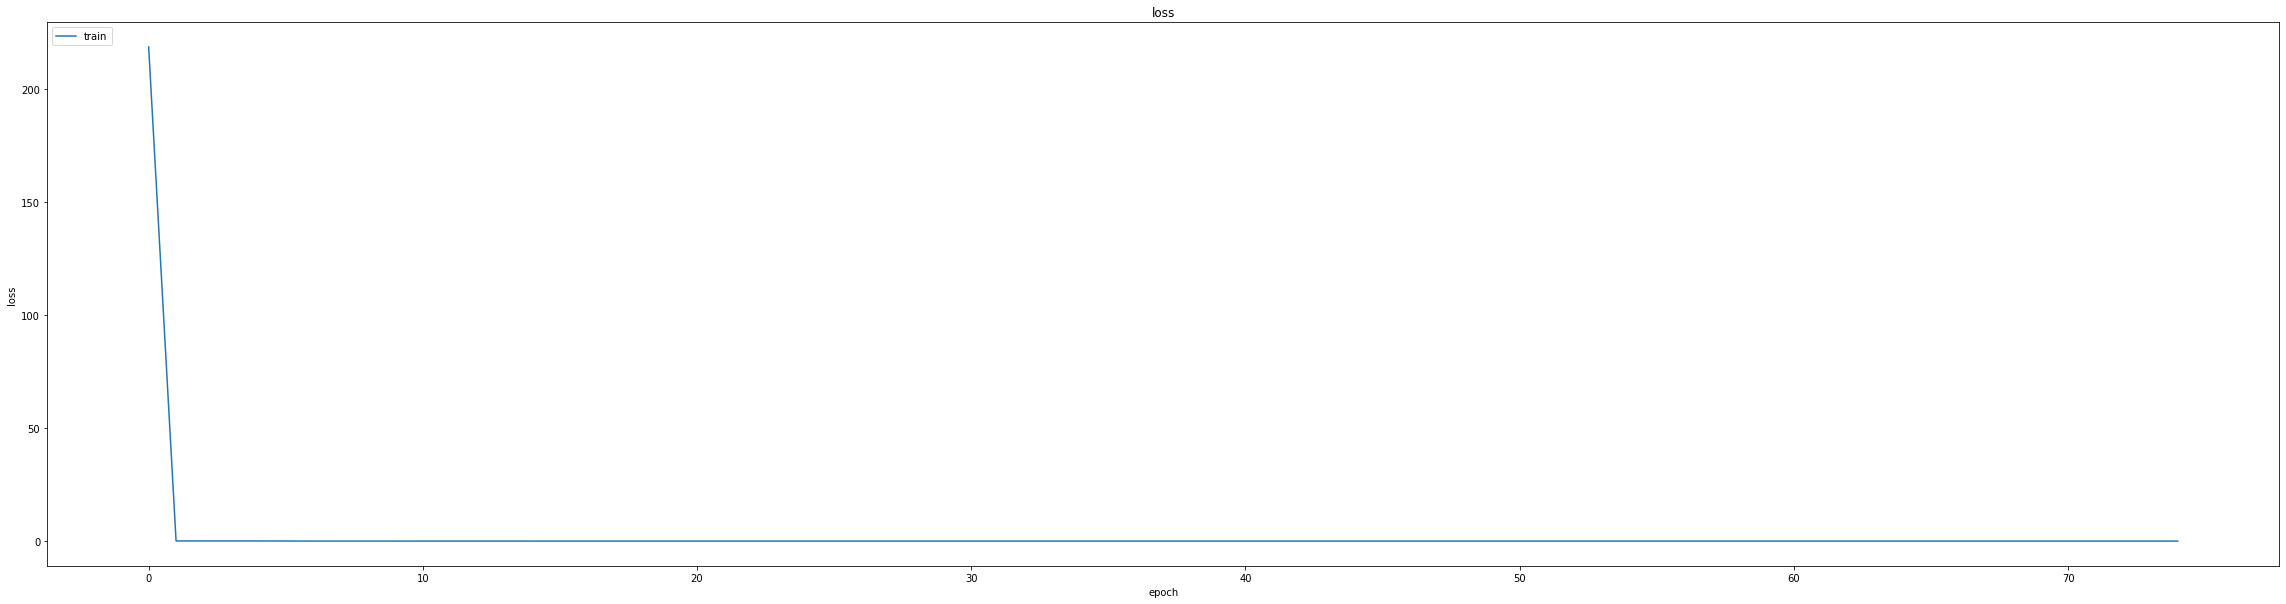

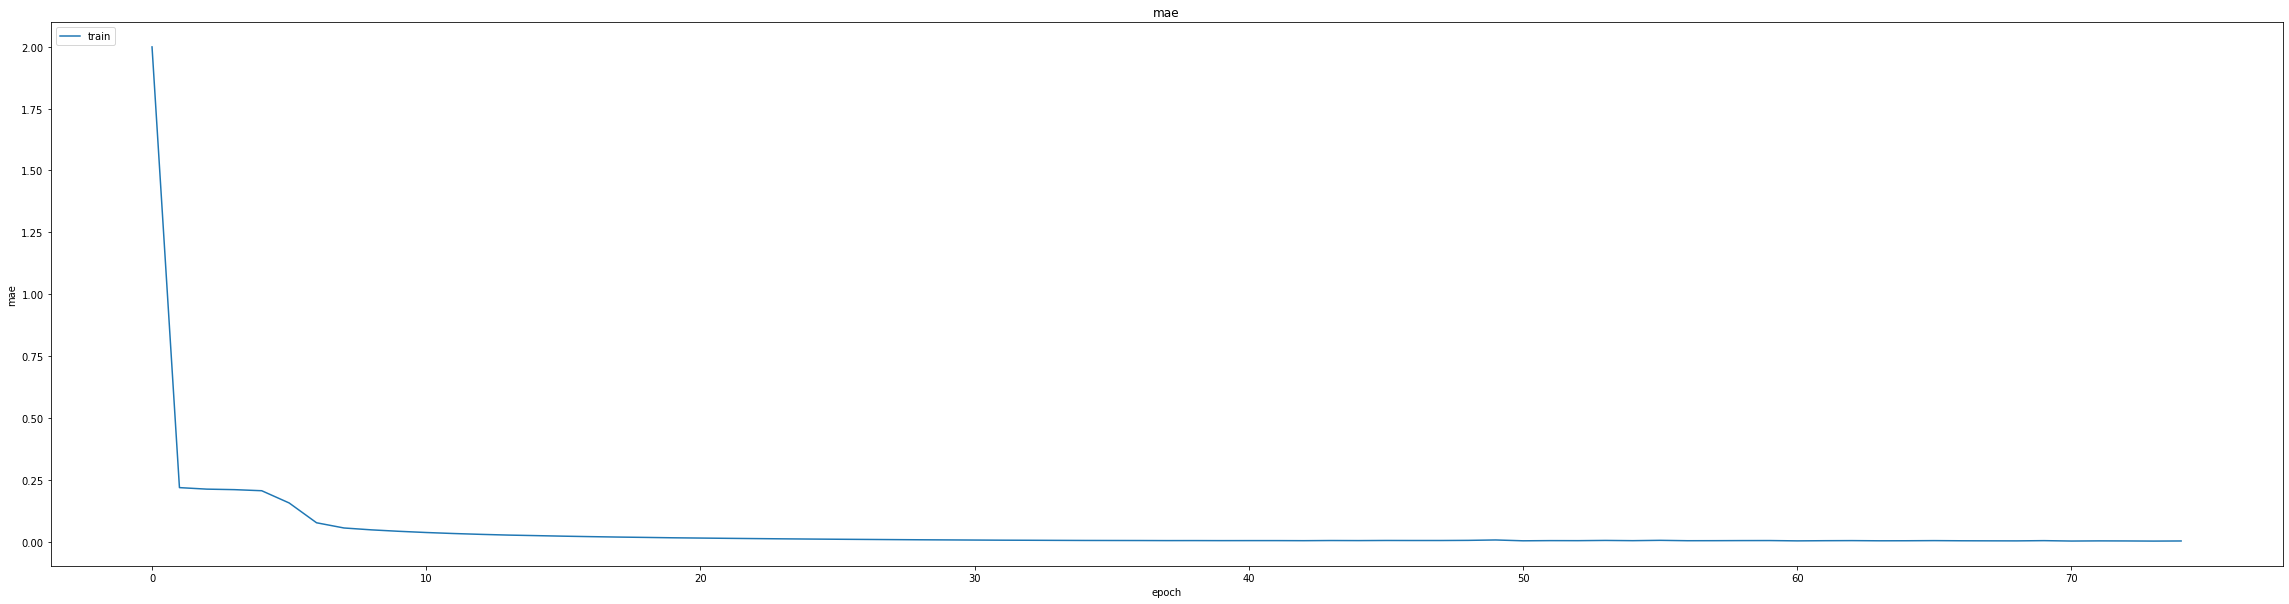

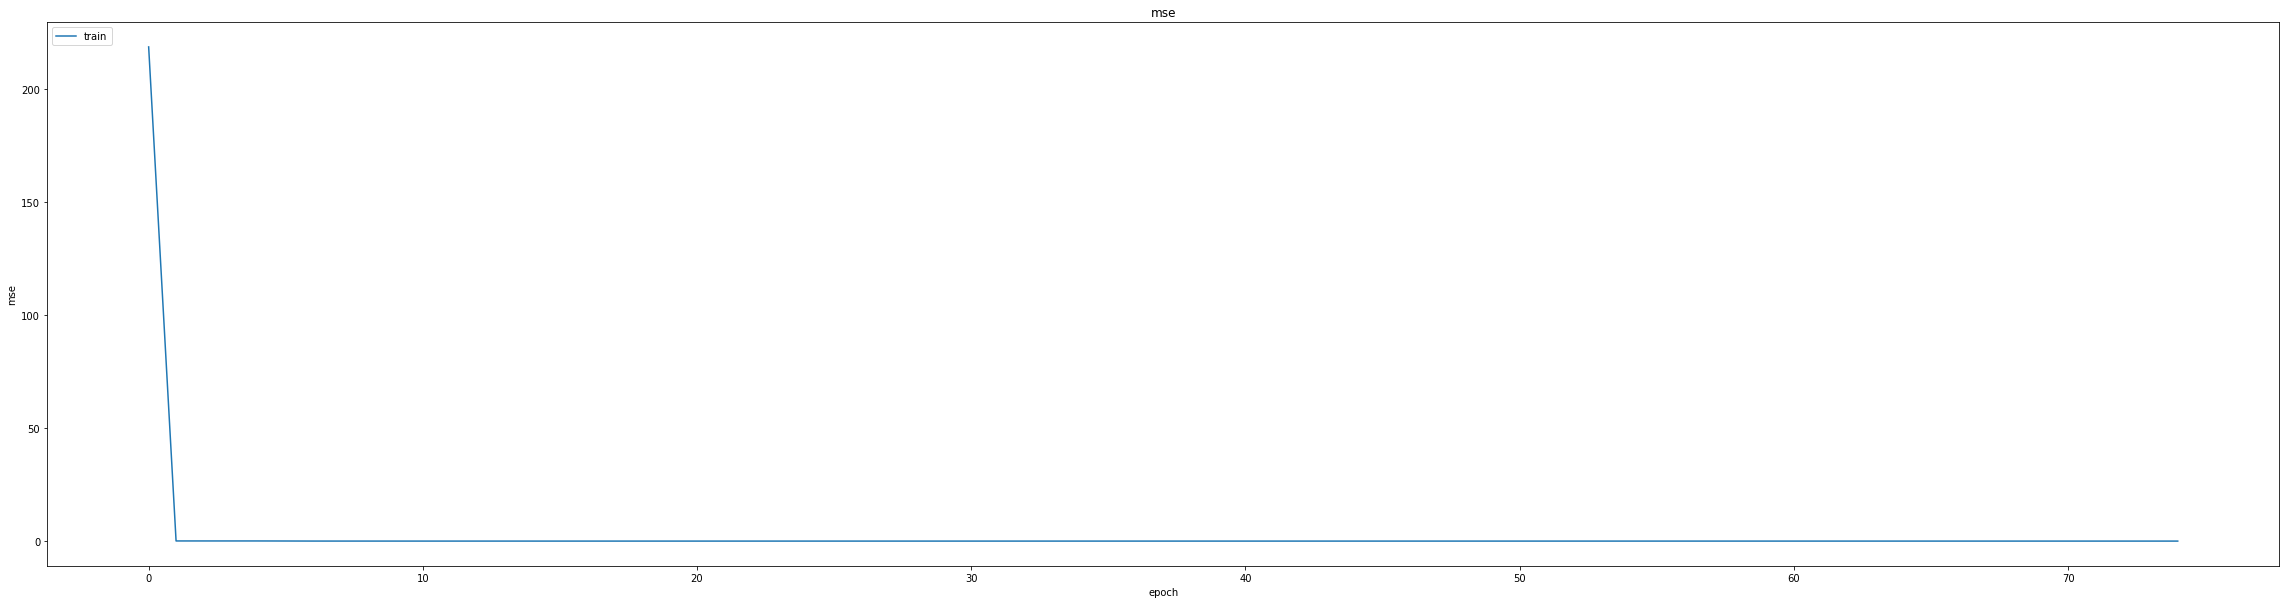

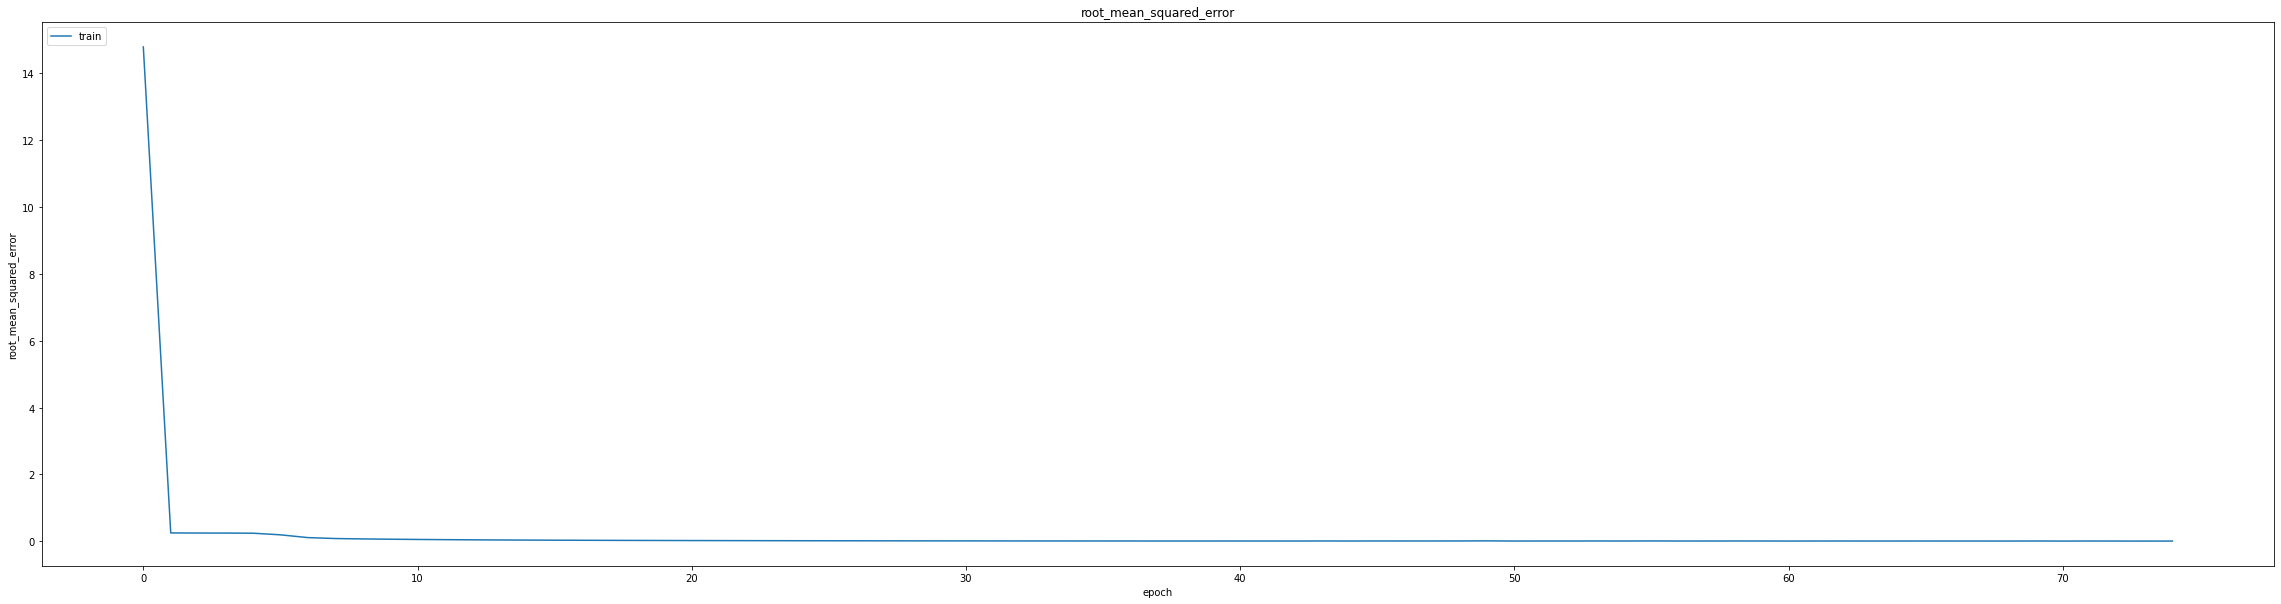

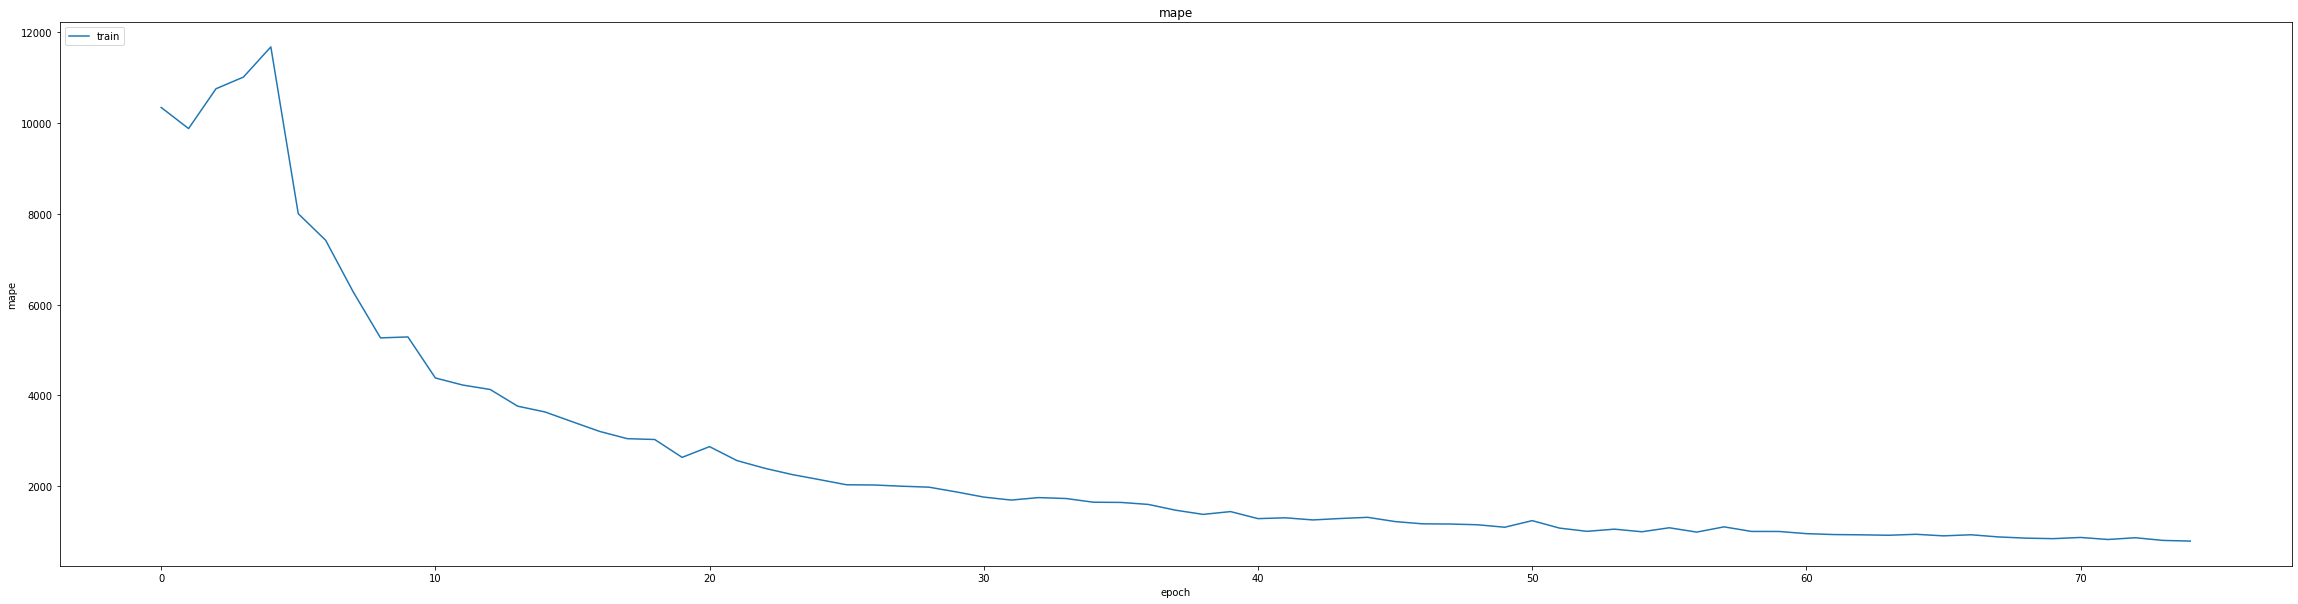

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008465161547064781
0.009863287210464478
348/348 [==============================] - 2s 4ms/step
0.9937444364134987


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
404/406 [============================>.] - ETA: 0s - loss: 3.9803e-04 - mae: 0.0087 - mse: 3.9803e-04 - root_mean_squared_error: 0.0200 - mape: 1007.0631
Epoch 1: val_mse did not improve from 0.00010
406/406 [==============================] - 8s 13ms/step - loss: 3.9626e-04 - mae: 0.0087 - mse: 3.9626e-04 - root_mean_squared_error: 0.0199 - mape: 1002.2052 - val_loss: 3.0415e-04 - val_mae: 0.0166 - val_mse: 3.0415e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 5071.1206 - lr: 0.0010
Epoch 2/25
403/406 [============================>.] - ETA: 0s - loss: 4.0965e-05 - mae: 0.0049 - mse: 4.0965e-05 - root_mean_squared_error: 0.0064 - mape: 963.8394
Epoch 2: val_mse did not improve from 0.00010
406/406 [==============================] - 4s 11ms/step - loss: 4.0953e-05 - mae: 0.0049 - mse: 4.0953e-05 - root_mean_squared_error: 0.0064 - mape: 956.8182 - val_loss: 3.3916e-04 - val_mae: 0.0175 - val_mse: 3.3916e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 4468.1338 - l

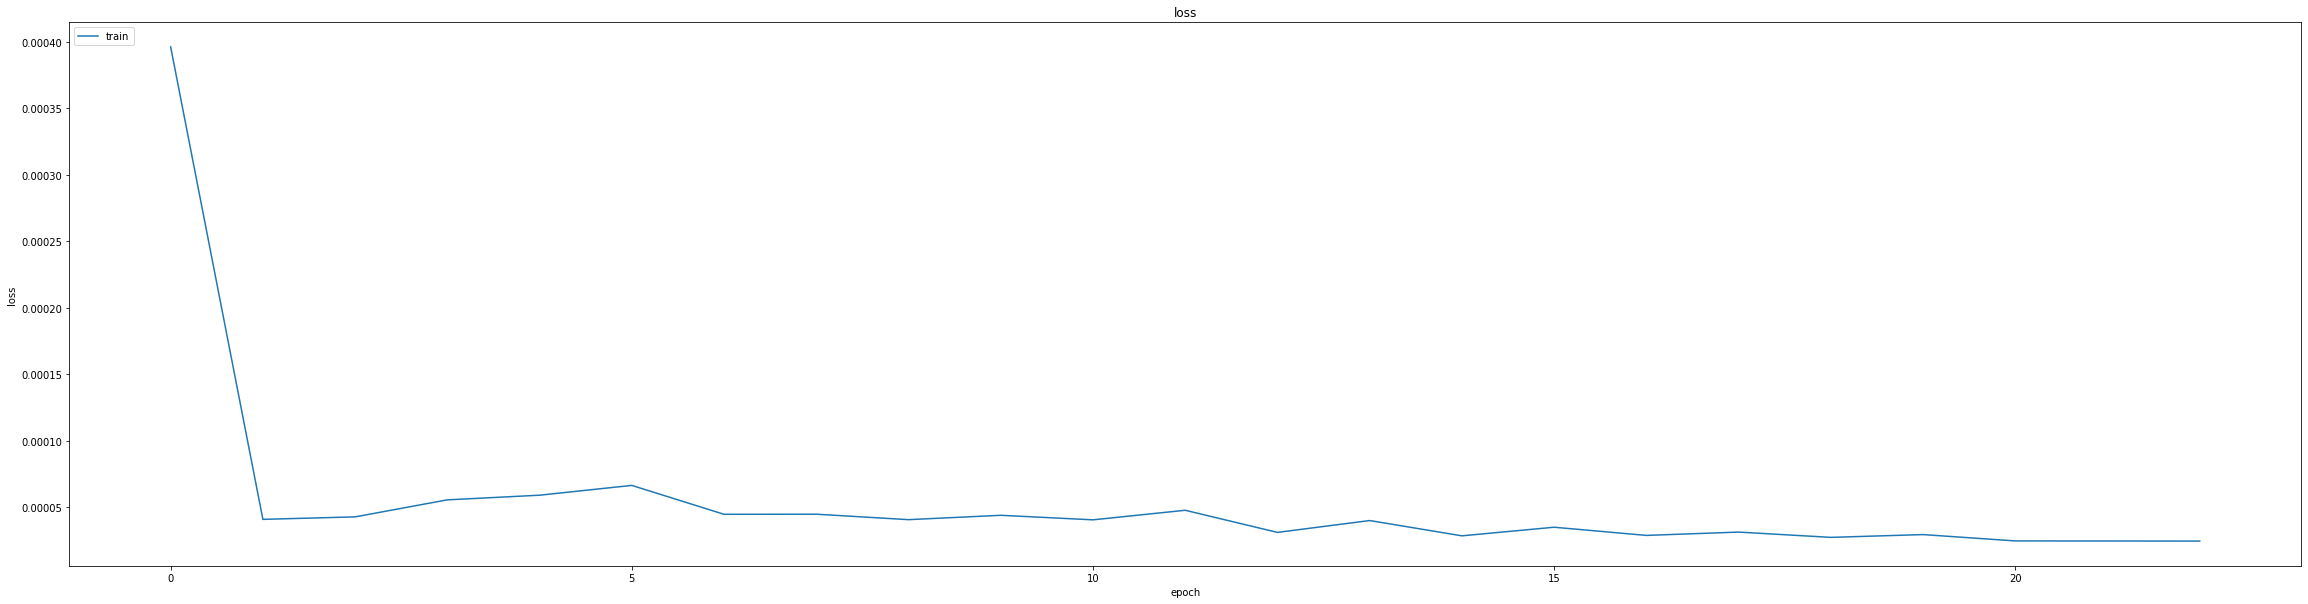

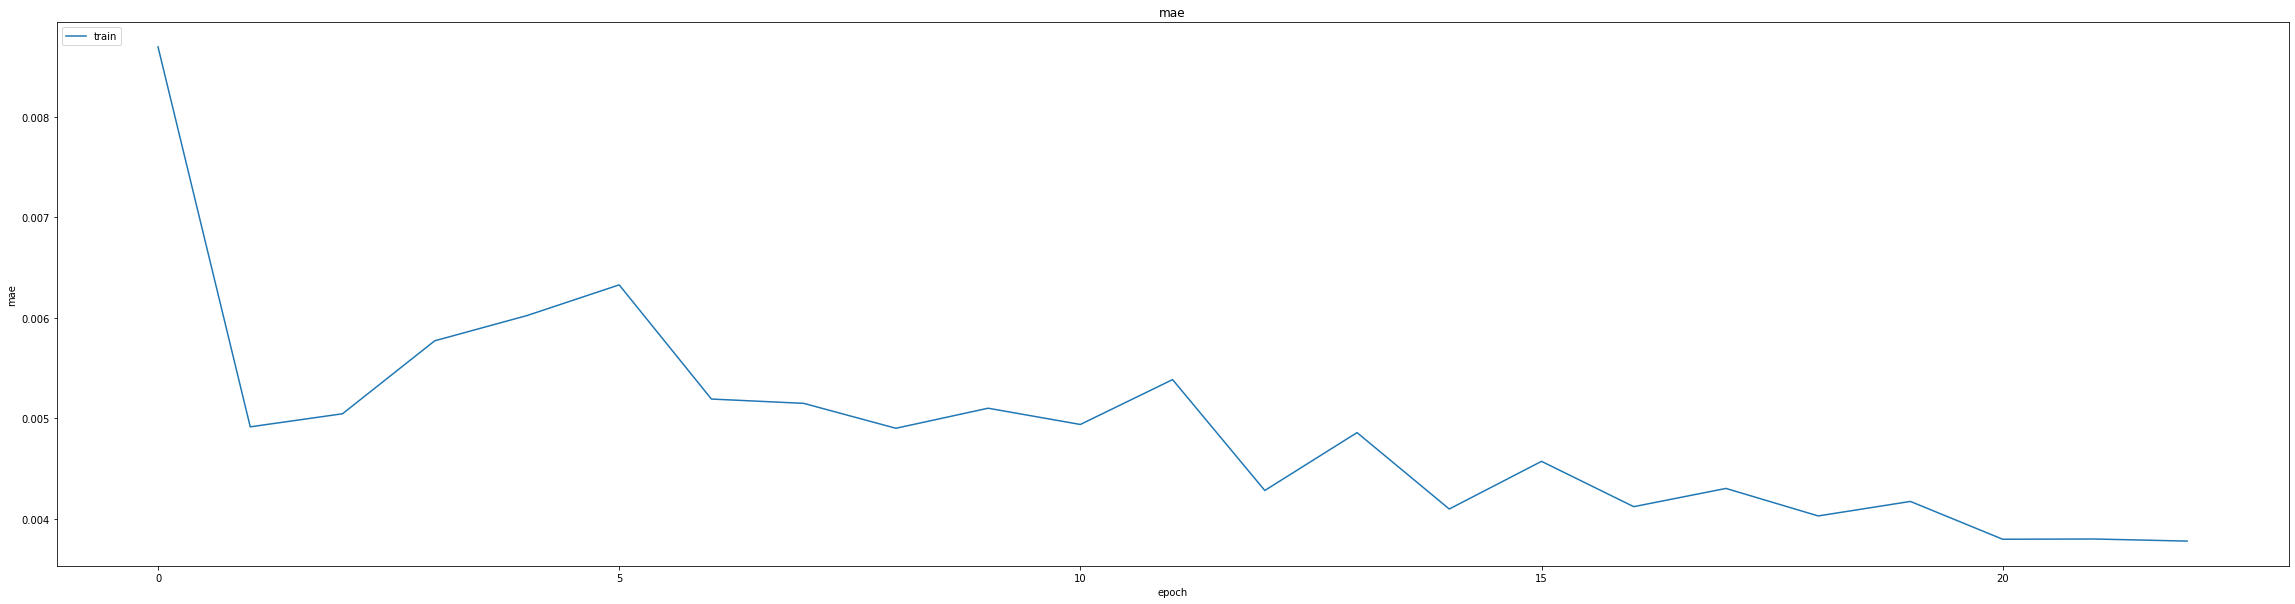

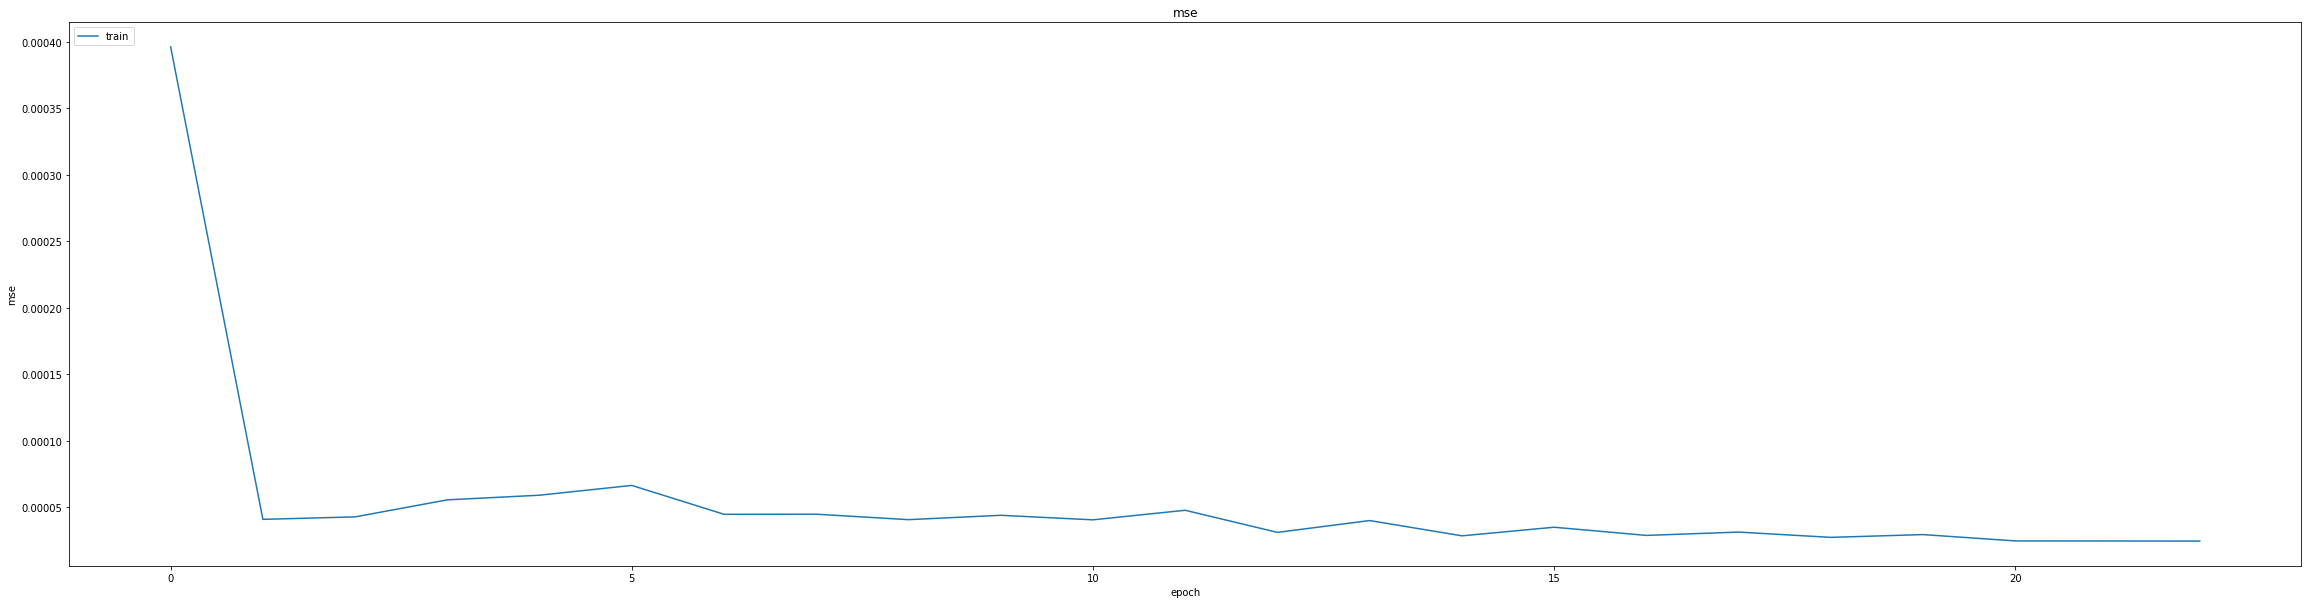

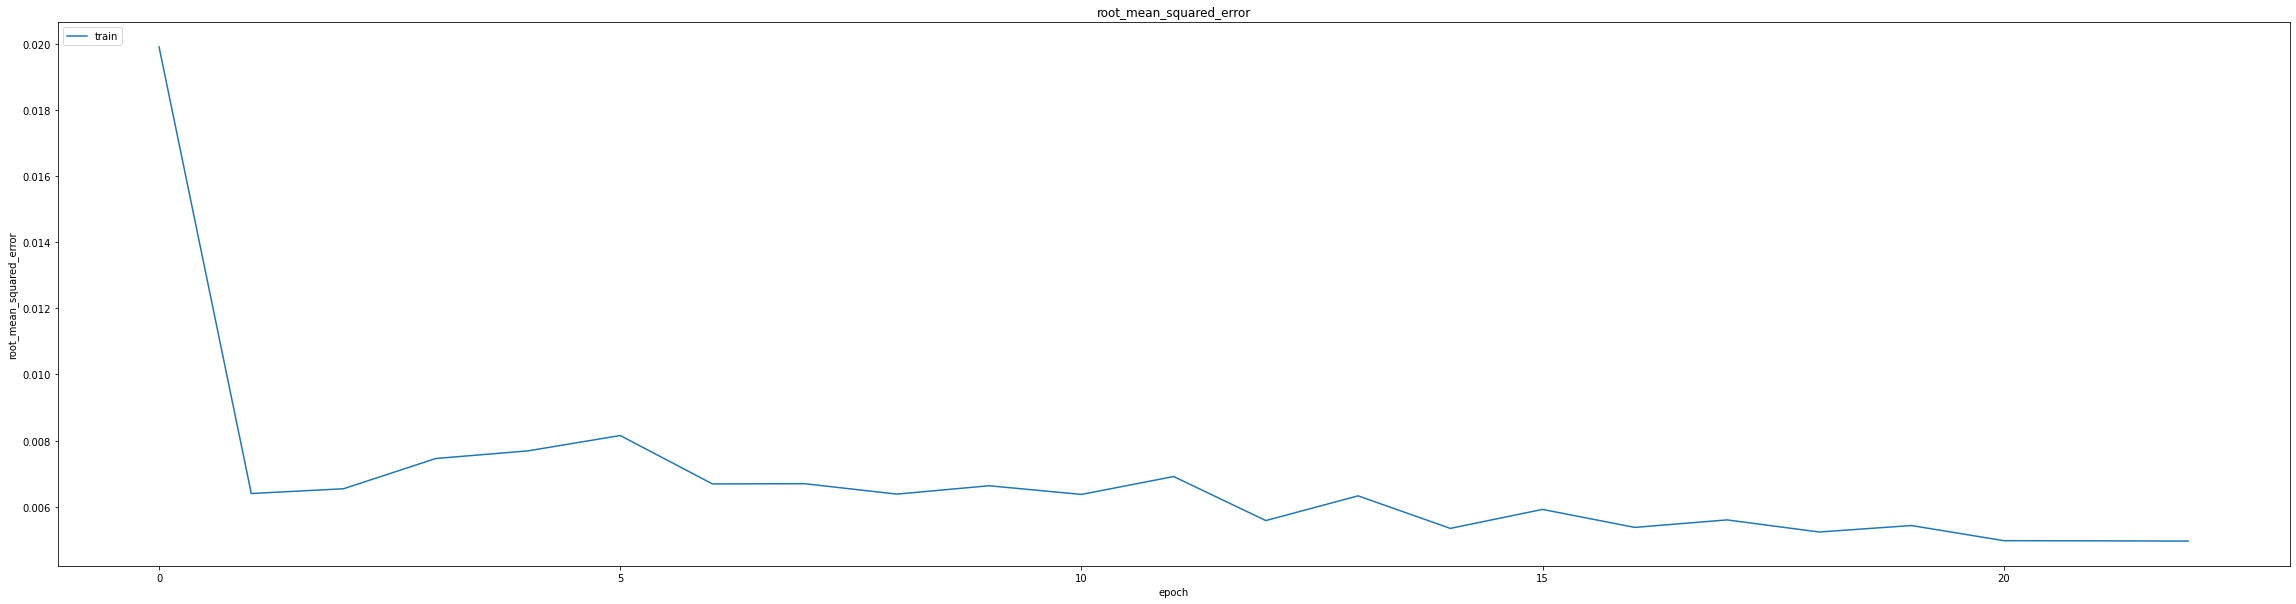

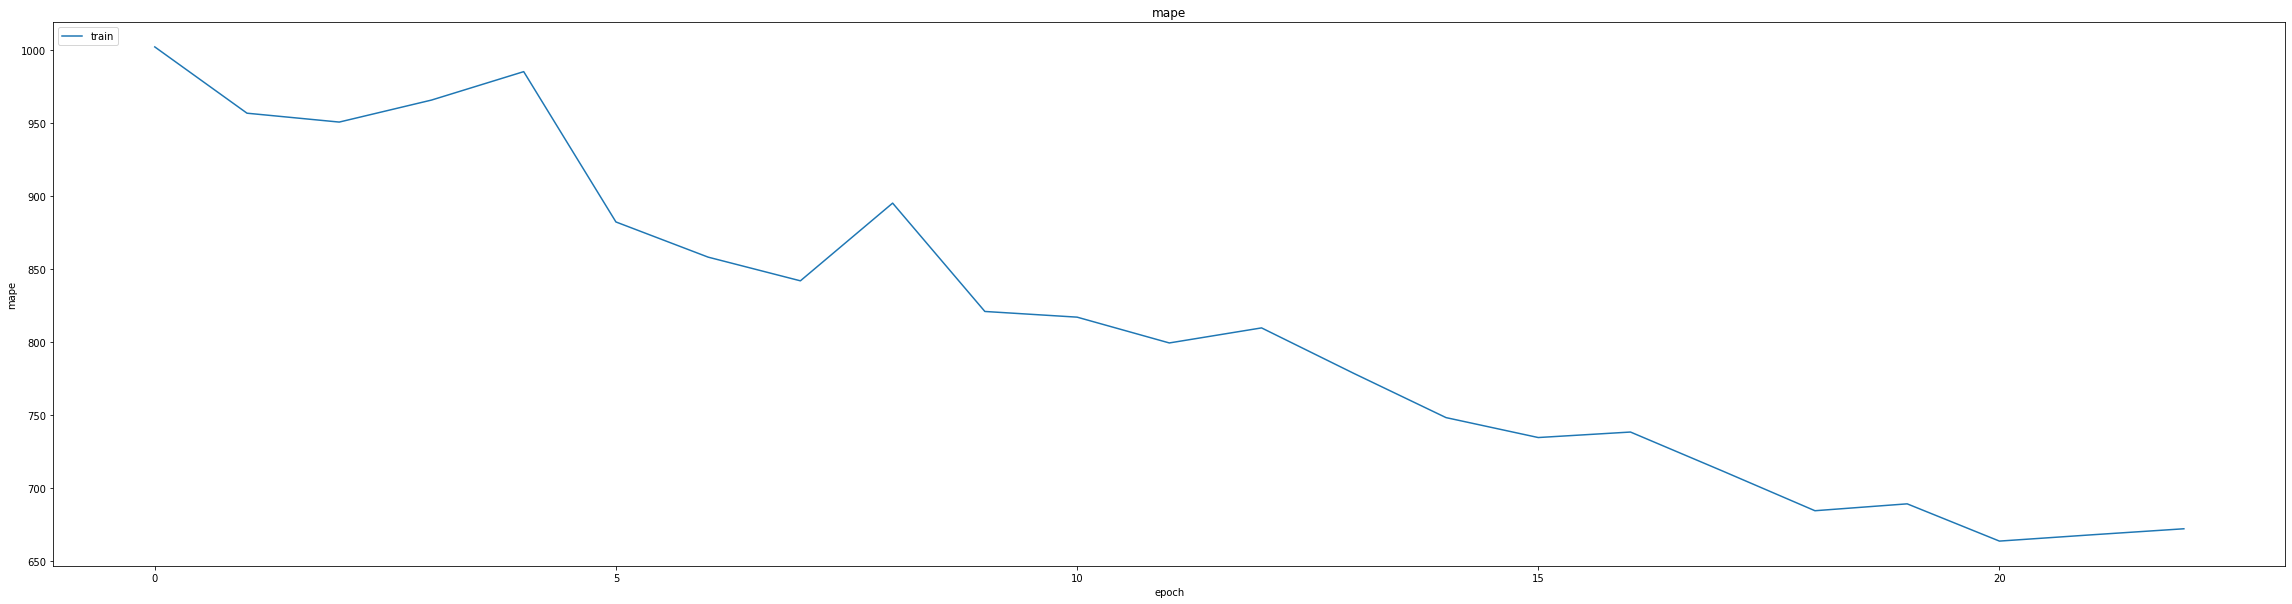

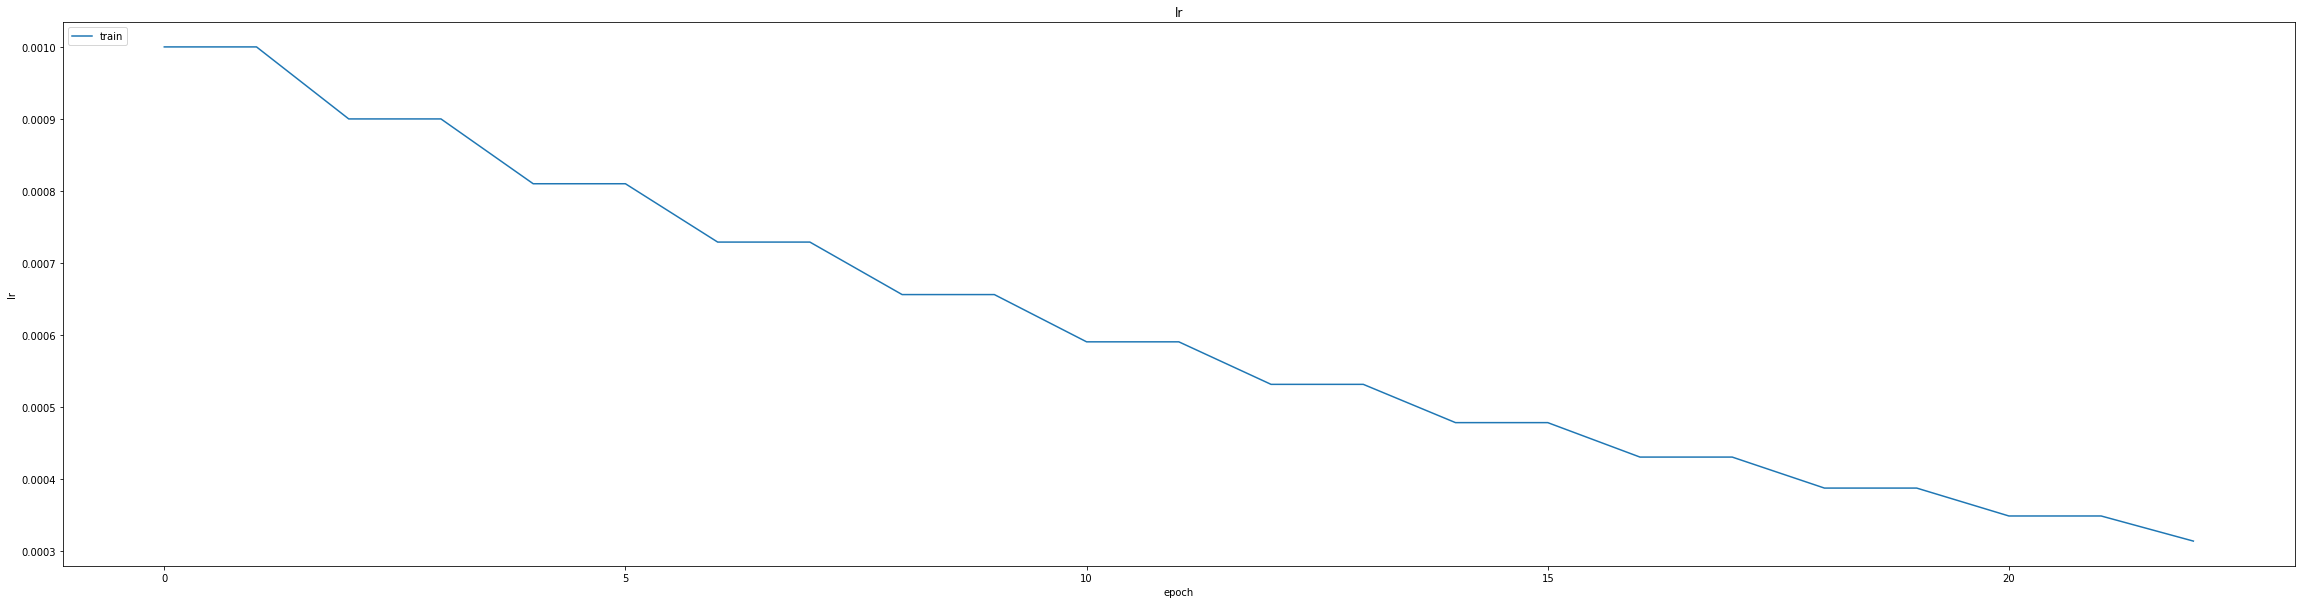

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01149614155292511
0.01247774064540863
348/348 [==============================] - 2s 4ms/step
0.993327635018286


348/348 [==============================] - 1s 4ms/step


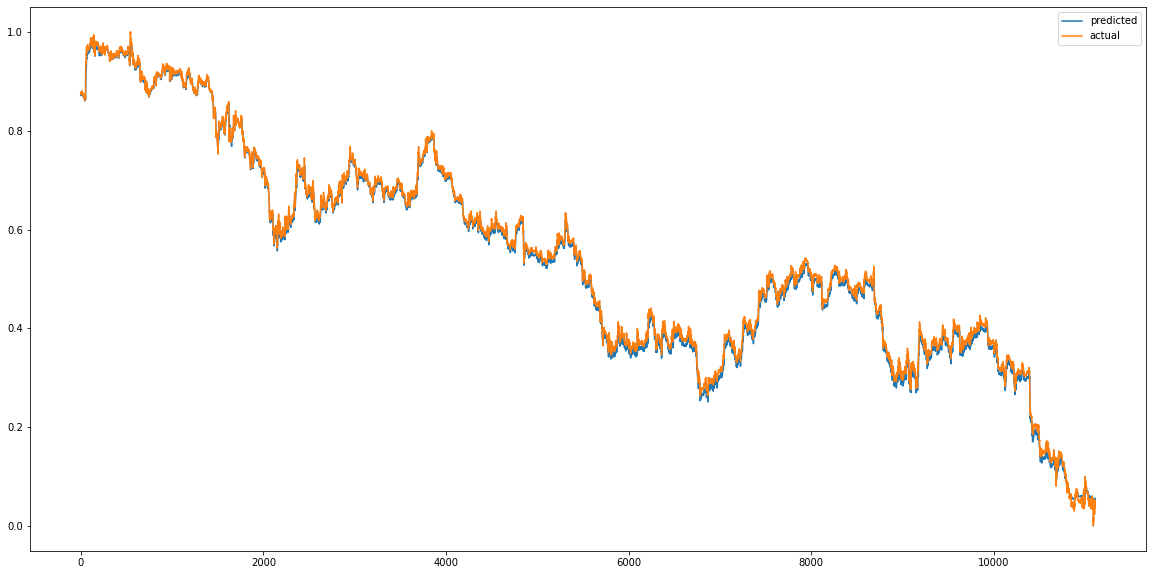

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


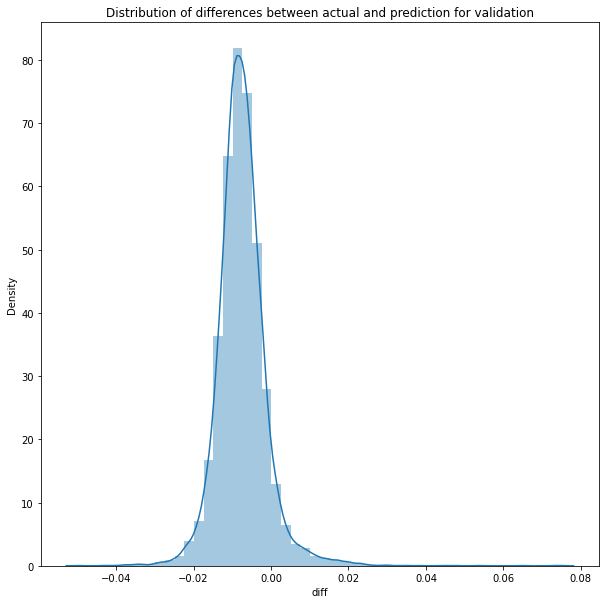

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 4ms/step


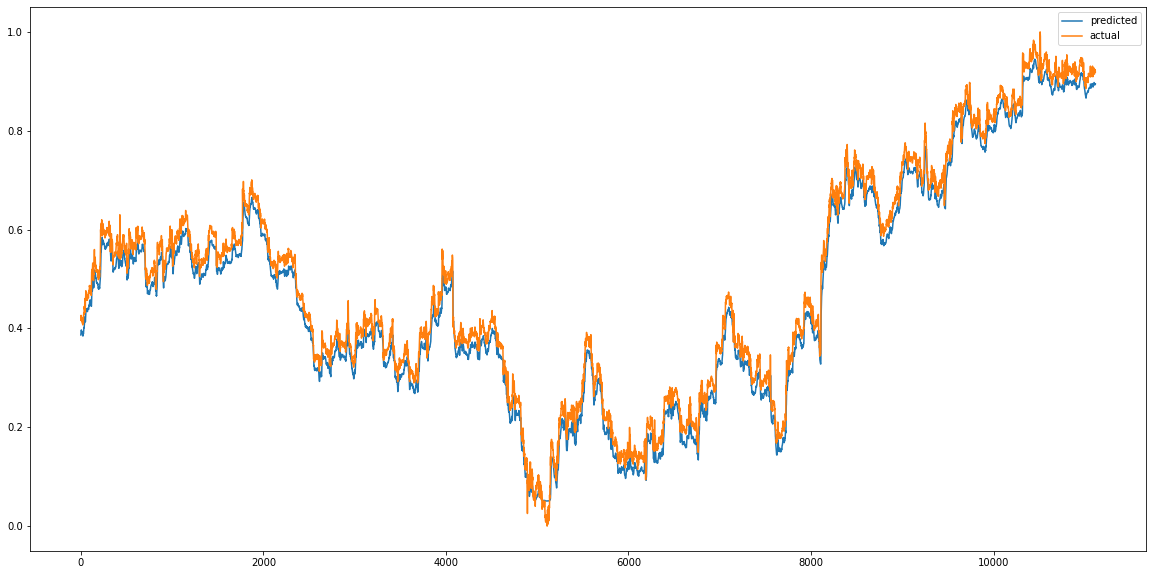

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


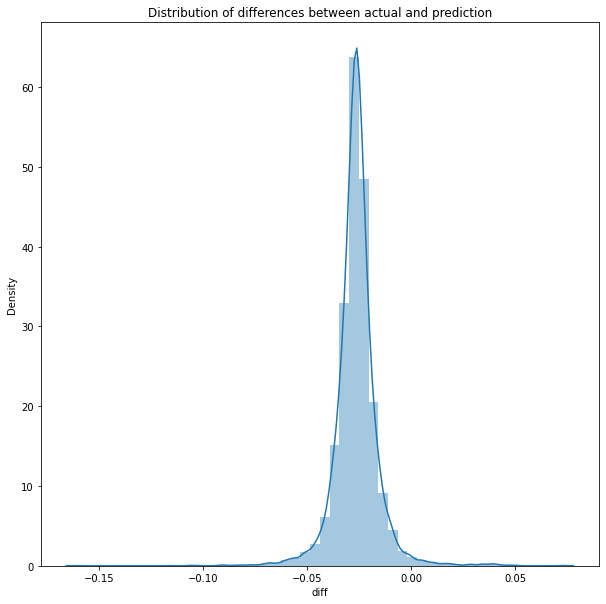

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0008029729811459646
RMSE :  0.02833677788927253
MAE :  0.026802240020671567
348/348 [==============================] - 1s 4ms/step
R2_Score  : 0.9848874718901035


count    11116.000000
mean        -0.026308
std          0.010530
min         -0.160964
25%         -0.030675
50%         -0.026385
75%         -0.022173
max          0.073208
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
402/406 [============================>.] - ETA: 0s - loss: 432.3435 - mae: 4.0338 - mse: 432.3435 - root_mean_squared_error: 20.7929 - mape: 25881.3184
Epoch 1: val_mse improved from inf to 0.07998, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 15s 30ms/step - loss: 428.1260 - mae: 3.9967 - mse: 428.1260 - root_mean_squared_error: 20.6912 - mape: 25629.7168 - val_loss: 0.0800 - val_mae: 0.2350 - val_mse: 0.0800 - val_root_mean_squared_error: 0.2828 - val_mape: 65431.6484
Epoch 2/75
401/406 [============================>.] - ETA: 0s - loss: 0.0659 - mae: 0.2072 - mse: 0.0659 - root_mean_squared_error: 0.2566 - mape: 12059.9365
Epoch 2: val_mse improved from 0.07998 to 0.05003, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0658 - mae: 0.2072 - mse: 0.0658 - root_mean_squared_error: 0.2565 - mape: 11913.5020 - val_loss: 0.0500 - val_mae: 0.1858 - val_mse: 0.0500 - val_root_mean_squared_error: 0.2237 - val_mape: 52325.5312
Epoch 3/75
406/406 [==============================] - ETA: 0s - loss: 0.0557 - mae: 0.2001 - mse: 0.0557 - root_mean_squared_error: 0.2359 - mape: 11010.9297
Epoch 3: val_mse improved from 0.05003 to 0.04361, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 0.0557 - mae: 0.2001 - mse: 0.0557 - root_mean_squared_error: 0.2359 - mape: 11010.9297 - val_loss: 0.0436 - val_mae: 0.1735 - val_mse: 0.0436 - val_root_mean_squared_error: 0.2088 - val_mape: 49406.1914
Epoch 4/75
405/406 [============================>.] - ETA: 0s - loss: 0.0253 - mae: 0.1190 - mse: 0.0253 - root_mean_squared_error: 0.1589 - mape: 7978.0303
Epoch 4: val_mse improved from 0.04361 to 0.00846, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 28ms/step - loss: 0.0252 - mae: 0.1189 - mse: 0.0252 - root_mean_squared_error: 0.1588 - mape: 7959.2197 - val_loss: 0.0085 - val_mae: 0.0628 - val_mse: 0.0085 - val_root_mean_squared_error: 0.0920 - val_mape: 35020.6875
Epoch 5/75
402/406 [============================>.] - ETA: 0s - loss: 0.0082 - mae: 0.0611 - mse: 0.0082 - root_mean_squared_error: 0.0907 - mape: 7119.0508
Epoch 5: val_mse improved from 0.00846 to 0.00450, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 28ms/step - loss: 0.0082 - mae: 0.0610 - mse: 0.0082 - root_mean_squared_error: 0.0905 - mape: 7049.7778 - val_loss: 0.0045 - val_mae: 0.0423 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0671 - val_mape: 28702.2383
Epoch 6/75
404/406 [============================>.] - ETA: 0s - loss: 0.0045 - mae: 0.0437 - mse: 0.0045 - root_mean_squared_error: 0.0671 - mape: 5770.4028
Epoch 6: val_mse improved from 0.00450 to 0.00273, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0045 - mae: 0.0437 - mse: 0.0045 - root_mean_squared_error: 0.0671 - mape: 5742.5928 - val_loss: 0.0027 - val_mae: 0.0303 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0522 - val_mape: 24704.1895
Epoch 7/75
405/406 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0334 - mse: 0.0027 - root_mean_squared_error: 0.0521 - mape: 5063.4746
Epoch 7: val_mse improved from 0.00273 to 0.00203, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 0.0027 - mae: 0.0334 - mse: 0.0027 - root_mean_squared_error: 0.0521 - mape: 5051.5117 - val_loss: 0.0020 - val_mae: 0.0273 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0451 - val_mape: 21688.8730
Epoch 8/75
404/406 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0274 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 4480.5146
Epoch 8: val_mse improved from 0.00203 to 0.00148, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0018 - mae: 0.0273 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 4458.9365 - val_loss: 0.0015 - val_mae: 0.0241 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0384 - val_mape: 19400.1719
Epoch 9/75
406/406 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0236 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 3806.3613
Epoch 9: val_mse improved from 0.00148 to 0.00110, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 0.0012 - mae: 0.0236 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 3806.3613 - val_loss: 0.0011 - val_mae: 0.0210 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 17560.8203
Epoch 10/75
405/406 [============================>.] - ETA: 0s - loss: 9.1071e-04 - mae: 0.0207 - mse: 9.1071e-04 - root_mean_squared_error: 0.0302 - mape: 3680.3579
Epoch 10: val_mse improved from 0.00110 to 0.00085, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 9.0996e-04 - mae: 0.0207 - mse: 9.0996e-04 - root_mean_squared_error: 0.0302 - mape: 3671.6621 - val_loss: 8.5246e-04 - val_mae: 0.0193 - val_mse: 8.5246e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 16047.0127
Epoch 11/75
402/406 [============================>.] - ETA: 0s - loss: 6.9922e-04 - mae: 0.0186 - mse: 6.9922e-04 - root_mean_squared_error: 0.0264 - mape: 3315.1660
Epoch 11: val_mse improved from 0.00085 to 0.00076, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 6.9779e-04 - mae: 0.0186 - mse: 6.9779e-04 - root_mean_squared_error: 0.0264 - mape: 3282.8857 - val_loss: 7.5651e-04 - val_mae: 0.0190 - val_mse: 7.5651e-04 - val_root_mean_squared_error: 0.0275 - val_mape: 14814.0664
Epoch 12/75
404/406 [============================>.] - ETA: 0s - loss: 5.5309e-04 - mae: 0.0170 - mse: 5.5309e-04 - root_mean_squared_error: 0.0235 - mape: 3027.5398
Epoch 12: val_mse improved from 0.00076 to 0.00065, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 5.5305e-04 - mae: 0.0170 - mse: 5.5305e-04 - root_mean_squared_error: 0.0235 - mape: 3012.9761 - val_loss: 6.4932e-04 - val_mae: 0.0175 - val_mse: 6.4932e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 13793.5508
Epoch 13/75
405/406 [============================>.] - ETA: 0s - loss: 4.5366e-04 - mae: 0.0156 - mse: 4.5366e-04 - root_mean_squared_error: 0.0213 - mape: 2828.5513
Epoch 13: val_mse improved from 0.00065 to 0.00059, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 4.5391e-04 - mae: 0.0156 - mse: 4.5391e-04 - root_mean_squared_error: 0.0213 - mape: 2821.8706 - val_loss: 5.8828e-04 - val_mae: 0.0175 - val_mse: 5.8828e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 12953.3408
Epoch 14/75
405/406 [============================>.] - ETA: 0s - loss: 3.8855e-04 - mae: 0.0146 - mse: 3.8855e-04 - root_mean_squared_error: 0.0197 - mape: 2759.1975
Epoch 14: val_mse improved from 0.00059 to 0.00054, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 28ms/step - loss: 3.8832e-04 - mae: 0.0146 - mse: 3.8832e-04 - root_mean_squared_error: 0.0197 - mape: 2752.6763 - val_loss: 5.4206e-04 - val_mae: 0.0166 - val_mse: 5.4206e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 12248.9551
Epoch 15/75
404/406 [============================>.] - ETA: 0s - loss: 3.4090e-04 - mae: 0.0138 - mse: 3.4090e-04 - root_mean_squared_error: 0.0185 - mape: 2608.3250
Epoch 15: val_mse improved from 0.00054 to 0.00053, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 3.4065e-04 - mae: 0.0138 - mse: 3.4065e-04 - root_mean_squared_error: 0.0185 - mape: 2595.7451 - val_loss: 5.2942e-04 - val_mae: 0.0171 - val_mse: 5.2942e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 11662.0420
Epoch 16/75
404/406 [============================>.] - ETA: 0s - loss: 3.0563e-04 - mae: 0.0131 - mse: 3.0563e-04 - root_mean_squared_error: 0.0175 - mape: 2437.3818
Epoch 16: val_mse improved from 0.00053 to 0.00049, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 3.0535e-04 - mae: 0.0131 - mse: 3.0535e-04 - root_mean_squared_error: 0.0175 - mape: 2425.6289 - val_loss: 4.8992e-04 - val_mae: 0.0166 - val_mse: 4.8992e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 11159.9629
Epoch 17/75
402/406 [============================>.] - ETA: 0s - loss: 2.7215e-04 - mae: 0.0125 - mse: 2.7215e-04 - root_mean_squared_error: 0.0165 - mape: 2319.8435
Epoch 17: val_mse improved from 0.00049 to 0.00045, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 2.7187e-04 - mae: 0.0125 - mse: 2.7187e-04 - root_mean_squared_error: 0.0165 - mape: 2297.2458 - val_loss: 4.5211e-04 - val_mae: 0.0155 - val_mse: 4.5211e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 10696.3496
Epoch 18/75
401/406 [============================>.] - ETA: 0s - loss: 2.5109e-04 - mae: 0.0120 - mse: 2.5109e-04 - root_mean_squared_error: 0.0158 - mape: 2233.4990
Epoch 18: val_mse did not improve from 0.00045
406/406 [==============================] - 5s 12ms/step - loss: 2.5100e-04 - mae: 0.0120 - mse: 2.5100e-04 - root_mean_squared_error: 0.0158 - mape: 2206.2563 - val_loss: 4.6257e-04 - val_mae: 0.0166 - val_mse: 4.6257e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 10331.7676
Epoch 19/75
401/406 [============================>.] - ETA: 0s - loss: 2.3032e-04 - mae: 0.0115 - mse: 2.3032e-04 - root_mean_squared_error: 0.0152 - mape: 2185.0811
Epoch 19: val_mse improved from 0.00045 to 0.00041, sa

406/406 [==============================] - 11s 28ms/step - loss: 2.3035e-04 - mae: 0.0115 - mse: 2.3035e-04 - root_mean_squared_error: 0.0152 - mape: 2158.4194 - val_loss: 4.1229e-04 - val_mae: 0.0153 - val_mse: 4.1229e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 9980.9033
Epoch 20/75
403/406 [============================>.] - ETA: 0s - loss: 2.1785e-04 - mae: 0.0112 - mse: 2.1785e-04 - root_mean_squared_error: 0.0148 - mape: 2078.9917
Epoch 20: val_mse did not improve from 0.00041
406/406 [==============================] - 4s 11ms/step - loss: 2.1786e-04 - mae: 0.0112 - mse: 2.1786e-04 - root_mean_squared_error: 0.0148 - mape: 2063.8613 - val_loss: 4.1592e-04 - val_mae: 0.0158 - val_mse: 4.1592e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 9717.0264
Epoch 21/75
403/406 [============================>.] - ETA: 0s - loss: 2.0084e-04 - mae: 0.0107 - mse: 2.0084e-04 - root_mean_squared_error: 0.0142 - mape: 2058.5940
Epoch 21: val_mse improved from 0.00041 to 0.00038, savi

406/406 [==============================] - 11s 27ms/step - loss: 2.0046e-04 - mae: 0.0107 - mse: 2.0046e-04 - root_mean_squared_error: 0.0142 - mape: 2043.5952 - val_loss: 3.8454e-04 - val_mae: 0.0151 - val_mse: 3.8454e-04 - val_root_mean_squared_error: 0.0196 - val_mape: 9429.7266
Epoch 22/75
406/406 [==============================] - ETA: 0s - loss: 1.8843e-04 - mae: 0.0104 - mse: 1.8843e-04 - root_mean_squared_error: 0.0137 - mape: 1894.6643
Epoch 22: val_mse improved from 0.00038 to 0.00030, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 1.8843e-04 - mae: 0.0104 - mse: 1.8843e-04 - root_mean_squared_error: 0.0137 - mape: 1894.6643 - val_loss: 3.0045e-04 - val_mae: 0.0124 - val_mse: 3.0045e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 9166.9697
Epoch 23/75
403/406 [============================>.] - ETA: 0s - loss: 1.8026e-04 - mae: 0.0101 - mse: 1.8026e-04 - root_mean_squared_error: 0.0134 - mape: 1949.4812
Epoch 23: val_mse did not improve from 0.00030
406/406 [==============================] - 4s 10ms/step - loss: 1.8026e-04 - mae: 0.0101 - mse: 1.8026e-04 - root_mean_squared_error: 0.0134 - mape: 1935.2874 - val_loss: 3.0320e-04 - val_mae: 0.0126 - val_mse: 3.0320e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 8956.9746
Epoch 24/75
402/406 [============================>.] - ETA: 0s - loss: 1.7006e-04 - mae: 0.0098 - mse: 1.7006e-04 - root_mean_squared_error: 0.0130 - mape: 1871.6962
Epoch 24: val_mse improved from 0.00030 to 0.00030, savi

406/406 [==============================] - 11s 28ms/step - loss: 1.6974e-04 - mae: 0.0098 - mse: 1.6974e-04 - root_mean_squared_error: 0.0130 - mape: 1853.4585 - val_loss: 2.9800e-04 - val_mae: 0.0126 - val_mse: 2.9800e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 8786.4229
Epoch 25/75
401/406 [============================>.] - ETA: 0s - loss: 1.6228e-04 - mae: 0.0096 - mse: 1.6228e-04 - root_mean_squared_error: 0.0127 - mape: 1842.7322
Epoch 25: val_mse did not improve from 0.00030
406/406 [==============================] - 4s 10ms/step - loss: 1.6228e-04 - mae: 0.0096 - mse: 1.6228e-04 - root_mean_squared_error: 0.0127 - mape: 1820.2531 - val_loss: 3.5587e-04 - val_mae: 0.0137 - val_mse: 3.5587e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 8640.1084
Epoch 26/75
403/406 [============================>.] - ETA: 0s - loss: 1.5606e-04 - mae: 0.0094 - mse: 1.5606e-04 - root_mean_squared_error: 0.0125 - mape: 1773.3916
Epoch 26: val_mse improved from 0.00030 to 0.00026, savi

406/406 [==============================] - 11s 27ms/step - loss: 1.5599e-04 - mae: 0.0094 - mse: 1.5599e-04 - root_mean_squared_error: 0.0125 - mape: 1760.4746 - val_loss: 2.6457e-04 - val_mae: 0.0117 - val_mse: 2.6457e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 8490.6396
Epoch 27/75
406/406 [==============================] - ETA: 0s - loss: 1.4752e-04 - mae: 0.0091 - mse: 1.4752e-04 - root_mean_squared_error: 0.0121 - mape: 1711.6489
Epoch 27: val_mse improved from 0.00026 to 0.00024, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 1.4752e-04 - mae: 0.0091 - mse: 1.4752e-04 - root_mean_squared_error: 0.0121 - mape: 1711.6489 - val_loss: 2.4019e-04 - val_mae: 0.0111 - val_mse: 2.4019e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 8413.8379
Epoch 28/75
402/406 [============================>.] - ETA: 0s - loss: 1.3736e-04 - mae: 0.0088 - mse: 1.3736e-04 - root_mean_squared_error: 0.0117 - mape: 1712.6339
Epoch 28: val_mse improved from 0.00024 to 0.00023, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 1.3718e-04 - mae: 0.0088 - mse: 1.3718e-04 - root_mean_squared_error: 0.0117 - mape: 1695.9442 - val_loss: 2.3128e-04 - val_mae: 0.0109 - val_mse: 2.3128e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 8214.0947
Epoch 29/75
406/406 [==============================] - ETA: 0s - loss: 1.3354e-04 - mae: 0.0086 - mse: 1.3354e-04 - root_mean_squared_error: 0.0116 - mape: 1649.2542
Epoch 29: val_mse did not improve from 0.00023
406/406 [==============================] - 4s 11ms/step - loss: 1.3354e-04 - mae: 0.0086 - mse: 1.3354e-04 - root_mean_squared_error: 0.0116 - mape: 1649.2542 - val_loss: 2.5207e-04 - val_mae: 0.0116 - val_mse: 2.5207e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 8151.5981
Epoch 30/75
401/406 [============================>.] - ETA: 0s - loss: 1.2811e-04 - mae: 0.0085 - mse: 1.2811e-04 - root_mean_squared_error: 0.0113 - mape: 1624.6249
Epoch 30: val_mse improved from 0.00023 to 0.00022, savi

406/406 [==============================] - 11s 27ms/step - loss: 1.2815e-04 - mae: 0.0085 - mse: 1.2815e-04 - root_mean_squared_error: 0.0113 - mape: 1604.7968 - val_loss: 2.1969e-04 - val_mae: 0.0107 - val_mse: 2.1969e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 7979.9146
Epoch 31/75
406/406 [==============================] - ETA: 0s - loss: 1.2377e-04 - mae: 0.0083 - mse: 1.2377e-04 - root_mean_squared_error: 0.0111 - mape: 1557.8346
Epoch 31: val_mse did not improve from 0.00022
406/406 [==============================] - 4s 10ms/step - loss: 1.2377e-04 - mae: 0.0083 - mse: 1.2377e-04 - root_mean_squared_error: 0.0111 - mape: 1557.8346 - val_loss: 2.6155e-04 - val_mae: 0.0119 - val_mse: 2.6155e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 7921.0146
Epoch 32/75
405/406 [============================>.] - ETA: 0s - loss: 1.1730e-04 - mae: 0.0081 - mse: 1.1730e-04 - root_mean_squared_error: 0.0108 - mape: 1539.0472
Epoch 32: val_mse improved from 0.00022 to 0.00020, savi

406/406 [==============================] - 11s 28ms/step - loss: 1.1742e-04 - mae: 0.0081 - mse: 1.1742e-04 - root_mean_squared_error: 0.0108 - mape: 1535.4139 - val_loss: 2.0361e-04 - val_mae: 0.0102 - val_mse: 2.0361e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 7758.9277
Epoch 33/75
402/406 [============================>.] - ETA: 0s - loss: 1.1446e-04 - mae: 0.0080 - mse: 1.1446e-04 - root_mean_squared_error: 0.0107 - mape: 1530.3131
Epoch 33: val_mse did not improve from 0.00020
406/406 [==============================] - 5s 13ms/step - loss: 1.1445e-04 - mae: 0.0080 - mse: 1.1445e-04 - root_mean_squared_error: 0.0107 - mape: 1515.4268 - val_loss: 2.1283e-04 - val_mae: 0.0106 - val_mse: 2.1283e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 7627.0215
Epoch 34/75
405/406 [============================>.] - ETA: 0s - loss: 1.1179e-04 - mae: 0.0079 - mse: 1.1179e-04 - root_mean_squared_error: 0.0106 - mape: 1490.5543
Epoch 34: val_mse did not improve from 0.00020
406/406 [

406/406 [==============================] - 11s 28ms/step - loss: 1.0251e-04 - mae: 0.0075 - mse: 1.0251e-04 - root_mean_squared_error: 0.0101 - mape: 1436.4594 - val_loss: 1.6627e-04 - val_mae: 0.0091 - val_mse: 1.6627e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 7305.2285
Epoch 36/75
404/406 [============================>.] - ETA: 0s - loss: 1.0699e-04 - mae: 0.0078 - mse: 1.0699e-04 - root_mean_squared_error: 0.0103 - mape: 1435.2617
Epoch 36: val_mse improved from 0.00017 to 0.00017, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 1.0692e-04 - mae: 0.0078 - mse: 1.0692e-04 - root_mean_squared_error: 0.0103 - mape: 1428.3376 - val_loss: 1.6560e-04 - val_mae: 0.0091 - val_mse: 1.6560e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 7238.9629
Epoch 37/75
404/406 [============================>.] - ETA: 0s - loss: 1.0052e-04 - mae: 0.0075 - mse: 1.0052e-04 - root_mean_squared_error: 0.0100 - mape: 1448.7130
Epoch 37: val_mse improved from 0.00017 to 0.00015, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 1.0041e-04 - mae: 0.0075 - mse: 1.0041e-04 - root_mean_squared_error: 0.0100 - mape: 1441.7235 - val_loss: 1.4856e-04 - val_mae: 0.0084 - val_mse: 1.4856e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 7361.6626
Epoch 38/75
402/406 [============================>.] - ETA: 0s - loss: 1.0169e-04 - mae: 0.0076 - mse: 1.0169e-04 - root_mean_squared_error: 0.0101 - mape: 1463.1981
Epoch 38: val_mse did not improve from 0.00015
406/406 [==============================] - 4s 10ms/step - loss: 1.0175e-04 - mae: 0.0076 - mse: 1.0175e-04 - root_mean_squared_error: 0.0101 - mape: 1448.9452 - val_loss: 1.9347e-04 - val_mae: 0.0103 - val_mse: 1.9347e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 7099.2549
Epoch 39/75
405/406 [============================>.] - ETA: 0s - loss: 9.8155e-05 - mae: 0.0075 - mse: 9.8155e-05 - root_mean_squared_error: 0.0099 - mape: 1407.4164
Epoch 39: val_mse improved from 0.00015 to 0.00014, savi

406/406 [==============================] - 11s 28ms/step - loss: 9.8262e-05 - mae: 0.0075 - mse: 9.8262e-05 - root_mean_squared_error: 0.0099 - mape: 1404.0900 - val_loss: 1.3807e-04 - val_mae: 0.0082 - val_mse: 1.3807e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 6995.3037
Epoch 40/75
406/406 [==============================] - ETA: 0s - loss: 9.3475e-05 - mae: 0.0073 - mse: 9.3475e-05 - root_mean_squared_error: 0.0097 - mape: 1372.9518
Epoch 40: val_mse did not improve from 0.00014
406/406 [==============================] - 4s 10ms/step - loss: 9.3475e-05 - mae: 0.0073 - mse: 9.3475e-05 - root_mean_squared_error: 0.0097 - mape: 1372.9518 - val_loss: 2.1340e-04 - val_mae: 0.0112 - val_mse: 2.1340e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 6749.4053
Epoch 41/75
405/406 [============================>.] - ETA: 0s - loss: 9.3860e-05 - mae: 0.0073 - mse: 9.3860e-05 - root_mean_squared_error: 0.0097 - mape: 1323.6716
Epoch 41: val_mse did not improve from 0.00014
406/406 [

406/406 [==============================] - 11s 28ms/step - loss: 8.8770e-05 - mae: 0.0071 - mse: 8.8770e-05 - root_mean_squared_error: 0.0094 - mape: 1306.9242 - val_loss: 1.1959e-04 - val_mae: 0.0077 - val_mse: 1.1959e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 6556.3242
Epoch 43/75
406/406 [==============================] - ETA: 0s - loss: 8.0506e-05 - mae: 0.0068 - mse: 8.0506e-05 - root_mean_squared_error: 0.0090 - mape: 1267.3698
Epoch 43: val_mse did not improve from 0.00012
406/406 [==============================] - 4s 10ms/step - loss: 8.0506e-05 - mae: 0.0068 - mse: 8.0506e-05 - root_mean_squared_error: 0.0090 - mape: 1267.3698 - val_loss: 1.8174e-04 - val_mae: 0.0105 - val_mse: 1.8174e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 6384.5029
Epoch 44/75
403/406 [============================>.] - ETA: 0s - loss: 8.2809e-05 - mae: 0.0069 - mse: 8.2809e-05 - root_mean_squared_error: 0.0091 - mape: 1231.6803
Epoch 44: val_mse did not improve from 0.00012
406/406 [

406/406 [==============================] - 11s 27ms/step - loss: 7.9423e-05 - mae: 0.0068 - mse: 7.9423e-05 - root_mean_squared_error: 0.0089 - mape: 1147.8488 - val_loss: 1.0395e-04 - val_mae: 0.0074 - val_mse: 1.0395e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 5888.4111
Epoch 48/75
404/406 [============================>.] - ETA: 0s - loss: 7.7914e-05 - mae: 0.0067 - mse: 7.7914e-05 - root_mean_squared_error: 0.0088 - mape: 1141.8208
Epoch 48: val_mse improved from 0.00010 to 0.00008, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 7.7890e-05 - mae: 0.0067 - mse: 7.7890e-05 - root_mean_squared_error: 0.0088 - mape: 1136.3129 - val_loss: 8.4787e-05 - val_mae: 0.0064 - val_mse: 8.4787e-05 - val_root_mean_squared_error: 0.0092 - val_mape: 5698.6968
Epoch 49/75
401/406 [============================>.] - ETA: 0s - loss: 8.5090e-05 - mae: 0.0070 - mse: 8.5090e-05 - root_mean_squared_error: 0.0092 - mape: 1127.5577
Epoch 49: val_mse did not improve from 0.00008
406/406 [==============================] - 4s 10ms/step - loss: 8.5461e-05 - mae: 0.0071 - mse: 8.5461e-05 - root_mean_squared_error: 0.0092 - mape: 1113.8020 - val_loss: 2.3560e-04 - val_mae: 0.0129 - val_mse: 2.3560e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 5615.0674
Epoch 50/75
405/406 [============================>.] - ETA: 0s - loss: 8.2324e-05 - mae: 0.0069 - mse: 8.2324e-05 - root_mean_squared_error: 0.0091 - mape: 1090.3989
Epoch 50: val_mse did not improve from 0.00008
406/406 [

406/406 [==============================] - 13s 31ms/step - loss: 6.5428e-05 - mae: 0.0062 - mse: 6.5428e-05 - root_mean_squared_error: 0.0081 - mape: 1077.2041 - val_loss: 7.2238e-05 - val_mae: 0.0060 - val_mse: 7.2238e-05 - val_root_mean_squared_error: 0.0085 - val_mape: 5460.9517
Epoch 53/75
405/406 [============================>.] - ETA: 0s - loss: 8.0946e-05 - mae: 0.0070 - mse: 8.0946e-05 - root_mean_squared_error: 0.0090 - mape: 1000.6609
Epoch 53: val_mse did not improve from 0.00007
406/406 [==============================] - 4s 10ms/step - loss: 8.0965e-05 - mae: 0.0070 - mse: 8.0965e-05 - root_mean_squared_error: 0.0090 - mape: 998.3038 - val_loss: 3.1281e-04 - val_mae: 0.0159 - val_mse: 3.1281e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 4920.9780
Epoch 54/75
404/406 [============================>.] - ETA: 0s - loss: 8.6317e-05 - mae: 0.0071 - mse: 8.6317e-05 - root_mean_squared_error: 0.0093 - mape: 2.0244
Epoch 54: val_mse did not improve from 0.00007
406/406 [====

406/406 [==============================] - 11s 27ms/step - loss: 7.4737e-05 - mae: 0.0067 - mse: 7.4737e-05 - root_mean_squared_error: 0.0086 - mape: 969.2365 - val_loss: 7.1293e-05 - val_mae: 0.0063 - val_mse: 7.1293e-05 - val_root_mean_squared_error: 0.0084 - val_mape: 5363.1021
Epoch 56/75
406/406 [==============================] - ETA: 0s - loss: 6.7375e-05 - mae: 0.0062 - mse: 6.7375e-05 - root_mean_squared_error: 0.0082 - mape: 910.8354
Epoch 56: val_mse did not improve from 0.00007
406/406 [==============================] - 4s 10ms/step - loss: 6.7375e-05 - mae: 0.0062 - mse: 6.7375e-05 - root_mean_squared_error: 0.0082 - mape: 910.8354 - val_loss: 1.7634e-04 - val_mae: 0.0114 - val_mse: 1.7634e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 5237.6914
Epoch 57/75
402/406 [============================>.] - ETA: 0s - loss: 6.8093e-05 - mae: 0.0064 - mse: 6.8093e-05 - root_mean_squared_error: 0.0083 - mape: 884.7374
Epoch 57: val_mse did not improve from 0.00007
406/406 [====

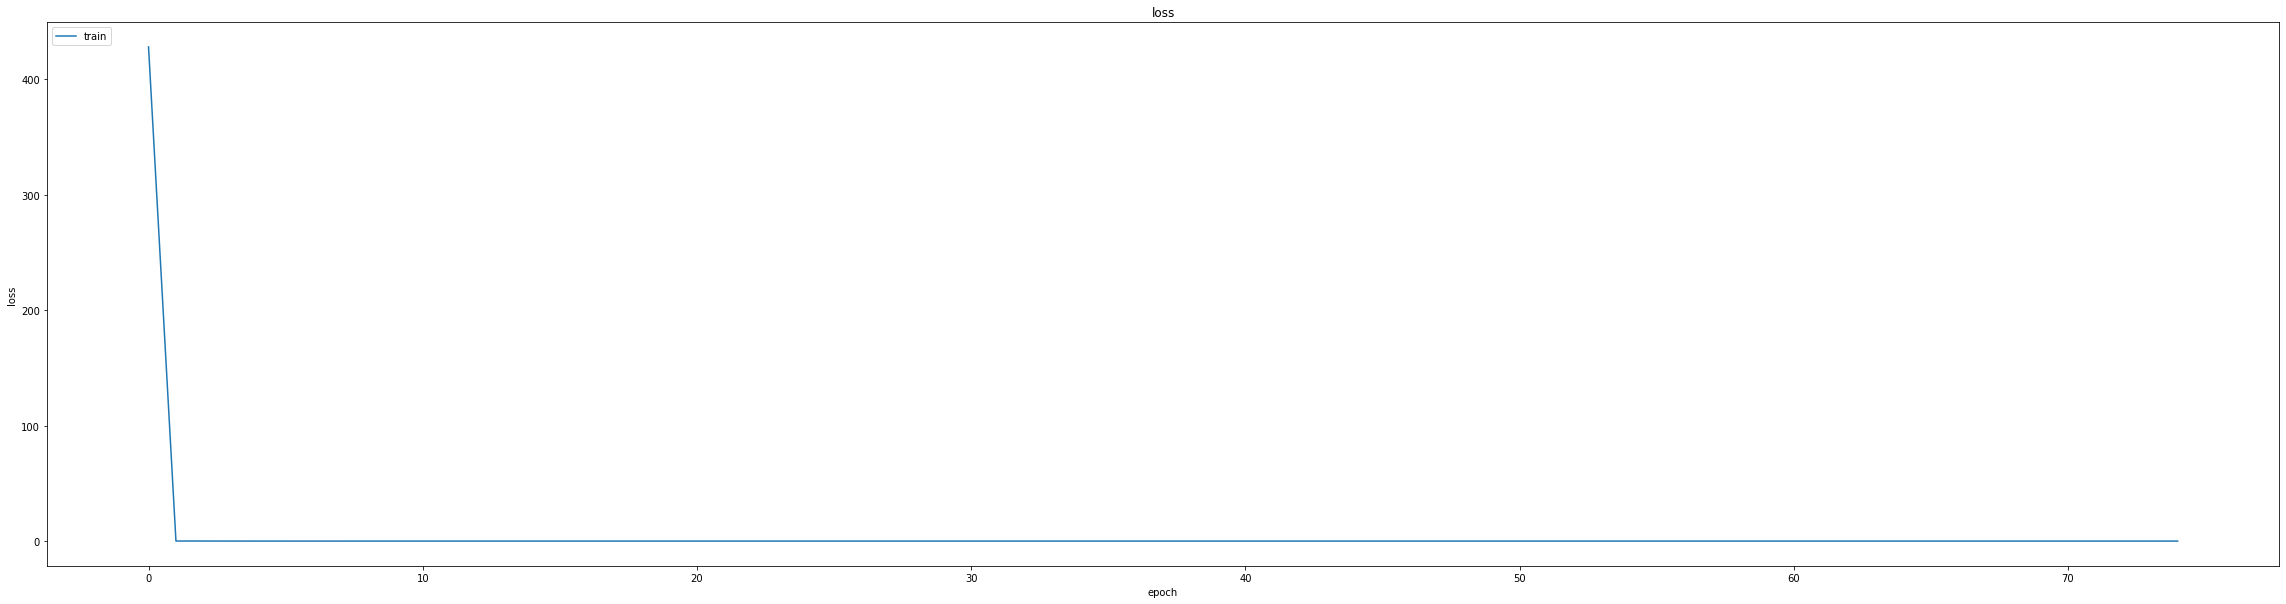

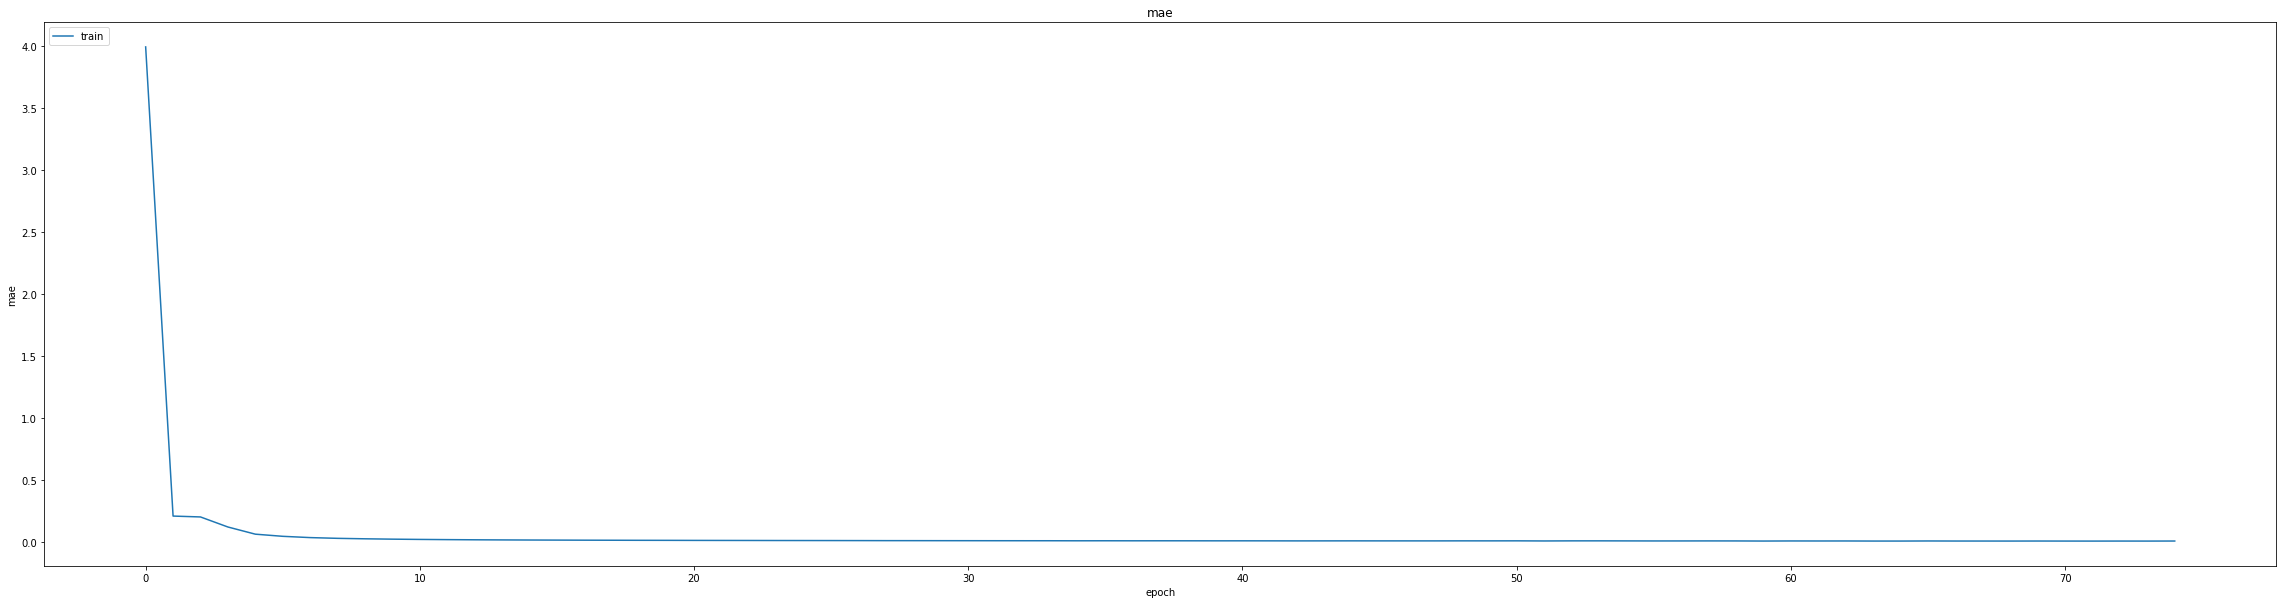

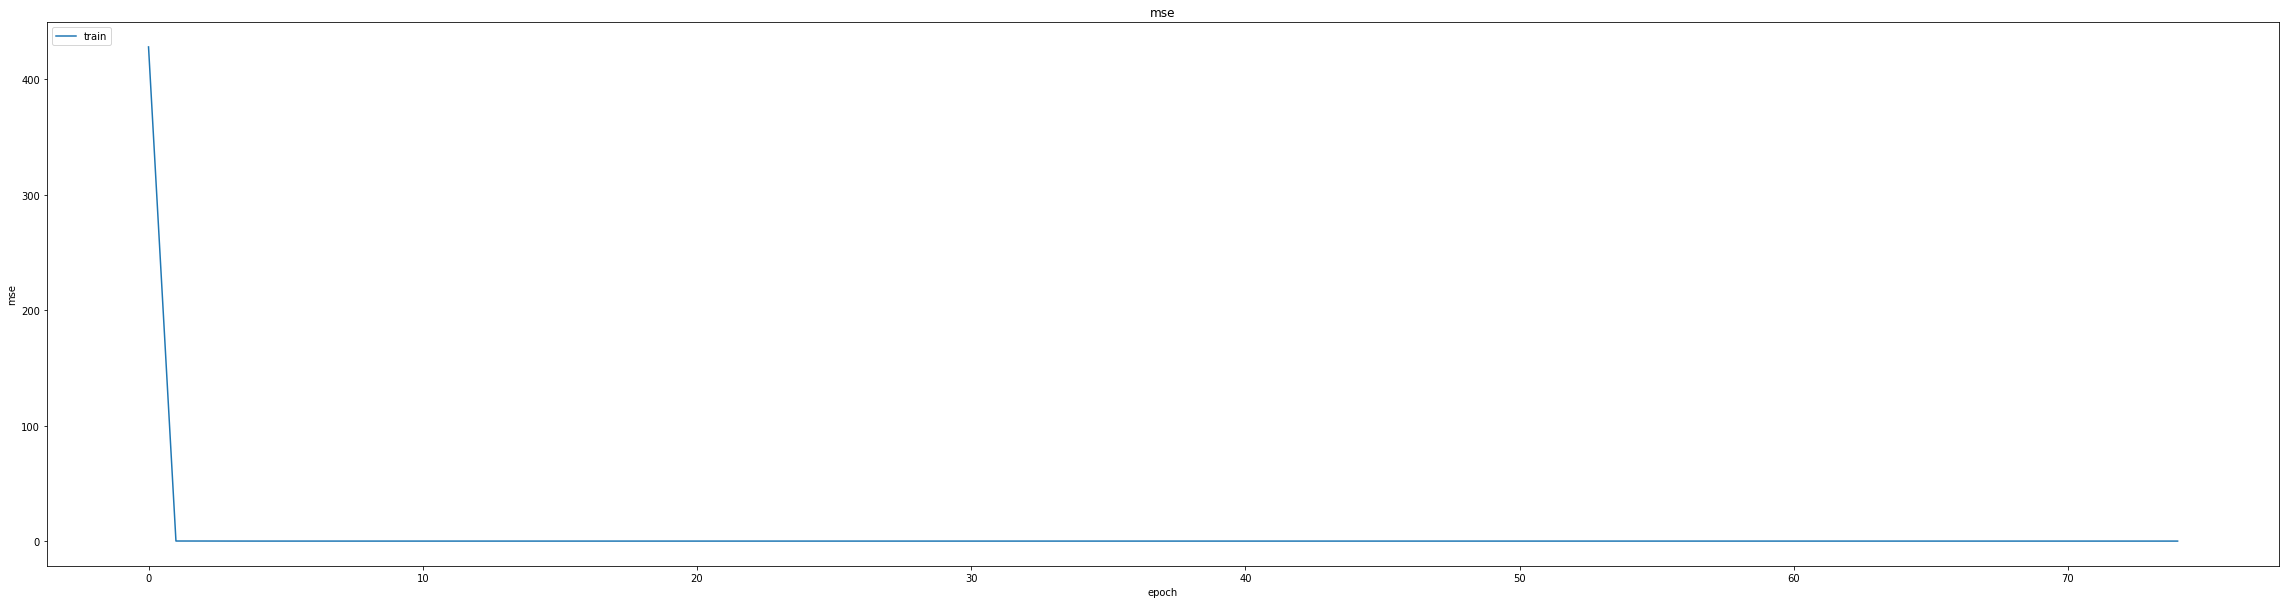

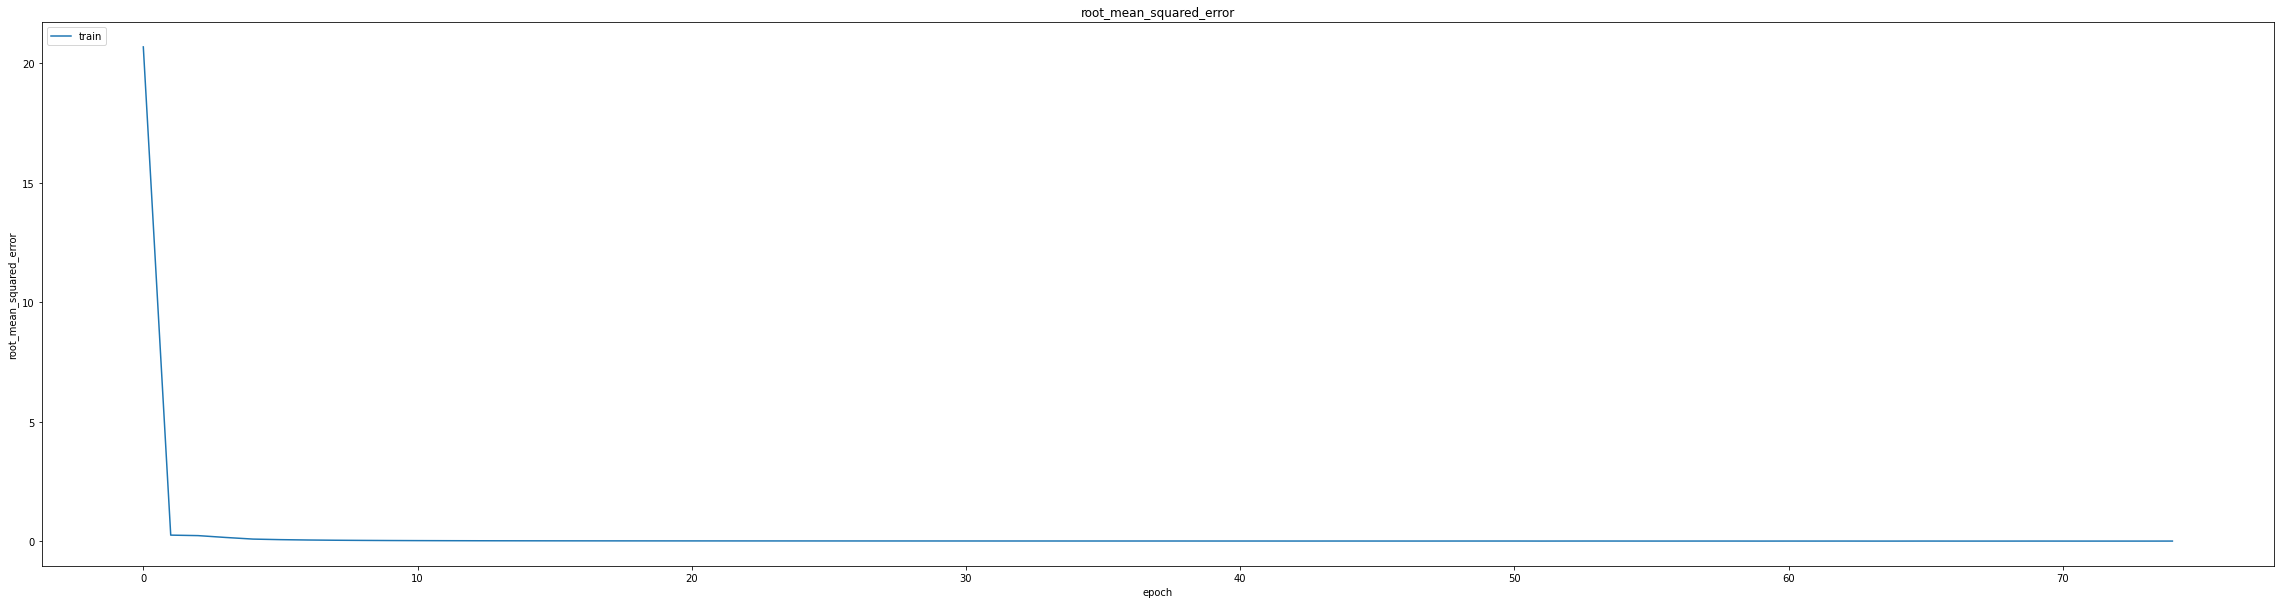

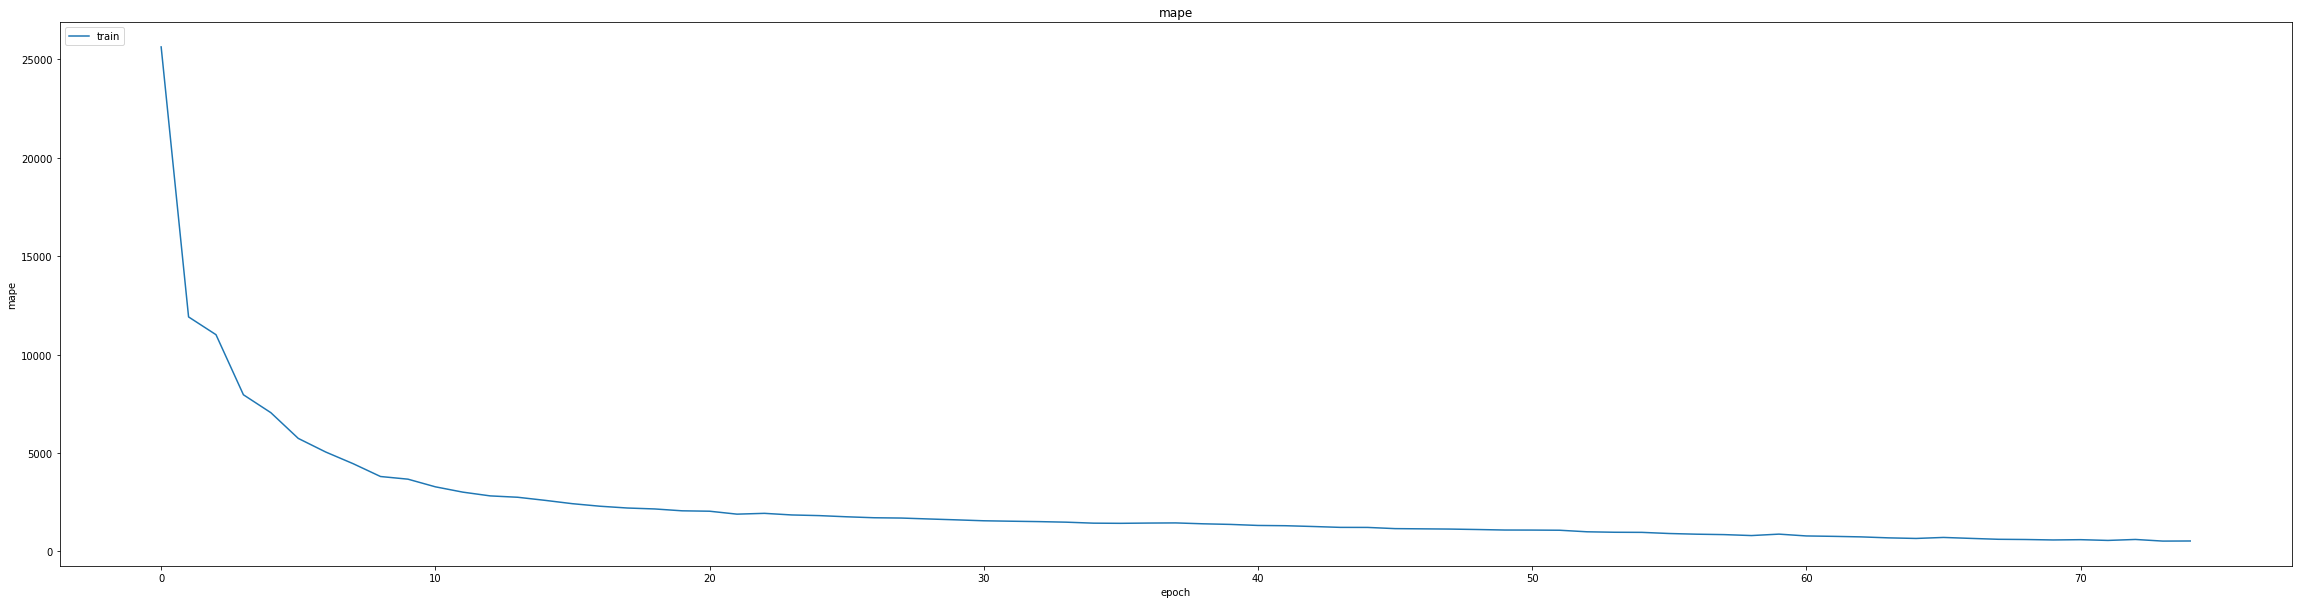

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006023495923727751
0.008443508297204971
348/348 [==============================] - 2s 5ms/step
0.9954677935988939


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


406/406 [==============================] - ETA: 0s - loss: 3.5106e-04 - mae: 0.0088 - mse: 3.5106e-04 - root_mean_squared_error: 0.0187 - mape: 904.2372
Epoch 1: val_mse did not improve from 0.00007
406/406 [==============================] - 9s 12ms/step - loss: 3.5106e-04 - mae: 0.0088 - mse: 3.5106e-04 - root_mean_squared_error: 0.0187 - mape: 904.2372 - val_loss: 1.2816e-04 - val_mae: 0.0088 - val_mse: 1.2816e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 6159.5425 - lr: 0.0010
Epoch 2/25
405/406 [============================>.] - ETA: 0s - loss: 4.2616e-05 - mae: 0.0049 - mse: 4.2616e-05 - root_mean_squared_error: 0.0065 - mape: 828.1594
Epoch 2: val_mse did not improve from 0.00007
406/406 [==============================] - 4s 10ms/step - loss: 4.2664e-05 - mae: 0.0049 - mse: 4.2664e-05 - root_mean_squared_error: 0.0065 - mape: 826.2026 - val_loss: 7.5601e-05 - val_mae: 0.0065 - val_mse: 7.5601e-05 - val_root_mean_squared_error: 0.0087 - val_mape: 5017.8726 - lr: 0.0010
lr 

406/406 [==============================] - 11s 28ms/step - loss: 4.3027e-05 - mae: 0.0050 - mse: 4.3027e-05 - root_mean_squared_error: 0.0066 - mape: 696.7501 - val_loss: 6.6809e-05 - val_mae: 0.0055 - val_mse: 6.6809e-05 - val_root_mean_squared_error: 0.0082 - val_mape: 6551.5122 - lr: 9.0000e-04
Epoch 4/25
401/406 [============================>.] - ETA: 0s - loss: 5.1909e-05 - mae: 0.0055 - mse: 5.1909e-05 - root_mean_squared_error: 0.0072 - mape: 719.2908
Epoch 4: val_mse did not improve from 0.00007
406/406 [==============================] - 4s 10ms/step - loss: 5.1673e-05 - mae: 0.0055 - mse: 5.1673e-05 - root_mean_squared_error: 0.0072 - mape: 710.5184 - val_loss: 9.8394e-05 - val_mae: 0.0079 - val_mse: 9.8394e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 5500.7388 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
401/406 [============================>.] - ETA: 0s - loss: 4.4367e-05 - mae: 0.0051 - mse: 4.4367e-05 - root_mean_squared_error: 0.0067 - mape: 64

406/406 [==============================] - 16s 39ms/step - loss: 4.4543e-05 - mae: 0.0051 - mse: 4.4543e-05 - root_mean_squared_error: 0.0067 - mape: 635.3229 - val_loss: 5.3967e-05 - val_mae: 0.0051 - val_mse: 5.3967e-05 - val_root_mean_squared_error: 0.0073 - val_mape: 5694.8613 - lr: 8.1000e-04
Epoch 6/25
401/406 [============================>.] - ETA: 0s - loss: 5.2677e-05 - mae: 0.0056 - mse: 5.2677e-05 - root_mean_squared_error: 0.0073 - mape: 613.6275
Epoch 6: val_mse did not improve from 0.00005
406/406 [==============================] - 4s 10ms/step - loss: 5.2427e-05 - mae: 0.0056 - mse: 5.2427e-05 - root_mean_squared_error: 0.0072 - mape: 606.1641 - val_loss: 2.1687e-04 - val_mae: 0.0133 - val_mse: 2.1687e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 5976.0239 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
404/406 [============================>.] - ETA: 0s - loss: 3.9028e-05 - mae: 0.0048 - mse: 3.9028e-05 - root_mean_squared_error: 0.0062 - mape: 55

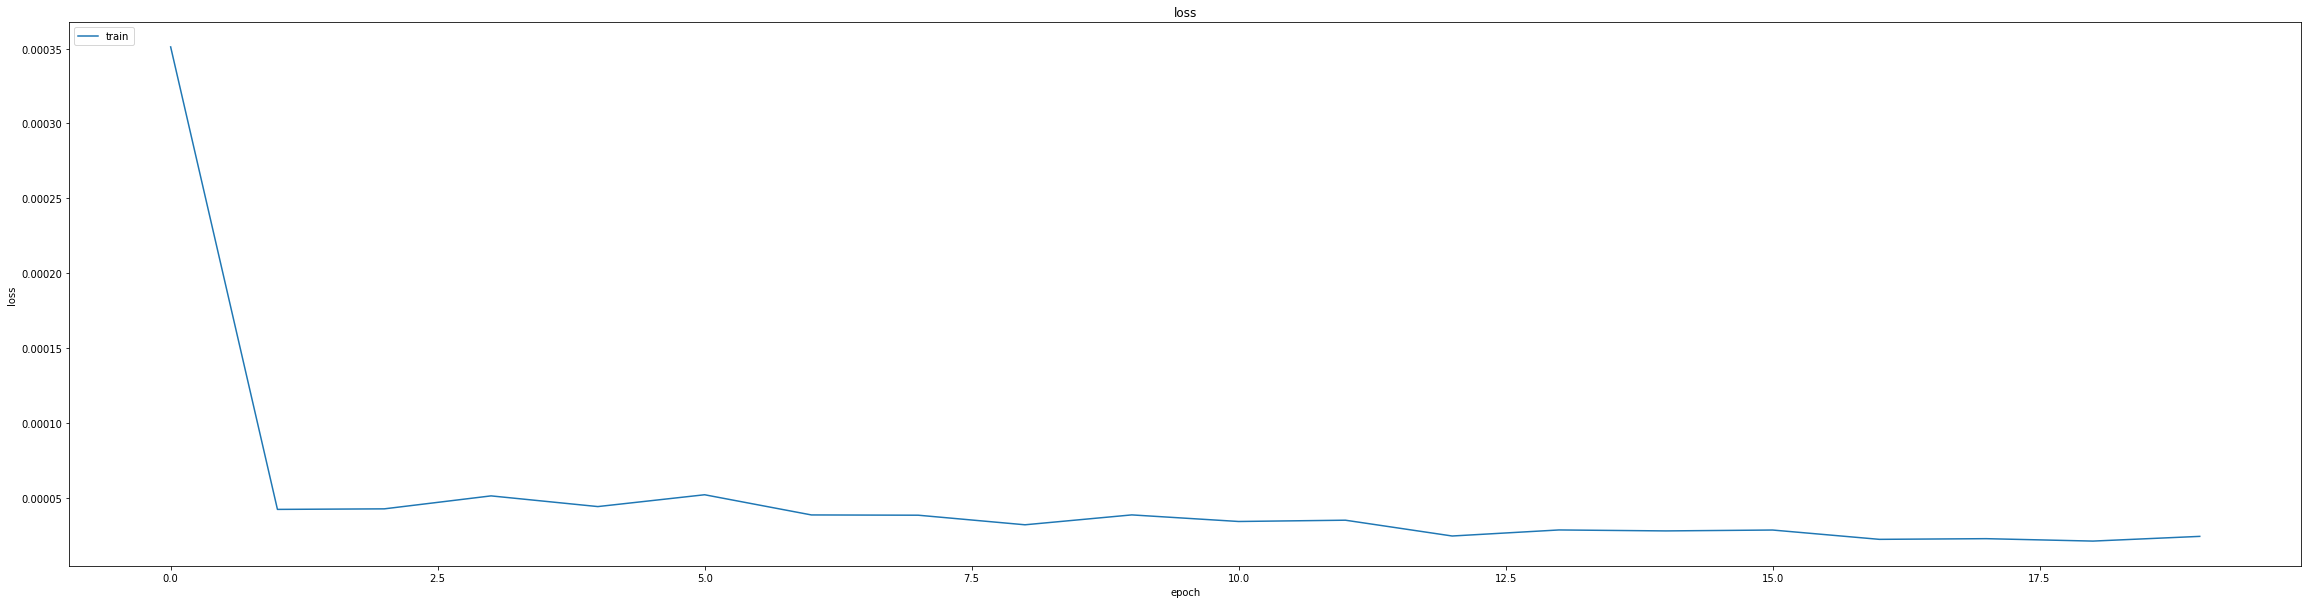

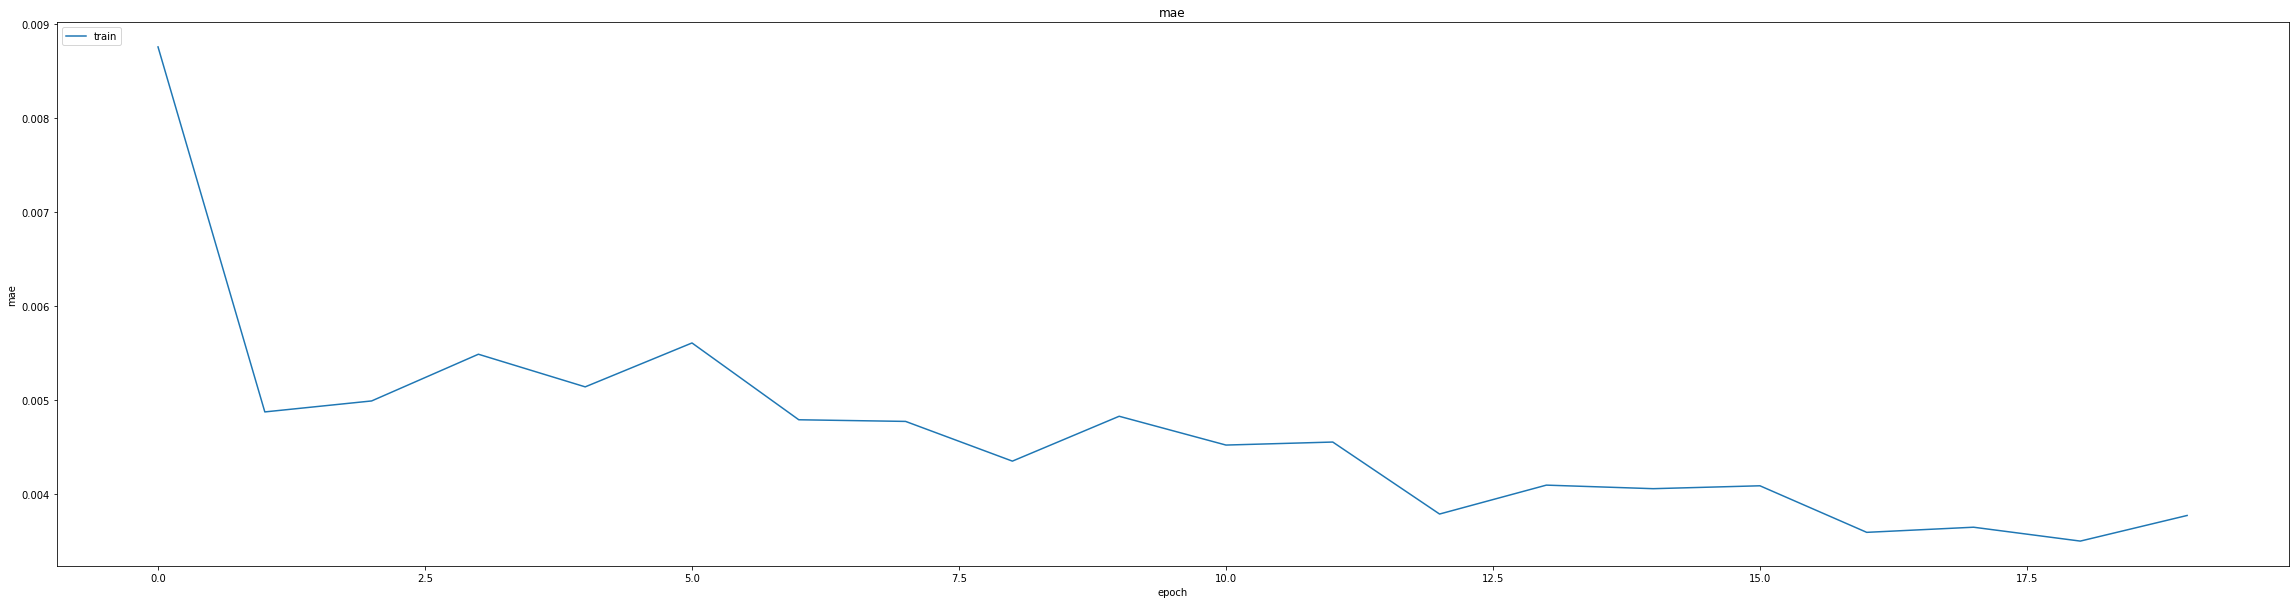

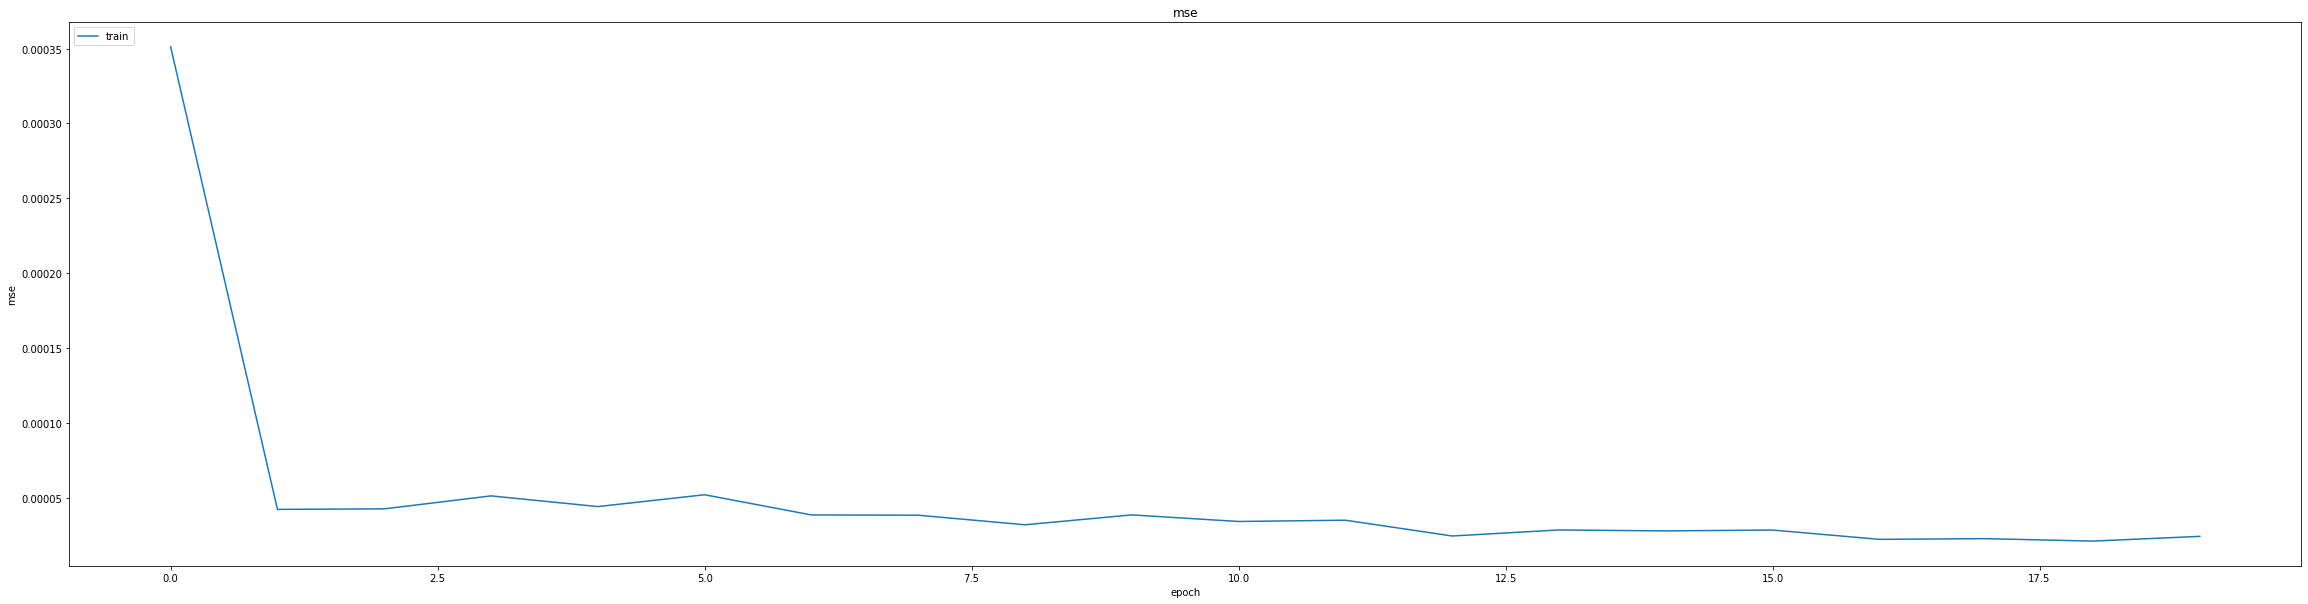

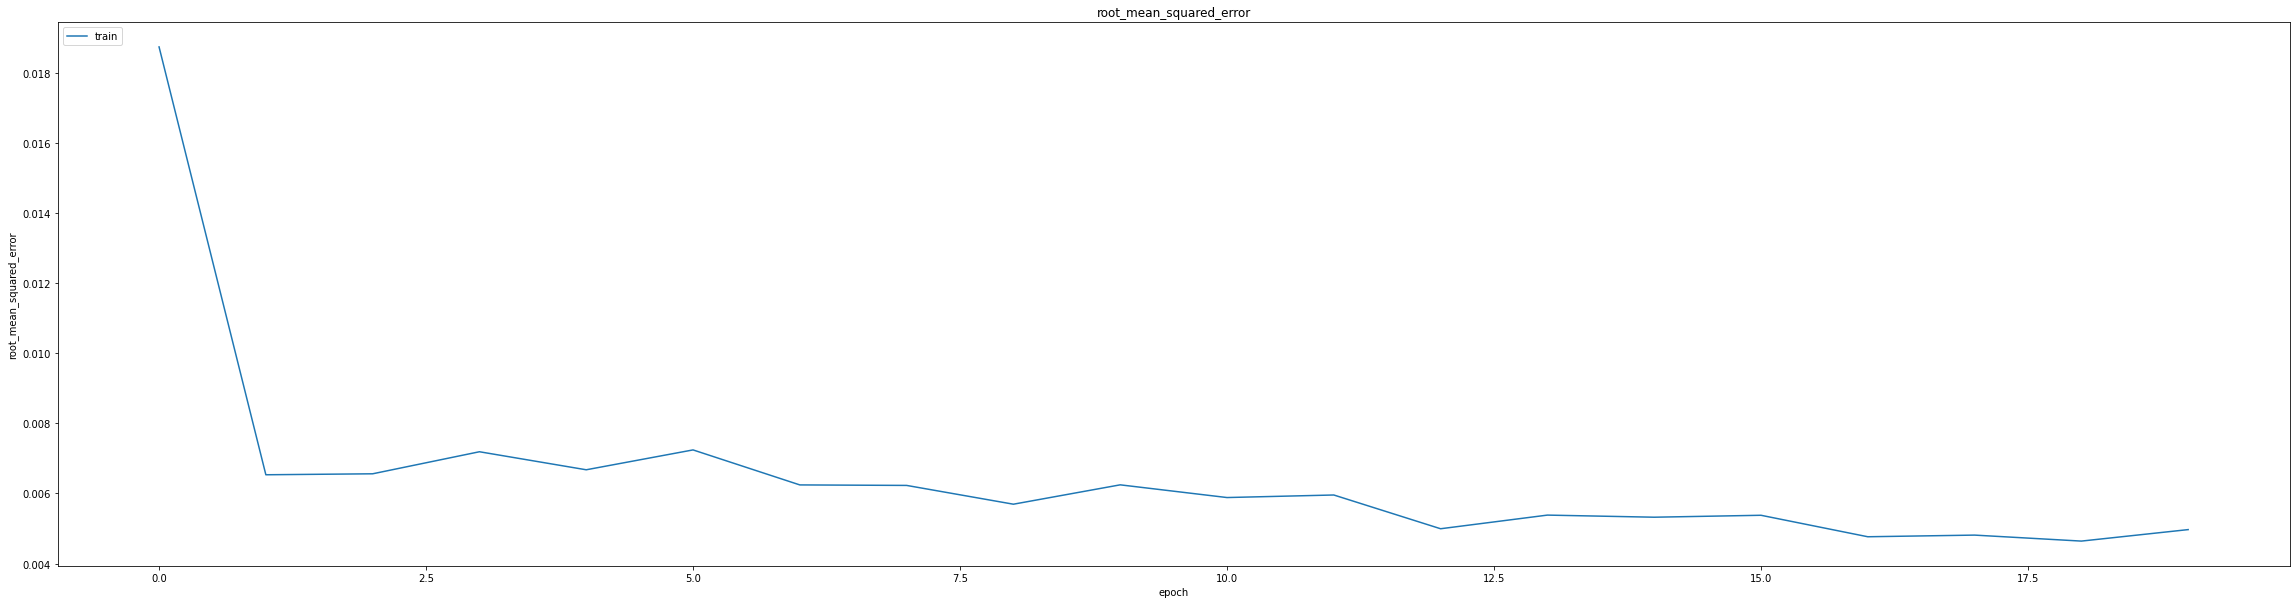

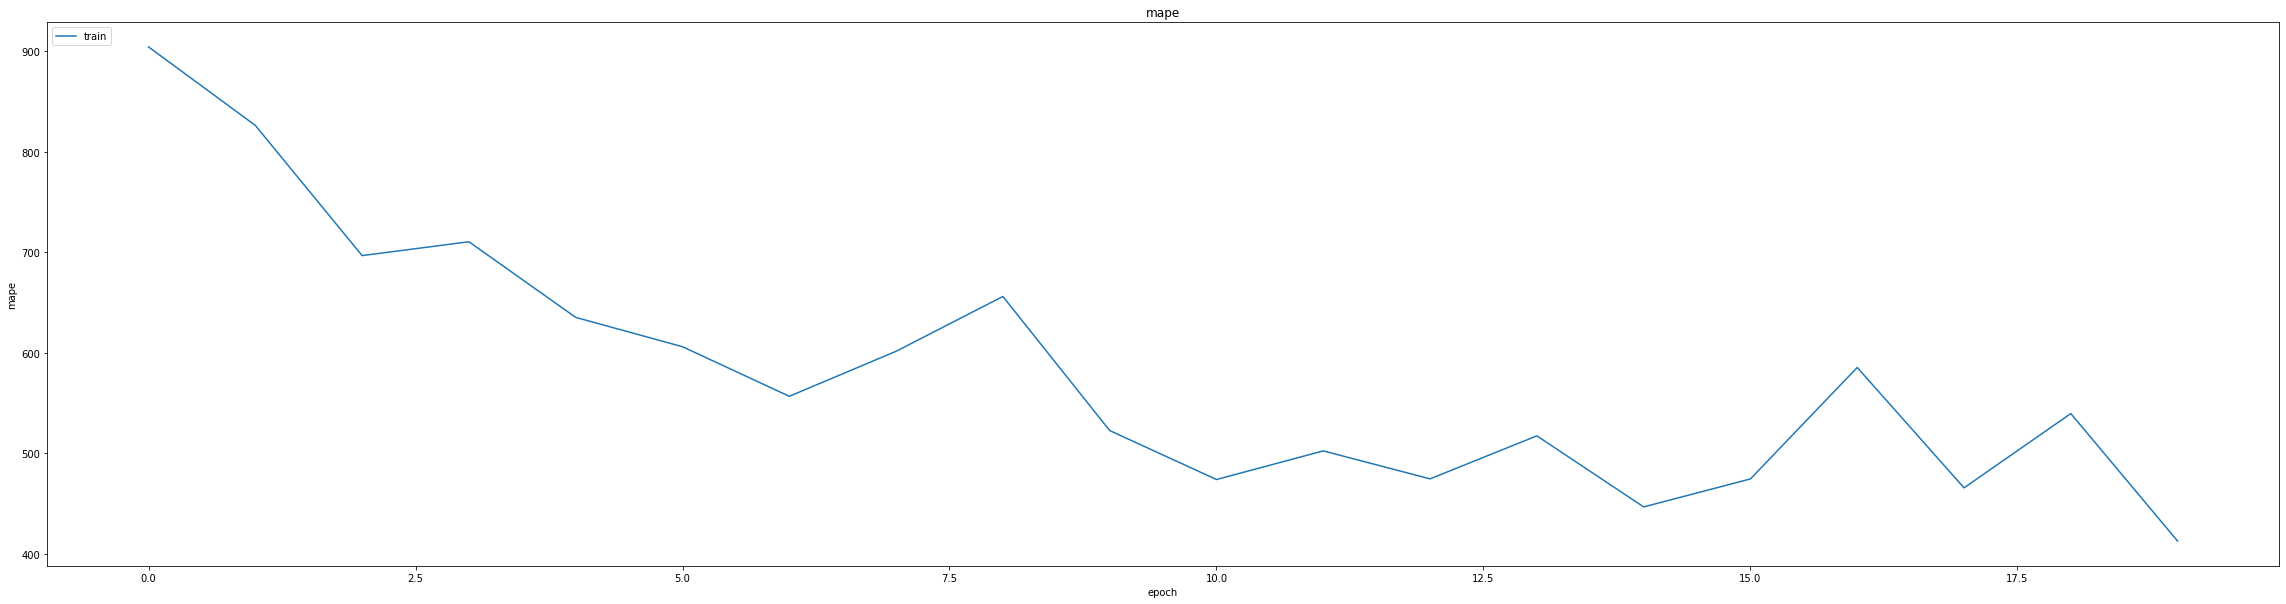

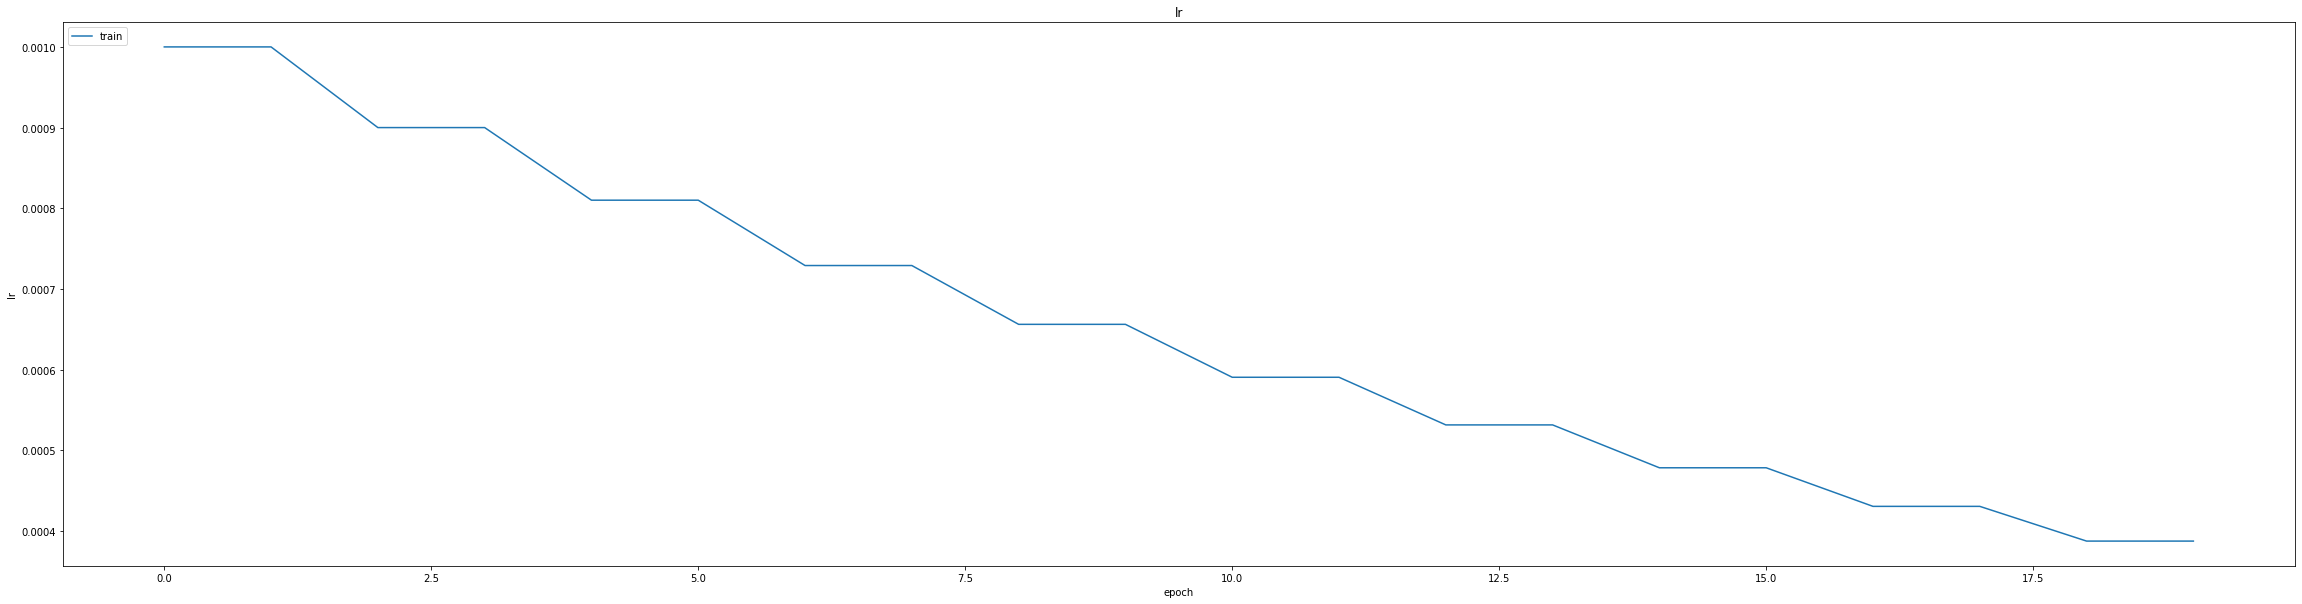

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005089855752885342
0.007346256636083126
348/348 [==============================] - 2s 4ms/step
0.9972843089224532


348/348 [==============================] - 1s 3ms/step


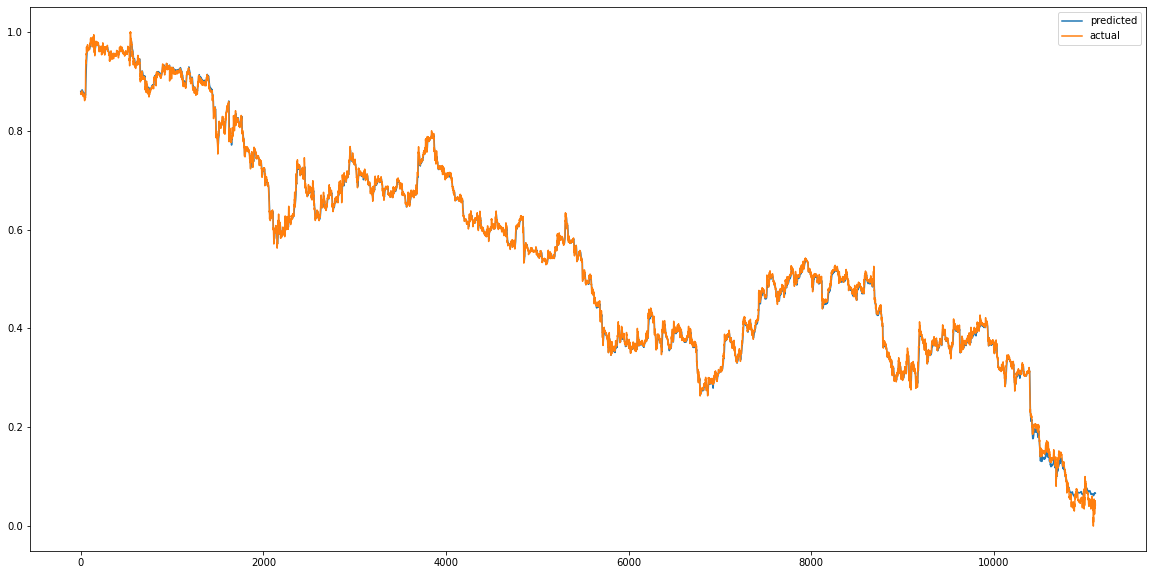

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


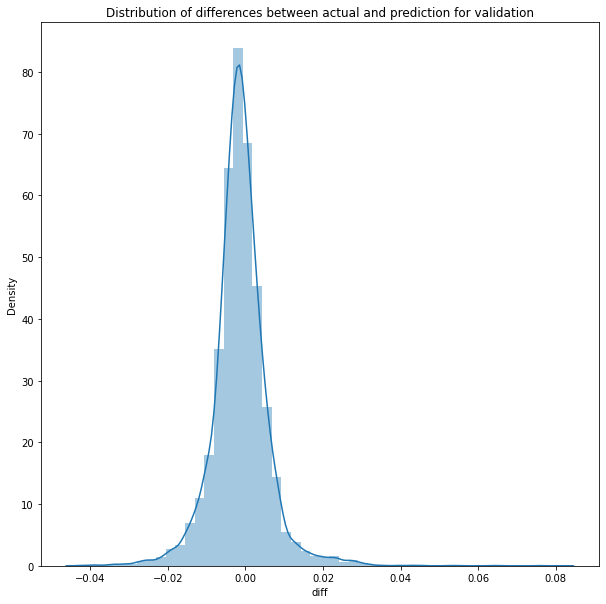

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 4ms/step


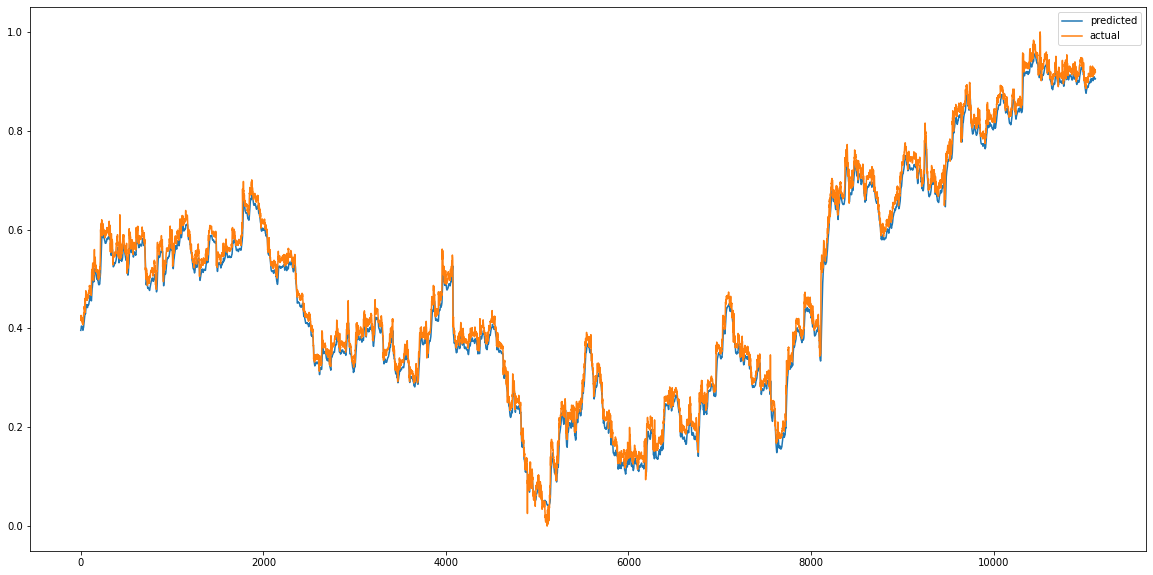

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


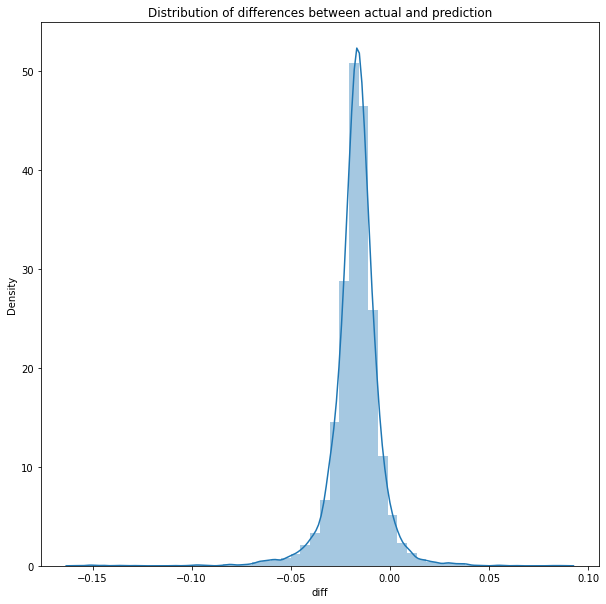

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0004368526699376856
RMSE :  0.02090102078697798
MAE :  0.017851105008774328
348/348 [==============================] - 1s 3ms/step
R2_Score  : 0.9917781190499407


count    11116.000000
mean        -0.016981
std          0.012186
min         -0.157620
25%         -0.021788
50%         -0.016462
75%         -0.011329
max          0.086970
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
404/406 [============================>.] - ETA: 0s - loss: 453.9741 - mae: 4.8897 - mse: 453.9741 - root_mean_squared_error: 21.3067 - mape: 41352.4336
Epoch 1: val_mse improved from inf to 0.05104, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 55s 112ms/step - loss: 451.7815 - mae: 4.8672 - mse: 451.7815 - root_mean_squared_error: 21.2552 - mape: 41153.0898 - val_loss: 0.0510 - val_mae: 0.1865 - val_mse: 0.0510 - val_root_mean_squared_error: 0.2259 - val_mape: 49166.5547
Epoch 2/75
404/406 [============================>.] - ETA: 0s - loss: 0.0642 - mae: 0.2183 - mse: 0.0642 - root_mean_squared_error: 0.2534 - mape: 10410.7412
Epoch 2: val_mse improved from 0.05104 to 0.05092, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 43s 106ms/step - loss: 0.0642 - mae: 0.2183 - mse: 0.0642 - root_mean_squared_error: 0.2534 - mape: 10360.7969 - val_loss: 0.0509 - val_mae: 0.1864 - val_mse: 0.0509 - val_root_mean_squared_error: 0.2257 - val_mape: 49223.4805
Epoch 3/75
406/406 [==============================] - ETA: 0s - loss: 0.0639 - mae: 0.2177 - mse: 0.0639 - root_mean_squared_error: 0.2527 - mape: 11737.7539
Epoch 3: val_mse improved from 0.05092 to 0.05081, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 44s 108ms/step - loss: 0.0639 - mae: 0.2177 - mse: 0.0639 - root_mean_squared_error: 0.2527 - mape: 11737.7539 - val_loss: 0.0508 - val_mae: 0.1862 - val_mse: 0.0508 - val_root_mean_squared_error: 0.2254 - val_mape: 49163.3945
Epoch 4/75
406/406 [==============================] - ETA: 0s - loss: 0.0638 - mae: 0.2173 - mse: 0.0638 - root_mean_squared_error: 0.2525 - mape: 10375.9082
Epoch 4: val_mse improved from 0.05081 to 0.05067, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 46s 113ms/step - loss: 0.0638 - mae: 0.2173 - mse: 0.0638 - root_mean_squared_error: 0.2525 - mape: 10375.9082 - val_loss: 0.0507 - val_mae: 0.1859 - val_mse: 0.0507 - val_root_mean_squared_error: 0.2251 - val_mape: 49053.0938
Epoch 5/75
406/406 [==============================] - ETA: 0s - loss: 0.0636 - mae: 0.2170 - mse: 0.0636 - root_mean_squared_error: 0.2521 - mape: 10691.8486
Epoch 5: val_mse improved from 0.05067 to 0.05056, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 44s 108ms/step - loss: 0.0636 - mae: 0.2170 - mse: 0.0636 - root_mean_squared_error: 0.2521 - mape: 10691.8486 - val_loss: 0.0506 - val_mae: 0.1856 - val_mse: 0.0506 - val_root_mean_squared_error: 0.2249 - val_mape: 48623.9297
Epoch 6/75
404/406 [============================>.] - ETA: 0s - loss: 0.0631 - mae: 0.2162 - mse: 0.0631 - root_mean_squared_error: 0.2512 - mape: 12320.3389
Epoch 6: val_mse improved from 0.05056 to 0.05035, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 44s 109ms/step - loss: 0.0631 - mae: 0.2162 - mse: 0.0631 - root_mean_squared_error: 0.2512 - mape: 12261.1846 - val_loss: 0.0503 - val_mae: 0.1852 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2244 - val_mape: 48431.5039
Epoch 7/75
406/406 [==============================] - ETA: 0s - loss: 0.0625 - mae: 0.2149 - mse: 0.0625 - root_mean_squared_error: 0.2499 - mape: 10960.7119
Epoch 7: val_mse improved from 0.05035 to 0.04996, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 51s 125ms/step - loss: 0.0625 - mae: 0.2149 - mse: 0.0625 - root_mean_squared_error: 0.2499 - mape: 10960.7119 - val_loss: 0.0500 - val_mae: 0.1844 - val_mse: 0.0500 - val_root_mean_squared_error: 0.2235 - val_mape: 48040.1484
Epoch 8/75
404/406 [============================>.] - ETA: 0s - loss: 0.0606 - mae: 0.2114 - mse: 0.0606 - root_mean_squared_error: 0.2462 - mape: 10912.1865
Epoch 8: val_mse improved from 0.04996 to 0.04799, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 50s 124ms/step - loss: 0.0606 - mae: 0.2114 - mse: 0.0606 - root_mean_squared_error: 0.2462 - mape: 10859.8330 - val_loss: 0.0480 - val_mae: 0.1816 - val_mse: 0.0480 - val_root_mean_squared_error: 0.2191 - val_mape: 47800.4727
Epoch 9/75
404/406 [============================>.] - ETA: 0s - loss: 0.0551 - mae: 0.2006 - mse: 0.0551 - root_mean_squared_error: 0.2347 - mape: 9749.1699
Epoch 9: val_mse improved from 0.04799 to 0.04368, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 46s 114ms/step - loss: 0.0551 - mae: 0.2006 - mse: 0.0551 - root_mean_squared_error: 0.2347 - mape: 9702.4346 - val_loss: 0.0437 - val_mae: 0.1735 - val_mse: 0.0437 - val_root_mean_squared_error: 0.2090 - val_mape: 46099.5781
Epoch 10/75
406/406 [==============================] - ETA: 0s - loss: 0.0452 - mae: 0.1788 - mse: 0.0452 - root_mean_squared_error: 0.2125 - mape: 9048.8936
Epoch 10: val_mse improved from 0.04368 to 0.03057, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 45s 111ms/step - loss: 0.0452 - mae: 0.1788 - mse: 0.0452 - root_mean_squared_error: 0.2125 - mape: 9048.8936 - val_loss: 0.0306 - val_mae: 0.1424 - val_mse: 0.0306 - val_root_mean_squared_error: 0.1748 - val_mape: 40509.6406
Epoch 11/75
406/406 [==============================] - ETA: 0s - loss: 0.0191 - mae: 0.1081 - mse: 0.0191 - root_mean_squared_error: 0.1383 - mape: 8685.1719
Epoch 11: val_mse improved from 0.03057 to 0.00425, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 44s 108ms/step - loss: 0.0191 - mae: 0.1081 - mse: 0.0191 - root_mean_squared_error: 0.1383 - mape: 8685.1719 - val_loss: 0.0043 - val_mae: 0.0455 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0652 - val_mape: 23171.6465
Epoch 12/75
404/406 [============================>.] - ETA: 0s - loss: 0.0084 - mae: 0.0727 - mse: 0.0084 - root_mean_squared_error: 0.0915 - mape: 4644.8628
Epoch 12: val_mse improved from 0.00425 to 0.00255, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 43s 107ms/step - loss: 0.0084 - mae: 0.0727 - mse: 0.0084 - root_mean_squared_error: 0.0915 - mape: 4622.5366 - val_loss: 0.0026 - val_mae: 0.0372 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0505 - val_mape: 19163.3145
Epoch 13/75
406/406 [==============================] - ETA: 0s - loss: 0.0068 - mae: 0.0656 - mse: 0.0068 - root_mean_squared_error: 0.0822 - mape: 4727.6577
Epoch 13: val_mse improved from 0.00255 to 0.00210, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 44s 109ms/step - loss: 0.0068 - mae: 0.0656 - mse: 0.0068 - root_mean_squared_error: 0.0822 - mape: 4727.6577 - val_loss: 0.0021 - val_mae: 0.0335 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0458 - val_mape: 18215.3652
Epoch 14/75
406/406 [==============================] - ETA: 0s - loss: 0.0060 - mae: 0.0617 - mse: 0.0060 - root_mean_squared_error: 0.0773 - mape: 3721.6873
Epoch 14: val_mse improved from 0.00210 to 0.00180, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 44s 108ms/step - loss: 0.0060 - mae: 0.0617 - mse: 0.0060 - root_mean_squared_error: 0.0773 - mape: 3721.6873 - val_loss: 0.0018 - val_mae: 0.0295 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0424 - val_mape: 17067.7598
Epoch 15/75
406/406 [==============================] - ETA: 0s - loss: 0.0052 - mae: 0.0578 - mse: 0.0052 - root_mean_squared_error: 0.0723 - mape: 3649.0244
Epoch 15: val_mse improved from 0.00180 to 0.00154, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 44s 108ms/step - loss: 0.0052 - mae: 0.0578 - mse: 0.0052 - root_mean_squared_error: 0.0723 - mape: 3649.0244 - val_loss: 0.0015 - val_mae: 0.0273 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0392 - val_mape: 16156.6318
Epoch 16/75
405/406 [============================>.] - ETA: 0s - loss: 0.0046 - mae: 0.0540 - mse: 0.0046 - root_mean_squared_error: 0.0677 - mape: 4651.9438
Epoch 16: val_mse improved from 0.00154 to 0.00125, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 45s 110ms/step - loss: 0.0046 - mae: 0.0540 - mse: 0.0046 - root_mean_squared_error: 0.0677 - mape: 4640.9761 - val_loss: 0.0012 - val_mae: 0.0251 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0353 - val_mape: 15192.6885
Epoch 17/75
406/406 [==============================] - ETA: 0s - loss: 0.0041 - mae: 0.0510 - mse: 0.0041 - root_mean_squared_error: 0.0641 - mape: 3750.2061
Epoch 17: val_mse improved from 0.00125 to 0.00120, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 44s 108ms/step - loss: 0.0041 - mae: 0.0510 - mse: 0.0041 - root_mean_squared_error: 0.0641 - mape: 3750.2061 - val_loss: 0.0012 - val_mae: 0.0252 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0346 - val_mape: 14443.5977
Epoch 18/75
405/406 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0484 - mse: 0.0037 - root_mean_squared_error: 0.0609 - mape: 3080.6880
Epoch 18: val_mse improved from 0.00120 to 0.00112, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 43s 106ms/step - loss: 0.0037 - mae: 0.0484 - mse: 0.0037 - root_mean_squared_error: 0.0609 - mape: 3073.4236 - val_loss: 0.0011 - val_mae: 0.0238 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0334 - val_mape: 13817.5195
Epoch 19/75
405/406 [============================>.] - ETA: 0s - loss: 0.0034 - mae: 0.0459 - mse: 0.0034 - root_mean_squared_error: 0.0579 - mape: 3164.5454
Epoch 19: val_mse improved from 0.00112 to 0.00107, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 45s 111ms/step - loss: 0.0034 - mae: 0.0459 - mse: 0.0034 - root_mean_squared_error: 0.0579 - mape: 3157.0806 - val_loss: 0.0011 - val_mae: 0.0244 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 13680.5518
Epoch 20/75
404/406 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0433 - mse: 0.0030 - root_mean_squared_error: 0.0545 - mape: 2801.7456
Epoch 20: val_mse improved from 0.00107 to 0.00104, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 44s 107ms/step - loss: 0.0030 - mae: 0.0432 - mse: 0.0030 - root_mean_squared_error: 0.0545 - mape: 2788.2642 - val_loss: 0.0010 - val_mae: 0.0249 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0323 - val_mape: 13265.6631
Epoch 21/75
404/406 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0416 - mse: 0.0028 - root_mean_squared_error: 0.0525 - mape: 2984.5015
Epoch 21: val_mse did not improve from 0.00104
406/406 [==============================] - 9s 22ms/step - loss: 0.0028 - mae: 0.0416 - mse: 0.0028 - root_mean_squared_error: 0.0525 - mape: 2970.1321 - val_loss: 0.0012 - val_mae: 0.0280 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0353 - val_mape: 12500.7881
Epoch 22/75
406/406 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0388 - mse: 0.0024 - root_mean_squared_error: 0.0492 - mape: 2652.6082
Epoch 22: val_mse improved from 0.00104 to 0.00082, saving model to /content/drive/MyDrive/modelweigh

406/406 [==============================] - 44s 109ms/step - loss: 0.0024 - mae: 0.0388 - mse: 0.0024 - root_mean_squared_error: 0.0492 - mape: 2652.6082 - val_loss: 8.1737e-04 - val_mae: 0.0208 - val_mse: 8.1737e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 12576.2012
Epoch 23/75
406/406 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0374 - mse: 0.0022 - root_mean_squared_error: 0.0474 - mape: 3086.6816
Epoch 23: val_mse did not improve from 0.00082
406/406 [==============================] - 9s 22ms/step - loss: 0.0022 - mae: 0.0374 - mse: 0.0022 - root_mean_squared_error: 0.0474 - mape: 3086.6816 - val_loss: 8.8956e-04 - val_mae: 0.0222 - val_mse: 8.8956e-04 - val_root_mean_squared_error: 0.0298 - val_mape: 12236.6172
Epoch 24/75
406/406 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0355 - mse: 0.0020 - root_mean_squared_error: 0.0450 - mape: 3218.1907
Epoch 24: val_mse improved from 0.00082 to 0.00078, saving model to /content/drive/My

406/406 [==============================] - 44s 108ms/step - loss: 0.0020 - mae: 0.0355 - mse: 0.0020 - root_mean_squared_error: 0.0450 - mape: 3218.1907 - val_loss: 7.7638e-04 - val_mae: 0.0215 - val_mse: 7.7638e-04 - val_root_mean_squared_error: 0.0279 - val_mape: 12183.0107
Epoch 25/75
406/406 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0332 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 2717.9343
Epoch 25: val_mse improved from 0.00078 to 0.00064, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 44s 107ms/step - loss: 0.0018 - mae: 0.0332 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 2717.9343 - val_loss: 6.4190e-04 - val_mae: 0.0186 - val_mse: 6.4190e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 11999.6123
Epoch 26/75
404/406 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0309 - mse: 0.0015 - root_mean_squared_error: 0.0393 - mape: 2329.8372
Epoch 26: val_mse improved from 0.00064 to 0.00051, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 45s 112ms/step - loss: 0.0015 - mae: 0.0309 - mse: 0.0015 - root_mean_squared_error: 0.0393 - mape: 2318.6165 - val_loss: 5.0580e-04 - val_mae: 0.0155 - val_mse: 5.0580e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 11585.7754
Epoch 27/75
404/406 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0299 - mse: 0.0014 - root_mean_squared_error: 0.0380 - mape: 2293.2664
Epoch 27: val_mse did not improve from 0.00051
406/406 [==============================] - 9s 23ms/step - loss: 0.0014 - mae: 0.0299 - mse: 0.0014 - root_mean_squared_error: 0.0380 - mape: 2282.2339 - val_loss: 6.0944e-04 - val_mae: 0.0184 - val_mse: 6.0944e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 11573.6084
Epoch 28/75
405/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0284 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 2611.8518
Epoch 28: val_mse improved from 0.00051 to 0.00047, saving model to /content/drive/My

406/406 [==============================] - 43s 107ms/step - loss: 0.0013 - mae: 0.0284 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 2605.6868 - val_loss: 4.6610e-04 - val_mae: 0.0151 - val_mse: 4.6610e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 11249.6680
Epoch 29/75
405/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0262 - mse: 0.0011 - root_mean_squared_error: 0.0334 - mape: 2760.7009
Epoch 29: val_mse did not improve from 0.00047
406/406 [==============================] - 9s 22ms/step - loss: 0.0011 - mae: 0.0262 - mse: 0.0011 - root_mean_squared_error: 0.0334 - mape: 2754.1785 - val_loss: 5.5305e-04 - val_mae: 0.0169 - val_mse: 5.5305e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 10988.1299
Epoch 30/75
404/406 [============================>.] - ETA: 0s - loss: 9.7259e-04 - mae: 0.0245 - mse: 9.7259e-04 - root_mean_squared_error: 0.0312 - mape: 2178.9463
Epoch 30: val_mse did not improve from 0.00047
406/406 [=====================

406/406 [==============================] - 45s 110ms/step - loss: 7.5781e-04 - mae: 0.0215 - mse: 7.5781e-04 - root_mean_squared_error: 0.0275 - mape: 2187.8640 - val_loss: 3.6626e-04 - val_mae: 0.0137 - val_mse: 3.6626e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 10091.8662
Epoch 33/75
406/406 [==============================] - ETA: 0s - loss: 7.2029e-04 - mae: 0.0210 - mse: 7.2029e-04 - root_mean_squared_error: 0.0268 - mape: 2236.9885
Epoch 33: val_mse did not improve from 0.00037
406/406 [==============================] - 9s 22ms/step - loss: 7.2029e-04 - mae: 0.0210 - mse: 7.2029e-04 - root_mean_squared_error: 0.0268 - mape: 2236.9885 - val_loss: 4.4367e-04 - val_mae: 0.0160 - val_mse: 4.4367e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 9951.5146
Epoch 34/75
406/406 [==============================] - ETA: 0s - loss: 5.8811e-04 - mae: 0.0190 - mse: 5.8811e-04 - root_mean_squared_error: 0.0243 - mape: 2231.5212
Epoch 34: val_mse did not improve from 0.00037
406/406

406/406 [==============================] - 43s 107ms/step - loss: 4.7100e-04 - mae: 0.0170 - mse: 4.7100e-04 - root_mean_squared_error: 0.0217 - mape: 1970.9227 - val_loss: 3.3254e-04 - val_mae: 0.0132 - val_mse: 3.3254e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 8912.7920
Epoch 37/75
406/406 [==============================] - ETA: 0s - loss: 4.1832e-04 - mae: 0.0160 - mse: 4.1832e-04 - root_mean_squared_error: 0.0205 - mape: 1816.9718
Epoch 37: val_mse did not improve from 0.00033
406/406 [==============================] - 9s 22ms/step - loss: 4.1832e-04 - mae: 0.0160 - mse: 4.1832e-04 - root_mean_squared_error: 0.0205 - mape: 1816.9718 - val_loss: 4.8610e-04 - val_mae: 0.0174 - val_mse: 4.8610e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 9072.8496
Epoch 38/75
405/406 [============================>.] - ETA: 0s - loss: 3.8072e-04 - mae: 0.0153 - mse: 3.8072e-04 - root_mean_squared_error: 0.0195 - mape: 1930.4088
Epoch 38: val_mse improved from 0.00033 to 0.00028, sav

406/406 [==============================] - 43s 106ms/step - loss: 3.8078e-04 - mae: 0.0153 - mse: 3.8078e-04 - root_mean_squared_error: 0.0195 - mape: 1925.8474 - val_loss: 2.7773e-04 - val_mae: 0.0120 - val_mse: 2.7773e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 9161.9375
Epoch 39/75
404/406 [============================>.] - ETA: 0s - loss: 3.4523e-04 - mae: 0.0146 - mse: 3.4523e-04 - root_mean_squared_error: 0.0186 - mape: 1917.0597
Epoch 39: val_mse did not improve from 0.00028
406/406 [==============================] - 10s 25ms/step - loss: 3.4526e-04 - mae: 0.0146 - mse: 3.4526e-04 - root_mean_squared_error: 0.0186 - mape: 1907.8180 - val_loss: 2.9424e-04 - val_mae: 0.0131 - val_mse: 2.9424e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 8842.8916
Epoch 40/75
405/406 [============================>.] - ETA: 0s - loss: 3.1439e-04 - mae: 0.0139 - mse: 3.1439e-04 - root_mean_squared_error: 0.0177 - mape: 1671.0062
Epoch 40: val_mse did not improve from 0.00028
406/406

406/406 [==============================] - 43s 106ms/step - loss: 2.9869e-04 - mae: 0.0135 - mse: 2.9869e-04 - root_mean_squared_error: 0.0173 - mape: 1627.3351 - val_loss: 2.6543e-04 - val_mae: 0.0117 - val_mse: 2.6543e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 8434.6748
Epoch 42/75
406/406 [==============================] - ETA: 0s - loss: 2.5432e-04 - mae: 0.0124 - mse: 2.5432e-04 - root_mean_squared_error: 0.0159 - mape: 1595.6403
Epoch 42: val_mse improved from 0.00027 to 0.00022, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 43s 106ms/step - loss: 2.5432e-04 - mae: 0.0124 - mse: 2.5432e-04 - root_mean_squared_error: 0.0159 - mape: 1595.6403 - val_loss: 2.1740e-04 - val_mae: 0.0112 - val_mse: 2.1740e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 8097.3857
Epoch 43/75
406/406 [==============================] - ETA: 0s - loss: 2.3078e-04 - mae: 0.0118 - mse: 2.3078e-04 - root_mean_squared_error: 0.0152 - mape: 1674.7985
Epoch 43: val_mse did not improve from 0.00022
406/406 [==============================] - 9s 22ms/step - loss: 2.3078e-04 - mae: 0.0118 - mse: 2.3078e-04 - root_mean_squared_error: 0.0152 - mape: 1674.7985 - val_loss: 3.3756e-04 - val_mae: 0.0158 - val_mse: 3.3756e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 7762.8423
Epoch 44/75
406/406 [==============================] - ETA: 0s - loss: 2.1032e-04 - mae: 0.0113 - mse: 2.1032e-04 - root_mean_squared_error: 0.0145 - mape: 1685.2587
Epoch 44: val_mse did not improve from 0.00022
406/406 

406/406 [==============================] - 43s 107ms/step - loss: 2.3919e-04 - mae: 0.0120 - mse: 2.3919e-04 - root_mean_squared_error: 0.0155 - mape: 1677.0011 - val_loss: 1.7098e-04 - val_mae: 0.0089 - val_mse: 1.7098e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 7931.4053
Epoch 46/75
404/406 [============================>.] - ETA: 0s - loss: 2.1872e-04 - mae: 0.0115 - mse: 2.1872e-04 - root_mean_squared_error: 0.0148 - mape: 1545.1354
Epoch 46: val_mse did not improve from 0.00017
406/406 [==============================] - 9s 22ms/step - loss: 2.1917e-04 - mae: 0.0115 - mse: 2.1917e-04 - root_mean_squared_error: 0.0148 - mape: 1537.7164 - val_loss: 4.3504e-04 - val_mae: 0.0186 - val_mse: 4.3504e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 7383.3003
Epoch 47/75
404/406 [============================>.] - ETA: 0s - loss: 1.7701e-04 - mae: 0.0103 - mse: 1.7701e-04 - root_mean_squared_error: 0.0133 - mape: 1586.2494
Epoch 47: val_mse did not improve from 0.00017
406/406 

406/406 [==============================] - 43s 105ms/step - loss: 1.8647e-04 - mae: 0.0106 - mse: 1.8647e-04 - root_mean_squared_error: 0.0137 - mape: 1350.5540 - val_loss: 1.1926e-04 - val_mae: 0.0085 - val_mse: 1.1926e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 6705.4590
Epoch 50/75
404/406 [============================>.] - ETA: 0s - loss: 2.3314e-04 - mae: 0.0114 - mse: 2.3314e-04 - root_mean_squared_error: 0.0153 - mape: 1336.0522
Epoch 50: val_mse did not improve from 0.00012
406/406 [==============================] - 9s 21ms/step - loss: 2.3263e-04 - mae: 0.0114 - mse: 2.3263e-04 - root_mean_squared_error: 0.0153 - mape: 1329.6084 - val_loss: 2.5278e-04 - val_mae: 0.0138 - val_mse: 2.5278e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 7182.2178
Epoch 51/75
405/406 [============================>.] - ETA: 0s - loss: 1.1461e-04 - mae: 0.0083 - mse: 1.1461e-04 - root_mean_squared_error: 0.0107 - mape: 1336.2820
Epoch 51: val_mse did not improve from 0.00012
406/406 

406/406 [==============================] - 42s 105ms/step - loss: 1.4509e-04 - mae: 0.0093 - mse: 1.4509e-04 - root_mean_squared_error: 0.0120 - mape: 1039.5548 - val_loss: 9.0875e-05 - val_mae: 0.0073 - val_mse: 9.0875e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 5310.8369
Epoch 59/75
404/406 [============================>.] - ETA: 0s - loss: 9.0203e-05 - mae: 0.0074 - mse: 9.0203e-05 - root_mean_squared_error: 0.0095 - mape: 1052.4746
Epoch 59: val_mse did not improve from 0.00009
406/406 [==============================] - 8s 21ms/step - loss: 9.0023e-05 - mae: 0.0074 - mse: 9.0023e-05 - root_mean_squared_error: 0.0095 - mape: 1047.3978 - val_loss: 2.2455e-04 - val_mae: 0.0139 - val_mse: 2.2455e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 4639.5254
Epoch 60/75
406/406 [==============================] - ETA: 0s - loss: 9.4925e-05 - mae: 0.0075 - mse: 9.4925e-05 - root_mean_squared_error: 0.0097 - mape: 938.1569
Epoch 60: val_mse did not improve from 0.00009
406/406 [

406/406 [==============================] - 44s 108ms/step - loss: 7.6442e-05 - mae: 0.0067 - mse: 7.6442e-05 - root_mean_squared_error: 0.0087 - mape: 877.8802 - val_loss: 7.2772e-05 - val_mae: 0.0071 - val_mse: 7.2772e-05 - val_root_mean_squared_error: 0.0085 - val_mape: 4212.2598
Epoch 65/75
405/406 [============================>.] - ETA: 0s - loss: 8.4445e-05 - mae: 0.0071 - mse: 8.4445e-05 - root_mean_squared_error: 0.0092 - mape: 1.9147
Epoch 65: val_mse did not improve from 0.00007
406/406 [==============================] - 8s 21ms/step - loss: 8.4439e-05 - mae: 0.0071 - mse: 8.4439e-05 - root_mean_squared_error: 0.0092 - mape: 813.8597 - val_loss: 4.2209e-04 - val_mae: 0.0195 - val_mse: 4.2209e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 3698.6345
Epoch 66/75
405/406 [============================>.] - ETA: 0s - loss: 8.1913e-05 - mae: 0.0070 - mse: 8.1913e-05 - root_mean_squared_error: 0.0091 - mape: 760.3096
Epoch 66: val_mse did not improve from 0.00007
406/406 [=====

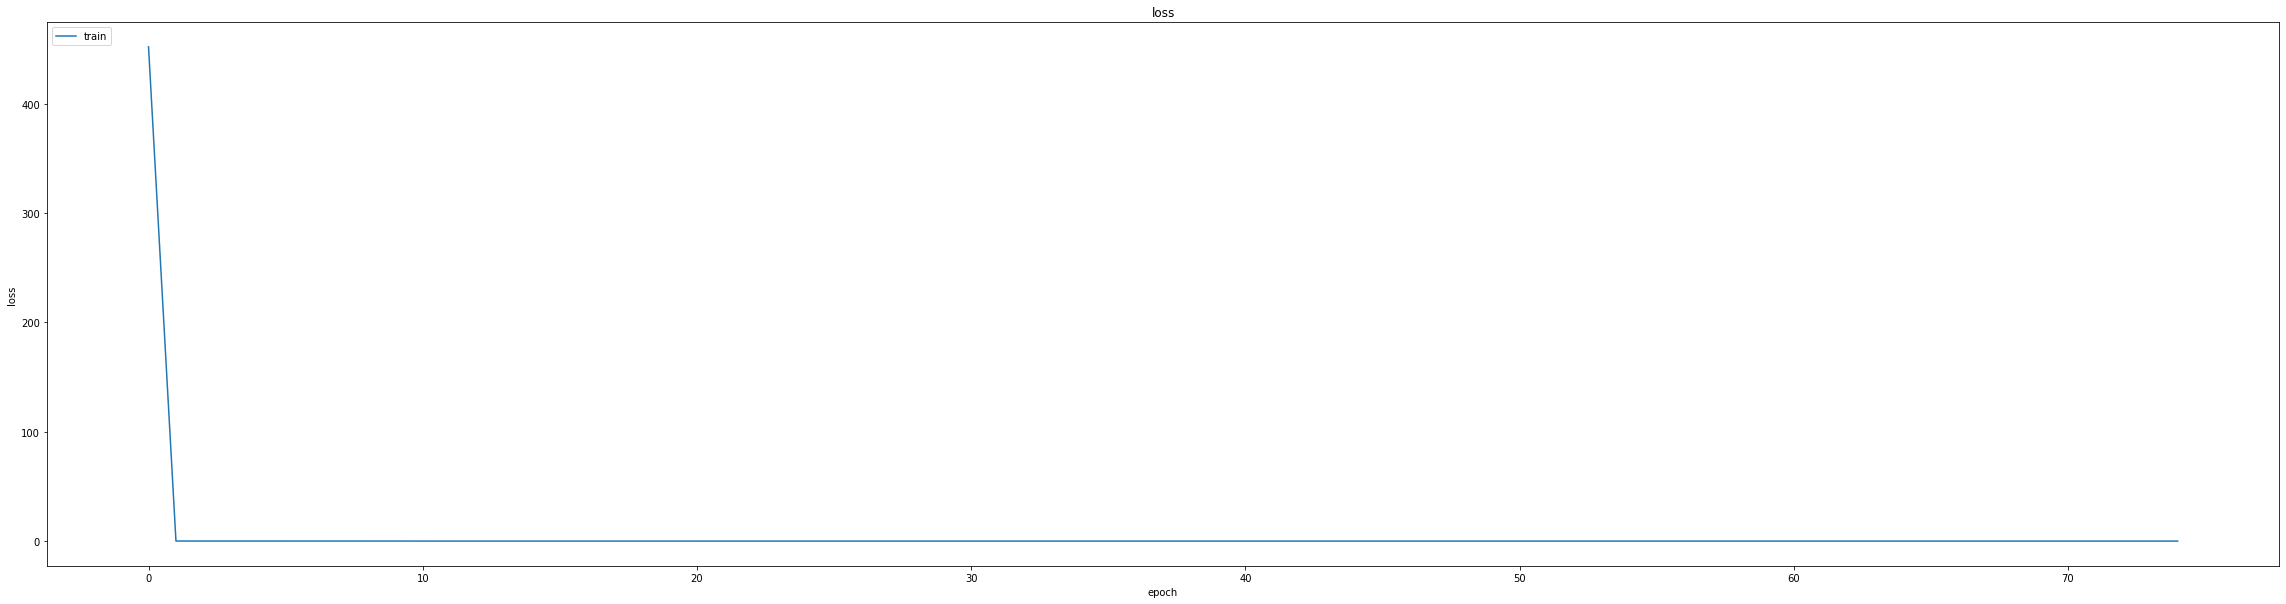

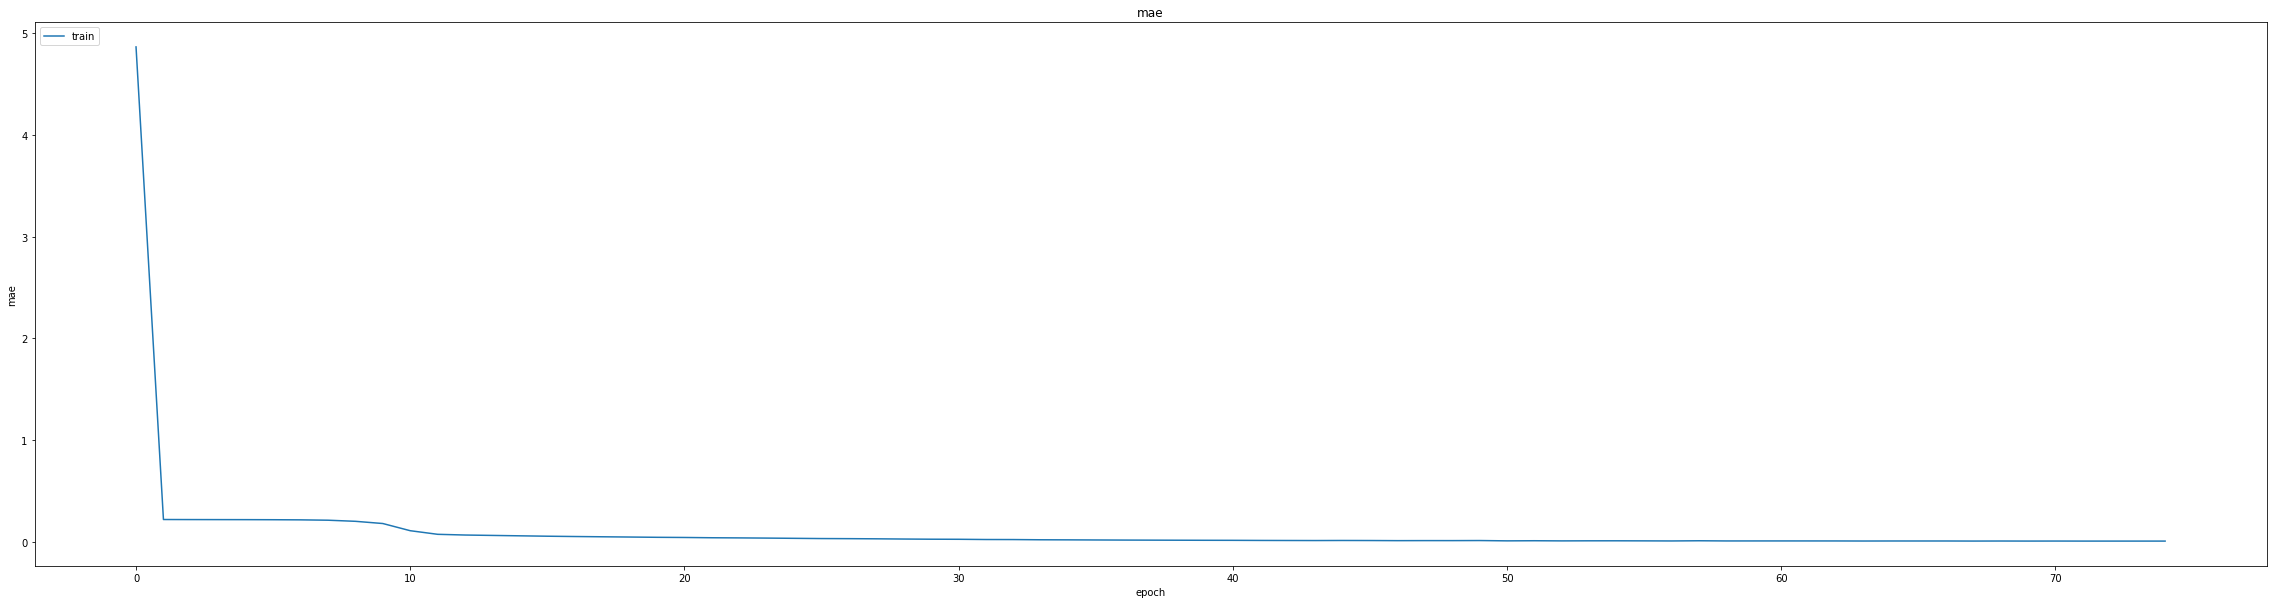

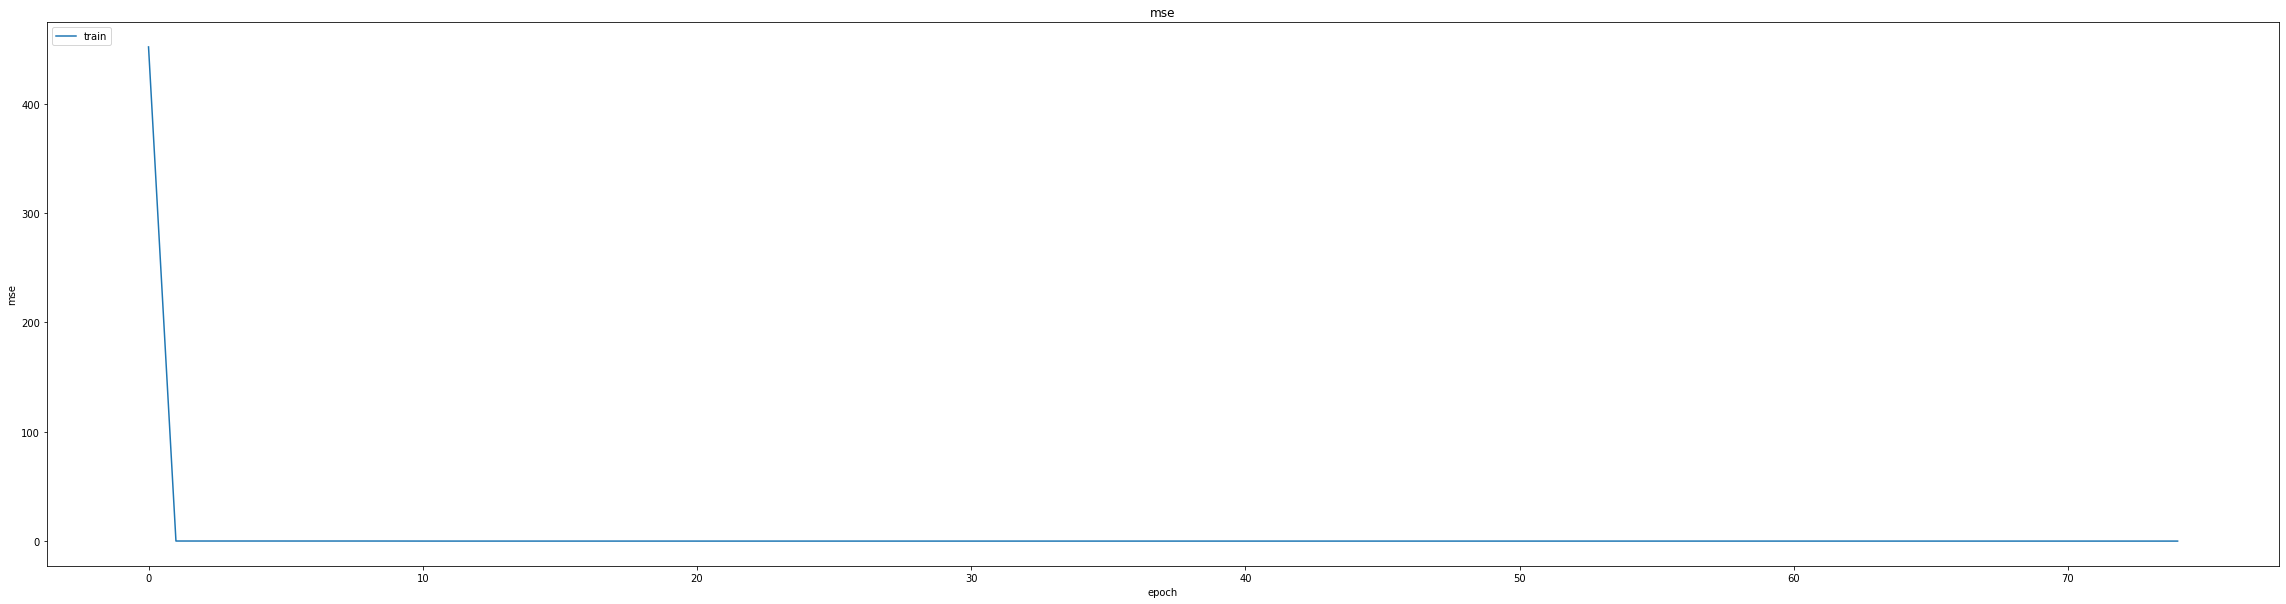

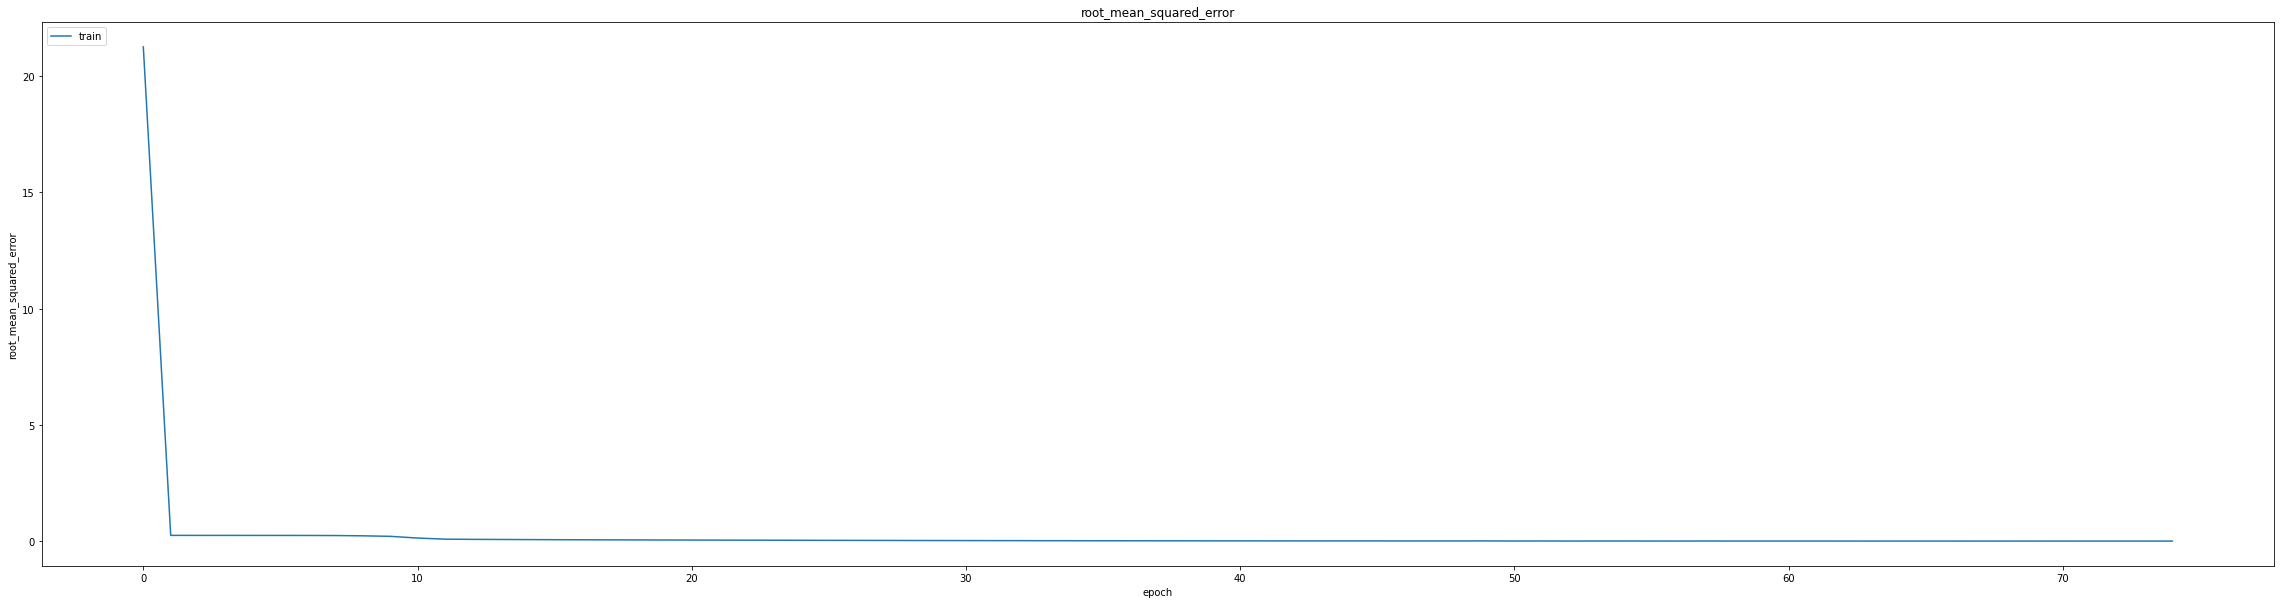

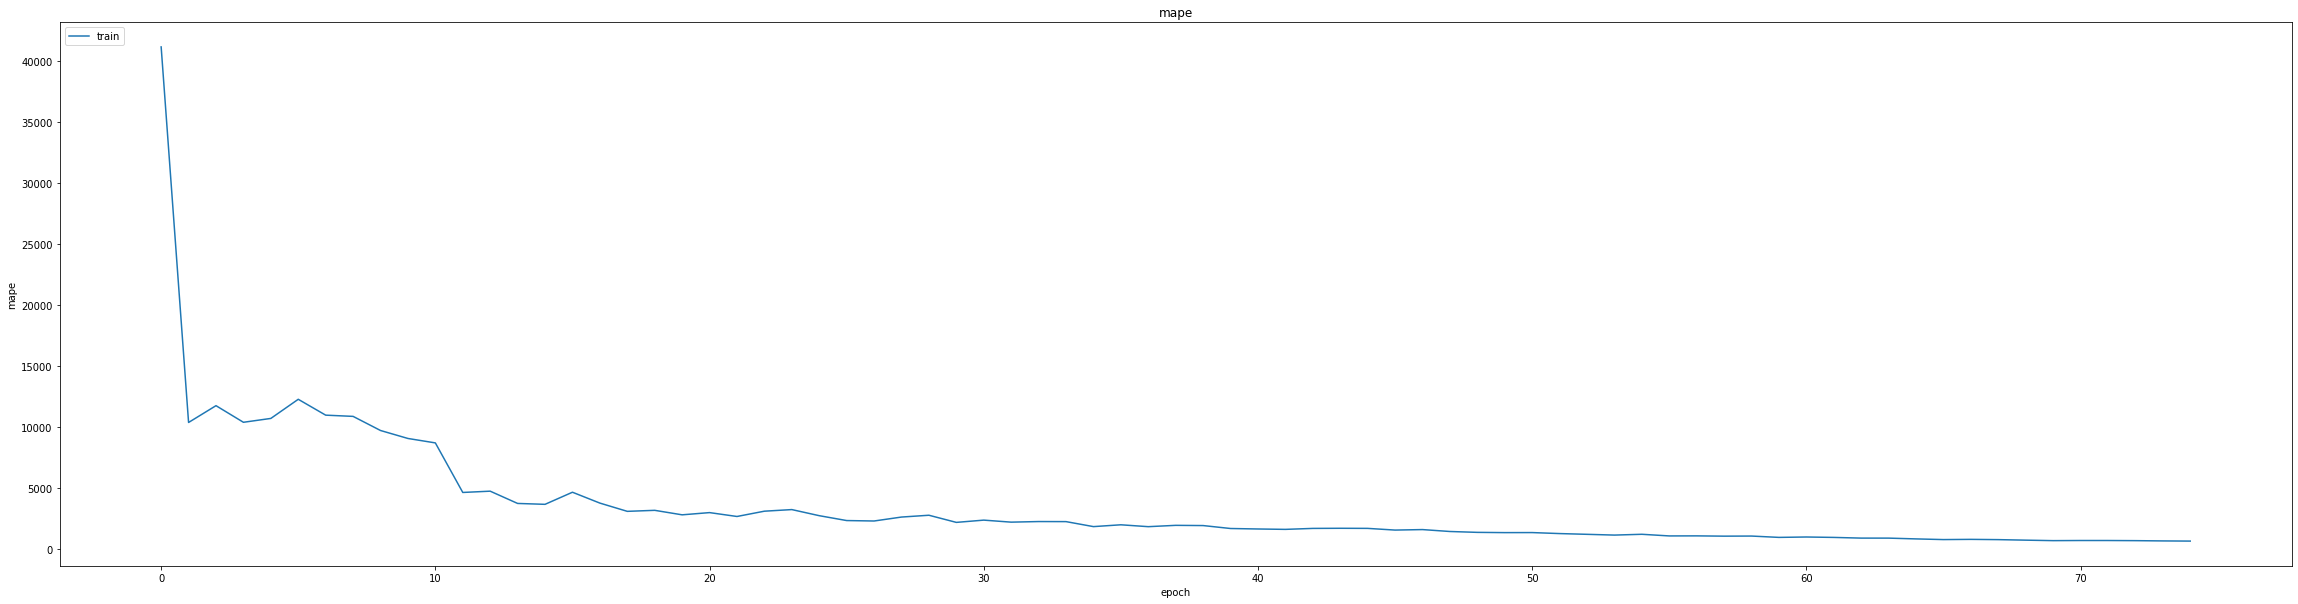

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007109859026968479
0.008530626073479652
348/348 [==============================] - 4s 7ms/step
0.9943779208289222


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


405/406 [============================>.] - ETA: 0s - loss: 4.5789e-04 - mae: 0.0090 - mse: 4.5789e-04 - root_mean_squared_error: 0.0214 - mape: 997.4883 
Epoch 1: val_mse did not improve from 0.00007
406/406 [==============================] - 20s 26ms/step - loss: 4.5686e-04 - mae: 0.0089 - mse: 4.5686e-04 - root_mean_squared_error: 0.0214 - mape: 995.1295 - val_loss: 2.8973e-04 - val_mae: 0.0162 - val_mse: 2.8973e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 4276.2026 - lr: 0.0010
Epoch 2/25
405/406 [============================>.] - ETA: 0s - loss: 3.1765e-05 - mae: 0.0043 - mse: 3.1765e-05 - root_mean_squared_error: 0.0056 - mape: 809.0026
Epoch 2: val_mse did not improve from 0.00007
406/406 [==============================] - 9s 21ms/step - loss: 3.1744e-05 - mae: 0.0043 - mse: 3.1744e-05 - root_mean_squared_error: 0.0056 - mape: 807.0902 - val_loss: 3.9595e-04 - val_mae: 0.0191 - val_mse: 3.9595e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 3749.0815 - lr: 0.0010
l

406/406 [==============================] - 42s 105ms/step - loss: 3.7899e-05 - mae: 0.0047 - mse: 3.7899e-05 - root_mean_squared_error: 0.0062 - mape: 493.8973 - val_loss: 6.5133e-05 - val_mae: 0.0064 - val_mse: 6.5133e-05 - val_root_mean_squared_error: 0.0081 - val_mape: 2074.5752 - lr: 7.2900e-04
Epoch 8/25
405/406 [============================>.] - ETA: 0s - loss: 6.4004e-05 - mae: 0.0061 - mse: 6.4004e-05 - root_mean_squared_error: 0.0080 - mape: 494.6876
Epoch 8: val_mse did not improve from 0.00007
406/406 [==============================] - 9s 22ms/step - loss: 6.4035e-05 - mae: 0.0061 - mse: 6.4035e-05 - root_mean_squared_error: 0.0080 - mape: 493.5210 - val_loss: 4.0562e-04 - val_mae: 0.0192 - val_mse: 4.0562e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 2432.1042 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
404/406 [============================>.] - ETA: 0s - loss: 3.1222e-05 - mae: 0.0043 - mse: 3.1222e-05 - root_mean_squared_error: 0.0056 - mape: 3

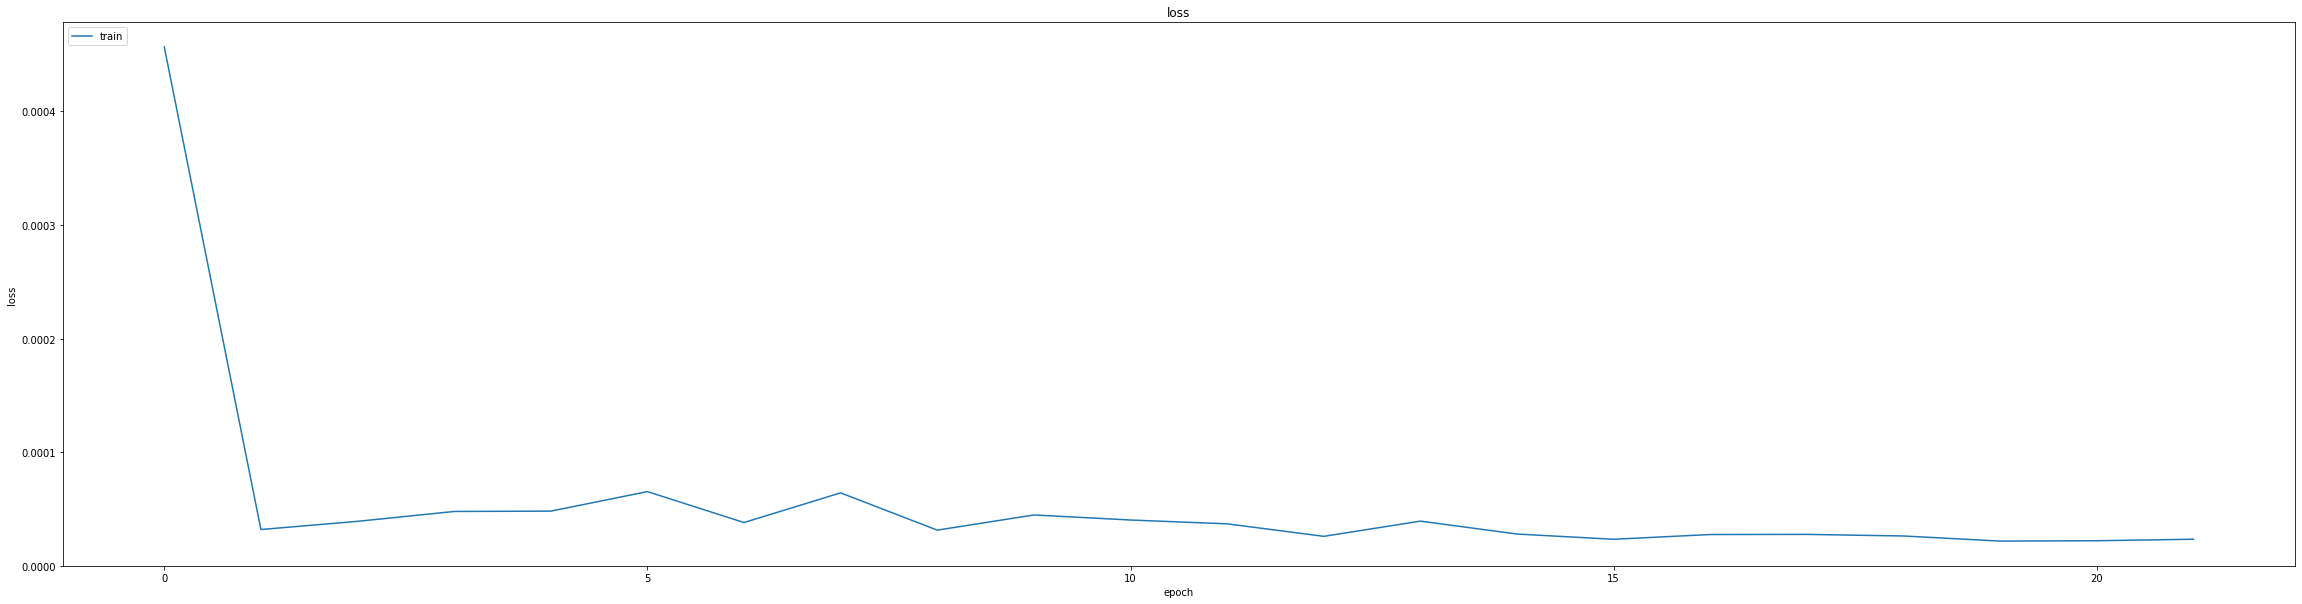

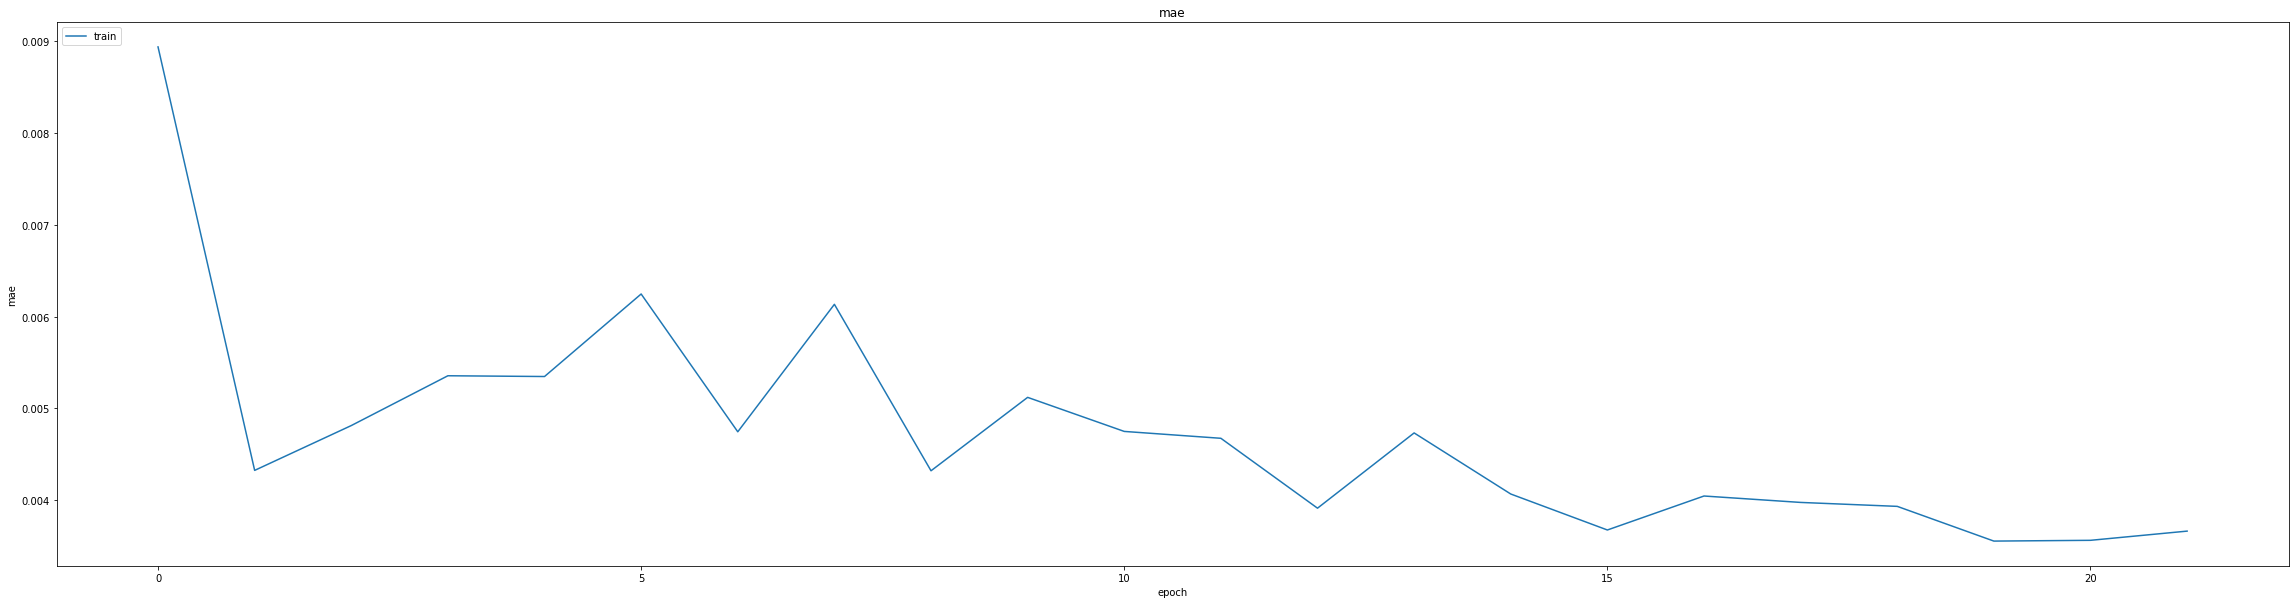

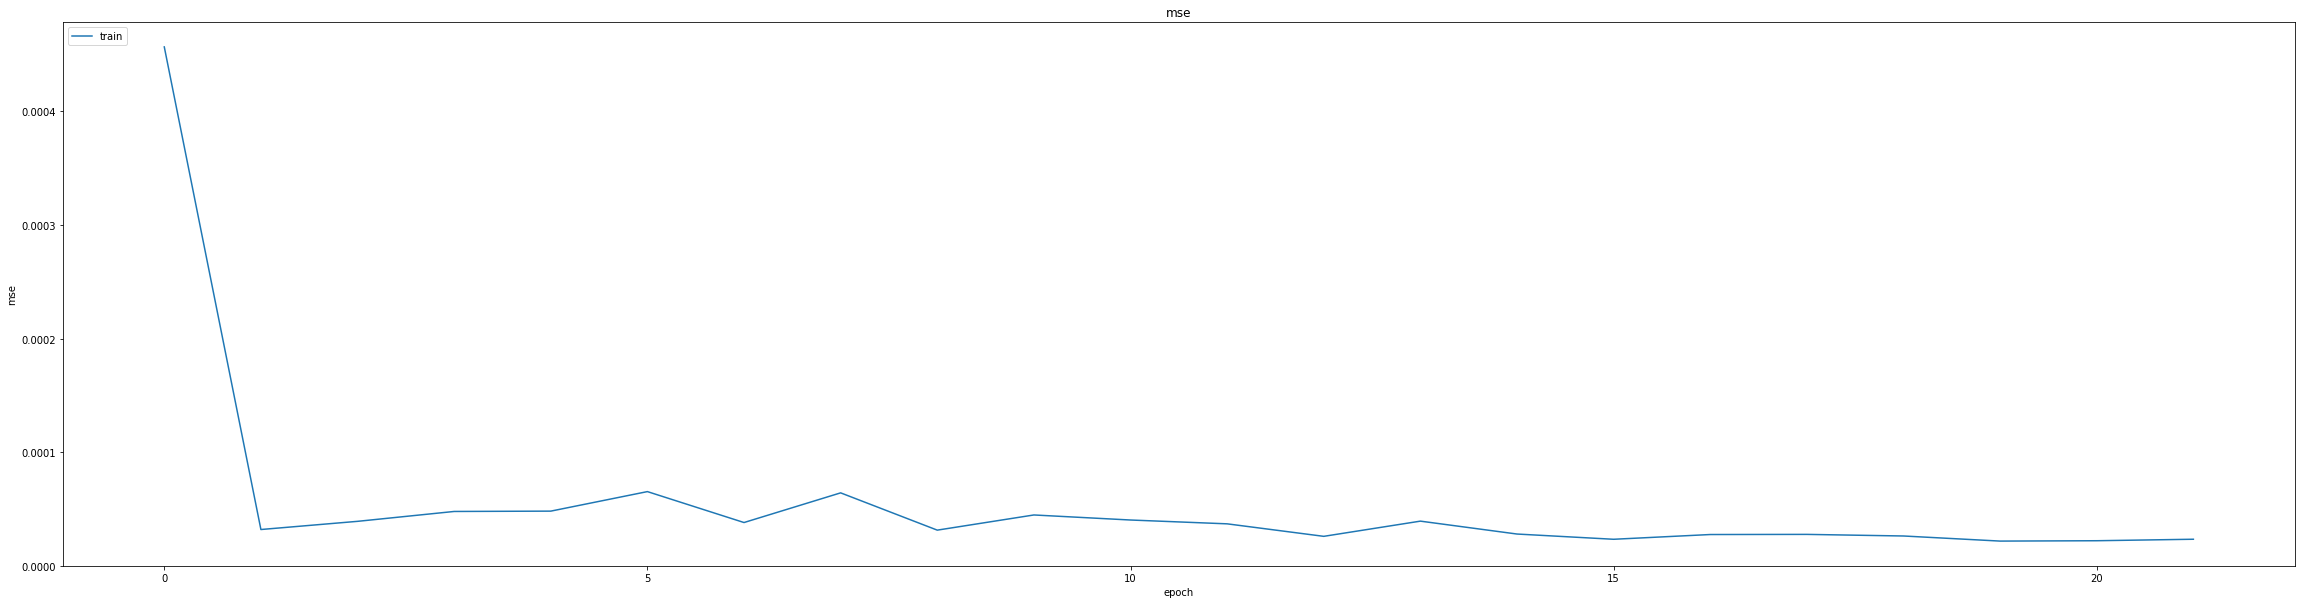

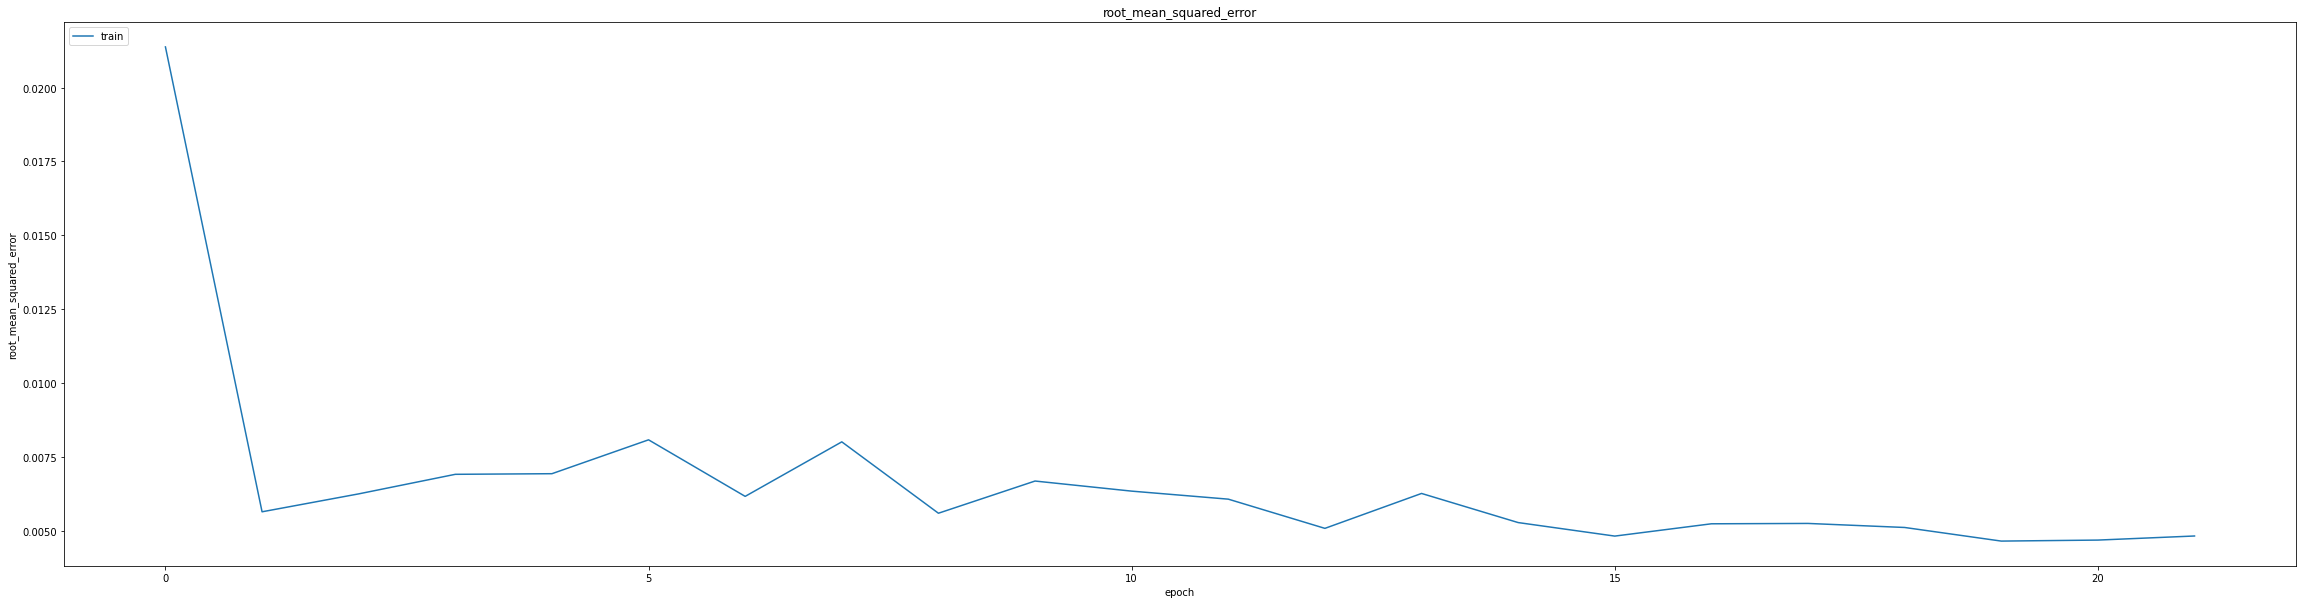

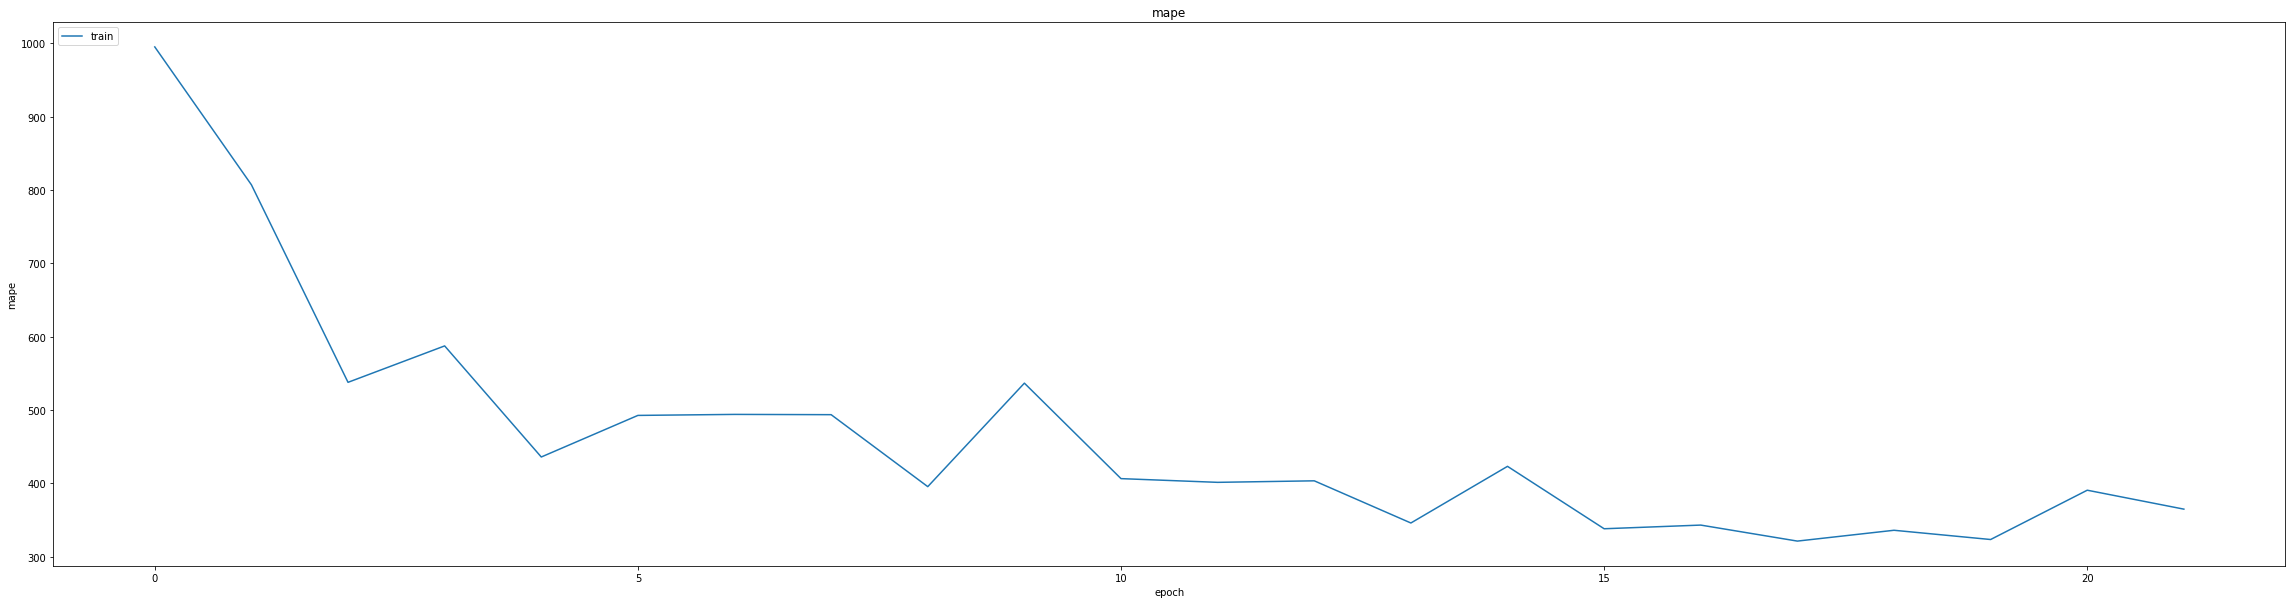

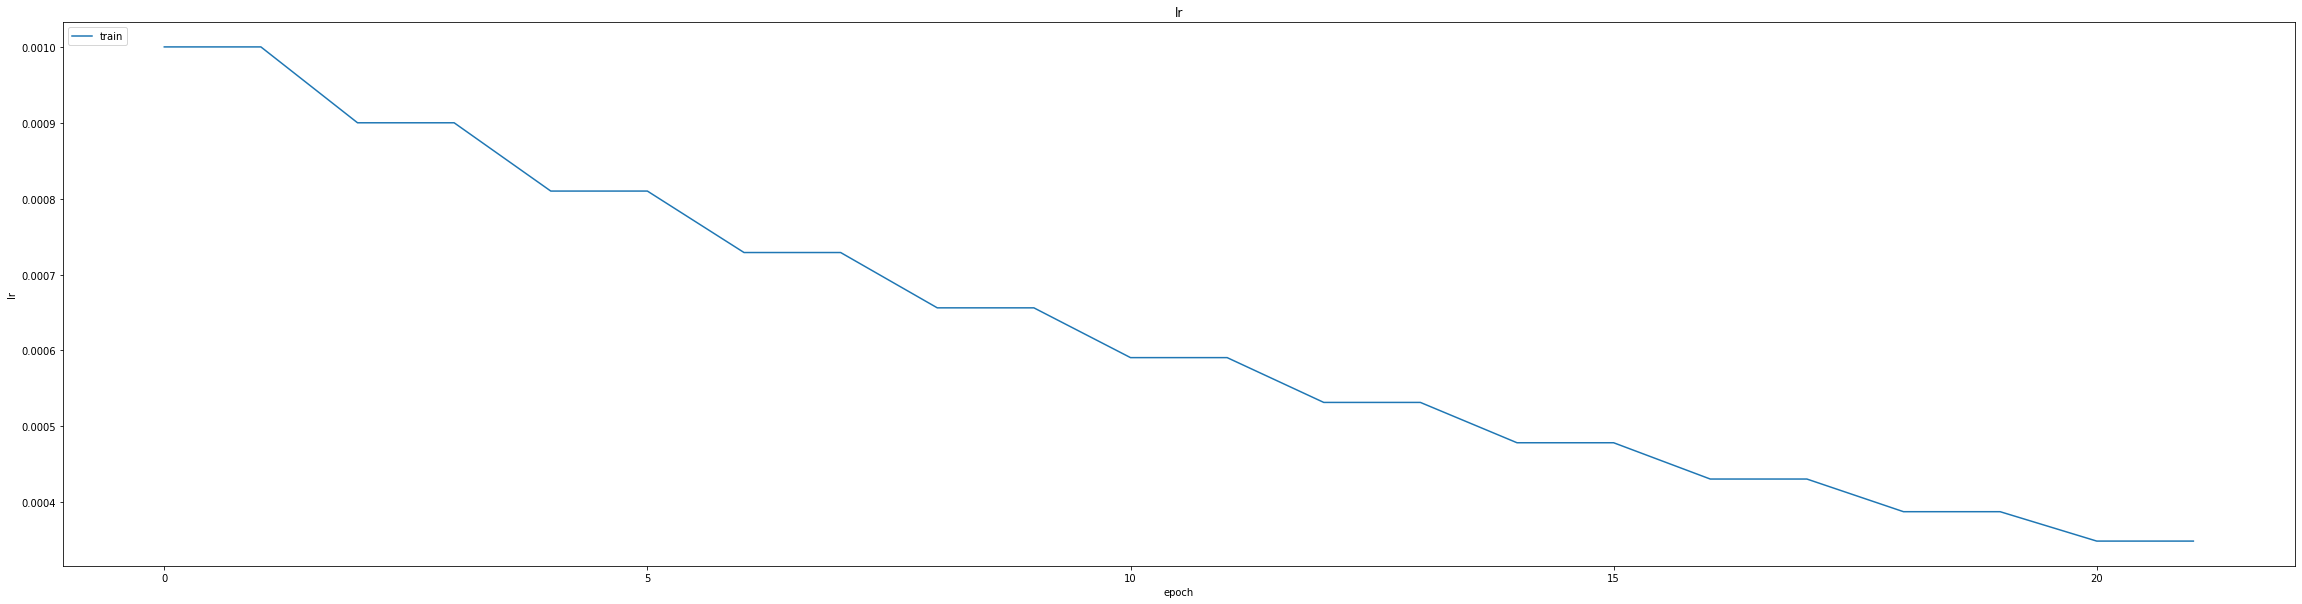

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0063861883245408535
0.008070502430200577
348/348 [==============================] - 5s 7ms/step
0.9932784949101732


348/348 [==============================] - 2s 7ms/step


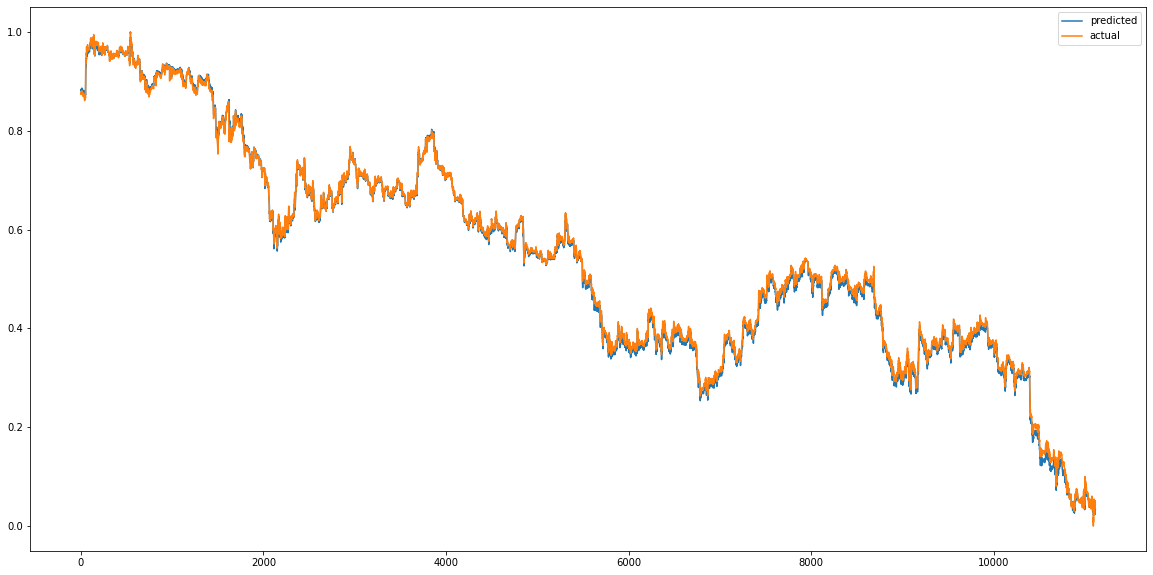

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


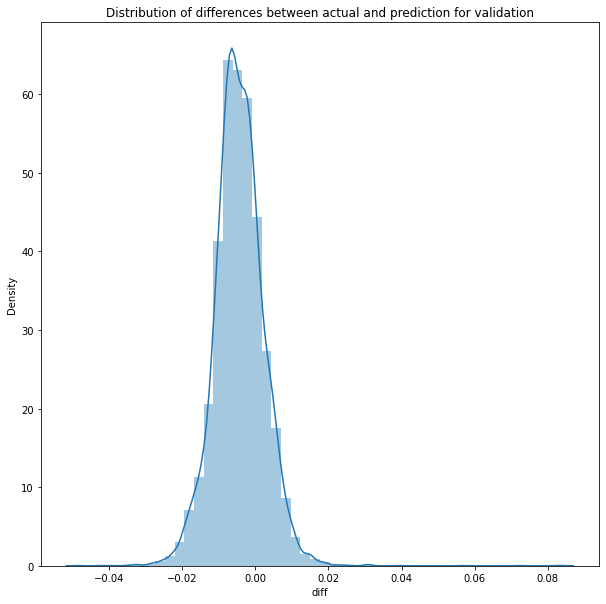

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 7ms/step


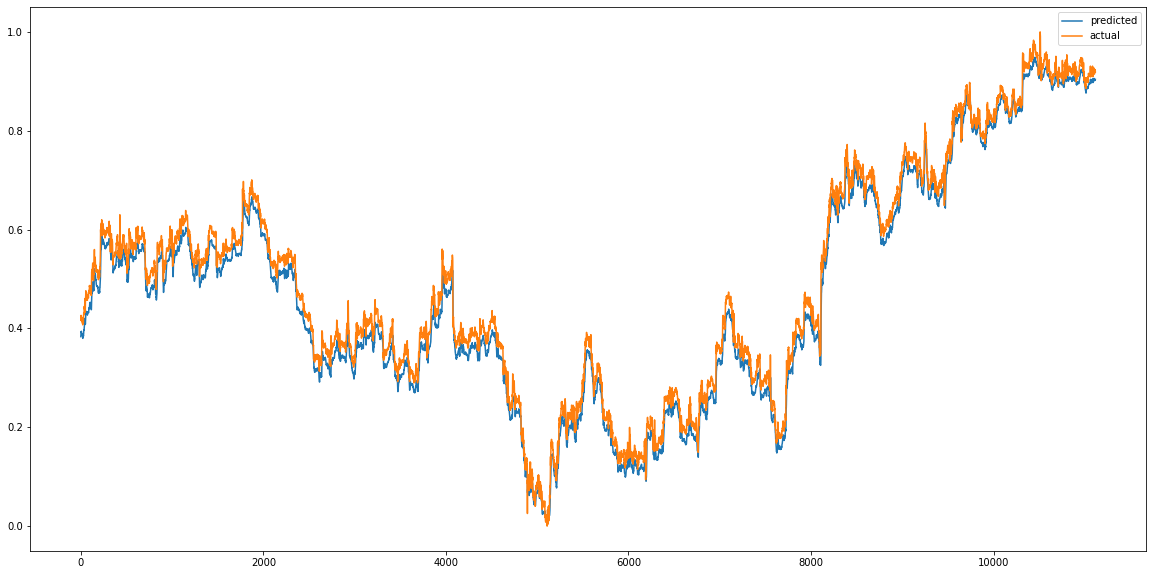

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


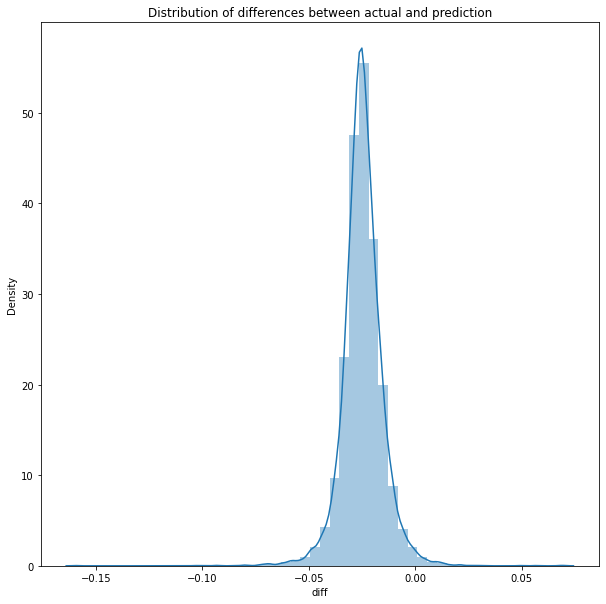

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.000703813243563944
RMSE :  0.026529478765402535
MAE :  0.024929503940572657
348/348 [==============================] - 2s 7ms/step
R2_Score  : 0.9867537293463288


count    11116.000000
mean        -0.024733
std          0.009596
min         -0.159572
25%         -0.029603
50%         -0.024957
75%         -0.019894
max          0.069919
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 24, 256)           275456    
                                                                 
 lstm_12 (LSTM)              (None, 24, 64)            82176     
                                                                 
 dropout_6 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_13 (LSTM)              (None, 16)                5184      
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
406/406 [==============================] - ETA: 0s - loss: 1995.2384 - mae: 21.8274 - mse: 1995.2384 - root_mean_squared_error: 44.6681 - mape: 179521.9844
Epoch 1: val_mse improved from inf to 13.95133, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 24s 50ms/step - loss: 1995.2384 - mae: 21.8274 - mse: 1995.2384 - root_mean_squared_error: 44.6681 - mape: 179521.9844 - val_loss: 13.9513 - val_mae: 3.7284 - val_mse: 13.9513 - val_root_mean_squared_error: 3.7351 - val_mape: 385707.9688
Epoch 2/75
406/406 [==============================] - ETA: 0s - loss: 6.7628 - mae: 2.5255 - mse: 6.7628 - root_mean_squared_error: 2.6005 - mape: 74525.5469
Epoch 2: val_mse improved from 13.95133 to 3.05576, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 20s 48ms/step - loss: 6.7628 - mae: 2.5255 - mse: 6.7628 - root_mean_squared_error: 2.6005 - mape: 74525.5469 - val_loss: 3.0558 - val_mae: 1.7337 - val_mse: 3.0558 - val_root_mean_squared_error: 1.7481 - val_mape: 205714.8281
Epoch 3/75
404/406 [============================>.] - ETA: 0s - loss: 1.9107 - mae: 1.3451 - mse: 1.9107 - root_mean_squared_error: 1.3823 - mape: 36580.0703
Epoch 3: val_mse improved from 3.05576 to 1.13707, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 18s 45ms/step - loss: 1.9071 - mae: 1.3437 - mse: 1.9071 - root_mean_squared_error: 1.3810 - mape: 36405.1250 - val_loss: 1.1371 - val_mae: 1.0426 - val_mse: 1.1371 - val_root_mean_squared_error: 1.0663 - val_mape: 143353.8438
Epoch 4/75
404/406 [============================>.] - ETA: 0s - loss: 0.7879 - mae: 0.8459 - mse: 0.7879 - root_mean_squared_error: 0.8876 - mape: 24702.7324
Epoch 4: val_mse improved from 1.13707 to 0.52752, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 18s 43ms/step - loss: 0.7866 - mae: 0.8451 - mse: 0.7866 - root_mean_squared_error: 0.8869 - mape: 24584.4473 - val_loss: 0.5275 - val_mae: 0.6910 - val_mse: 0.5275 - val_root_mean_squared_error: 0.7263 - val_mape: 111625.7344
Epoch 5/75
402/406 [============================>.] - ETA: 0s - loss: 0.3901 - mae: 0.5700 - mse: 0.3901 - root_mean_squared_error: 0.6246 - mape: 23048.1113
Epoch 5: val_mse improved from 0.52752 to 0.27937, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 41ms/step - loss: 0.3891 - mae: 0.5691 - mse: 0.3891 - root_mean_squared_error: 0.6238 - mape: 22824.9219 - val_loss: 0.2794 - val_mae: 0.4788 - val_mse: 0.2794 - val_root_mean_squared_error: 0.5286 - val_mape: 92483.7734
Epoch 6/75
403/406 [============================>.] - ETA: 0s - loss: 0.2189 - mae: 0.3959 - mse: 0.2189 - root_mean_squared_error: 0.4678 - mape: 19293.5723
Epoch 6: val_mse improved from 0.27937 to 0.16453, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 41ms/step - loss: 0.2185 - mae: 0.3954 - mse: 0.2185 - root_mean_squared_error: 0.4674 - mape: 19153.9648 - val_loss: 0.1645 - val_mae: 0.3491 - val_mse: 0.1645 - val_root_mean_squared_error: 0.4056 - val_mape: 79802.7266
Epoch 7/75
406/406 [==============================] - ETA: 0s - loss: 0.1377 - mae: 0.2928 - mse: 0.1377 - root_mean_squared_error: 0.3711 - mape: 16534.2227
Epoch 7: val_mse improved from 0.16453 to 0.10776, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 18s 44ms/step - loss: 0.1377 - mae: 0.2928 - mse: 0.1377 - root_mean_squared_error: 0.3711 - mape: 16534.2227 - val_loss: 0.1078 - val_mae: 0.2779 - val_mse: 0.1078 - val_root_mean_squared_error: 0.3283 - val_mape: 70949.2734
Epoch 8/75
405/406 [============================>.] - ETA: 0s - loss: 0.0979 - mae: 0.2399 - mse: 0.0979 - root_mean_squared_error: 0.3129 - mape: 14465.8789
Epoch 8: val_mse improved from 0.10776 to 0.07876, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 41ms/step - loss: 0.0979 - mae: 0.2399 - mse: 0.0979 - root_mean_squared_error: 0.3129 - mape: 14431.8701 - val_loss: 0.0788 - val_mae: 0.2332 - val_mse: 0.0788 - val_root_mean_squared_error: 0.2806 - val_mape: 64558.8242
Epoch 9/75
406/406 [==============================] - ETA: 0s - loss: 0.0780 - mae: 0.2139 - mse: 0.0780 - root_mean_squared_error: 0.2794 - mape: 12632.5977
Epoch 9: val_mse improved from 0.07876 to 0.06397, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 0.0780 - mae: 0.2139 - mse: 0.0780 - root_mean_squared_error: 0.2794 - mape: 12632.5977 - val_loss: 0.0640 - val_mae: 0.2094 - val_mse: 0.0640 - val_root_mean_squared_error: 0.2529 - val_mape: 59913.0820
Epoch 10/75
403/406 [============================>.] - ETA: 0s - loss: 0.0683 - mae: 0.2064 - mse: 0.0683 - root_mean_squared_error: 0.2613 - mape: 13240.1523
Epoch 10: val_mse improved from 0.06397 to 0.05660, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 0.0683 - mae: 0.2065 - mse: 0.0683 - root_mean_squared_error: 0.2614 - mape: 13144.2773 - val_loss: 0.0566 - val_mae: 0.1976 - val_mse: 0.0566 - val_root_mean_squared_error: 0.2379 - val_mape: 56565.5938
Epoch 11/75
404/406 [============================>.] - ETA: 0s - loss: 0.0638 - mae: 0.2068 - mse: 0.0638 - root_mean_squared_error: 0.2526 - mape: 12630.4912
Epoch 11: val_mse improved from 0.05660 to 0.05304, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 0.0638 - mae: 0.2069 - mse: 0.0638 - root_mean_squared_error: 0.2527 - mape: 12569.9189 - val_loss: 0.0530 - val_mae: 0.1914 - val_mse: 0.0530 - val_root_mean_squared_error: 0.2303 - val_mape: 54184.8008
Epoch 12/75
406/406 [==============================] - ETA: 0s - loss: 0.0619 - mae: 0.2088 - mse: 0.0619 - root_mean_squared_error: 0.2488 - mape: 11240.4746
Epoch 12: val_mse improved from 0.05304 to 0.05142, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 18s 44ms/step - loss: 0.0619 - mae: 0.2088 - mse: 0.0619 - root_mean_squared_error: 0.2488 - mape: 11240.4746 - val_loss: 0.0514 - val_mae: 0.1886 - val_mse: 0.0514 - val_root_mean_squared_error: 0.2268 - val_mape: 52568.3555
Epoch 13/75
403/406 [============================>.] - ETA: 0s - loss: 0.0612 - mae: 0.2105 - mse: 0.0612 - root_mean_squared_error: 0.2473 - mape: 11467.0352
Epoch 13: val_mse improved from 0.05142 to 0.05074, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0612 - mae: 0.2105 - mse: 0.0612 - root_mean_squared_error: 0.2473 - mape: 11383.9648 - val_loss: 0.0507 - val_mae: 0.1873 - val_mse: 0.0507 - val_root_mean_squared_error: 0.2253 - val_mape: 51568.7188
Epoch 14/75
403/406 [============================>.] - ETA: 0s - loss: 0.0610 - mae: 0.2118 - mse: 0.0610 - root_mean_squared_error: 0.2469 - mape: 11275.7207
Epoch 14: val_mse improved from 0.05074 to 0.05046, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 43ms/step - loss: 0.0609 - mae: 0.2118 - mse: 0.0609 - root_mean_squared_error: 0.2469 - mape: 11193.9893 - val_loss: 0.0505 - val_mae: 0.1866 - val_mse: 0.0505 - val_root_mean_squared_error: 0.2246 - val_mape: 50991.0078
Epoch 15/75
405/406 [============================>.] - ETA: 0s - loss: 0.0609 - mae: 0.2125 - mse: 0.0609 - root_mean_squared_error: 0.2469 - mape: 10855.7881
Epoch 15: val_mse improved from 0.05046 to 0.05036, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0610 - mae: 0.2126 - mse: 0.0610 - root_mean_squared_error: 0.2469 - mape: 10830.2900 - val_loss: 0.0504 - val_mae: 0.1864 - val_mse: 0.0504 - val_root_mean_squared_error: 0.2244 - val_mape: 50724.3516
Epoch 16/75
404/406 [============================>.] - ETA: 0s - loss: 0.0609 - mae: 0.2128 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 10940.0518
Epoch 16: val_mse improved from 0.05036 to 0.05031, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0609 - mae: 0.2128 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 10887.5850 - val_loss: 0.0503 - val_mae: 0.1862 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2243 - val_mape: 50586.6602
Epoch 17/75
402/406 [============================>.] - ETA: 0s - loss: 0.0609 - mae: 0.2130 - mse: 0.0609 - root_mean_squared_error: 0.2468 - mape: 10869.5469
Epoch 17: val_mse improved from 0.05031 to 0.05031, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 41ms/step - loss: 0.0609 - mae: 0.2130 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 10764.1855 - val_loss: 0.0503 - val_mae: 0.1862 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2243 - val_mape: 50572.9258
Epoch 18/75
403/406 [============================>.] - ETA: 0s - loss: 0.0609 - mae: 0.2129 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 10969.7578
Epoch 18: val_mse improved from 0.05031 to 0.05030, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0609 - mae: 0.2130 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 10890.3184 - val_loss: 0.0503 - val_mae: 0.1862 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2243 - val_mape: 50563.2930
Epoch 19/75
404/406 [============================>.] - ETA: 0s - loss: 0.0609 - mae: 0.2131 - mse: 0.0609 - root_mean_squared_error: 0.2468 - mape: 11344.4014
Epoch 19: val_mse improved from 0.05030 to 0.05029, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 0.0609 - mae: 0.2131 - mse: 0.0609 - root_mean_squared_error: 0.2468 - mape: 11290.0938 - val_loss: 0.0503 - val_mae: 0.1862 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2243 - val_mape: 50516.5391
Epoch 20/75
404/406 [============================>.] - ETA: 0s - loss: 0.0609 - mae: 0.2130 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 11336.8662
Epoch 20: val_mse improved from 0.05029 to 0.05027, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 18s 43ms/step - loss: 0.0609 - mae: 0.2130 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 11282.4414 - val_loss: 0.0503 - val_mae: 0.1861 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2242 - val_mape: 50441.3516
Epoch 21/75
403/406 [============================>.] - ETA: 0s - loss: 0.0609 - mae: 0.2130 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 10820.1875
Epoch 21: val_mse did not improve from 0.05027
406/406 [==============================] - 6s 14ms/step - loss: 0.0609 - mae: 0.2130 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 10741.8135 - val_loss: 0.0503 - val_mae: 0.1861 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2242 - val_mape: 50476.0430
Epoch 22/75
405/406 [============================>.] - ETA: 0s - loss: 0.0608 - mae: 0.2130 - mse: 0.0608 - root_mean_squared_error: 0.2467 - mape: 10674.6689
Epoch 22: val_mse did not improve from 0.05027
406/406 [==============================] - 5s 12ms/

406/406 [==============================] - 16s 40ms/step - loss: 0.0609 - mae: 0.2129 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 11150.1943 - val_loss: 0.0502 - val_mae: 0.1860 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2241 - val_mape: 50336.6836
Epoch 26/75
402/406 [============================>.] - ETA: 0s - loss: 0.0609 - mae: 0.2132 - mse: 0.0609 - root_mean_squared_error: 0.2468 - mape: 11187.8516
Epoch 26: val_mse did not improve from 0.05024
406/406 [==============================] - 5s 13ms/step - loss: 0.0609 - mae: 0.2131 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 11079.4219 - val_loss: 0.0504 - val_mae: 0.1864 - val_mse: 0.0504 - val_root_mean_squared_error: 0.2244 - val_mape: 50766.2852
Epoch 27/75
402/406 [============================>.] - ETA: 0s - loss: 0.0610 - mae: 0.2132 - mse: 0.0610 - root_mean_squared_error: 0.2470 - mape: 11003.3301
Epoch 27: val_mse did not improve from 0.05024
406/406 [==============================] - 5s 12ms/

406/406 [==============================] - 17s 41ms/step - loss: 0.0609 - mae: 0.2129 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 11222.7168 - val_loss: 0.0502 - val_mae: 0.1857 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2239 - val_mape: 49908.9336
Epoch 30/75
402/406 [============================>.] - ETA: 0s - loss: 0.0609 - mae: 0.2132 - mse: 0.0609 - root_mean_squared_error: 0.2468 - mape: 10794.0010
Epoch 30: val_mse did not improve from 0.05015
406/406 [==============================] - 5s 12ms/step - loss: 0.0609 - mae: 0.2131 - mse: 0.0609 - root_mean_squared_error: 0.2468 - mape: 10689.3379 - val_loss: 0.0502 - val_mae: 0.1859 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2241 - val_mape: 50209.6562
Epoch 31/75
404/406 [============================>.] - ETA: 0s - loss: 0.0608 - mae: 0.2130 - mse: 0.0608 - root_mean_squared_error: 0.2466 - mape: 10872.0928
Epoch 31: val_mse did not improve from 0.05015
406/406 [==============================] - 5s 12ms/

406/406 [==============================] - 17s 41ms/step - loss: 0.0608 - mae: 0.2129 - mse: 0.0608 - root_mean_squared_error: 0.2466 - mape: 10794.7480 - val_loss: 0.0501 - val_mae: 0.1854 - val_mse: 0.0501 - val_root_mean_squared_error: 0.2238 - val_mape: 49509.7617
Epoch 38/75
402/406 [============================>.] - ETA: 0s - loss: 0.0607 - mae: 0.2127 - mse: 0.0607 - root_mean_squared_error: 0.2464 - mape: 10977.4922
Epoch 38: val_mse did not improve from 0.05011
406/406 [==============================] - 5s 12ms/step - loss: 0.0607 - mae: 0.2127 - mse: 0.0607 - root_mean_squared_error: 0.2464 - mape: 10871.3428 - val_loss: 0.0502 - val_mae: 0.1862 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2241 - val_mape: 51320.2734
Epoch 39/75
402/406 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1903 - mse: 0.0515 - root_mean_squared_error: 0.2270 - mape: 11009.6465
Epoch 39: val_mse improved from 0.05011 to 0.01061, saving model to /content/drive/MyDrive/modelwe

406/406 [==============================] - 17s 42ms/step - loss: 0.0511 - mae: 0.1892 - mse: 0.0511 - root_mean_squared_error: 0.2260 - mape: 10902.5527 - val_loss: 0.0106 - val_mae: 0.0837 - val_mse: 0.0106 - val_root_mean_squared_error: 0.1030 - val_mape: 26227.4082
Epoch 40/75
404/406 [============================>.] - ETA: 0s - loss: 0.0043 - mae: 0.0496 - mse: 0.0043 - root_mean_squared_error: 0.0652 - mape: 4117.3325
Epoch 40: val_mse improved from 0.01061 to 0.00155, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 0.0042 - mae: 0.0495 - mse: 0.0042 - root_mean_squared_error: 0.0651 - mape: 4097.4985 - val_loss: 0.0015 - val_mae: 0.0276 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0393 - val_mape: 17601.4629
Epoch 41/75
406/406 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0348 - mse: 0.0020 - root_mean_squared_error: 0.0447 - mape: 3618.1494
Epoch 41: val_mse improved from 0.00155 to 0.00141, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 0.0020 - mae: 0.0348 - mse: 0.0020 - root_mean_squared_error: 0.0447 - mape: 3618.1494 - val_loss: 0.0014 - val_mae: 0.0289 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0376 - val_mape: 14756.3906
Epoch 42/75
404/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0276 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 3237.1670
Epoch 42: val_mse improved from 0.00141 to 0.00076, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 0.0013 - mae: 0.0276 - mse: 0.0013 - root_mean_squared_error: 0.0355 - mape: 3221.5671 - val_loss: 7.6495e-04 - val_mae: 0.0192 - val_mse: 7.6495e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 13334.8984
Epoch 43/75
403/406 [============================>.] - ETA: 0s - loss: 9.4557e-04 - mae: 0.0240 - mse: 9.4557e-04 - root_mean_squared_error: 0.0308 - mape: 2804.0942
Epoch 43: val_mse did not improve from 0.00076
406/406 [==============================] - 5s 13ms/step - loss: 9.4498e-04 - mae: 0.0239 - mse: 9.4498e-04 - root_mean_squared_error: 0.0307 - mape: 2783.6909 - val_loss: 8.3232e-04 - val_mae: 0.0215 - val_mse: 8.3232e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 12345.4023
Epoch 44/75
403/406 [============================>.] - ETA: 0s - loss: 7.2771e-04 - mae: 0.0209 - mse: 7.2771e-04 - root_mean_squared_error: 0.0270 - mape: 2701.9075
Epoch 44: val_mse improved from 0.00076 to 0.00065, saving mod

406/406 [==============================] - 16s 40ms/step - loss: 7.2782e-04 - mae: 0.0209 - mse: 7.2782e-04 - root_mean_squared_error: 0.0270 - mape: 2682.2542 - val_loss: 6.4864e-04 - val_mae: 0.0185 - val_mse: 6.4864e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 11516.6074
Epoch 45/75
403/406 [============================>.] - ETA: 0s - loss: 6.1920e-04 - mae: 0.0192 - mse: 6.1920e-04 - root_mean_squared_error: 0.0249 - mape: 2569.9983
Epoch 45: val_mse improved from 0.00065 to 0.00062, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 6.1843e-04 - mae: 0.0192 - mse: 6.1843e-04 - root_mean_squared_error: 0.0249 - mape: 2551.3040 - val_loss: 6.2055e-04 - val_mae: 0.0186 - val_mse: 6.2055e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 11000.5215
Epoch 46/75
406/406 [==============================] - ETA: 0s - loss: 4.8491e-04 - mae: 0.0169 - mse: 4.8491e-04 - root_mean_squared_error: 0.0220 - mape: 2357.9292
Epoch 46: val_mse improved from 0.00062 to 0.00049, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 18s 44ms/step - loss: 4.8491e-04 - mae: 0.0169 - mse: 4.8491e-04 - root_mean_squared_error: 0.0220 - mape: 2357.9292 - val_loss: 4.8821e-04 - val_mae: 0.0157 - val_mse: 4.8821e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 10558.8750
Epoch 47/75
402/406 [============================>.] - ETA: 0s - loss: 4.5029e-04 - mae: 0.0163 - mse: 4.5029e-04 - root_mean_squared_error: 0.0212 - mape: 2215.9419
Epoch 47: val_mse improved from 0.00049 to 0.00049, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 4.4992e-04 - mae: 0.0163 - mse: 4.4992e-04 - root_mean_squared_error: 0.0212 - mape: 2194.3652 - val_loss: 4.8747e-04 - val_mae: 0.0160 - val_mse: 4.8747e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 10104.9541
Epoch 48/75
406/406 [==============================] - ETA: 0s - loss: 3.9520e-04 - mae: 0.0153 - mse: 3.9520e-04 - root_mean_squared_error: 0.0199 - mape: 2190.4927
Epoch 48: val_mse did not improve from 0.00049
406/406 [==============================] - 5s 13ms/step - loss: 3.9520e-04 - mae: 0.0153 - mse: 3.9520e-04 - root_mean_squared_error: 0.0199 - mape: 2190.4927 - val_loss: 5.2272e-04 - val_mae: 0.0172 - val_mse: 5.2272e-04 - val_root_mean_squared_error: 0.0229 - val_mape: 9695.8096
Epoch 49/75
403/406 [============================>.] - ETA: 0s - loss: 3.5153e-04 - mae: 0.0144 - mse: 3.5153e-04 - root_mean_squared_error: 0.0187 - mape: 2067.4836
Epoch 49: val_mse did not improve from 0.00049
406/406 

406/406 [==============================] - 16s 40ms/step - loss: 3.4344e-04 - mae: 0.0141 - mse: 3.4344e-04 - root_mean_squared_error: 0.0185 - mape: 1990.3556 - val_loss: 4.4345e-04 - val_mae: 0.0153 - val_mse: 4.4345e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 9282.5146
Epoch 51/75
406/406 [==============================] - ETA: 0s - loss: 2.9812e-04 - mae: 0.0131 - mse: 2.9812e-04 - root_mean_squared_error: 0.0173 - mape: 1962.0630
Epoch 51: val_mse did not improve from 0.00044
406/406 [==============================] - 5s 13ms/step - loss: 2.9812e-04 - mae: 0.0131 - mse: 2.9812e-04 - root_mean_squared_error: 0.0173 - mape: 1962.0630 - val_loss: 6.4364e-04 - val_mae: 0.0200 - val_mse: 6.4364e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 8892.8652
Epoch 52/75
403/406 [============================>.] - ETA: 0s - loss: 2.9212e-04 - mae: 0.0130 - mse: 2.9212e-04 - root_mean_squared_error: 0.0171 - mape: 1960.5292
Epoch 52: val_mse did not improve from 0.00044
406/406 [

406/406 [==============================] - 17s 42ms/step - loss: 2.8060e-04 - mae: 0.0127 - mse: 2.8060e-04 - root_mean_squared_error: 0.0168 - mape: 1846.0839 - val_loss: 4.3333e-04 - val_mae: 0.0153 - val_mse: 4.3333e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 8672.4023
Epoch 54/75
403/406 [============================>.] - ETA: 0s - loss: 2.6421e-04 - mae: 0.0123 - mse: 2.6421e-04 - root_mean_squared_error: 0.0163 - mape: 1829.2019
Epoch 54: val_mse improved from 0.00043 to 0.00042, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 41ms/step - loss: 2.6442e-04 - mae: 0.0123 - mse: 2.6442e-04 - root_mean_squared_error: 0.0163 - mape: 1815.8885 - val_loss: 4.2192e-04 - val_mae: 0.0152 - val_mse: 4.2192e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 8454.1846
Epoch 55/75
403/406 [============================>.] - ETA: 0s - loss: 2.6701e-04 - mae: 0.0124 - mse: 2.6701e-04 - root_mean_squared_error: 0.0163 - mape: 1811.8293
Epoch 55: val_mse improved from 0.00042 to 0.00042, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 2.6721e-04 - mae: 0.0124 - mse: 2.6721e-04 - root_mean_squared_error: 0.0163 - mape: 1798.6401 - val_loss: 4.1968e-04 - val_mae: 0.0151 - val_mse: 4.1968e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 8374.3994
Epoch 56/75
404/406 [============================>.] - ETA: 0s - loss: 2.4031e-04 - mae: 0.0117 - mse: 2.4031e-04 - root_mean_squared_error: 0.0155 - mape: 1734.2893
Epoch 56: val_mse did not improve from 0.00042
406/406 [==============================] - 5s 12ms/step - loss: 2.4027e-04 - mae: 0.0116 - mse: 2.4027e-04 - root_mean_squared_error: 0.0155 - mape: 1725.9307 - val_loss: 4.2520e-04 - val_mae: 0.0156 - val_mse: 4.2520e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 8127.4370
Epoch 57/75
406/406 [==============================] - ETA: 0s - loss: 2.4778e-04 - mae: 0.0119 - mse: 2.4778e-04 - root_mean_squared_error: 0.0157 - mape: 1698.3987
Epoch 57: val_mse did not improve from 0.00042
406/406 [

406/406 [==============================] - 18s 43ms/step - loss: 1.9865e-04 - mae: 0.0106 - mse: 1.9865e-04 - root_mean_squared_error: 0.0141 - mape: 1639.6379 - val_loss: 4.1176e-04 - val_mae: 0.0156 - val_mse: 4.1176e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 7799.6768
Epoch 60/75
404/406 [============================>.] - ETA: 0s - loss: 2.0068e-04 - mae: 0.0107 - mse: 2.0068e-04 - root_mean_squared_error: 0.0142 - mape: 1647.6787
Epoch 60: val_mse did not improve from 0.00041
406/406 [==============================] - 5s 12ms/step - loss: 2.0037e-04 - mae: 0.0107 - mse: 2.0037e-04 - root_mean_squared_error: 0.0142 - mape: 1639.7328 - val_loss: 5.2111e-04 - val_mae: 0.0191 - val_mse: 5.2111e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 7398.0874
Epoch 61/75
404/406 [============================>.] - ETA: 0s - loss: 1.9439e-04 - mae: 0.0105 - mse: 1.9439e-04 - root_mean_squared_error: 0.0139 - mape: 1609.2269
Epoch 61: val_mse improved from 0.00041 to 0.00028, savi

406/406 [==============================] - 16s 39ms/step - loss: 1.9395e-04 - mae: 0.0105 - mse: 1.9395e-04 - root_mean_squared_error: 0.0139 - mape: 1601.4631 - val_loss: 2.7822e-04 - val_mae: 0.0123 - val_mse: 2.7822e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 7387.4224
Epoch 62/75
405/406 [============================>.] - ETA: 0s - loss: 1.6227e-04 - mae: 0.0096 - mse: 1.6227e-04 - root_mean_squared_error: 0.0127 - mape: 1525.1818
Epoch 62: val_mse improved from 0.00028 to 0.00024, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 1.6214e-04 - mae: 0.0096 - mse: 1.6214e-04 - root_mean_squared_error: 0.0127 - mape: 1521.5765 - val_loss: 2.4279e-04 - val_mae: 0.0118 - val_mse: 2.4279e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 7198.1147
Epoch 63/75
405/406 [============================>.] - ETA: 0s - loss: 1.5397e-04 - mae: 0.0093 - mse: 1.5397e-04 - root_mean_squared_error: 0.0124 - mape: 1550.8586
Epoch 63: val_mse did not improve from 0.00024
406/406 [==============================] - 5s 13ms/step - loss: 1.5385e-04 - mae: 0.0093 - mse: 1.5385e-04 - root_mean_squared_error: 0.0124 - mape: 1547.1927 - val_loss: 4.1131e-04 - val_mae: 0.0164 - val_mse: 4.1131e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 7264.2988
Epoch 64/75
403/406 [============================>.] - ETA: 0s - loss: 1.6052e-04 - mae: 0.0096 - mse: 1.6052e-04 - root_mean_squared_error: 0.0127 - mape: 1501.7504
Epoch 64: val_mse did not improve from 0.00024
406/406 [

406/406 [==============================] - 17s 41ms/step - loss: 1.2507e-04 - mae: 0.0085 - mse: 1.2507e-04 - root_mean_squared_error: 0.0112 - mape: 1412.6868 - val_loss: 2.1854e-04 - val_mae: 0.0117 - val_mse: 2.1854e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 6839.0796
Epoch 67/75
402/406 [============================>.] - ETA: 0s - loss: 1.1468e-04 - mae: 0.0082 - mse: 1.1468e-04 - root_mean_squared_error: 0.0107 - mape: 1443.3505
Epoch 67: val_mse did not improve from 0.00022
406/406 [==============================] - 5s 13ms/step - loss: 1.1451e-04 - mae: 0.0082 - mse: 1.1451e-04 - root_mean_squared_error: 0.0107 - mape: 1429.2853 - val_loss: 3.3360e-04 - val_mae: 0.0160 - val_mse: 3.3360e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 6522.9155
Epoch 68/75
403/406 [============================>.] - ETA: 0s - loss: 9.8791e-05 - mae: 0.0076 - mse: 9.8791e-05 - root_mean_squared_error: 0.0099 - mape: 1369.3464
Epoch 68: val_mse did not improve from 0.00022
406/406 [

406/406 [==============================] - 17s 42ms/step - loss: 6.8111e-05 - mae: 0.0063 - mse: 6.8111e-05 - root_mean_squared_error: 0.0083 - mape: 1219.0101 - val_loss: 1.7000e-04 - val_mae: 0.0110 - val_mse: 1.7000e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 5982.3203
Epoch 75/75
402/406 [============================>.] - ETA: 0s - loss: 7.6863e-05 - mae: 0.0067 - mse: 7.6863e-05 - root_mean_squared_error: 0.0088 - mape: 1230.7009
Epoch 75: val_mse did not improve from 0.00017
406/406 [==============================] - 6s 14ms/step - loss: 7.6674e-05 - mae: 0.0067 - mse: 7.6674e-05 - root_mean_squared_error: 0.0088 - mape: 1218.7085 - val_loss: 3.4851e-04 - val_mae: 0.0176 - val_mse: 3.4851e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 6546.7388


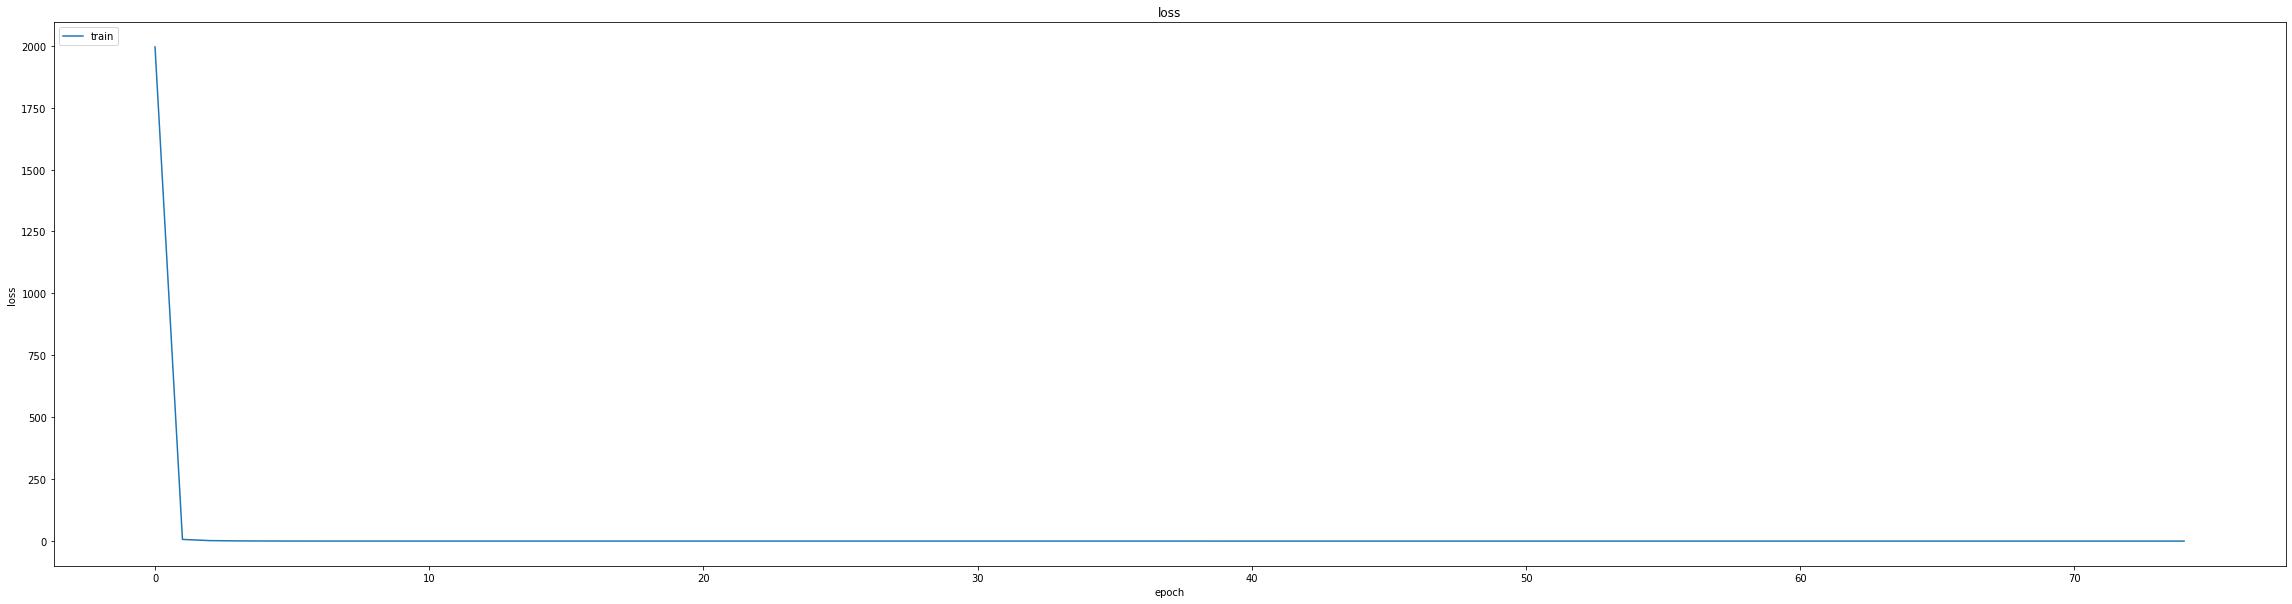

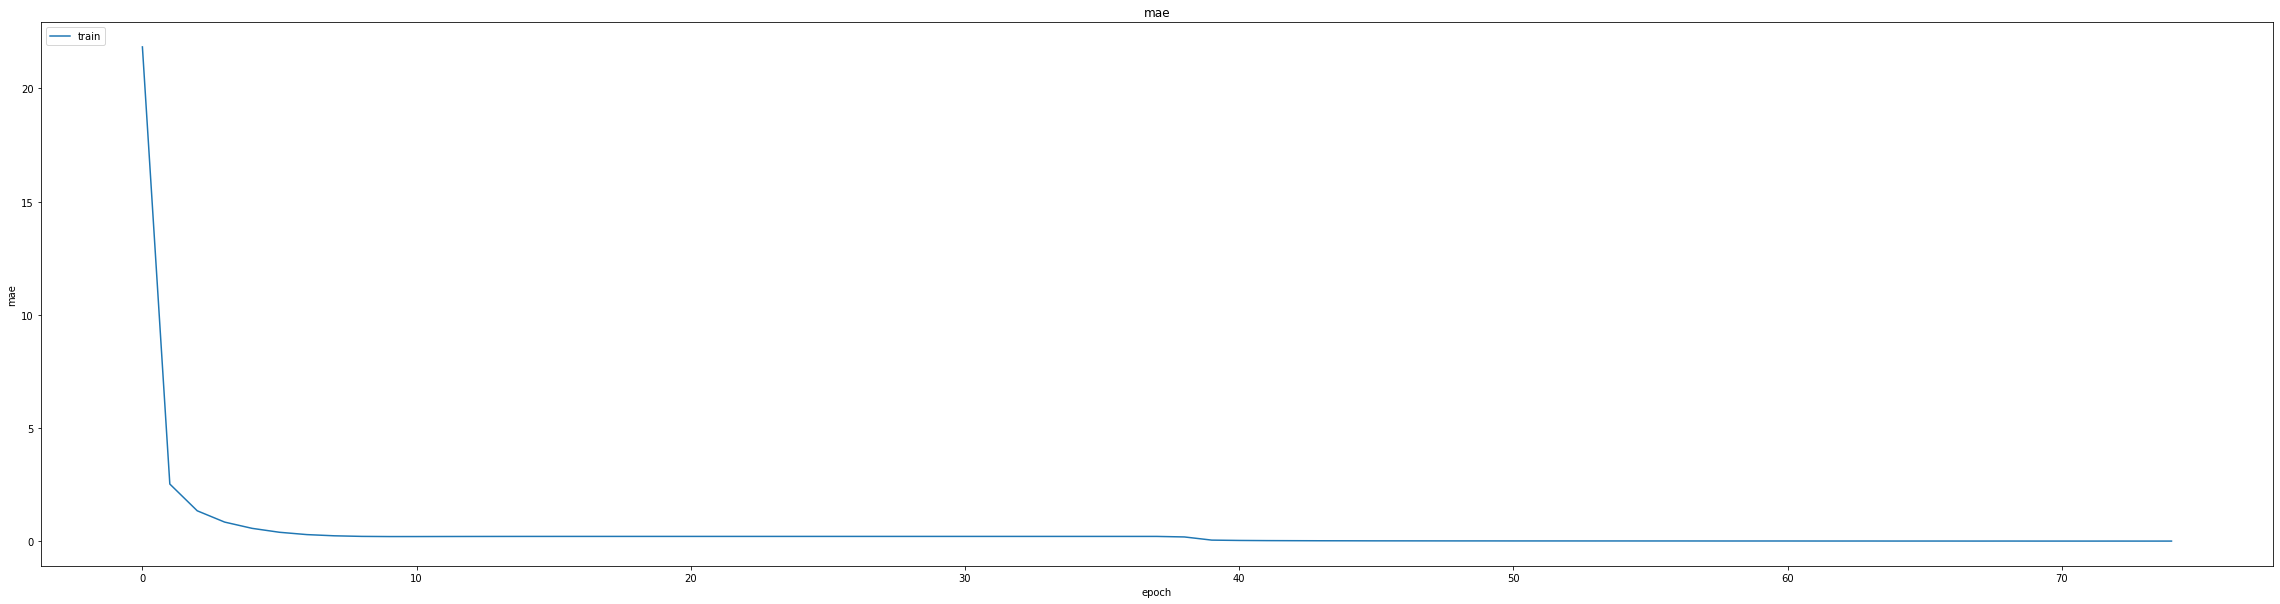

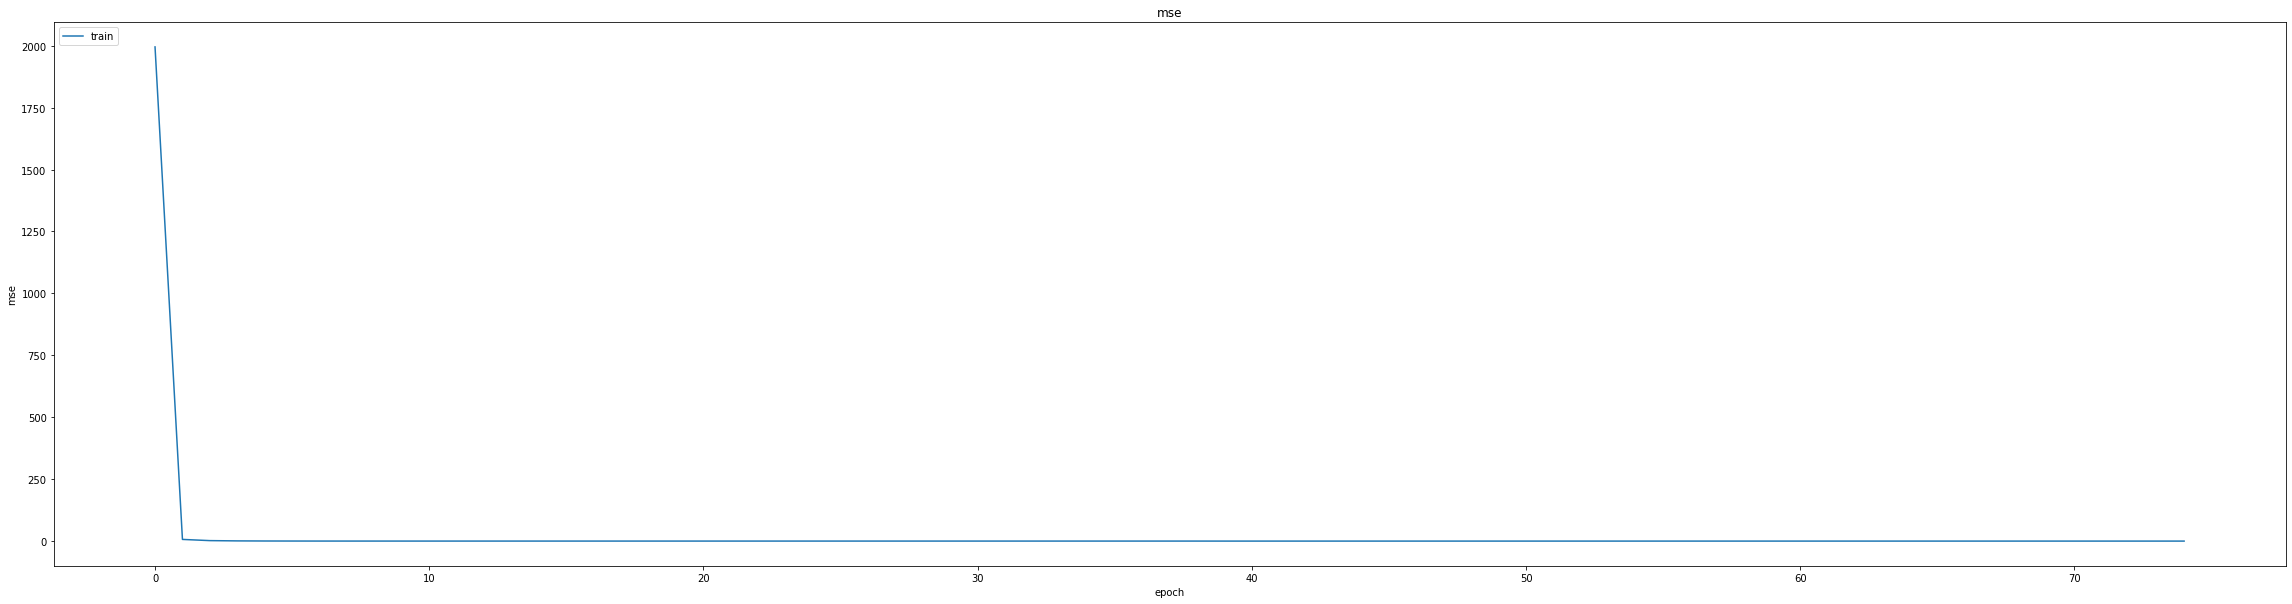

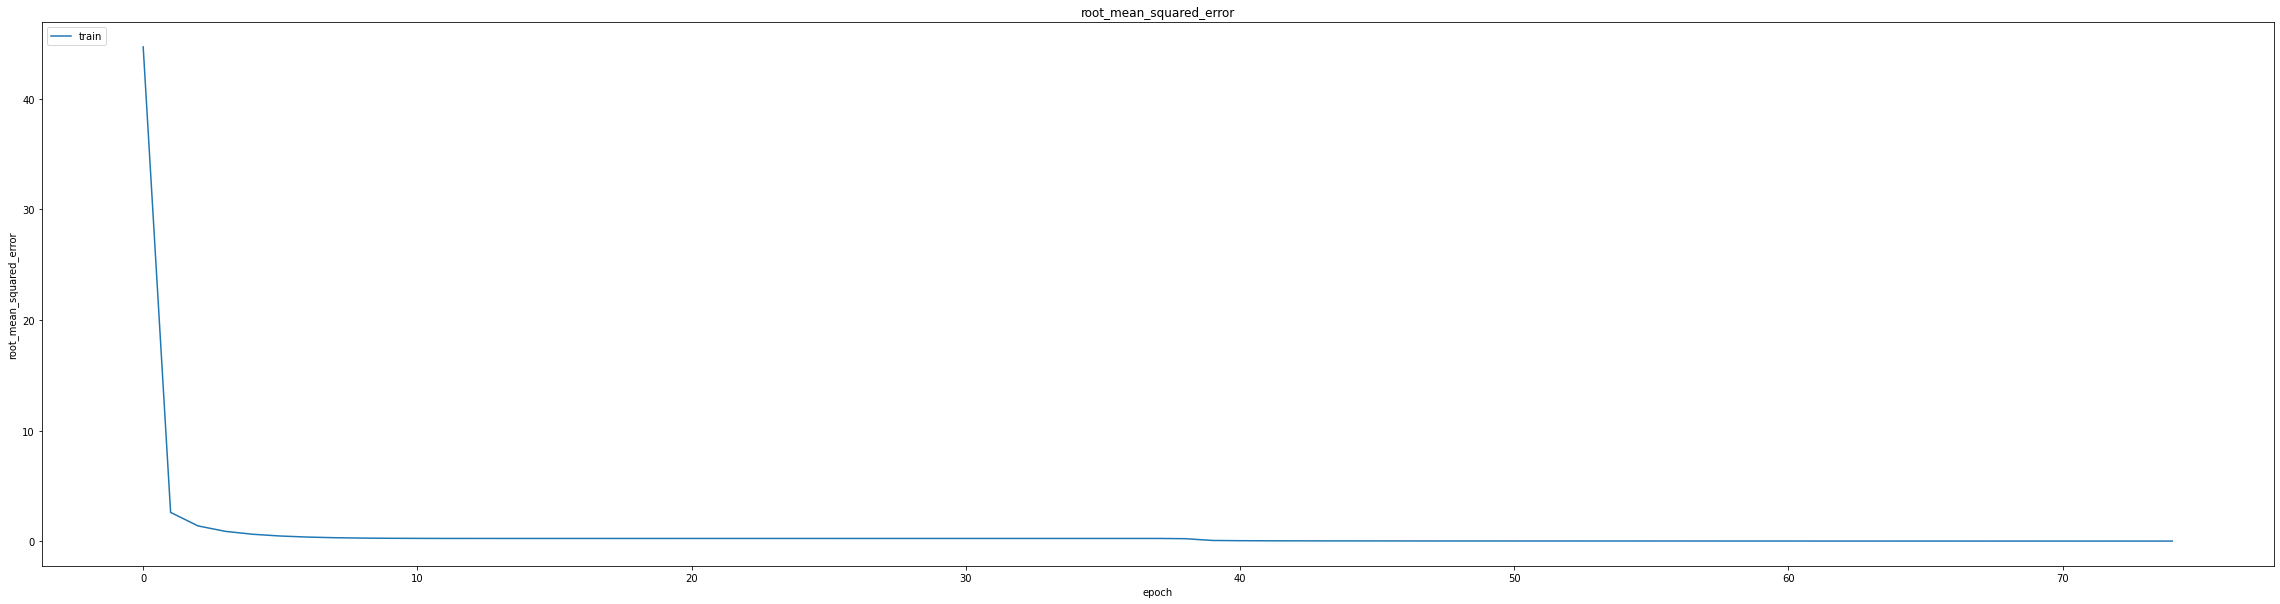

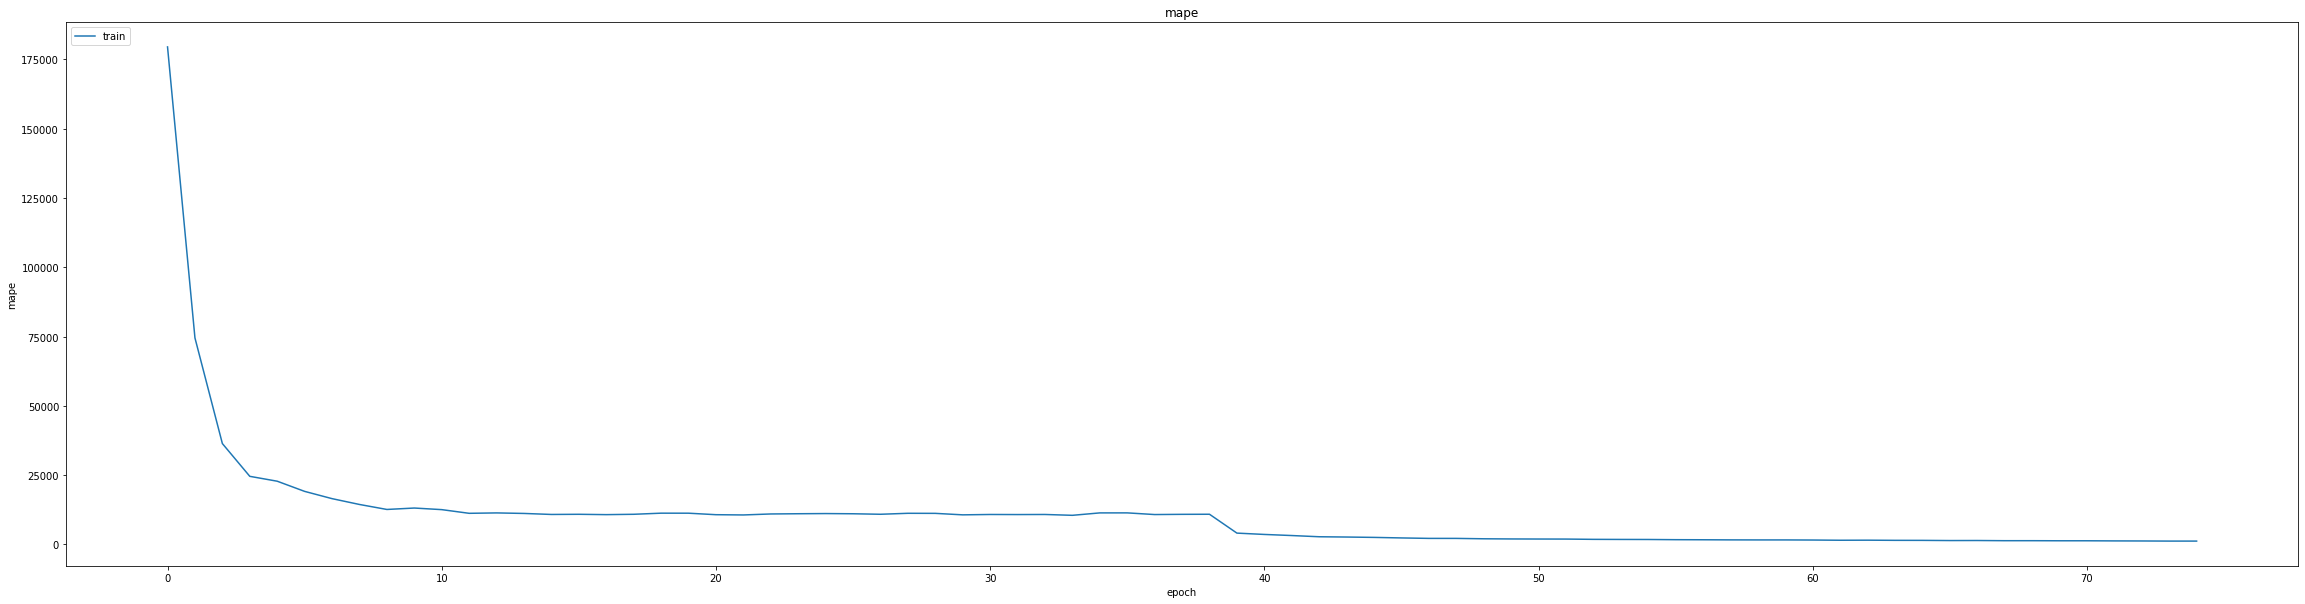

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.011044287122786045
0.013038404285907745
348/348 [==============================] - 3s 5ms/step
0.9930447033712616


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
403/406 [============================>.] - ETA: 0s - loss: 2.0818e-04 - mae: 0.0077 - mse: 2.0818e-04 - root_mean_squared_error: 0.0144 - mape: 1229.8698
Epoch 1: val_mse did not improve from 0.00017
406/406 [==============================] - 10s 16ms/step - loss: 2.0696e-04 - mae: 0.0077 - mse: 2.0696e-04 - root_mean_squared_error: 0.0144 - mape: 1220.9095 - val_loss: 3.6175e-04 - val_mae: 0.0179 - val_mse: 3.6175e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 5984.5264 - lr: 0.0010
Epoch 2/25
404/406 [============================>.] - ETA: 0s - loss: 4.5428e-05 - mae: 0.0050 - mse: 4.5428e-05 - root_mean_squared_error: 0.0067 - mape: 1220.7070
Epoch 2: val_mse did not improve from 0.00017
406/406 [==============================] - 5s 13ms/step - loss: 4.5388e-05 - mae: 0.0050 - mse: 4.5388e-05 - root_mean_squared_error: 0.0067 - mape: 1214.8165 - val_loss: 2.5946e-04 - val_mae: 0.0149 - val_mse: 2.5946e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 5880.8921 

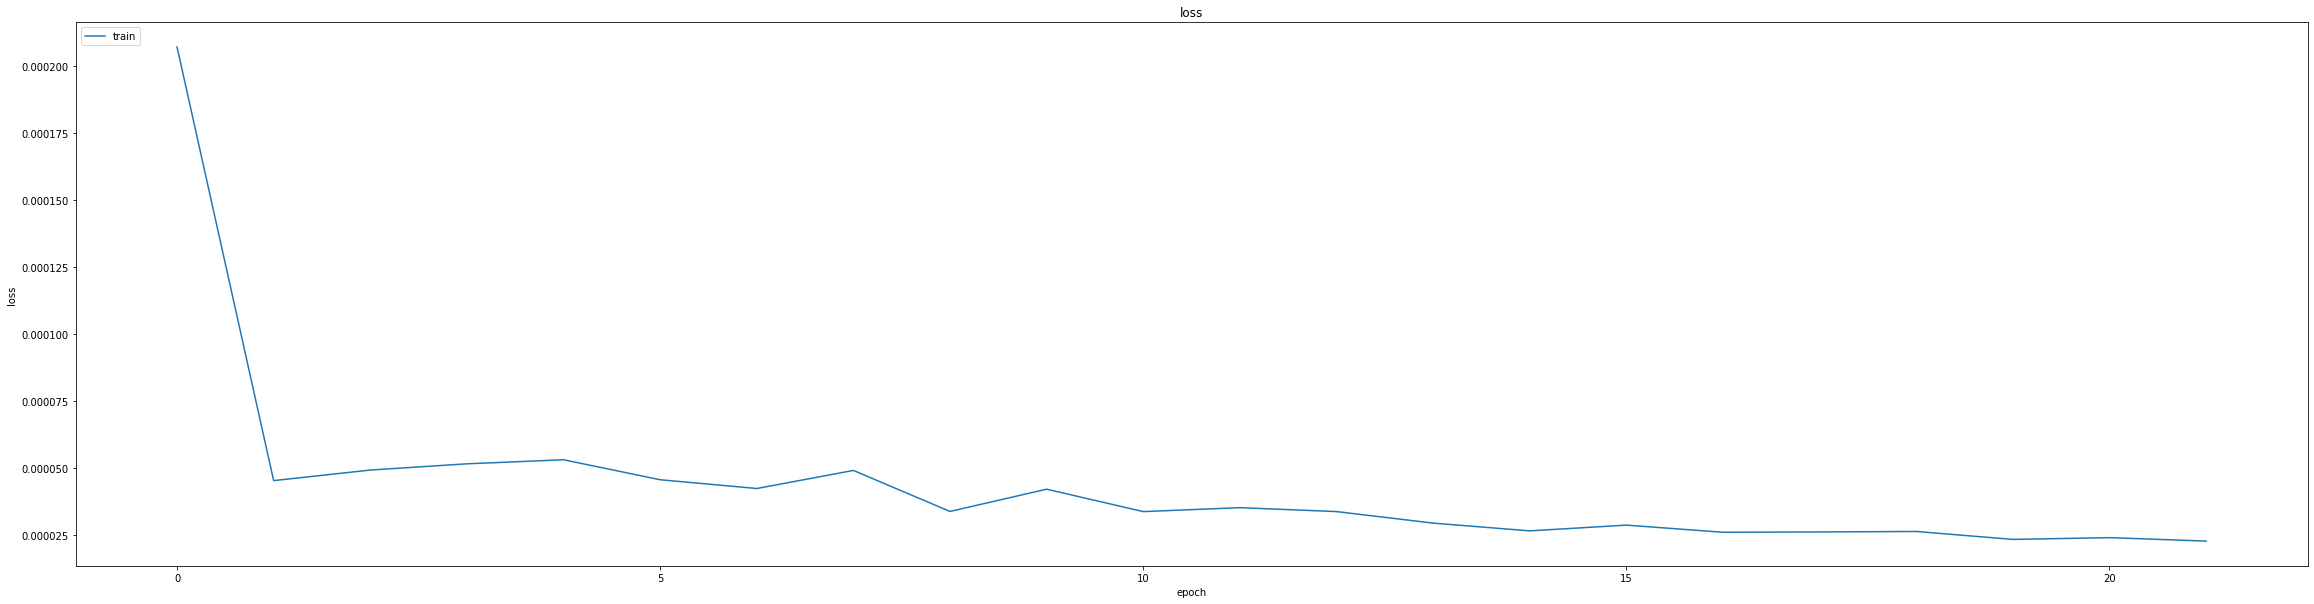

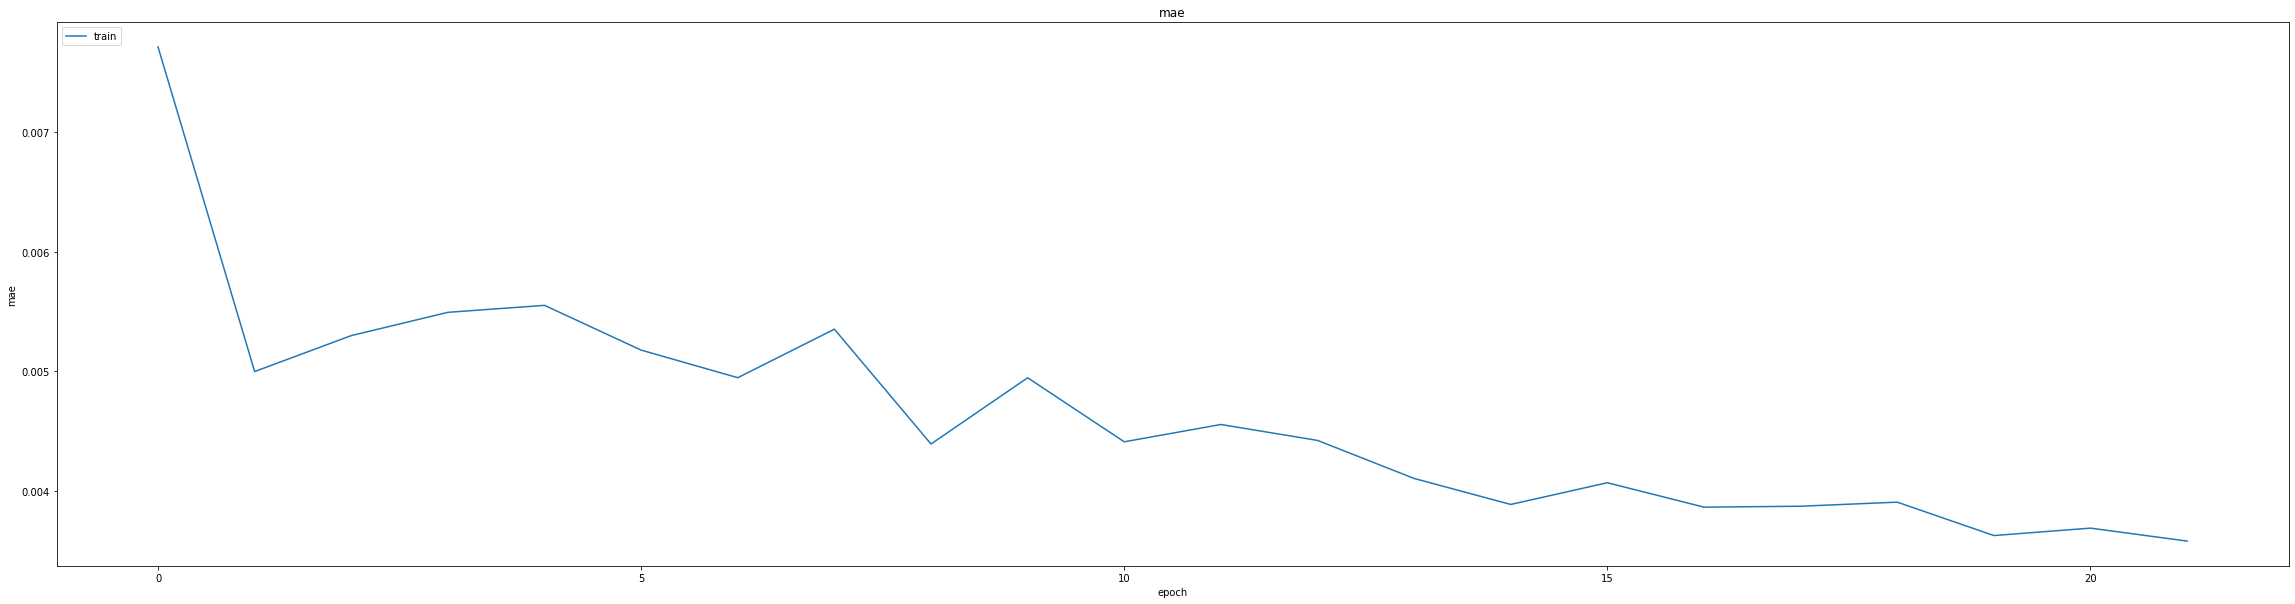

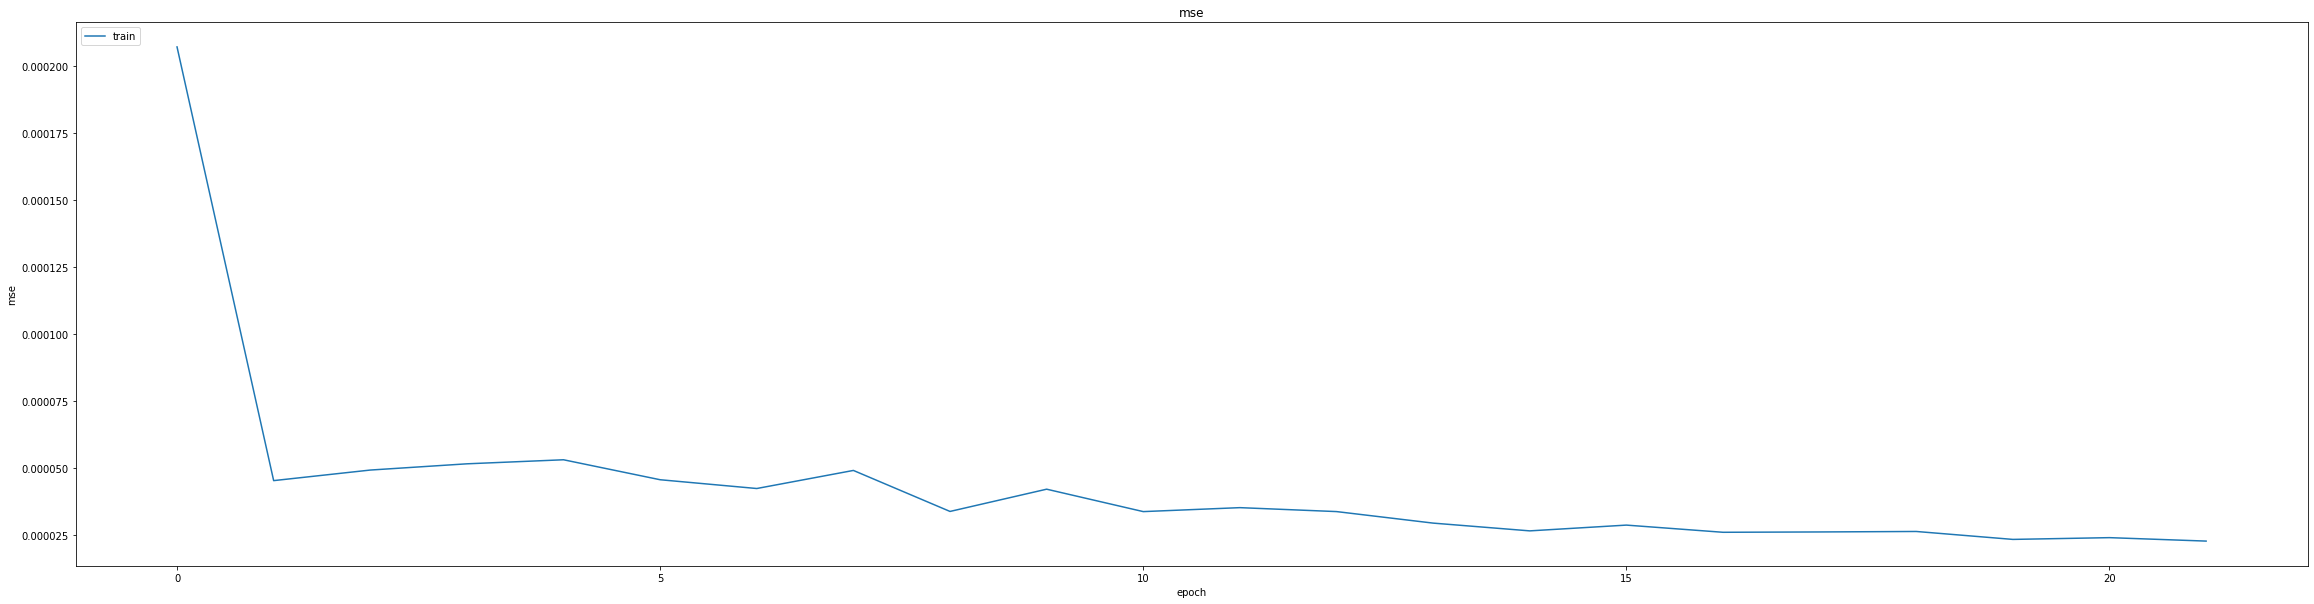

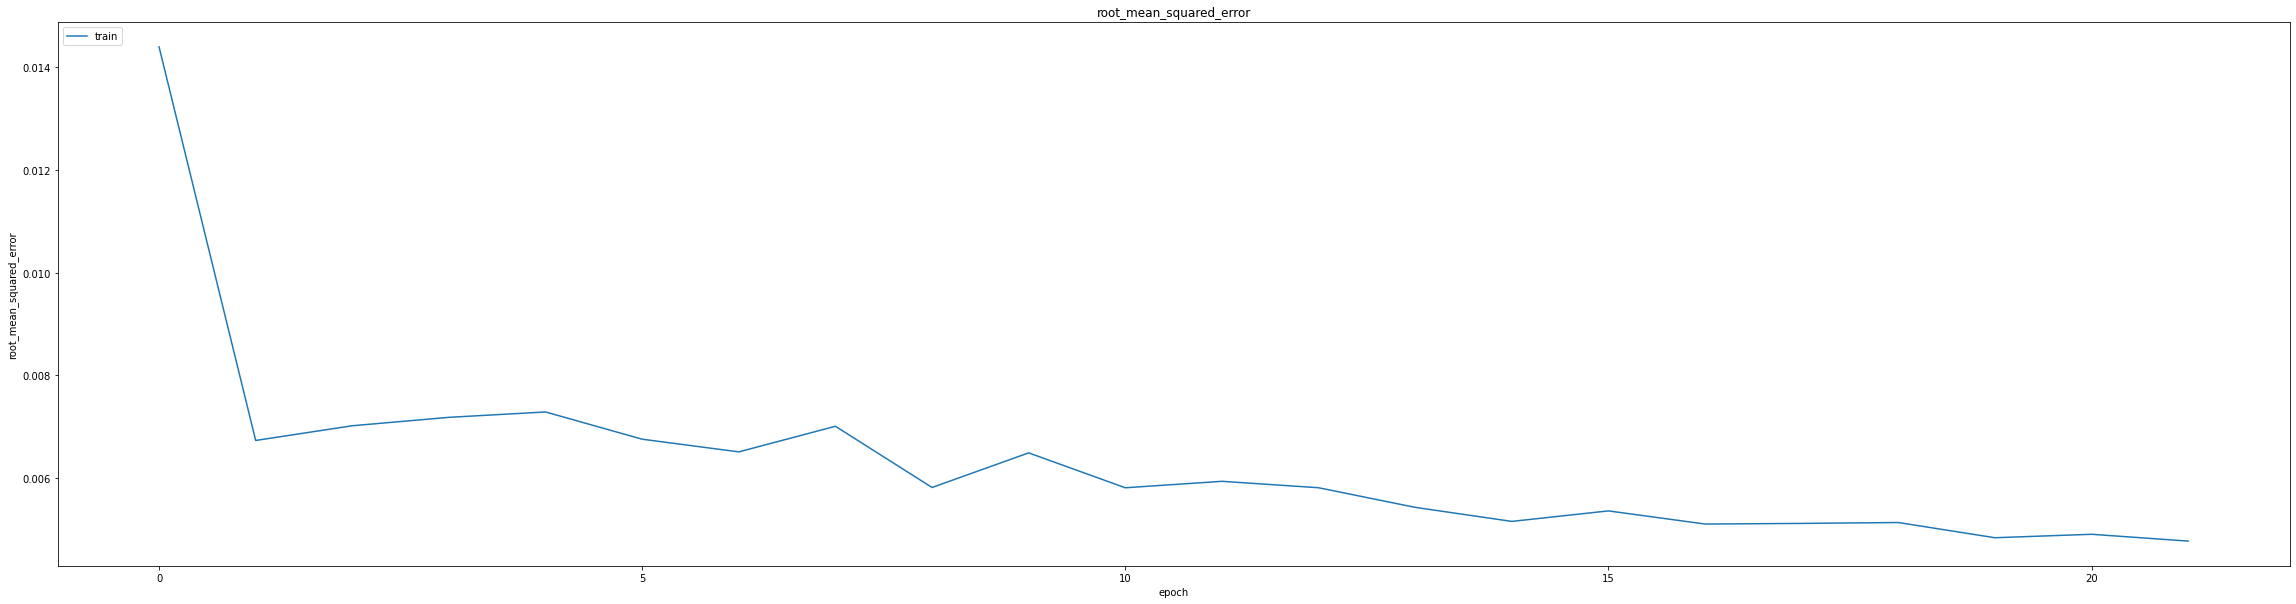

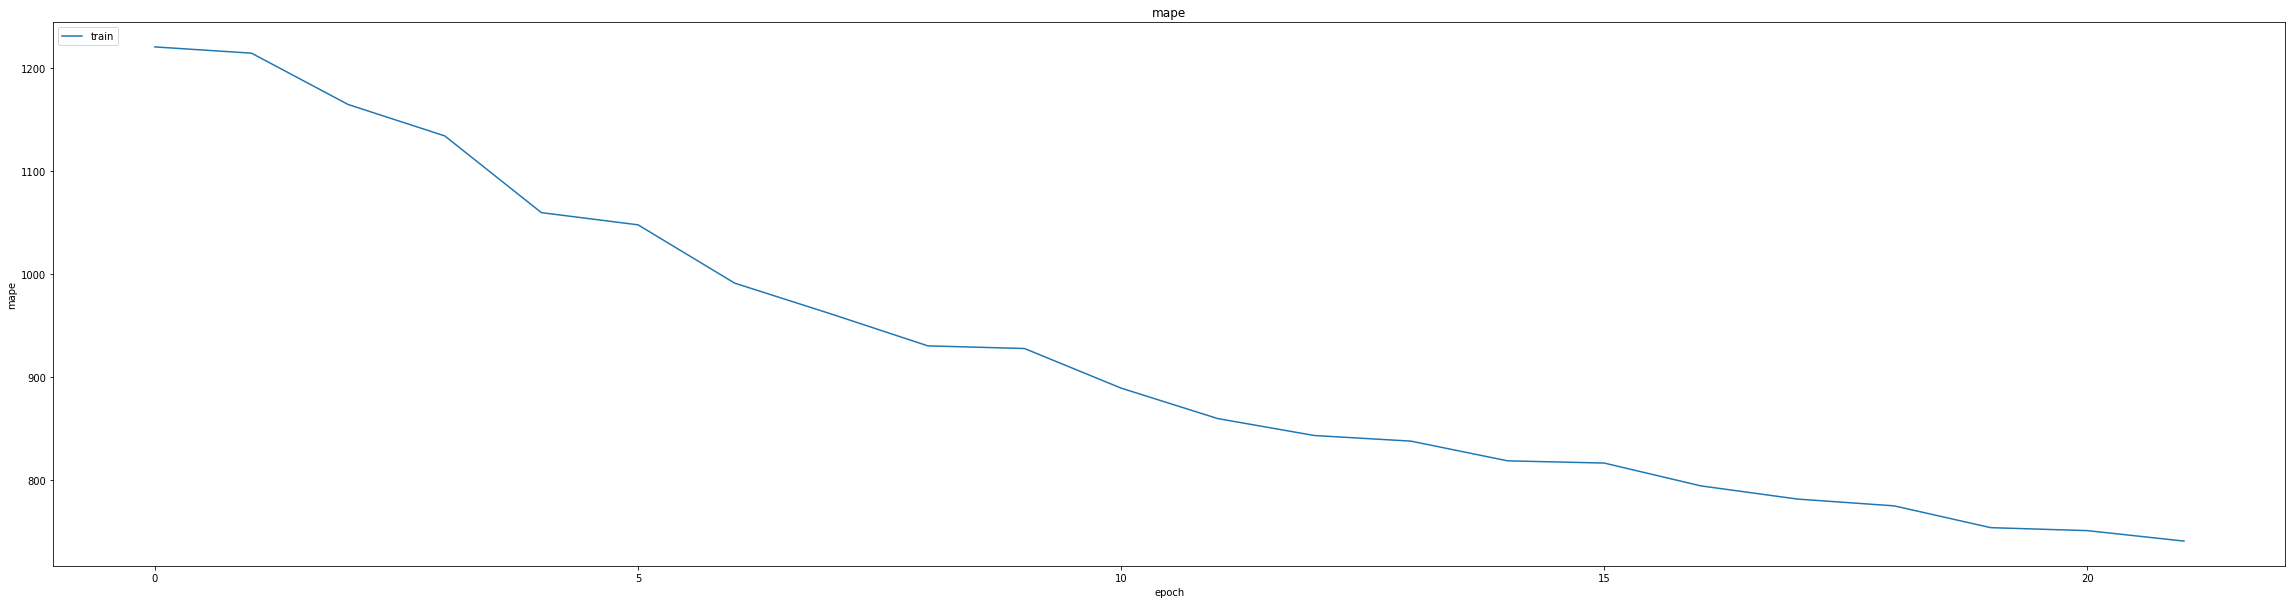

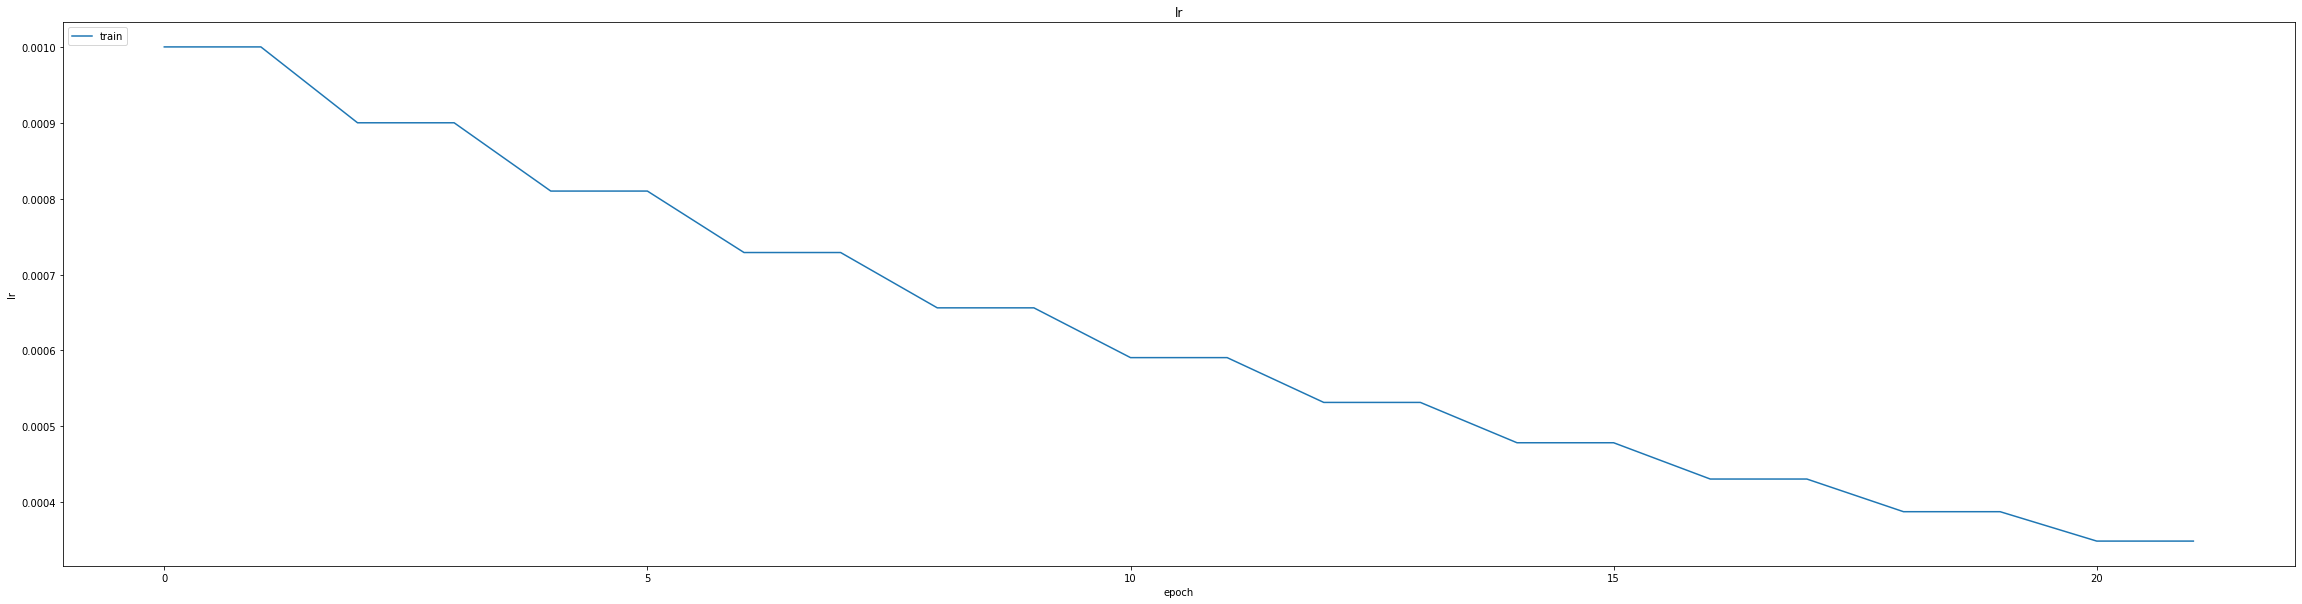

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012068560346961021
0.01386172790080309
348/348 [==============================] - 3s 6ms/step
0.9902327268129655


348/348 [==============================] - 2s 5ms/step


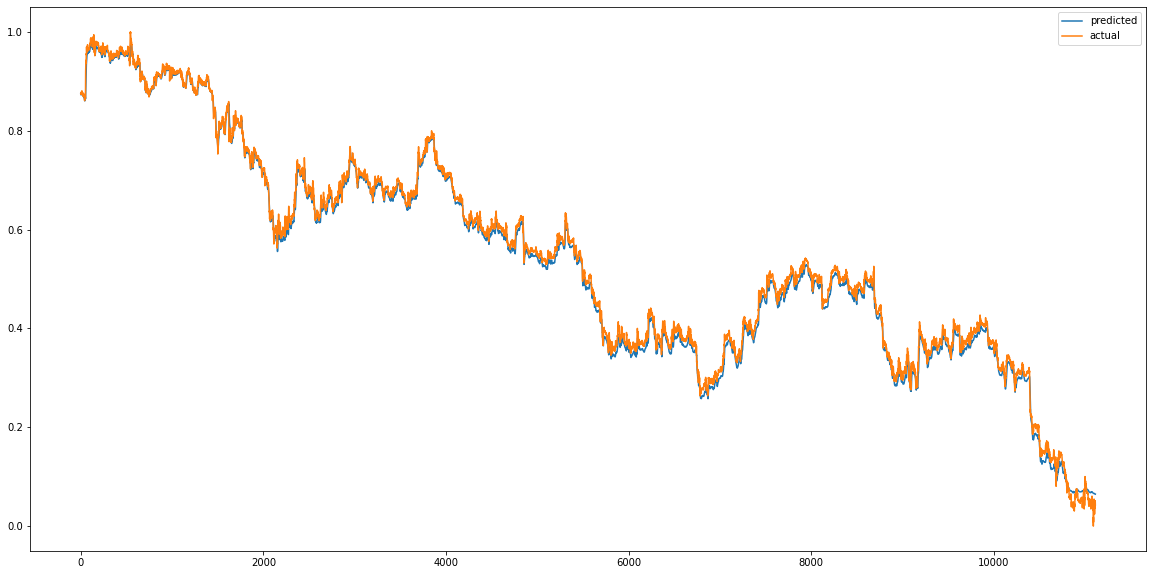

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


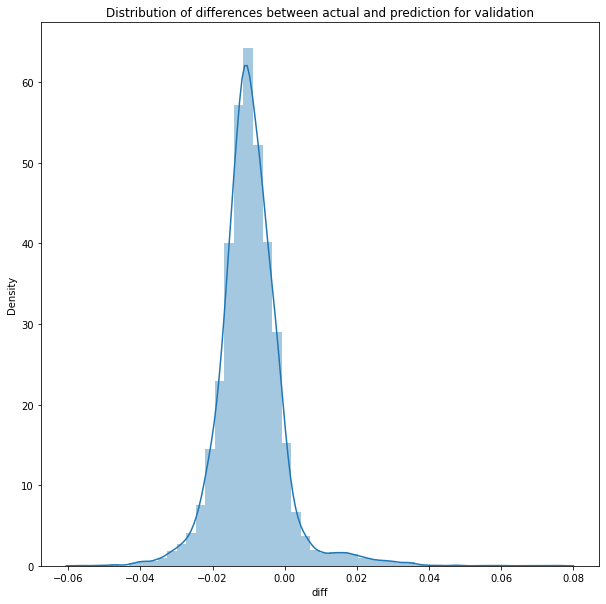

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 4ms/step


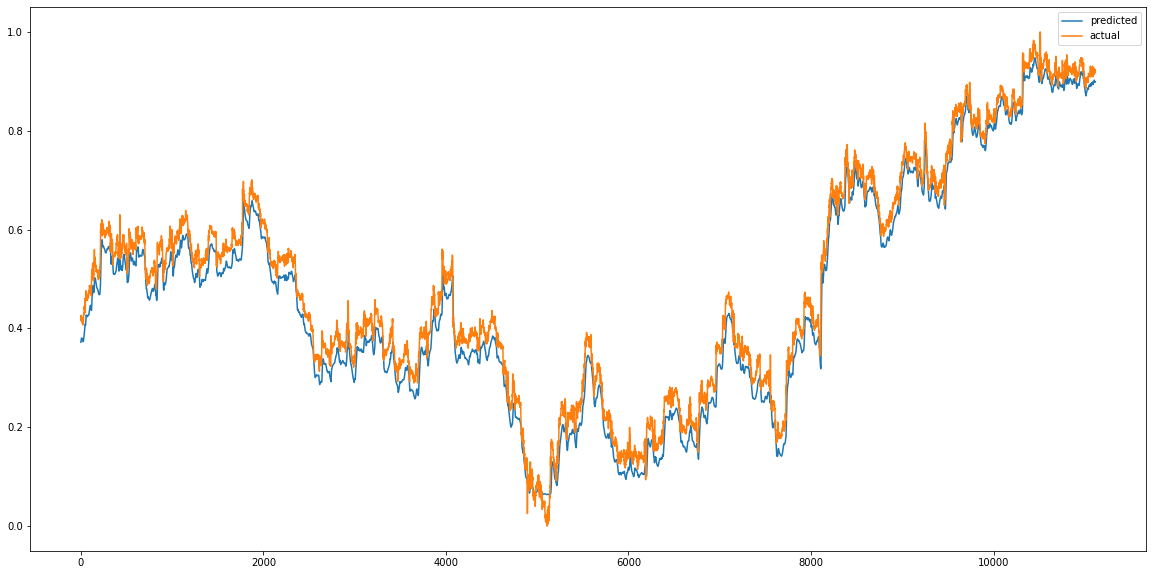

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


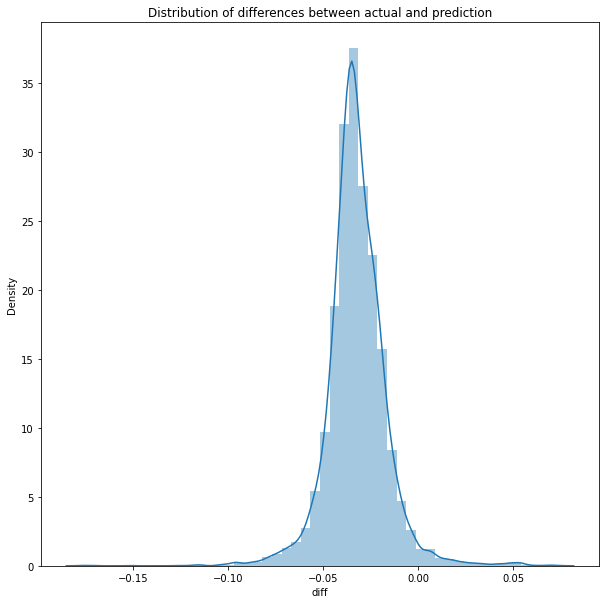

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',r2_scr)


predictions['diff'].describe()

MSE :  0.0013000279912408464
MAE :  0.03327958980396245
RMSE  : 0.036055900921220185
348/348 [==============================] - 2s 7ms/step
R2_Score  : 0.9755325396686838


count    11116.000000
mean        -0.032419
std          0.015781
min         -0.177684
25%         -0.040197
50%         -0.033271
75%         -0.024485
max          0.074425
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_5 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_7 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_6 (GRU)                 (None, 16)                3936      
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
403/406 [============================>.] - ETA: 0s - loss: 386.8161 - mae: 4.0402 - mse: 386.8161 - root_mean_squared_error: 19.6676 - mape: 22168.8105
Epoch 1: val_mse improved from inf to 0.05163, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 24s 49ms/step - loss: 383.9954 - mae: 4.0125 - mse: 383.9954 - root_mean_squared_error: 19.5958 - mape: 22007.8223 - val_loss: 0.0516 - val_mae: 0.1888 - val_mse: 0.0516 - val_root_mean_squared_error: 0.2272 - val_mape: 51515.7227
Epoch 2/75
403/406 [============================>.] - ETA: 0s - loss: 0.0632 - mae: 0.2150 - mse: 0.0632 - root_mean_squared_error: 0.2513 - mape: 10412.5625
Epoch 2: val_mse improved from 0.05163 to 0.05134, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 0.0632 - mae: 0.2150 - mse: 0.0632 - root_mean_squared_error: 0.2513 - mape: 10337.1465 - val_loss: 0.0513 - val_mae: 0.1870 - val_mse: 0.0513 - val_root_mean_squared_error: 0.2266 - val_mape: 48594.4102
Epoch 3/75
405/406 [============================>.] - ETA: 0s - loss: 0.0627 - mae: 0.2154 - mse: 0.0627 - root_mean_squared_error: 0.2504 - mape: 11036.9893
Epoch 3: val_mse improved from 0.05134 to 0.05115, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0627 - mae: 0.2154 - mse: 0.0627 - root_mean_squared_error: 0.2503 - mape: 11011.0029 - val_loss: 0.0511 - val_mae: 0.1865 - val_mse: 0.0511 - val_root_mean_squared_error: 0.2262 - val_mape: 48304.9102
Epoch 4/75
403/406 [============================>.] - ETA: 0s - loss: 0.0624 - mae: 0.2150 - mse: 0.0624 - root_mean_squared_error: 0.2499 - mape: 10673.5469
Epoch 4: val_mse improved from 0.05115 to 0.05092, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 21s 52ms/step - loss: 0.0624 - mae: 0.2150 - mse: 0.0624 - root_mean_squared_error: 0.2499 - mape: 10596.3135 - val_loss: 0.0509 - val_mae: 0.1859 - val_mse: 0.0509 - val_root_mean_squared_error: 0.2257 - val_mape: 47956.2344
Epoch 5/75
406/406 [==============================] - ETA: 0s - loss: 0.0619 - mae: 0.2140 - mse: 0.0619 - root_mean_squared_error: 0.2488 - mape: 10462.3438
Epoch 5: val_mse improved from 0.05092 to 0.05035, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 16s 38ms/step - loss: 0.0619 - mae: 0.2140 - mse: 0.0619 - root_mean_squared_error: 0.2488 - mape: 10462.3438 - val_loss: 0.0504 - val_mae: 0.1851 - val_mse: 0.0504 - val_root_mean_squared_error: 0.2244 - val_mape: 48163.5078
Epoch 6/75
403/406 [============================>.] - ETA: 0s - loss: 0.0618 - mae: 0.2143 - mse: 0.0618 - root_mean_squared_error: 0.2486 - mape: 11256.8027
Epoch 6: val_mse improved from 0.05035 to 0.05015, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0618 - mae: 0.2141 - mse: 0.0618 - root_mean_squared_error: 0.2485 - mape: 11175.2686 - val_loss: 0.0501 - val_mae: 0.1849 - val_mse: 0.0501 - val_root_mean_squared_error: 0.2239 - val_mape: 48359.4375
Epoch 7/75
403/406 [============================>.] - ETA: 0s - loss: 0.0614 - mae: 0.2133 - mse: 0.0614 - root_mean_squared_error: 0.2477 - mape: 11436.2334
Epoch 7: val_mse improved from 0.05015 to 0.05012, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0613 - mae: 0.2132 - mse: 0.0613 - root_mean_squared_error: 0.2477 - mape: 11353.3604 - val_loss: 0.0501 - val_mae: 0.1845 - val_mse: 0.0501 - val_root_mean_squared_error: 0.2239 - val_mape: 47689.5820
Epoch 8/75
404/406 [============================>.] - ETA: 0s - loss: 0.0607 - mae: 0.2121 - mse: 0.0607 - root_mean_squared_error: 0.2465 - mape: 11300.2500
Epoch 8: val_mse improved from 0.05012 to 0.04969, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0607 - mae: 0.2121 - mse: 0.0607 - root_mean_squared_error: 0.2464 - mape: 11245.9883 - val_loss: 0.0497 - val_mae: 0.1836 - val_mse: 0.0497 - val_root_mean_squared_error: 0.2229 - val_mape: 47334.6953
Epoch 9/75
402/406 [============================>.] - ETA: 0s - loss: 0.0597 - mae: 0.2101 - mse: 0.0597 - root_mean_squared_error: 0.2444 - mape: 12300.7100
Epoch 9: val_mse improved from 0.04969 to 0.04797, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0597 - mae: 0.2100 - mse: 0.0597 - root_mean_squared_error: 0.2443 - mape: 12181.3125 - val_loss: 0.0480 - val_mae: 0.1809 - val_mse: 0.0480 - val_root_mean_squared_error: 0.2190 - val_mape: 47226.7461
Epoch 10/75
405/406 [============================>.] - ETA: 0s - loss: 0.0558 - mae: 0.2023 - mse: 0.0558 - root_mean_squared_error: 0.2361 - mape: 9932.2539 
Epoch 10: val_mse improved from 0.04797 to 0.04155, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0558 - mae: 0.2023 - mse: 0.0558 - root_mean_squared_error: 0.2361 - mape: 9908.9102 - val_loss: 0.0416 - val_mae: 0.1673 - val_mse: 0.0416 - val_root_mean_squared_error: 0.2038 - val_mape: 43095.4414
Epoch 11/75
401/406 [============================>.] - ETA: 0s - loss: 0.0369 - mae: 0.1586 - mse: 0.0369 - root_mean_squared_error: 0.1921 - mape: 9985.0410 
Epoch 11: val_mse improved from 0.04155 to 0.00912, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0367 - mae: 0.1580 - mse: 0.0367 - root_mean_squared_error: 0.1915 - mape: 9863.4775 - val_loss: 0.0091 - val_mae: 0.0687 - val_mse: 0.0091 - val_root_mean_squared_error: 0.0955 - val_mape: 27925.9727
Epoch 12/75
406/406 [==============================] - ETA: 0s - loss: 0.0115 - mae: 0.0837 - mse: 0.0115 - root_mean_squared_error: 0.1074 - mape: 5256.8062
Epoch 12: val_mse improved from 0.00912 to 0.00523, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0115 - mae: 0.0837 - mse: 0.0115 - root_mean_squared_error: 0.1074 - mape: 5256.8062 - val_loss: 0.0052 - val_mae: 0.0627 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0723 - val_mape: 20184.5410
Epoch 13/75
402/406 [============================>.] - ETA: 0s - loss: 0.0061 - mae: 0.0613 - mse: 0.0061 - root_mean_squared_error: 0.0780 - mape: 4343.3848
Epoch 13: val_mse improved from 0.00523 to 0.00267, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0061 - mae: 0.0612 - mse: 0.0061 - root_mean_squared_error: 0.0780 - mape: 4301.1597 - val_loss: 0.0027 - val_mae: 0.0429 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0516 - val_mape: 16563.9512
Epoch 14/75
406/406 [==============================] - ETA: 0s - loss: 0.0038 - mae: 0.0485 - mse: 0.0038 - root_mean_squared_error: 0.0618 - mape: 3138.5479
Epoch 14: val_mse improved from 0.00267 to 0.00151, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0038 - mae: 0.0485 - mse: 0.0038 - root_mean_squared_error: 0.0618 - mape: 3138.5479 - val_loss: 0.0015 - val_mae: 0.0313 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0389 - val_mape: 13920.3877
Epoch 15/75
404/406 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0407 - mse: 0.0027 - root_mean_squared_error: 0.0518 - mape: 2977.5498
Epoch 15: val_mse improved from 0.00151 to 0.00141, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0027 - mae: 0.0407 - mse: 0.0027 - root_mean_squared_error: 0.0518 - mape: 2963.2134 - val_loss: 0.0014 - val_mae: 0.0299 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0376 - val_mape: 12431.9736
Epoch 16/75
406/406 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0363 - mse: 0.0021 - root_mean_squared_error: 0.0463 - mape: 2890.4631
Epoch 16: val_mse did not improve from 0.00141
406/406 [==============================] - 5s 11ms/step - loss: 0.0021 - mae: 0.0363 - mse: 0.0021 - root_mean_squared_error: 0.0463 - mape: 2890.4631 - val_loss: 0.0017 - val_mae: 0.0324 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0410 - val_mape: 11406.0635
Epoch 17/75
406/406 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0326 - mse: 0.0017 - root_mean_squared_error: 0.0416 - mape: 2515.9333
Epoch 17: val_mse improved from 0.00141 to 0.00106, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 15s 36ms/step - loss: 0.0017 - mae: 0.0326 - mse: 0.0017 - root_mean_squared_error: 0.0416 - mape: 2515.9333 - val_loss: 0.0011 - val_mae: 0.0248 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 10697.9805
Epoch 18/75
402/406 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0297 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 2473.1729
Epoch 18: val_mse improved from 0.00106 to 0.00086, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0014 - mae: 0.0297 - mse: 0.0014 - root_mean_squared_error: 0.0378 - mape: 2449.1311 - val_loss: 8.5538e-04 - val_mae: 0.0214 - val_mse: 8.5538e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 10221.2861
Epoch 19/75
404/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0275 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 2145.8442
Epoch 19: val_mse improved from 0.00086 to 0.00076, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0012 - mae: 0.0275 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 2135.5183 - val_loss: 7.6252e-04 - val_mae: 0.0202 - val_mse: 7.6252e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 9816.1113
Epoch 20/75
403/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0260 - mse: 0.0011 - root_mean_squared_error: 0.0333 - mape: 2236.3936
Epoch 20: val_mse improved from 0.00076 to 0.00063, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0011 - mae: 0.0260 - mse: 0.0011 - root_mean_squared_error: 0.0333 - mape: 2220.1262 - val_loss: 6.3146e-04 - val_mae: 0.0186 - val_mse: 6.3146e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 9576.7842
Epoch 21/75
404/406 [============================>.] - ETA: 0s - loss: 9.8040e-04 - mae: 0.0244 - mse: 9.8040e-04 - root_mean_squared_error: 0.0313 - mape: 2603.2080
Epoch 21: val_mse did not improve from 0.00063
406/406 [==============================] - 5s 11ms/step - loss: 9.7986e-04 - mae: 0.0244 - mse: 9.7986e-04 - root_mean_squared_error: 0.0313 - mape: 2590.6660 - val_loss: 7.8911e-04 - val_mae: 0.0213 - val_mse: 7.8911e-04 - val_root_mean_squared_error: 0.0281 - val_mape: 9208.0098
Epoch 22/75
402/406 [============================>.] - ETA: 0s - loss: 8.8662e-04 - mae: 0.0231 - mse: 8.8662e-04 - root_mean_squared_error: 0.0298 - mape: 2257.0786
Epoch 22: val_mse improved from 0.00063 to 0.00057, saving model

406/406 [==============================] - 16s 39ms/step - loss: 8.8716e-04 - mae: 0.0232 - mse: 8.8716e-04 - root_mean_squared_error: 0.0298 - mape: 2235.1797 - val_loss: 5.6662e-04 - val_mae: 0.0181 - val_mse: 5.6662e-04 - val_root_mean_squared_error: 0.0238 - val_mape: 9125.8330
Epoch 23/75
404/406 [============================>.] - ETA: 0s - loss: 7.9938e-04 - mae: 0.0220 - mse: 7.9938e-04 - root_mean_squared_error: 0.0283 - mape: 2168.2998
Epoch 23: val_mse did not improve from 0.00057
406/406 [==============================] - 5s 11ms/step - loss: 7.9895e-04 - mae: 0.0220 - mse: 7.9895e-04 - root_mean_squared_error: 0.0283 - mape: 2157.8674 - val_loss: 6.6691e-04 - val_mae: 0.0197 - val_mse: 6.6691e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 8745.1709
Epoch 24/75
405/406 [============================>.] - ETA: 0s - loss: 7.1677e-04 - mae: 0.0208 - mse: 7.1677e-04 - root_mean_squared_error: 0.0268 - mape: 2038.8740
Epoch 24: val_mse did not improve from 0.00057
406/406 [

406/406 [==============================] - 15s 37ms/step - loss: 6.3027e-04 - mae: 0.0194 - mse: 6.3027e-04 - root_mean_squared_error: 0.0251 - mape: 2114.2319 - val_loss: 5.1637e-04 - val_mae: 0.0172 - val_mse: 5.1637e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 8144.5972
Epoch 27/75
404/406 [============================>.] - ETA: 0s - loss: 5.8478e-04 - mae: 0.0187 - mse: 5.8478e-04 - root_mean_squared_error: 0.0242 - mape: 2024.1957
Epoch 27: val_mse did not improve from 0.00052
406/406 [==============================] - 5s 12ms/step - loss: 5.8481e-04 - mae: 0.0187 - mse: 5.8481e-04 - root_mean_squared_error: 0.0242 - mape: 2014.4401 - val_loss: 5.4999e-04 - val_mae: 0.0176 - val_mse: 5.4999e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 8015.4736
Epoch 28/75
403/406 [============================>.] - ETA: 0s - loss: 5.5859e-04 - mae: 0.0183 - mse: 5.5859e-04 - root_mean_squared_error: 0.0236 - mape: 1938.7046
Epoch 28: val_mse improved from 0.00052 to 0.00051, savi

406/406 [==============================] - 14s 36ms/step - loss: 5.5842e-04 - mae: 0.0183 - mse: 5.5842e-04 - root_mean_squared_error: 0.0236 - mape: 1924.6116 - val_loss: 5.0689e-04 - val_mae: 0.0170 - val_mse: 5.0689e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 7898.1929
Epoch 29/75
402/406 [============================>.] - ETA: 0s - loss: 5.2458e-04 - mae: 0.0177 - mse: 5.2458e-04 - root_mean_squared_error: 0.0229 - mape: 1804.1700
Epoch 29: val_mse did not improve from 0.00051
406/406 [==============================] - 5s 12ms/step - loss: 5.2537e-04 - mae: 0.0178 - mse: 5.2537e-04 - root_mean_squared_error: 0.0229 - mape: 1786.6118 - val_loss: 6.4654e-04 - val_mae: 0.0197 - val_mse: 6.4654e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 7693.1230
Epoch 30/75
404/406 [============================>.] - ETA: 0s - loss: 4.9783e-04 - mae: 0.0174 - mse: 4.9783e-04 - root_mean_squared_error: 0.0223 - mape: 1797.7996
Epoch 30: val_mse did not improve from 0.00051
406/406 [

406/406 [==============================] - 15s 37ms/step - loss: 4.1874e-04 - mae: 0.0158 - mse: 4.1874e-04 - root_mean_squared_error: 0.0205 - mape: 1734.7941 - val_loss: 4.9514e-04 - val_mae: 0.0168 - val_mse: 4.9514e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 7364.8574
Epoch 34/75
406/406 [==============================] - ETA: 0s - loss: 4.0721e-04 - mae: 0.0156 - mse: 4.0721e-04 - root_mean_squared_error: 0.0202 - mape: 1699.4221
Epoch 34: val_mse did not improve from 0.00050
406/406 [==============================] - 5s 12ms/step - loss: 4.0721e-04 - mae: 0.0156 - mse: 4.0721e-04 - root_mean_squared_error: 0.0202 - mape: 1699.4221 - val_loss: 5.6287e-04 - val_mae: 0.0183 - val_mse: 5.6287e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 7207.2822
Epoch 35/75
403/406 [============================>.] - ETA: 0s - loss: 4.0208e-04 - mae: 0.0155 - mse: 4.0208e-04 - root_mean_squared_error: 0.0201 - mape: 1888.9135
Epoch 35: val_mse did not improve from 0.00050
406/406 [

406/406 [==============================] - 15s 38ms/step - loss: 3.2288e-04 - mae: 0.0138 - mse: 3.2288e-04 - root_mean_squared_error: 0.0180 - mape: 1485.2942 - val_loss: 4.1242e-04 - val_mae: 0.0152 - val_mse: 4.1242e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 7078.4180
Epoch 41/75
402/406 [============================>.] - ETA: 0s - loss: 3.1773e-04 - mae: 0.0137 - mse: 3.1773e-04 - root_mean_squared_error: 0.0178 - mape: 1841.3911
Epoch 41: val_mse did not improve from 0.00041
406/406 [==============================] - 5s 13ms/step - loss: 3.1696e-04 - mae: 0.0136 - mse: 3.1696e-04 - root_mean_squared_error: 0.0178 - mape: 1823.4690 - val_loss: 4.7050e-04 - val_mae: 0.0166 - val_mse: 4.7050e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 7038.3726
Epoch 42/75
402/406 [============================>.] - ETA: 0s - loss: 3.0496e-04 - mae: 0.0134 - mse: 3.0496e-04 - root_mean_squared_error: 0.0175 - mape: 1593.0226
Epoch 42: val_mse improved from 0.00041 to 0.00036, savi

406/406 [==============================] - 15s 37ms/step - loss: 3.0533e-04 - mae: 0.0134 - mse: 3.0533e-04 - root_mean_squared_error: 0.0175 - mape: 1577.5209 - val_loss: 3.5941e-04 - val_mae: 0.0139 - val_mse: 3.5941e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 6805.3652
Epoch 43/75
406/406 [==============================] - ETA: 0s - loss: 3.0489e-04 - mae: 0.0134 - mse: 3.0489e-04 - root_mean_squared_error: 0.0175 - mape: 1577.0077
Epoch 43: val_mse improved from 0.00036 to 0.00035, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 3.0489e-04 - mae: 0.0134 - mse: 3.0489e-04 - root_mean_squared_error: 0.0175 - mape: 1577.0077 - val_loss: 3.4678e-04 - val_mae: 0.0136 - val_mse: 3.4678e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 6724.0264
Epoch 44/75
403/406 [============================>.] - ETA: 0s - loss: 2.9484e-04 - mae: 0.0131 - mse: 2.9484e-04 - root_mean_squared_error: 0.0172 - mape: 1644.3687
Epoch 44: val_mse did not improve from 0.00035
406/406 [==============================] - 5s 11ms/step - loss: 2.9454e-04 - mae: 0.0131 - mse: 2.9454e-04 - root_mean_squared_error: 0.0172 - mape: 1632.3997 - val_loss: 5.1983e-04 - val_mae: 0.0178 - val_mse: 5.1983e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 6680.1978
Epoch 45/75
402/406 [============================>.] - ETA: 0s - loss: 2.8849e-04 - mae: 0.0130 - mse: 2.8849e-04 - root_mean_squared_error: 0.0170 - mape: 1627.5831
Epoch 45: val_mse did not improve from 0.00035
406/406 [

406/406 [==============================] - 15s 37ms/step - loss: 2.5499e-04 - mae: 0.0122 - mse: 2.5499e-04 - root_mean_squared_error: 0.0160 - mape: 1312.3077 - val_loss: 3.2435e-04 - val_mae: 0.0132 - val_mse: 3.2435e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 6266.5430
Epoch 51/75
403/406 [============================>.] - ETA: 0s - loss: 2.7018e-04 - mae: 0.0126 - mse: 2.7018e-04 - root_mean_squared_error: 0.0164 - mape: 1449.4255
Epoch 51: val_mse did not improve from 0.00032
406/406 [==============================] - 5s 11ms/step - loss: 2.6974e-04 - mae: 0.0126 - mse: 2.6974e-04 - root_mean_squared_error: 0.0164 - mape: 1438.8737 - val_loss: 3.8938e-04 - val_mae: 0.0150 - val_mse: 3.8938e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 6330.9604
Epoch 52/75
402/406 [============================>.] - ETA: 0s - loss: 2.7410e-04 - mae: 0.0128 - mse: 2.7410e-04 - root_mean_squared_error: 0.0166 - mape: 1387.0802
Epoch 52: val_mse did not improve from 0.00032
406/406 [

406/406 [==============================] - 15s 37ms/step - loss: 2.5316e-04 - mae: 0.0122 - mse: 2.5316e-04 - root_mean_squared_error: 0.0159 - mape: 1421.5511 - val_loss: 3.1446e-04 - val_mae: 0.0130 - val_mse: 3.1446e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 5893.4971
Epoch 56/75
401/406 [============================>.] - ETA: 0s - loss: 2.3352e-04 - mae: 0.0117 - mse: 2.3352e-04 - root_mean_squared_error: 0.0153 - mape: 1187.7578
Epoch 56: val_mse improved from 0.00031 to 0.00029, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 2.3298e-04 - mae: 0.0117 - mse: 2.3298e-04 - root_mean_squared_error: 0.0153 - mape: 1173.2750 - val_loss: 2.9094e-04 - val_mae: 0.0123 - val_mse: 2.9094e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 6042.4019
Epoch 57/75
406/406 [==============================] - ETA: 0s - loss: 2.2108e-04 - mae: 0.0113 - mse: 2.2108e-04 - root_mean_squared_error: 0.0149 - mape: 1330.9917
Epoch 57: val_mse did not improve from 0.00029
406/406 [==============================] - 5s 13ms/step - loss: 2.2108e-04 - mae: 0.0113 - mse: 2.2108e-04 - root_mean_squared_error: 0.0149 - mape: 1330.9917 - val_loss: 6.4047e-04 - val_mae: 0.0210 - val_mse: 6.4047e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 5447.9854
Epoch 58/75
406/406 [==============================] - ETA: 0s - loss: 2.1833e-04 - mae: 0.0113 - mse: 2.1833e-04 - root_mean_squared_error: 0.0148 - mape: 1053.7930
Epoch 58: val_mse did not improve from 0.00029
406/406 [

406/406 [==============================] - 15s 36ms/step - loss: 1.7968e-04 - mae: 0.0104 - mse: 1.7968e-04 - root_mean_squared_error: 0.0134 - mape: 1118.7738 - val_loss: 2.6999e-04 - val_mae: 0.0127 - val_mse: 2.6999e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 4970.4878
Epoch 64/75
406/406 [==============================] - ETA: 0s - loss: 1.8157e-04 - mae: 0.0104 - mse: 1.8157e-04 - root_mean_squared_error: 0.0135 - mape: 1105.9479
Epoch 64: val_mse improved from 0.00027 to 0.00019, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 1.8157e-04 - mae: 0.0104 - mse: 1.8157e-04 - root_mean_squared_error: 0.0135 - mape: 1105.9479 - val_loss: 1.8556e-04 - val_mae: 0.0099 - val_mse: 1.8556e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 4608.3169
Epoch 65/75
405/406 [============================>.] - ETA: 0s - loss: 1.5509e-04 - mae: 0.0096 - mse: 1.5509e-04 - root_mean_squared_error: 0.0125 - mape: 1169.2314
Epoch 65: val_mse did not improve from 0.00019
406/406 [==============================] - 5s 12ms/step - loss: 1.5499e-04 - mae: 0.0096 - mse: 1.5499e-04 - root_mean_squared_error: 0.0124 - mape: 1166.4684 - val_loss: 2.6289e-04 - val_mae: 0.0127 - val_mse: 2.6289e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 4504.2607
Epoch 66/75
402/406 [============================>.] - ETA: 0s - loss: 1.3736e-04 - mae: 0.0091 - mse: 1.3736e-04 - root_mean_squared_error: 0.0117 - mape: 937.4170
Epoch 66: val_mse did not improve from 0.00019
406/406 [=

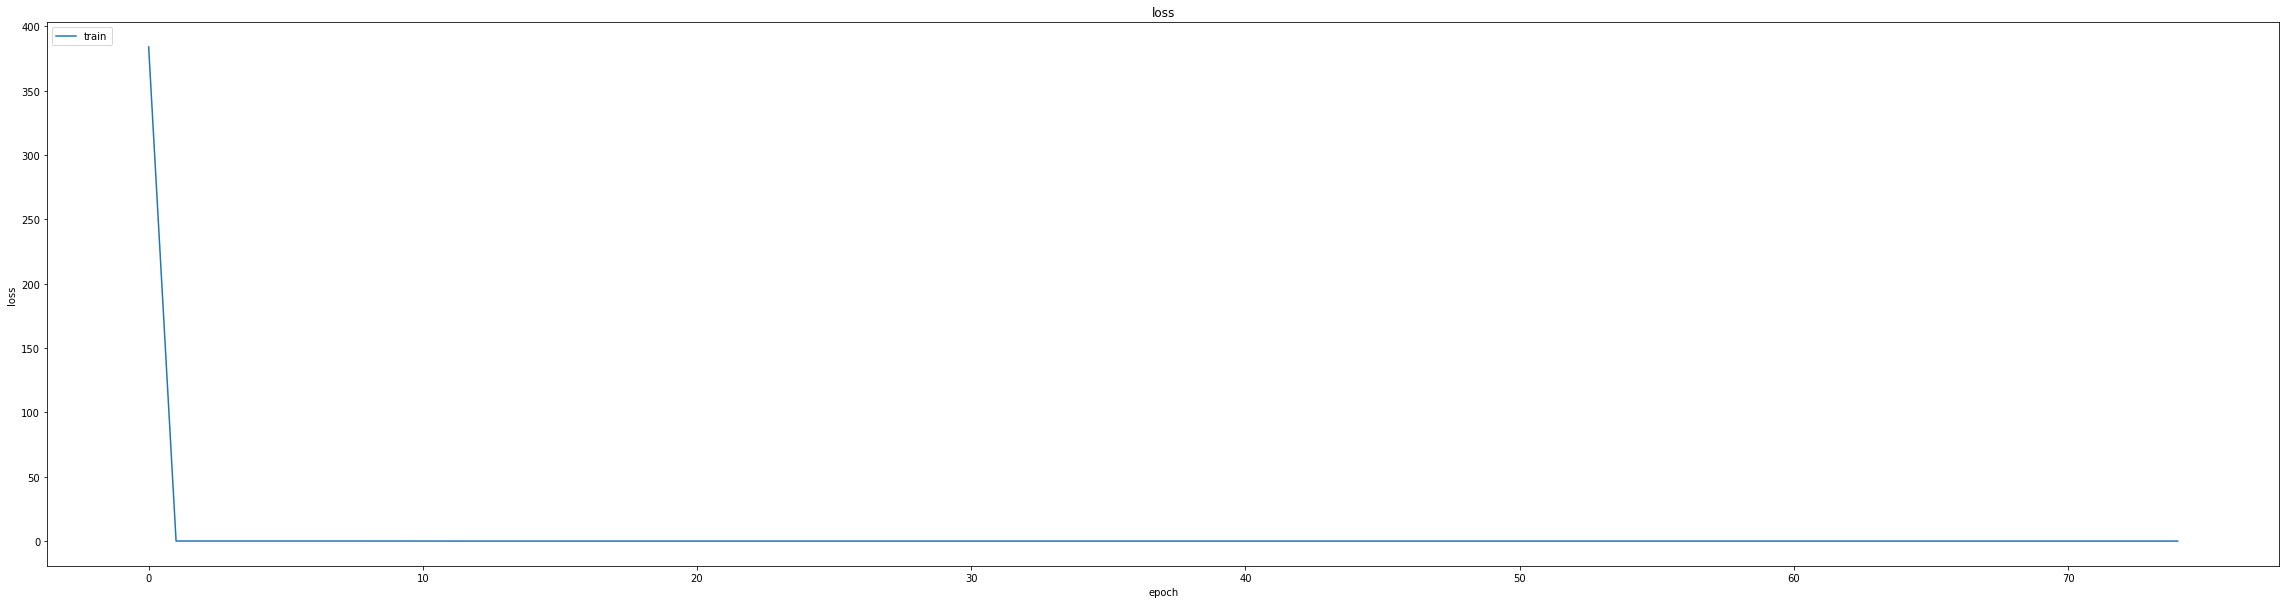

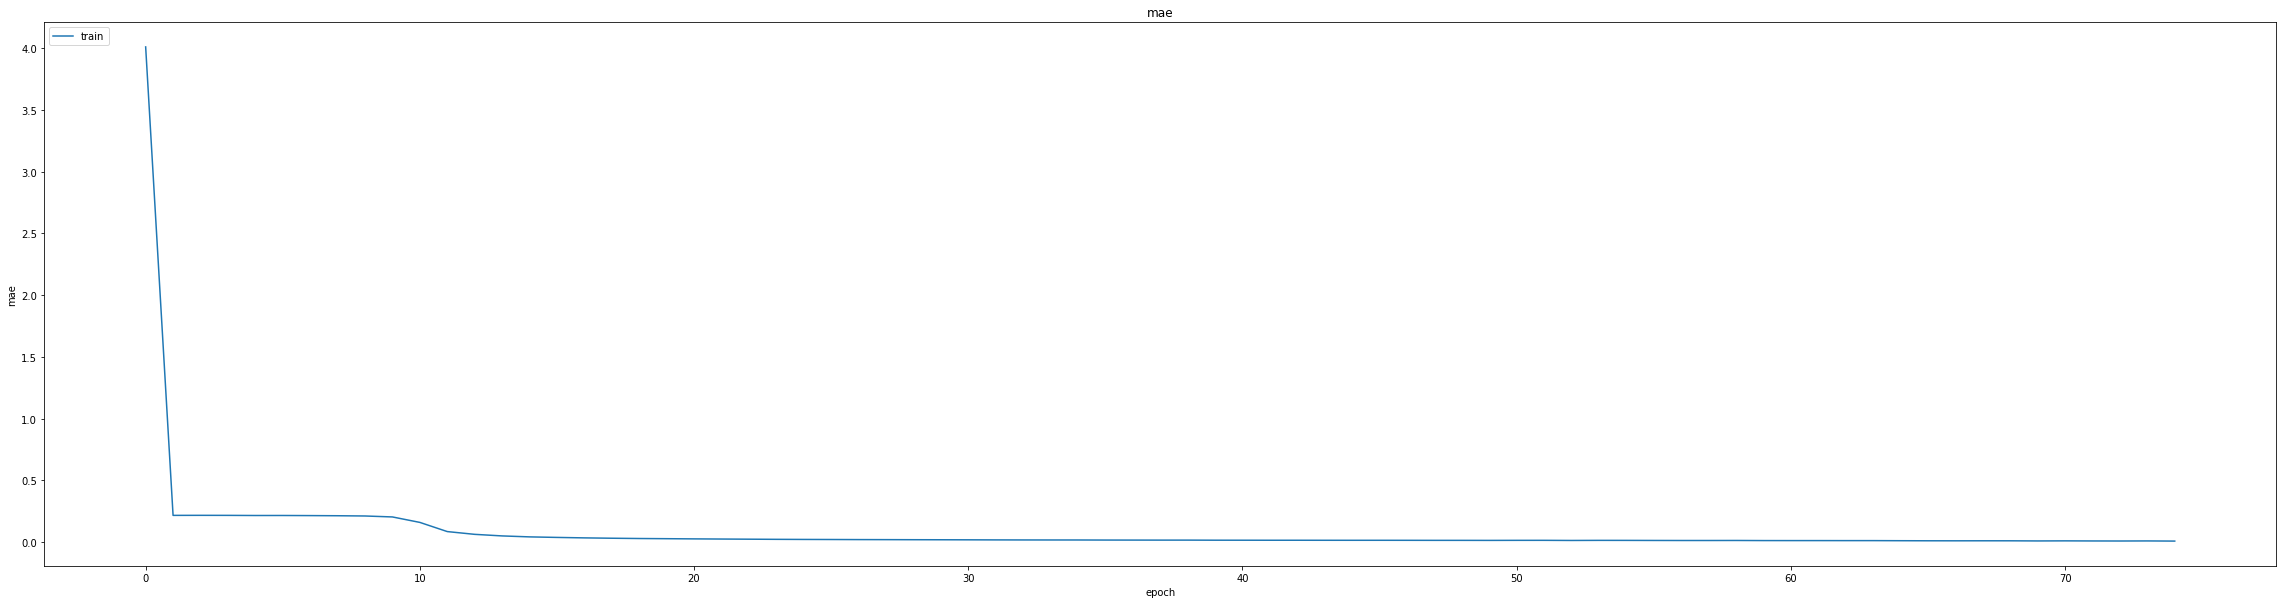

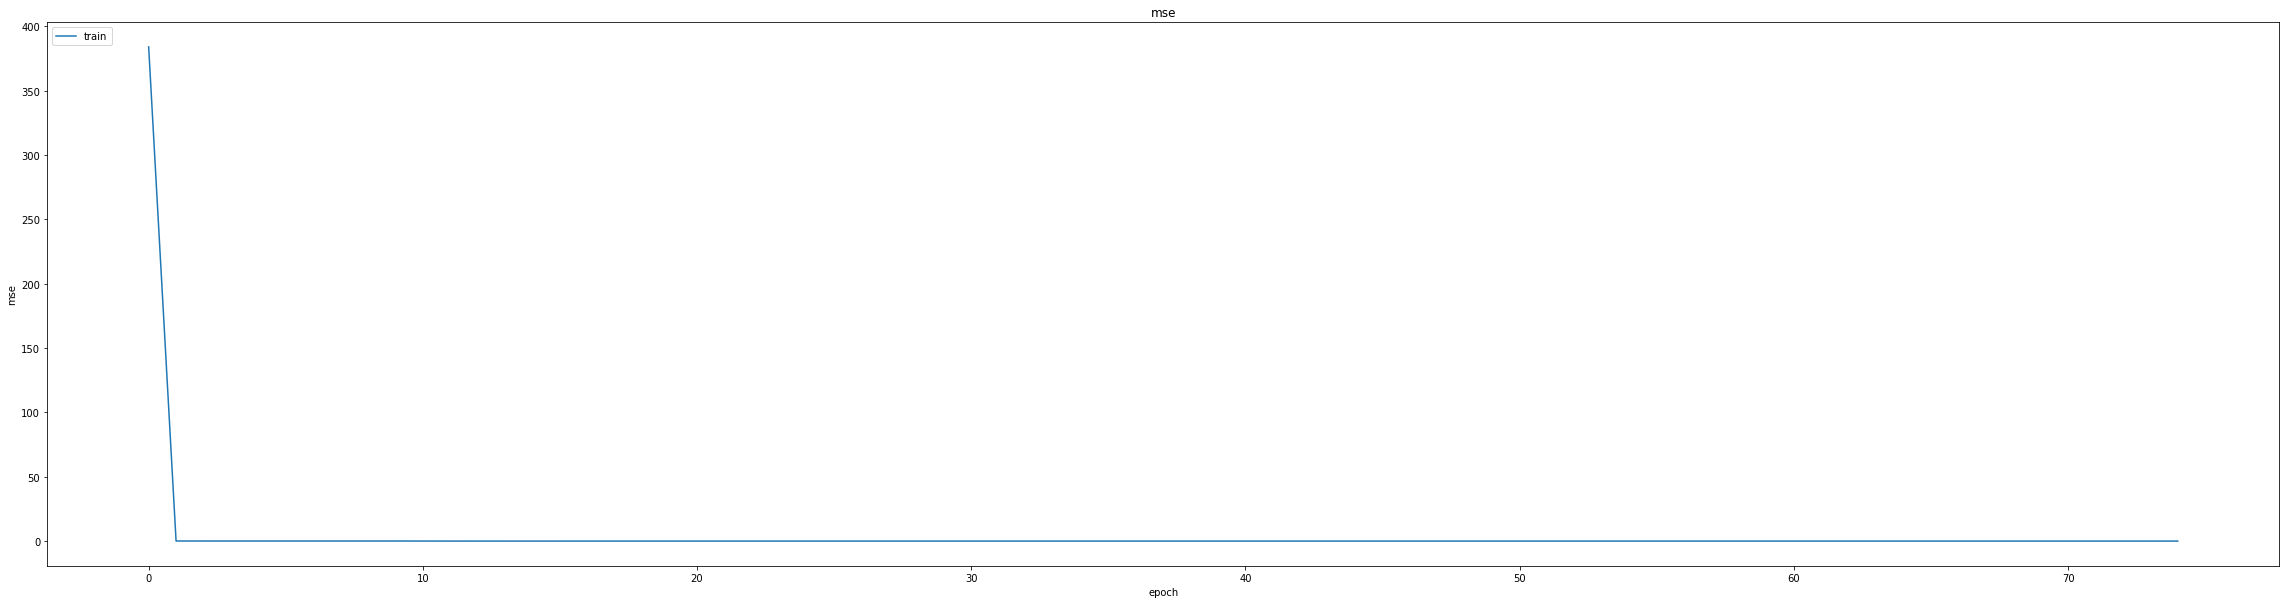

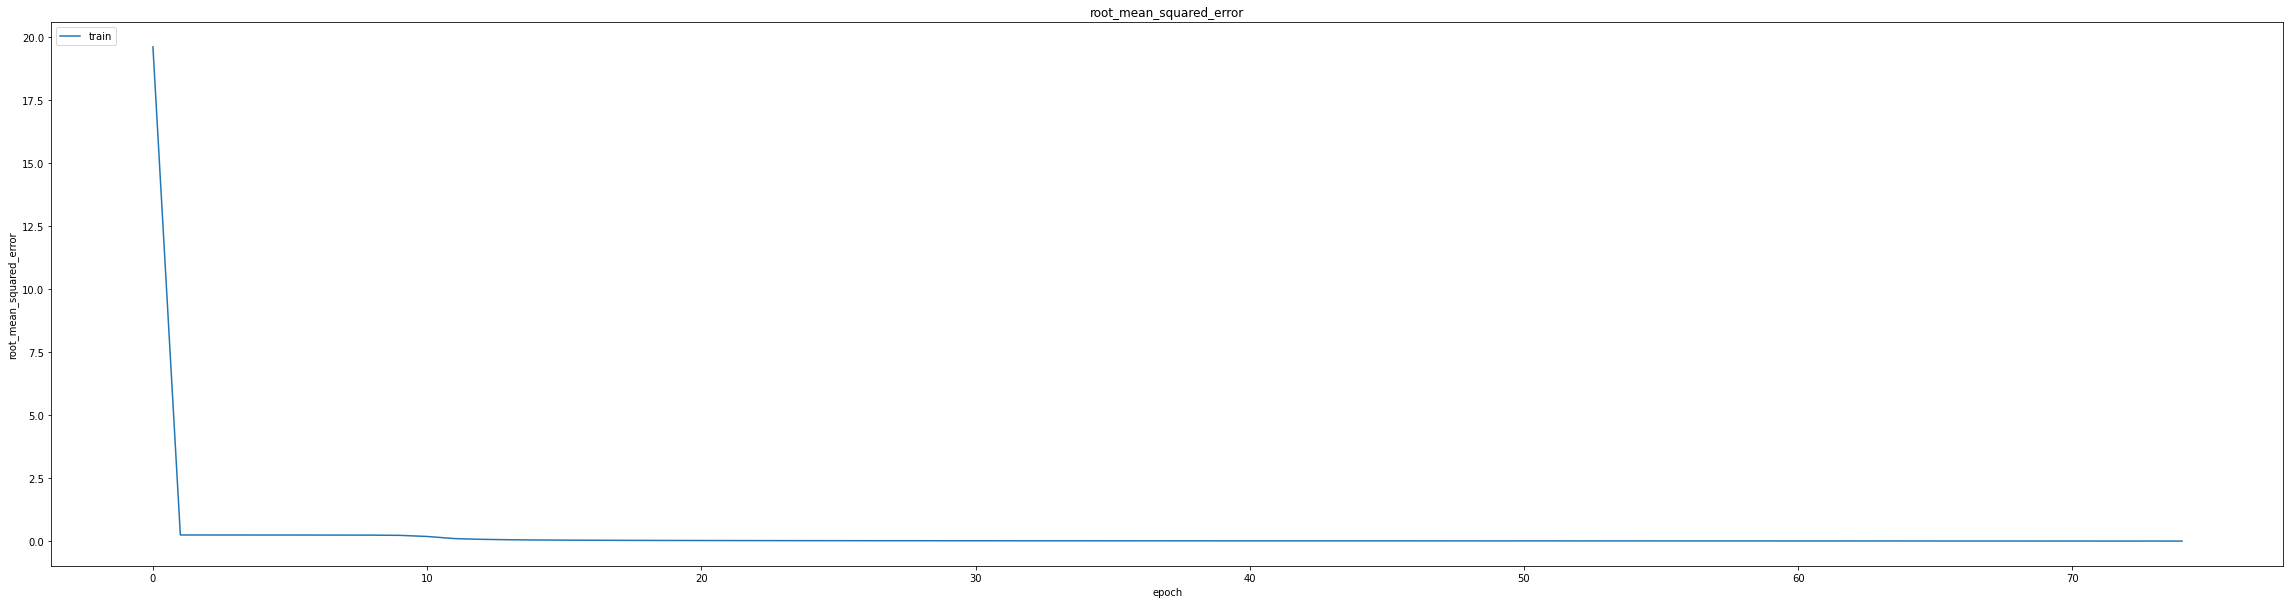

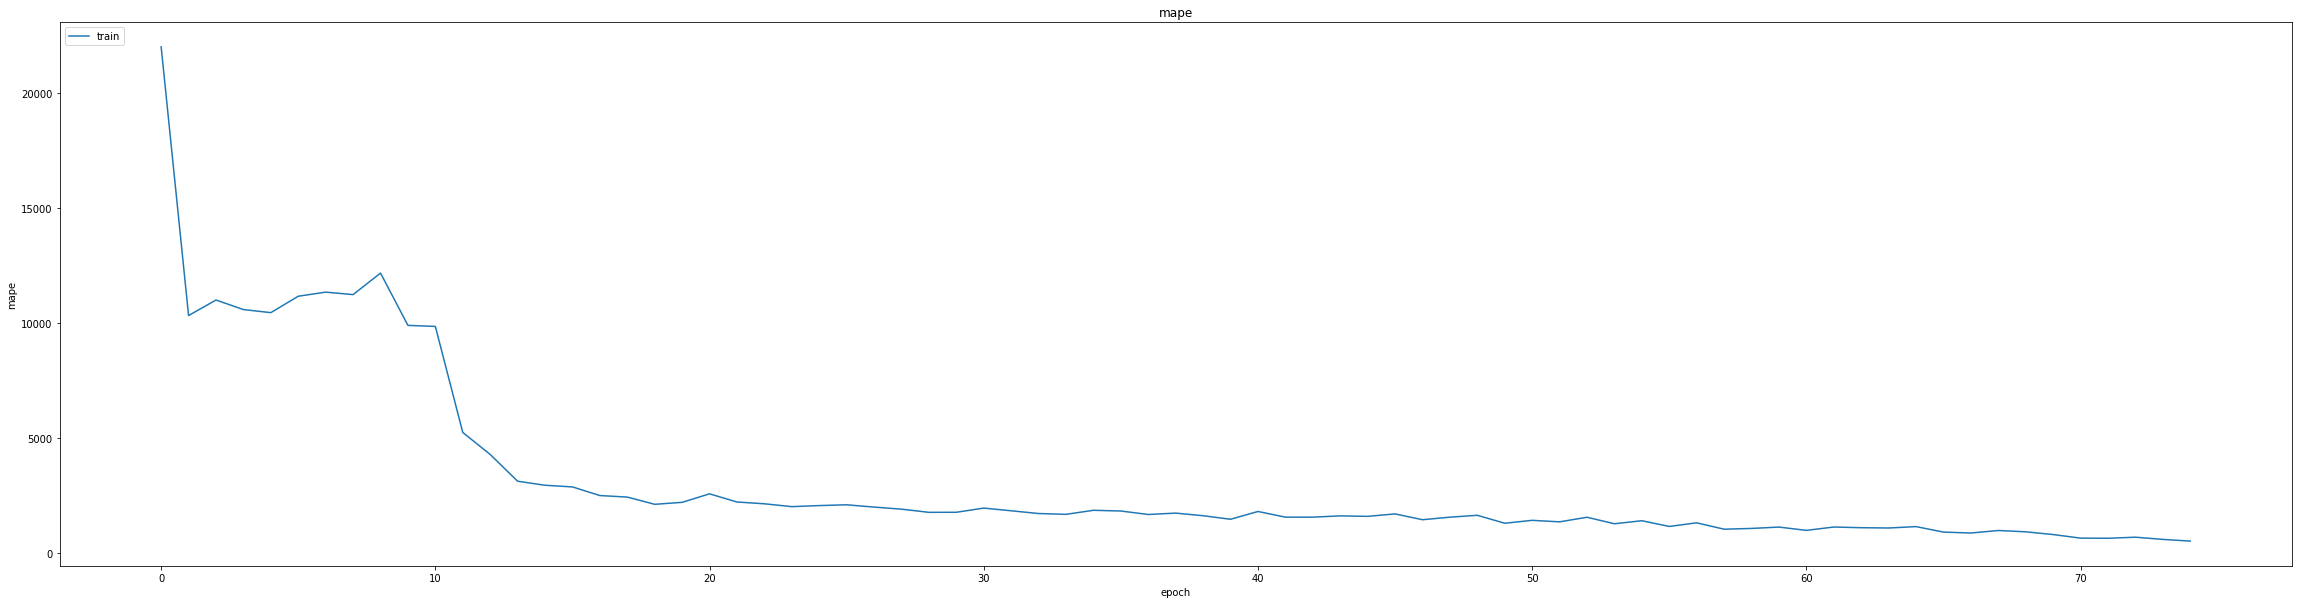

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.009900351986289024
0.009900351986289024
0.013622025027871132
348/348 [==============================] - 2s 4ms/step
0.9941703330527414


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


404/406 [============================>.] - ETA: 0s - loss: 4.0334e-04 - mae: 0.0115 - mse: 4.0334e-04 - root_mean_squared_error: 0.0201 - mape: 1275.8204
Epoch 1: val_mse did not improve from 0.00019
406/406 [==============================] - 11s 14ms/step - loss: 4.0190e-04 - mae: 0.0115 - mse: 4.0190e-04 - root_mean_squared_error: 0.0200 - mape: 1269.6691 - val_loss: 3.8657e-04 - val_mae: 0.0162 - val_mse: 3.8657e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 4308.7129 - lr: 0.0010
Epoch 2/25
404/406 [============================>.] - ETA: 0s - loss: 1.2613e-04 - mae: 0.0086 - mse: 1.2613e-04 - root_mean_squared_error: 0.0112 - mape: 1041.3412
Epoch 2: val_mse did not improve from 0.00019
406/406 [==============================] - 5s 12ms/step - loss: 1.2633e-04 - mae: 0.0087 - mse: 1.2633e-04 - root_mean_squared_error: 0.0112 - mape: 1036.3242 - val_loss: 2.3916e-04 - val_mae: 0.0119 - val_mse: 2.3916e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 3996.1997 - lr: 0.001

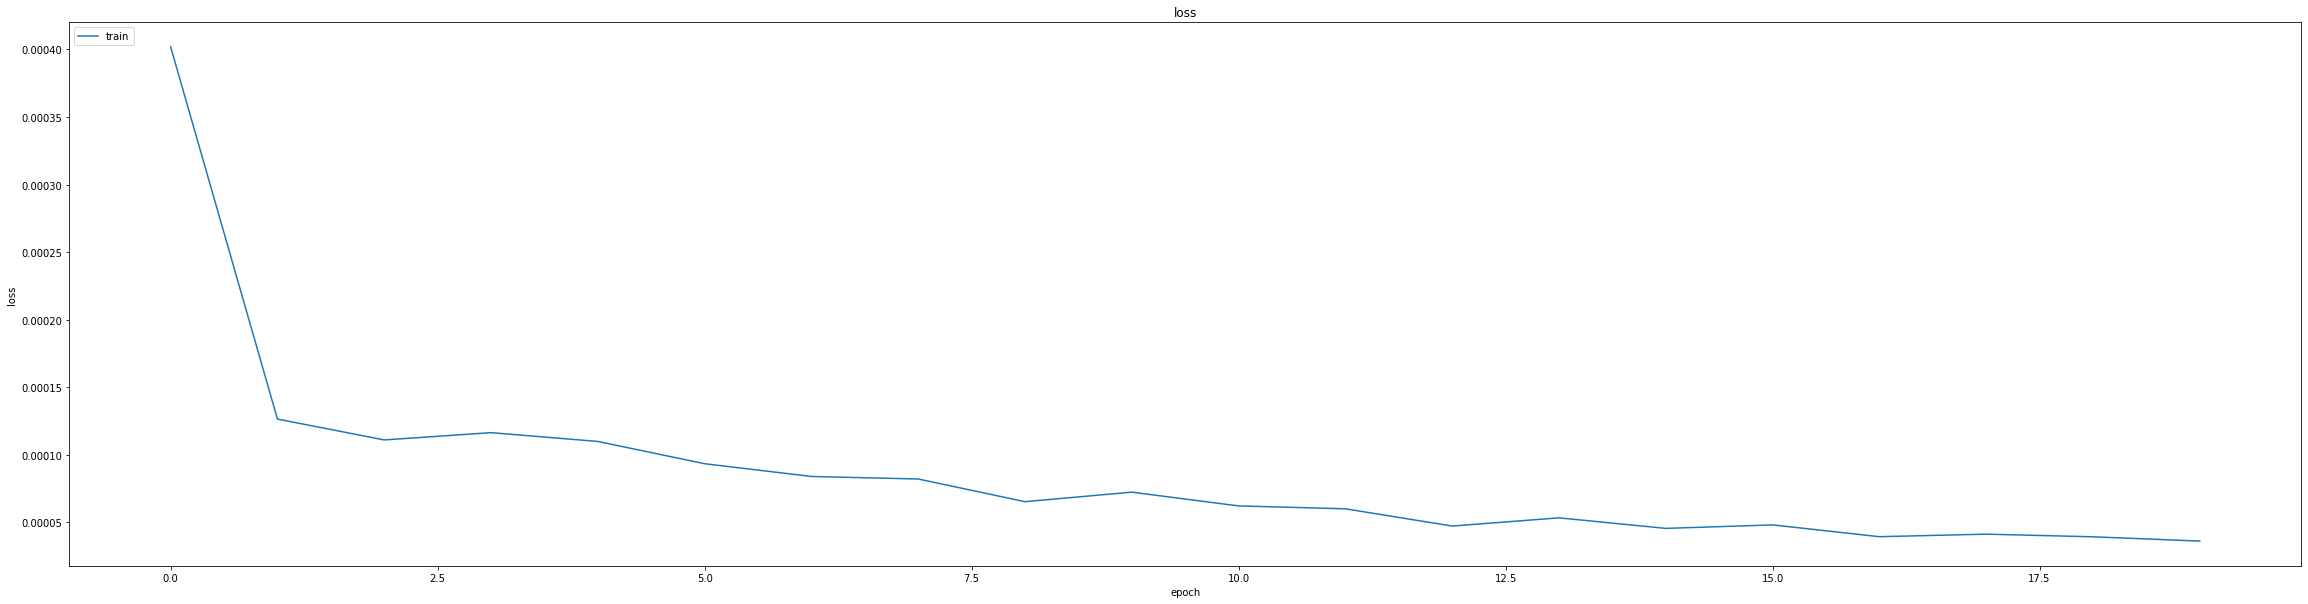

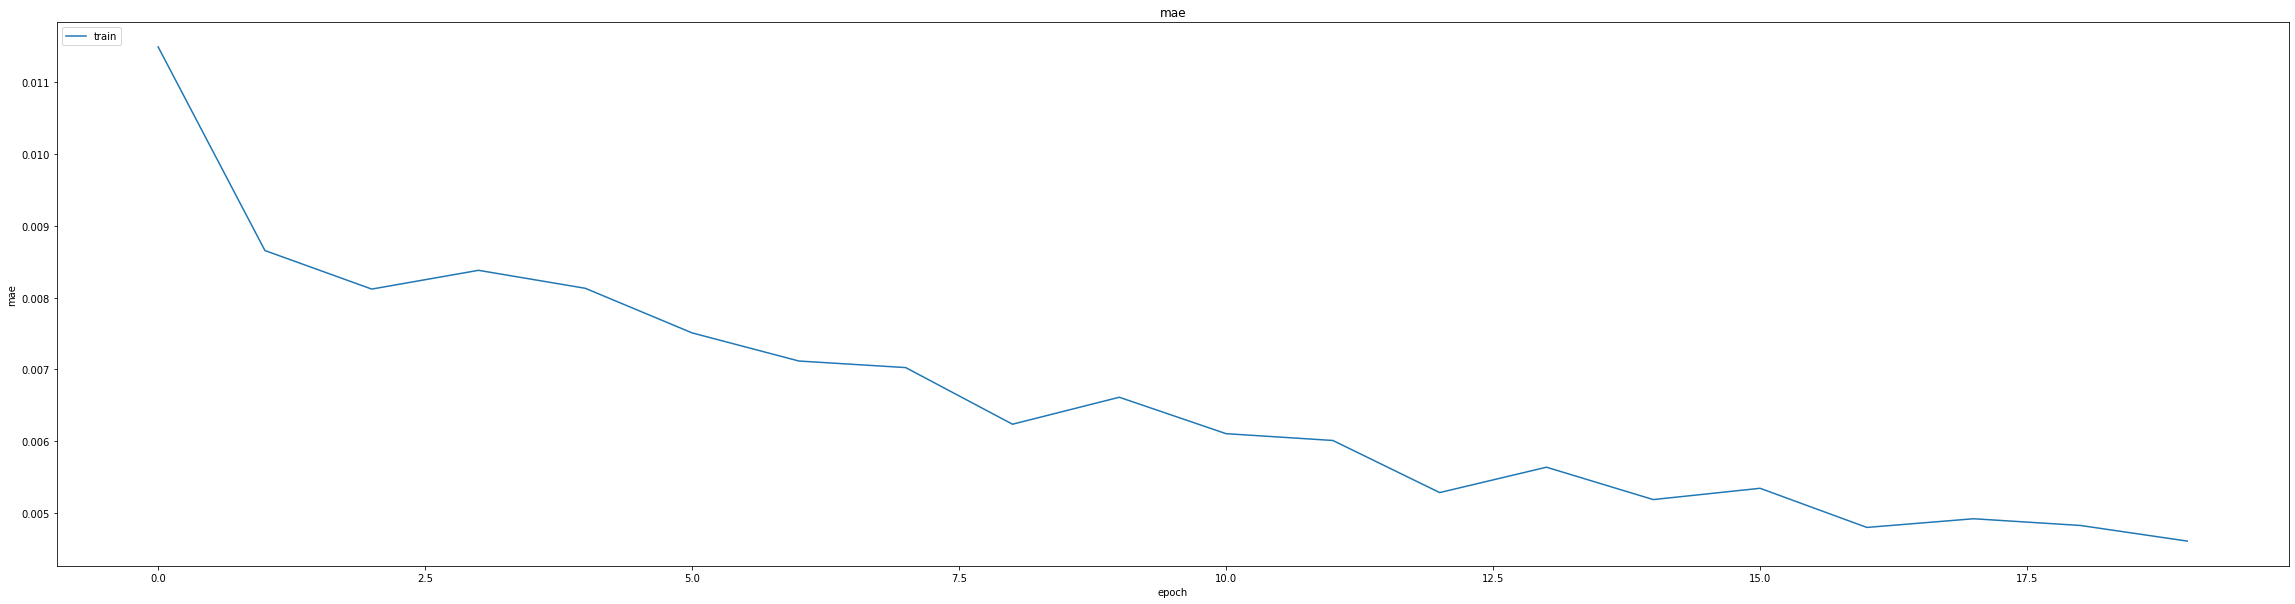

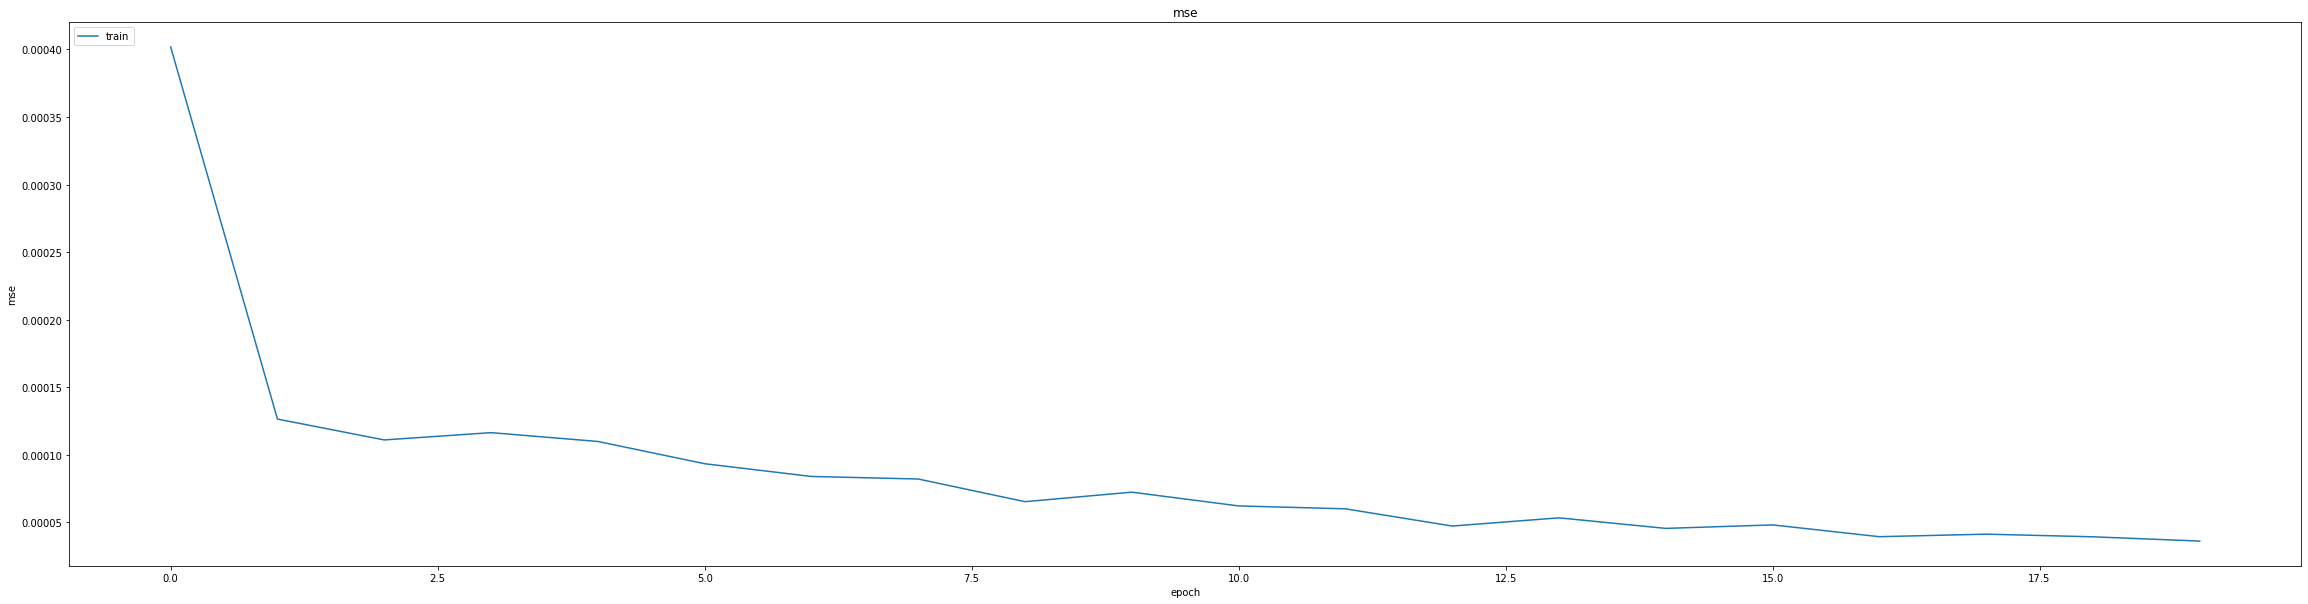

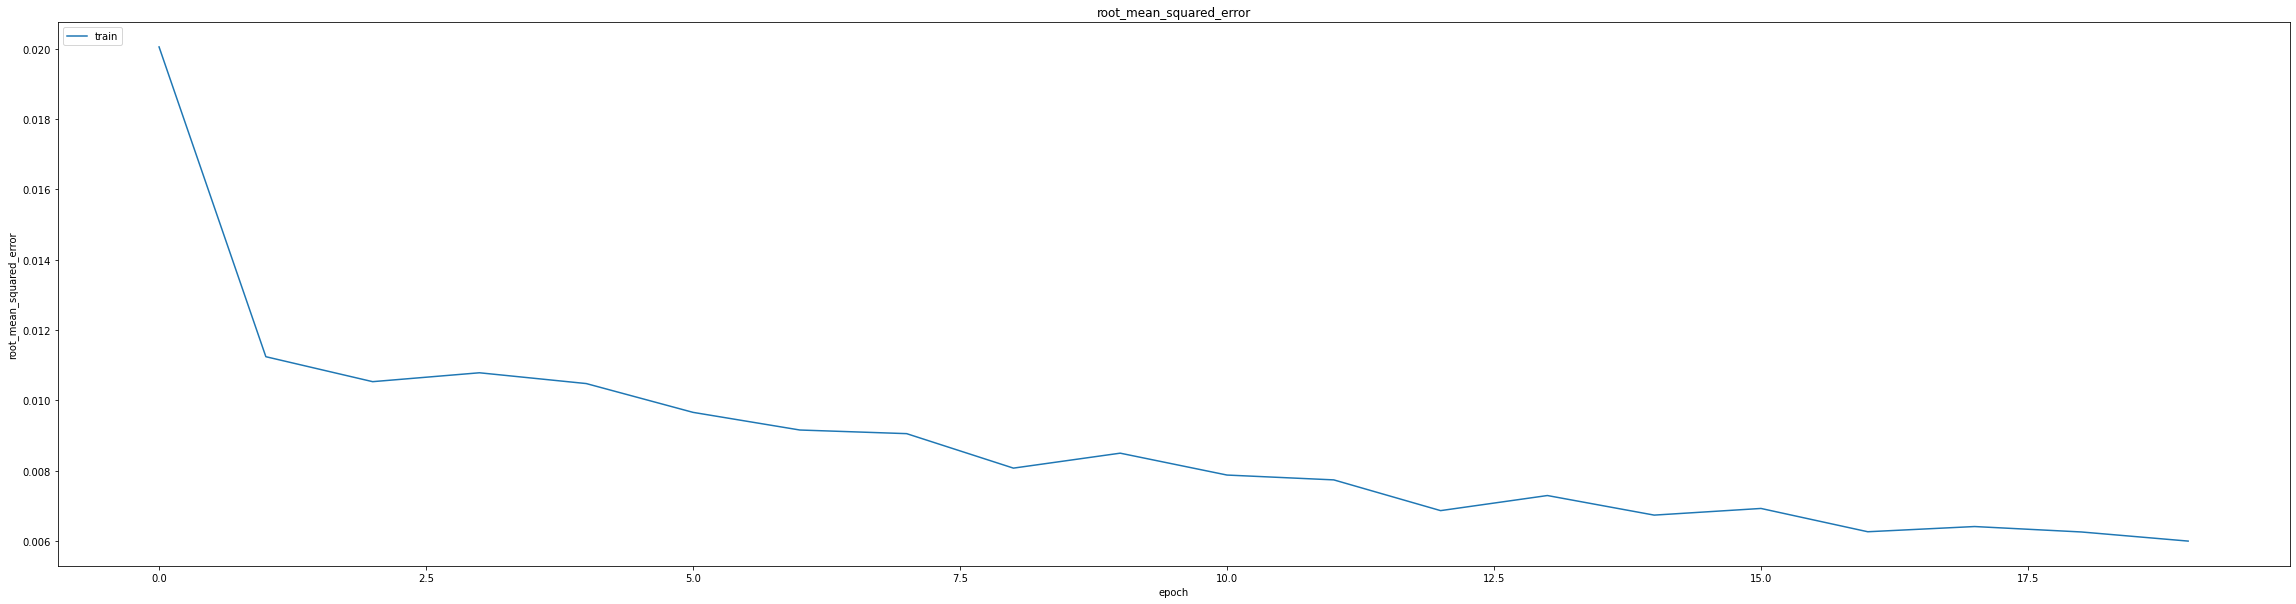

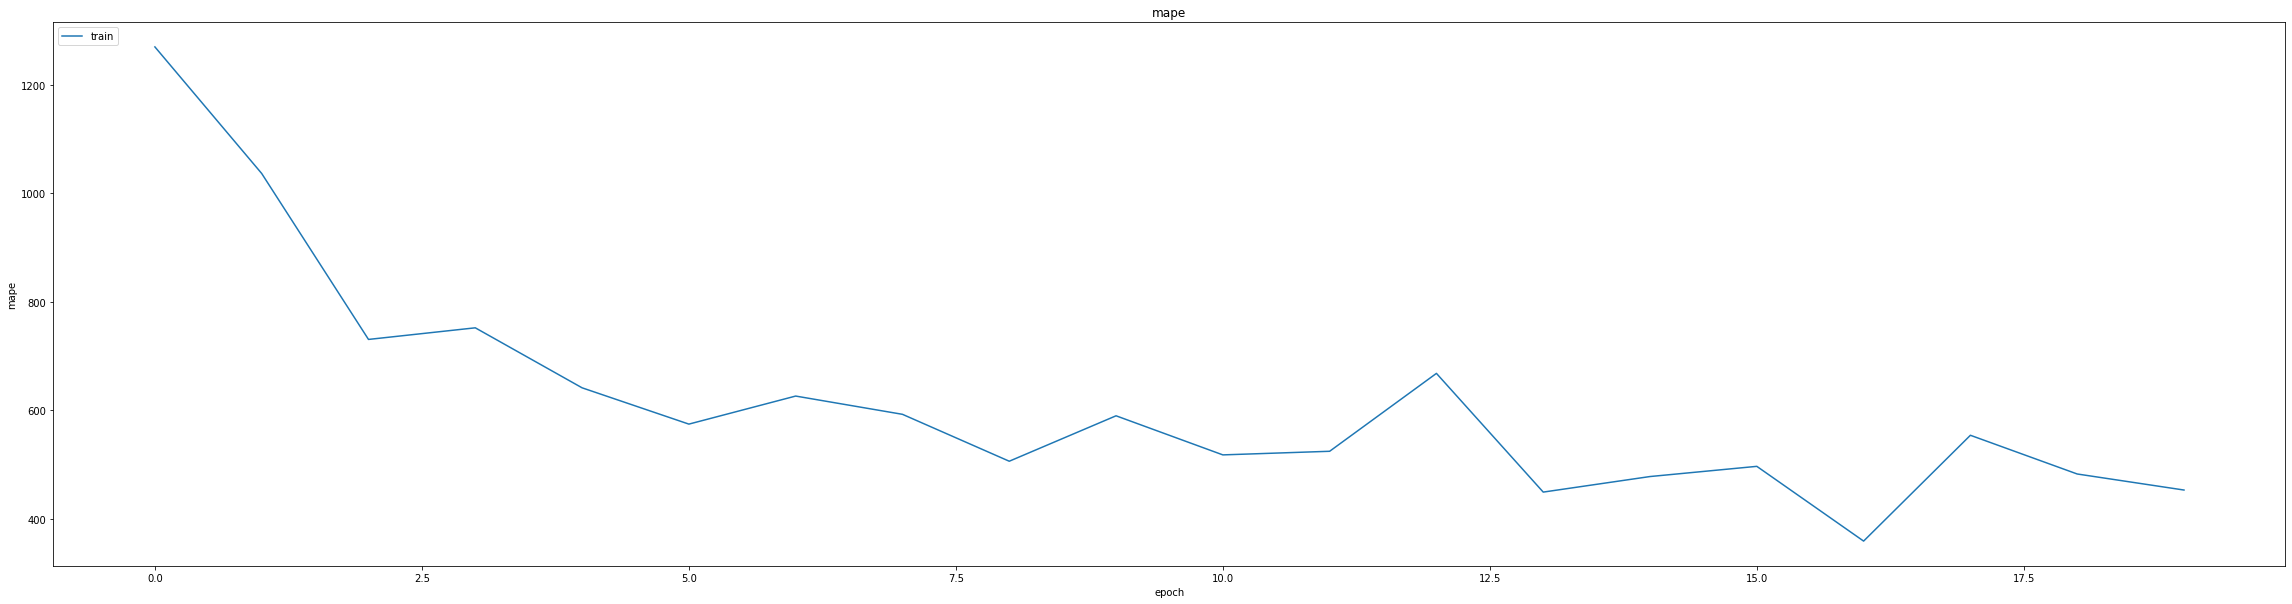

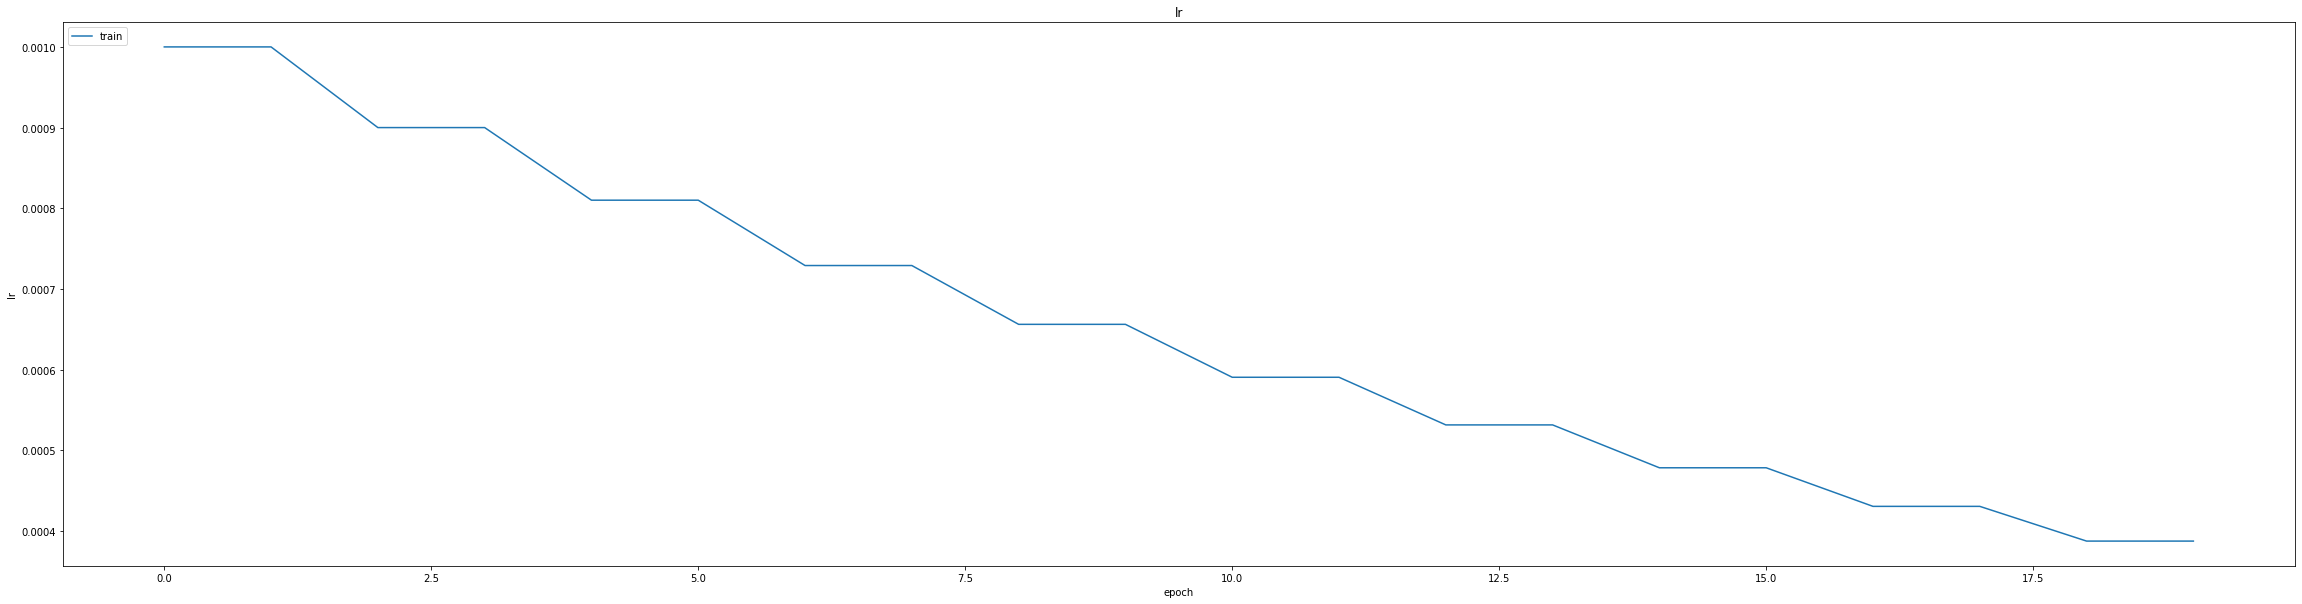

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.011940162628889084
0.011940162628889084
0.015145710669457912
348/348 [==============================] - 3s 5ms/step
0.9916165763770037


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(70-30)")

348/348 [==============================] - 1s 4ms/step


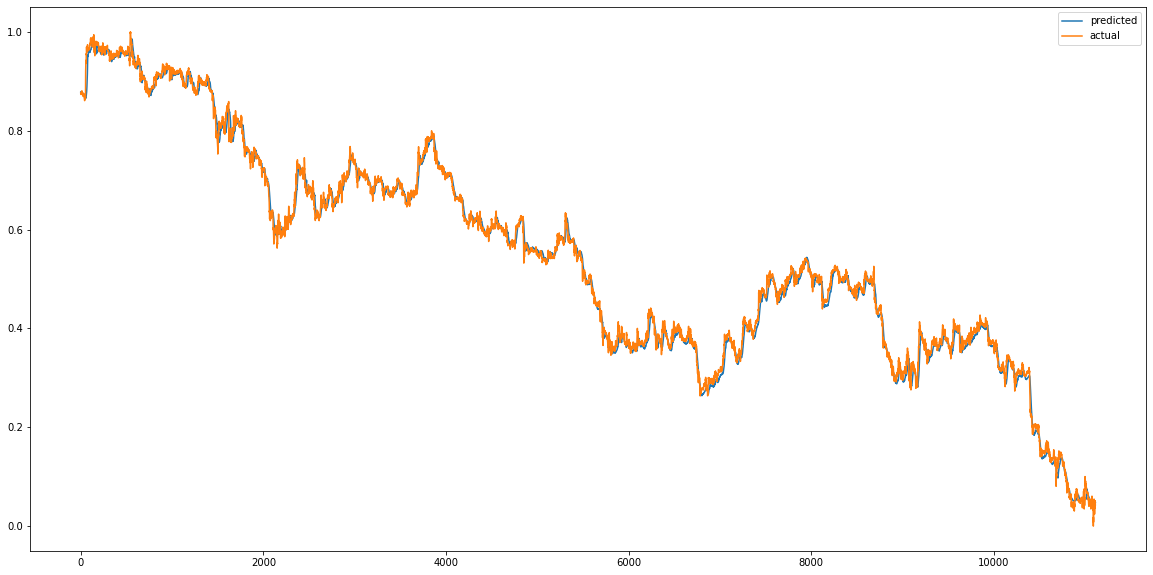

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


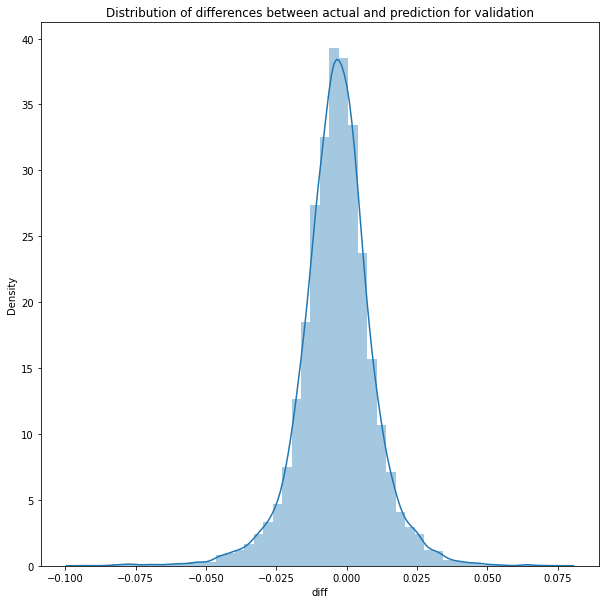

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 6ms/step


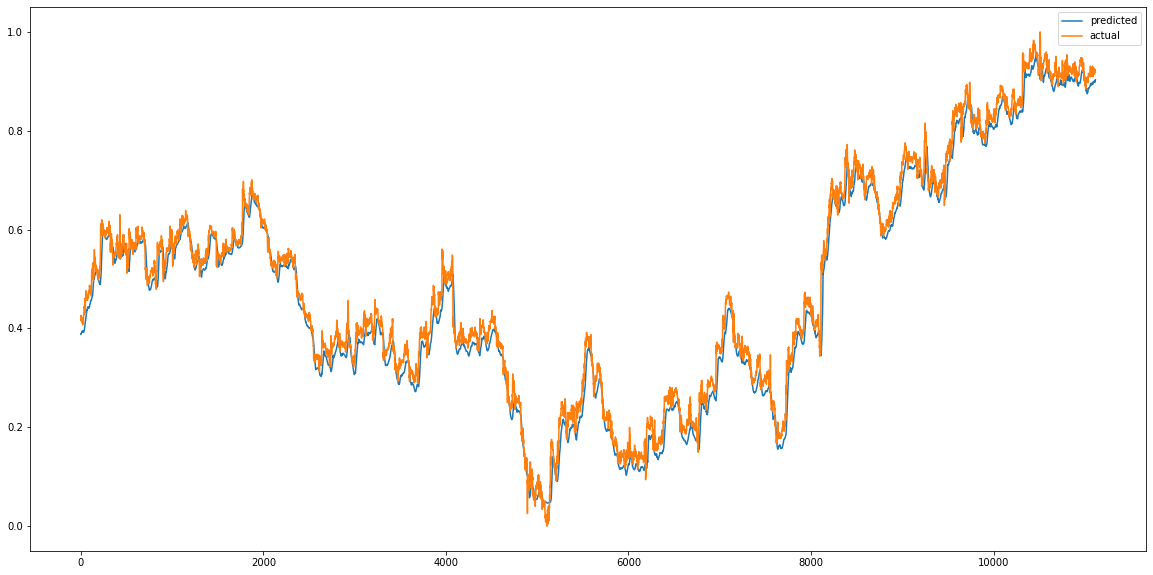

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


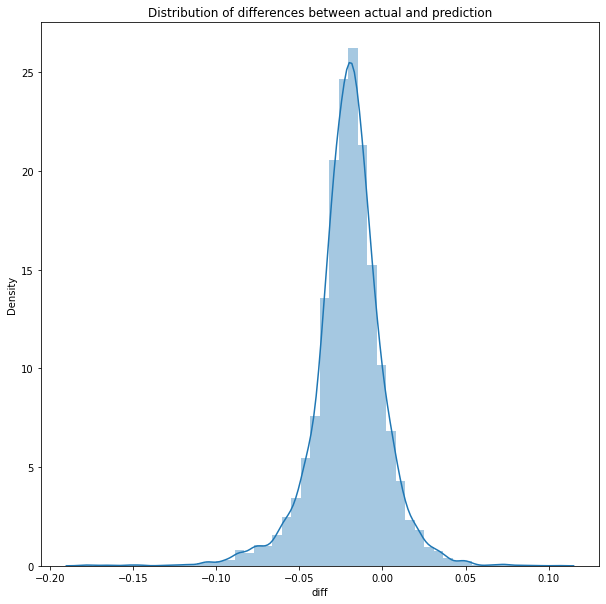

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0008611046221989923
RMSE :  0.029344584205590517
MAE :  0.023512344487673646
348/348 [==============================] - 1s 4ms/step
R2_Score  : 0.9837933926656098


count    11116.000000
mean        -0.020361
std          0.021133
min         -0.180197
25%         -0.030323
50%         -0.019677
75%         -0.009122
max          0.105095
Name: diff, dtype: float64